# <font color="#f47641">LP1
##  <font color="#DAC9A6"># preprocessing LP1 flow </font>  

In [1]:
import scipy.io
import pandas as pd
import numpy as np
import glob
import re
import pandas as pd
from sklearn import preprocessing 

In [2]:
df1 = pd.read_csv("LP1_TRAIN.csv", header=None)
df2 = pd.read_csv("LP1_TEST.csv", header=None)
print('train:',len(df1)/15)
print('train:',len(df2)/15)

train: 38.0
train: 50.0


In [3]:
all_data = pd.concat([df1,df2],axis=0)

In [4]:
list_of_lists = [[i]*15 for i in range(1,int((len(df1)+len(df2))/15)+1)]
flattened = [val for sublist in list_of_lists for val in sublist]
all_data.columns = ['batch','len','status','sensor_1','sensor_2','sensor_3','sensor_4','sensor_5','sensor_6']
all_data['batch'] = flattened

In [5]:
df = pd.DataFrame(columns=['batch','sensor','value','status'])
df_list =[]
for i in range(1,int(len(all_data)/15)+1):
    df = pd.DataFrame(columns=['batch','sensor','value','status'])
    for h in range(1,7):

        sensor_name = 'sensor_' + str(h)
        value = all_data[all_data['batch'] == i].reset_index(drop = True)[sensor_name].tolist()
        value = preprocessing.minmax_scale(value,feature_range=(0,100))
        df.loc[h,'batch'] = i
        df.loc[h,'sensor'] = h
        df.loc[h,'value'] = value
        df.loc[h,'status'] = all_data[all_data['batch'] == i].reset_index(drop = True)['status'][0]
#         print(i)
    df_list.append(df)
res = pd.concat(df_list,axis=0,ignore_index=True)
res.head(20)


batch sensor                                              value status
0      1      1  [0.0, 50.0, 0.0, 0.0, 0.0, 50.0, 0.0, 50.0, 0....      3
1      1      2  [60.0, 0.0, 80.0, 20.0, 40.0, 60.0, 80.0, 0.0,...      3
2      1      3  [35.29411764705884, 70.58823529411768, 0.0, 10...      3
3      1      4  [20.0, 60.0, 30.0, 50.0, 10.0, 20.0, 10.0, 100...      3
4      1      5  [33.33333333333334, 83.33333333333334, 66.6666...      3
5      1      6  [100.0, 100.0, 0.0, 100.0, 100.0, 100.0, 0.0, ...      3
6      2      1  [50.0, 25.0, 50.0, 25.0, 0.0, 25.0, 25.0, 100....      3
7      2      2  [16.666666666666664, 16.666666666666664, 50.0,...      3
8      2      3  [52.94117647058823, 0.0, 11.764705882352928, 0...      3
9      2      4  [80.0, 70.0, 30.0, 70.0, 0.0, 70.0, 30.0, 100....      3
10     2      5  [37.5, 25.0, 50.0, 25.0, 12.5, 37.5, 0.0, 100....      3
11     2      6  [50.0, 50.0, 50.0, 50.0, 0.0, 50.0, 50.0, 100....      3
12     3      1  [0.0, 100.0, 66.66666666666666, 100.0, 66.6666...      3
13     3      2  [100.0, 0.0, 33.333333333333336, 0.0, 33.33333...      3
14     3      3  [15.0, 75.0, 30.0, 50.0, 35.0, 30.0, 55.0, 35....      3
15     3      4  [0.0, 85.71428571428572, 42.85714285714286, 57...      3
16     3      5  [42.857142857142854, 85.71428571428571, 57.142...      3
17     3      6  [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50....      3
18     4      1  [100.0, 0.0, 0.0, 75.0, 25.0, 25.0, 25.0, 25.0...      3
19     4      2  [50.0, 66.66666666666667, 100.0, 33.3333333333...      3

In [18]:
res[res.batch == 48]

batch sensor                                              value status
282    48      1  [50.0, 100.0, 100.0, 50.0, 75.0, 50.0, 25.0, 5...      3
283    48      2  [57.142857142857146, 28.571428571428577, 28.57...      3
284    48      3  [72.22222222222223, 55.55555555555554, 100.0, ...      3
285    48      4  [33.33333333333334, 100.0, 83.33333333333334, ...      3
286    48      5  [37.5, 75.0, 62.5, 37.5, 100.0, 37.5, 50.0, 87...      3
287    48      6  [0.0, 0.0, 50.0, 0.0, 50.0, 50.0, 50.0, 50.0, ...      3

In [6]:
for i in range(1,4+1):
    res_ab = res[res['status']==i]
    print("status %s: %s"%(i,len(res_ab)/6))
    res_ab.to_json("LP1_"+str(i)+".json")

status 1: 17.0
status 2: 16.0
status 3: 21.0
status 4: 34.0


In [7]:
import pandas as pd
import random 
import numpy as np

def dataset(is_whole):
    if is_whole==True:
        np.random.seed(1)
        json_list = ["LP1_1.json","LP1_2.json","LP1_3.json","LP1_4.json"]
        for k in json_list:

            df_status_1 = pd.read_json(k)

            df_status_1_train =np.random.choice(df_status_1.batch.unique(),round(len(df_status_1.batch.unique())*0.7),replace=False)#70%

            df_status_1_train=df_status_1[df_status_1.batch.isin(df_status_1_train)]
            df_status_1_left=df_status_1[~df_status_1.batch.isin(df_status_1_train)]
            df_status_1_validation =np.random.choice(df_status_1_left.batch.unique(),round(len(df_status_1.batch.unique())*0.15),replace=False)#15%
            df_status_1_validation=df_status_1_left[df_status_1_left.batch.isin(df_status_1_validation)]
            df_status_1_test=df_status_1_left[~df_status_1_left.batch.isin(df_status_1_validation)]

            df_status_1_train.to_json("LP1_"+"status_"+k[4]+"_train_all.json")

            df_status_1_validation.to_json("LP1_"+"status_"+k[4]+"_validation_all.json")

            df_status_1_test.to_json("LP1_"+"status_"+k[4]+"_test_all.json")

In [8]:
dataset(True)

In [9]:
def dataset_cross(is_whole):
    import pandas as pd
    import random 
    import numpy as np
    if is_whole==True:
        json_list = ["LP1_1.json","LP1_2.json","LP1_3.json","LP1_4.json"]
        for k in json_list:
            np.random.seed(1)
            df_status_1 = pd.read_json(k)

    #         df_abnormal = pd.read_json("network_abnormal.json")
            np.random.seed(1)
    #=====================LP5_1
            status_1_coross_1 =np.random.choice(df_status_1.batch.unique(),round(len(df_status_1.batch.unique())*0.2),replace=False)#20%
            df_status_1_cross_1=df_status_1[df_status_1.batch.isin(status_1_coross_1)]
            df_status_1_cross_1["cross"]=1
            df_status_1_left=df_status_1[~df_status_1.batch.isin(status_1_coross_1)]

            status_1_coross_2 =np.random.choice(df_status_1_left.batch.unique(),round(len(df_status_1.batch.unique())*0.2),replace=False)
            df_status_1_cross_2=df_status_1_left[df_status_1_left.batch.isin(status_1_coross_2)]
            df_status_1_cross_2["cross"]=2
            df_status_1_left=df_status_1_left[~df_status_1_left.batch.isin(status_1_coross_2)]

            status_1_coross_3 =np.random.choice(df_status_1_left.batch.unique(),round(len(df_status_1.batch.unique())*0.2),replace=False)
            df_status_1_cross_3=df_status_1_left[df_status_1_left.batch.isin(status_1_coross_3)]
            df_status_1_cross_3["cross"]=3
            df_status_1_left=df_status_1_left[~df_status_1_left.batch.isin(status_1_coross_3)]

            status_1_coross_4 =np.random.choice(df_status_1_left.batch.unique(),round(len(df_status_1.batch.unique())*0.2),replace=False)
            df_status_1_cross_4=df_status_1_left[df_status_1_left.batch.isin(status_1_coross_4)]
            df_status_1_cross_4["cross"]=4
            df_status_1_cross_5=df_status_1_left[~df_status_1_left.batch.isin(status_1_coross_4)]
            df_status_1_cross_5["cross"]=5



            df_status_1_cross_1.to_json("LP1_"+"status_"+k[4]+"_all_cross_1.json")
            df_status_1_cross_2.to_json("LP1_"+"status_"+k[4]+"_all_cross_2.json")
            df_status_1_cross_3.to_json("LP1_"+"status_"+k[4]+"_all_cross_3.json")
            df_status_1_cross_4.to_json("LP1_"+"status_"+k[4]+"_all_cross_4.json")
            df_status_1_cross_5.to_json("LP1_"+"status_"+k[4]+"_all_cross_5.json")


            print(len(df_status_1_cross_1),len(df_status_1_cross_2),len(df_status_1_cross_3),len(df_status_1_cross_4),len(df_status_1_cross_5))


In [10]:
dataset_cross(True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

18 18 18 18 30
18 18 18 18 24
24 24 24 24 30
42 42 42 42 36


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

In [11]:
def transformation(is_whole,is_cross,method):
    from pyts.visualization import plot_gasf,plot_gadf,plot_mtf,plot_recurrence_plots
    import matplotlib.pyplot as plt
    import os
    import pandas as pd
    import numpy as np
    from PIL import Image

    
    if is_cross==False:
        is_train=["train","test","validation"]
        is_normal=["status_1","status_2","status_3","status_4"]
        if is_whole==True:
            path="_all"
        else:
            path=""
        for a in is_train:
            for b in is_normal:
                x= pd.read_json("LP1_"+b+"_"+a+path+".json")
                x = x[['batch','sensor','status','value']]
                for i in range(len(x)):
                    x_time=np.array(x.iloc[:,3].values[i])
                    x_class= str(x.iloc[:,0].values[i])+'_'+str(x.iloc[:,1].values[i])
                    if method.lower() != "recurrence_plots":

                        locals()["plot_"+method.lower()](x_time,
                                                 cmap="rainbow",
                                                 image_size=15,
                                                 output_file="LP1_img"+path+"/"+method+"/"+a+"/"+b+"/"+x_class+".png")
                    else:
                        locals()["plot_"+method.lower()](x_time,
                                                 output_file="LP1_img"+path+"/"+method+"/"+a+"/"+b+"/"+x_class+".png")

                for i in range(len(x)):
                    x_time=np.array(x.iloc[:,3].values[i])
                    x_class= str(x.iloc[:,0].values[i])+'_'+str(x.iloc[:,1].values[i])
                    img = Image.open("LP1_img"+path+"/"+method+"/"+a+"/"+b+"/"+x_class+".png")
                    img=img.crop((20, 3, 237, 220))
                    img.thumbnail((128,128))  #resize
                    img.save("LP1_img"+path+"/"+method+"/"+a+"/"+b+"/"+x_class+".png")
    else:
        if is_whole==True:
            path="_all"
        else:
            path=""
        cross=["1","2","3","4","5"]
        is_normal=["status_1","status_2","status_3","status_4"]
        for a in cross:
            for b in is_normal:
                x= pd.read_json("LP1_"+b+path+"_cross_"+a+".json")
                x = x[['batch','sensor','status','value']]
                for i in range(len(x)):
                    x_time=np.array(x.iloc[:,3].values[i])
                    x_class= str(x.iloc[:,0].values[i])+'_'+str(x.iloc[:,1].values[i])
                    if method.lower() != "recurrence_plots":

                        locals()["plot_"+method.lower()](x_time,
                                                 cmap="rainbow",
                                                 image_size=15,
                                                 output_file="LP1_img_cross"+path+"/"+method+"/"+a+"/"+b+"/"+x_class+".png")
                    else:
                        locals()["plot_"+method.lower()](x_time,
                                                 output_file="LP1_img_cross"+path+"/"+method+"/"+a+"/"+b+"/"+x_class+".png")

                for i in range(len(x)):
                    x_time=np.array(x.iloc[:,3].values[i])
                    x_class= str(x.iloc[:,0].values[i])+'_'+str(x.iloc[:,1].values[i])
                    img = Image.open("LP1_img_cross"+path+"/"+method+"/"+a+"/"+b+"/"+x_class+".png")
                    img=img.crop((20, 3, 237, 220))
                    img.thumbnail((128,128))  #resize
                    img.save("LP1_img_cross"+path+"/"+method+"/"+a+"/"+b+"/"+x_class+".png")


In [12]:
transformation(True,True,"gasf")
# image_size

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

C:\ProgramData\Anaconda3\lib\site-packages\pyts\utils\utils.py:143: RuntimeWarning: invalid value encountered in true_divide
  rescaled_ts = (2 * aggregated_ts - max_ts - min_ts) / (max_ts - min_ts)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\image.py:405: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\image.py:406: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\image.py:413: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\image.py:418: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:916: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
C:\Progra

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

C:\ProgramData\Anaconda3\lib\site-packages\pyts\utils\utils.py:143: RuntimeWarning: invalid value encountered in true_divide
  rescaled_ts = (2 * aggregated_ts - max_ts - min_ts) / (max_ts - min_ts)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\image.py:405: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\image.py:406: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\image.py:413: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\image.py:418: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:916: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
C:\Progra

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

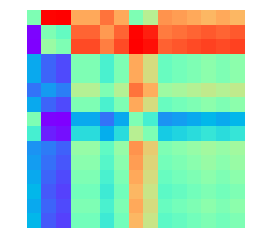

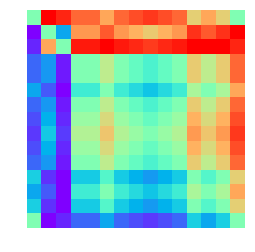

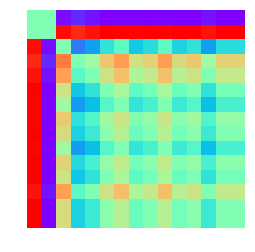

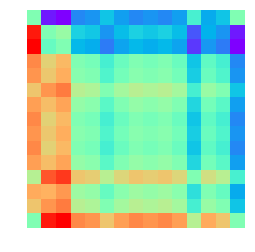

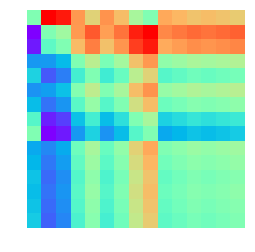

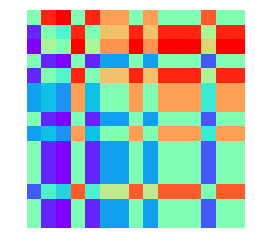

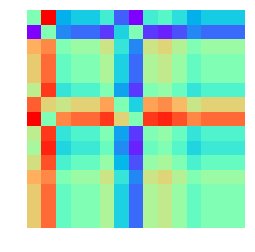

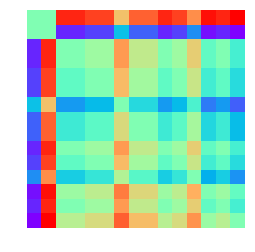

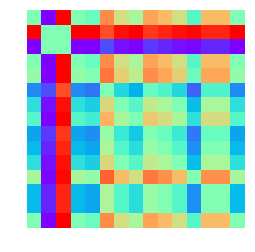

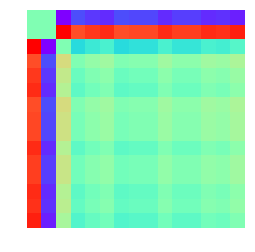

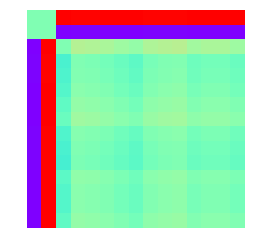

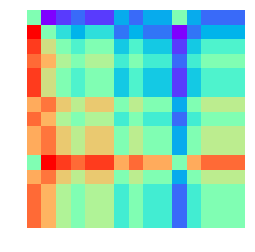

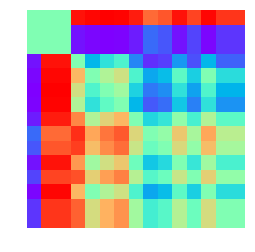

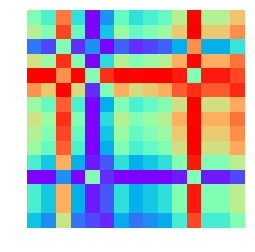

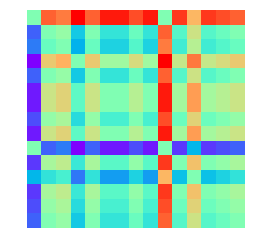

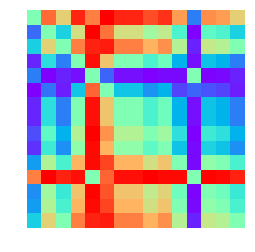

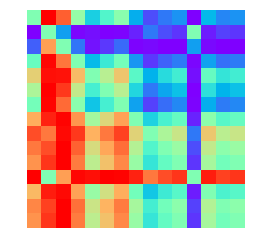

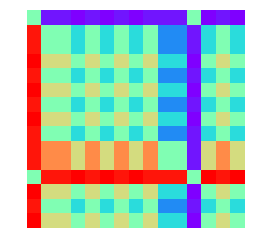

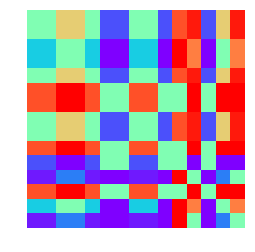

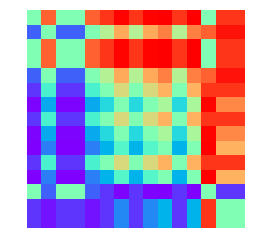

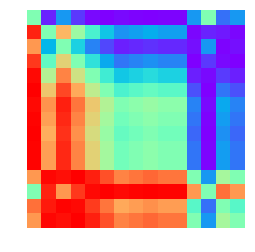

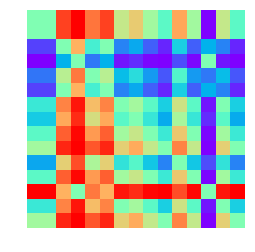

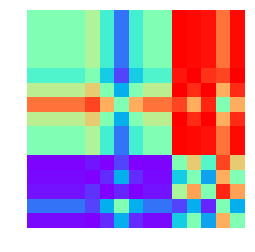

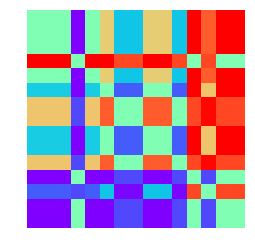

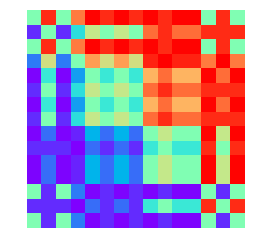

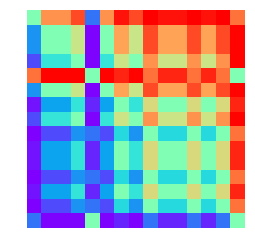

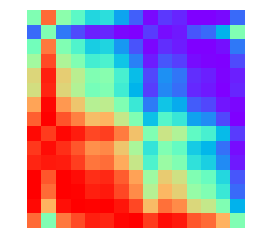

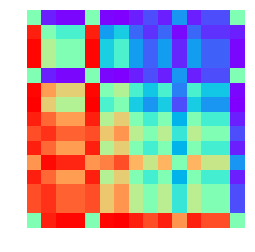

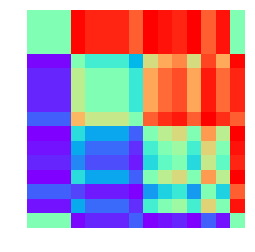

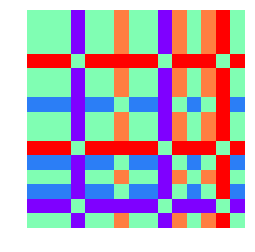

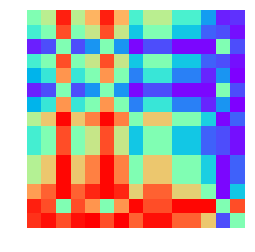

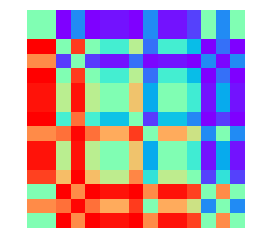

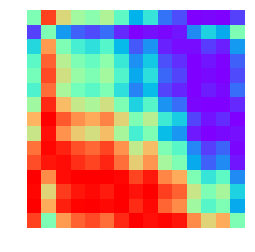

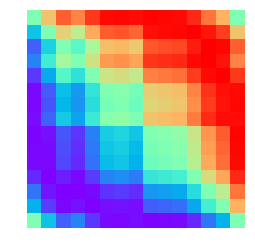

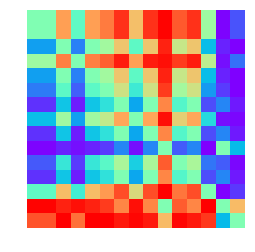

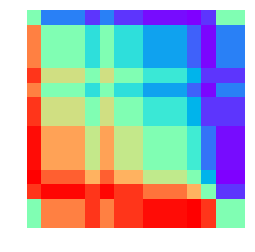

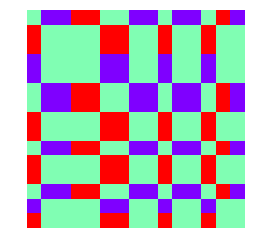

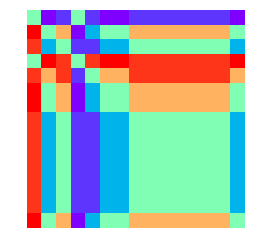

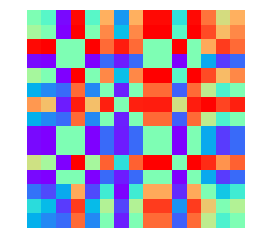

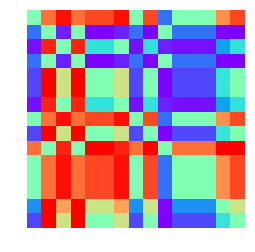

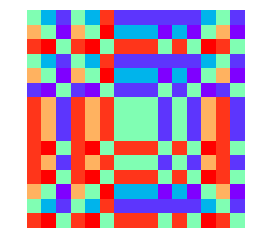

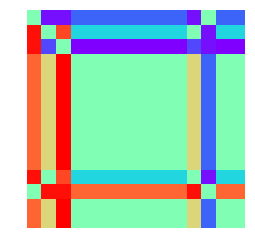

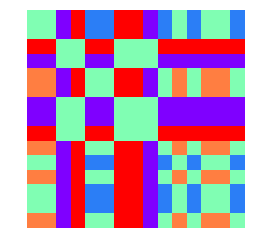

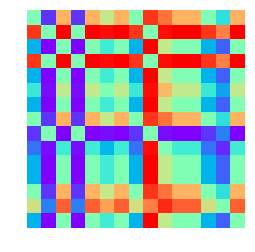

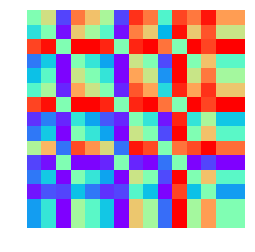

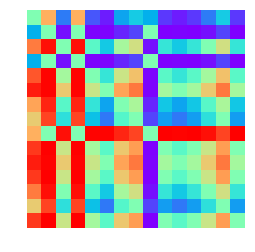

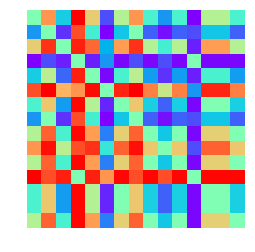

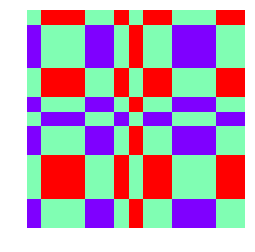

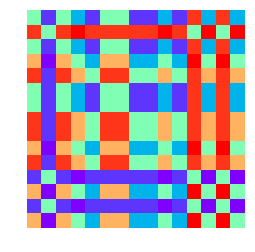

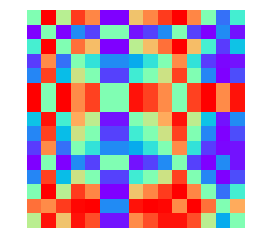

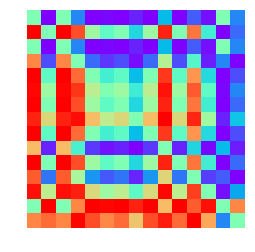

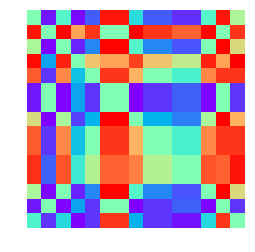

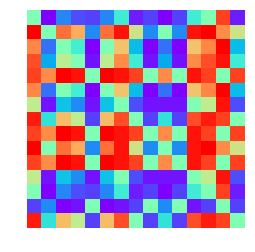

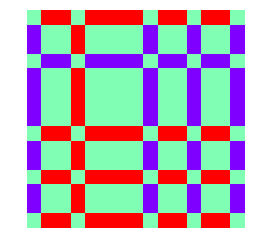

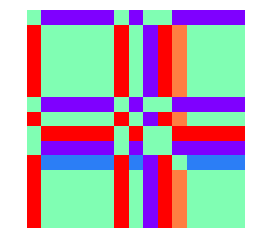

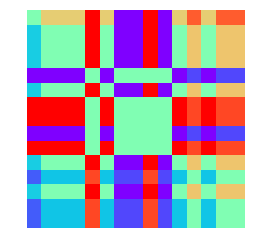

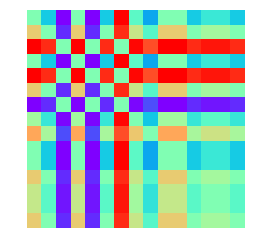

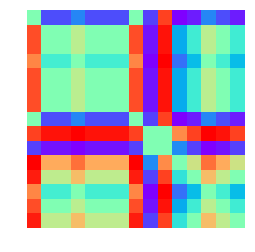

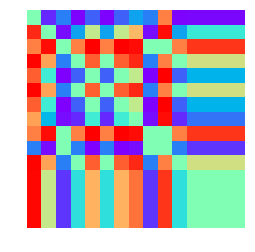

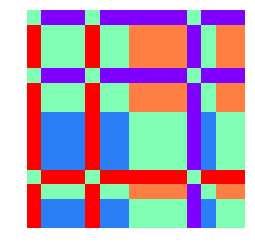

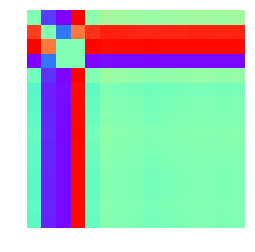

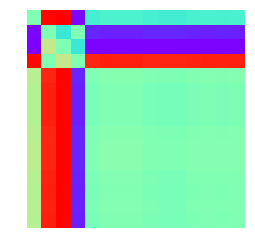

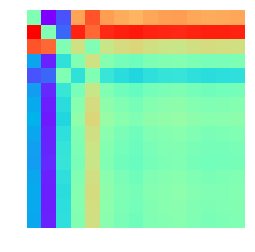

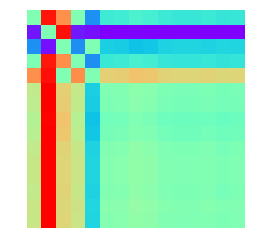

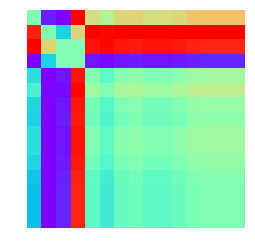

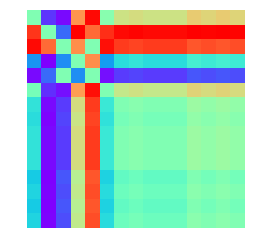

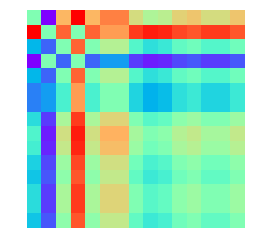

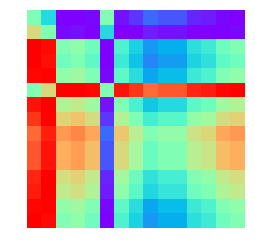

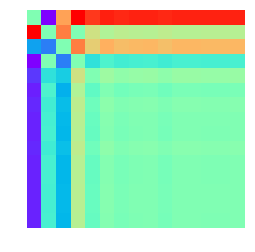

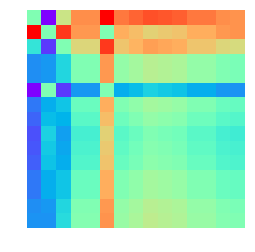

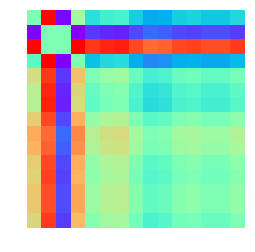

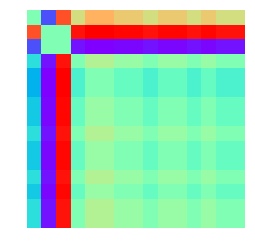

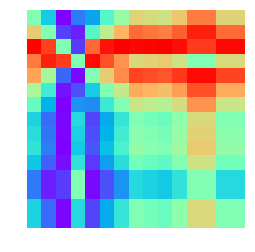

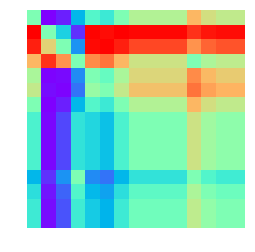

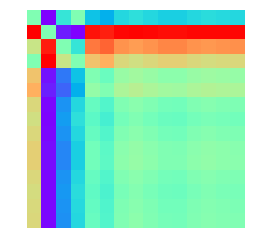

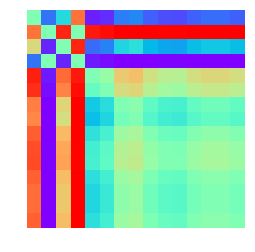

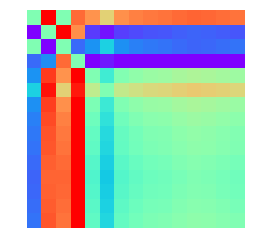

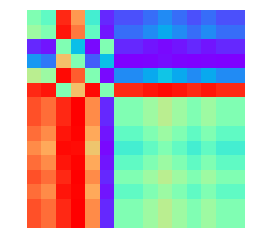

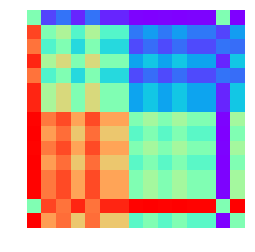

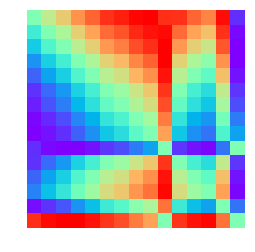

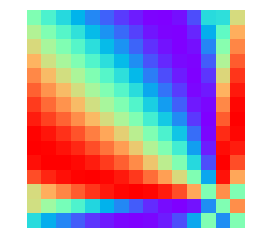

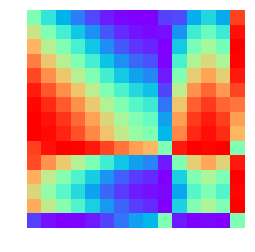

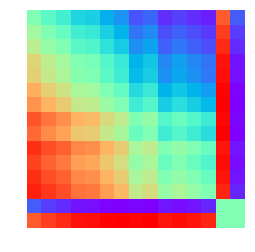

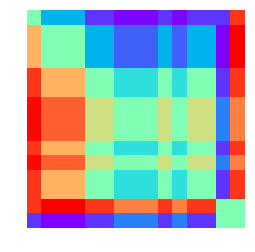

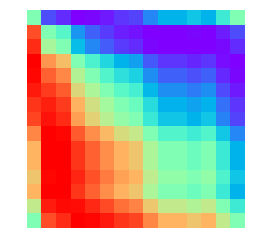

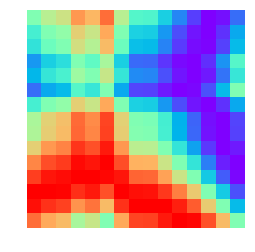

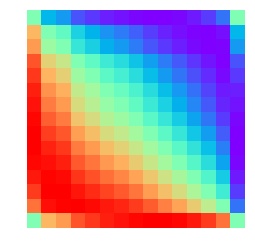

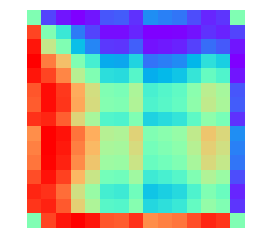

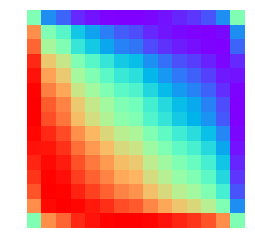

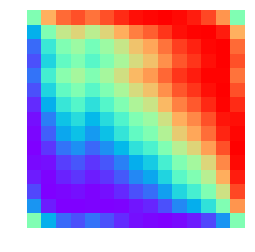

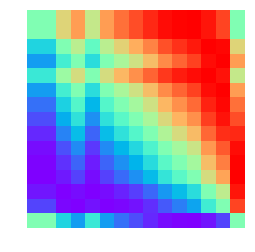

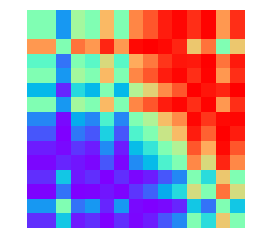

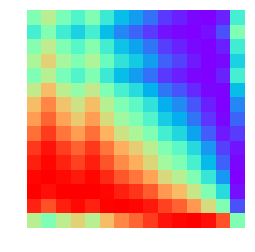

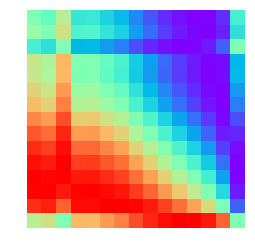

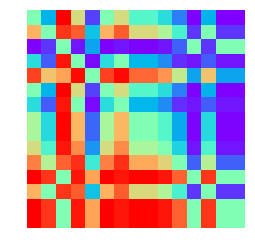

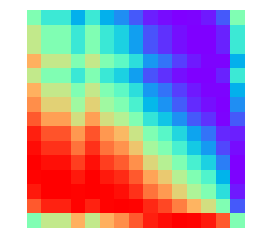

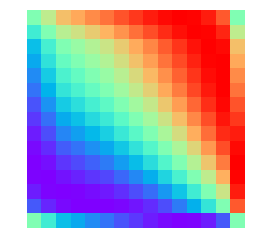

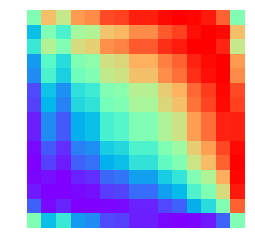

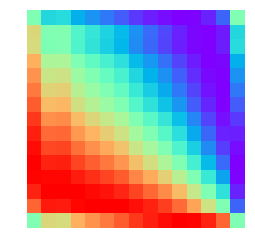

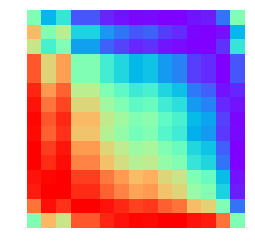

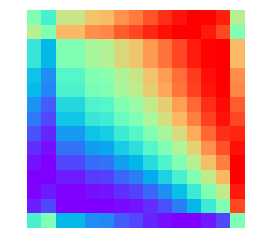

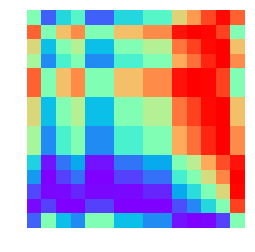

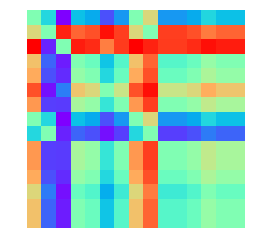

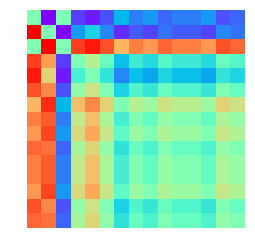

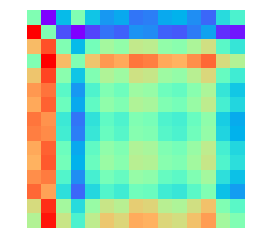

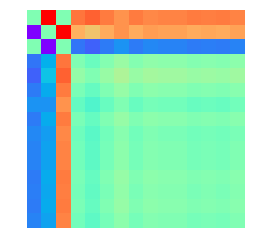

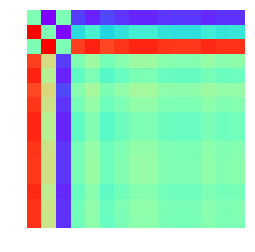

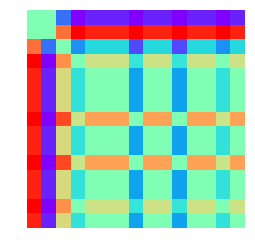

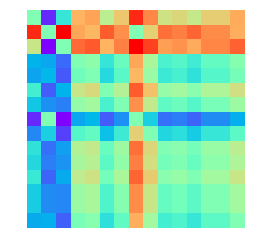

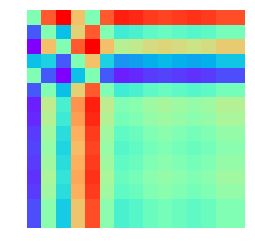

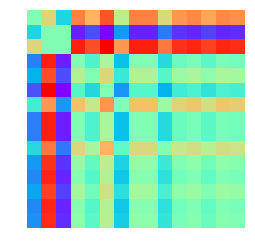

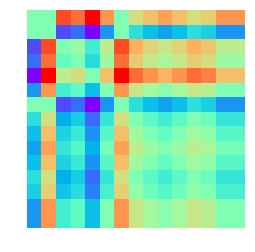

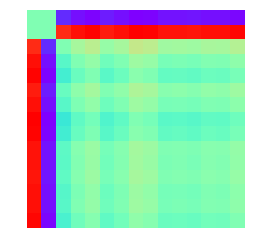

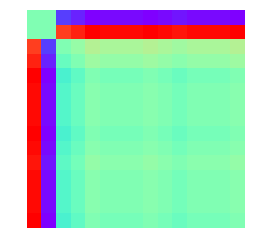

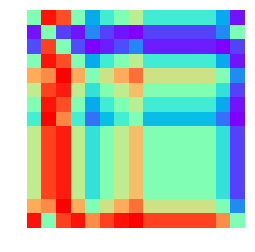

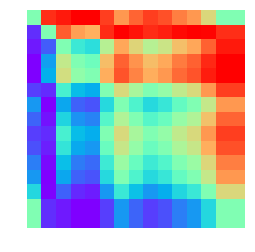

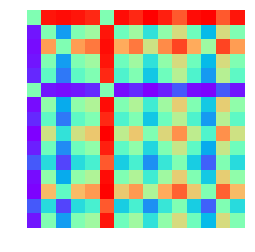

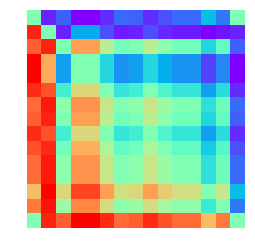

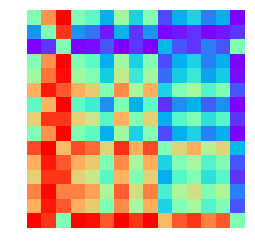

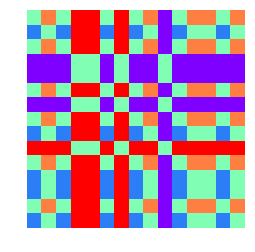

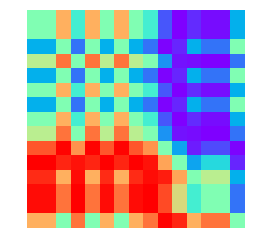

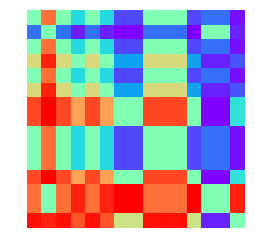

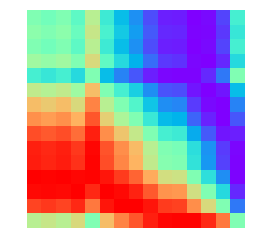

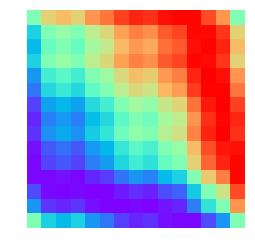

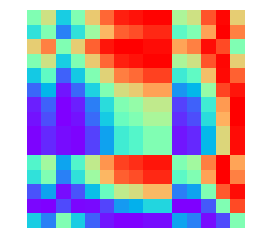

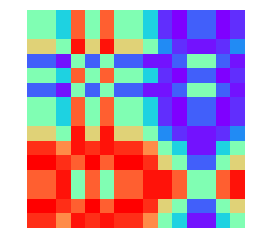

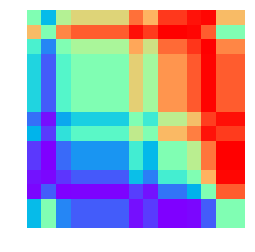

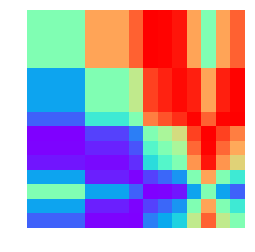

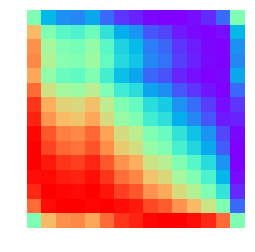

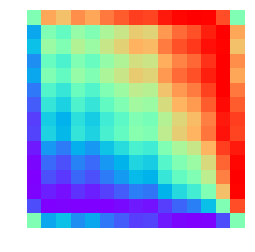

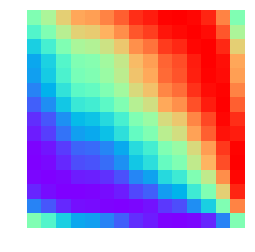

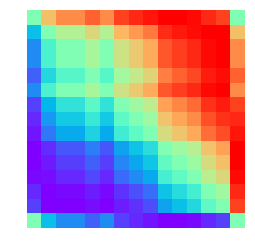

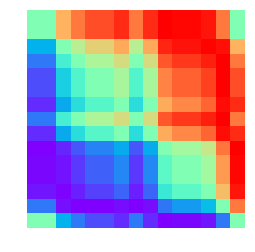

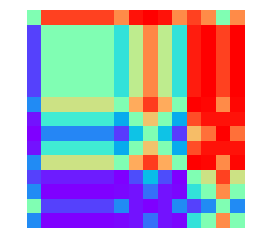

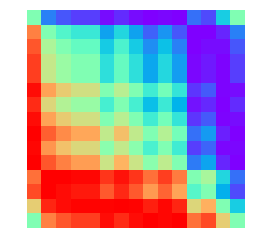

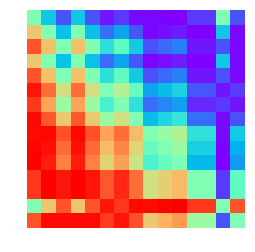

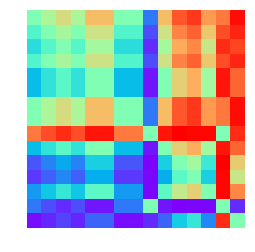

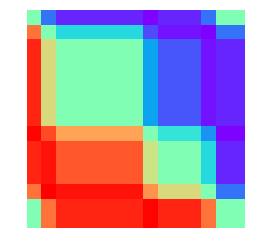

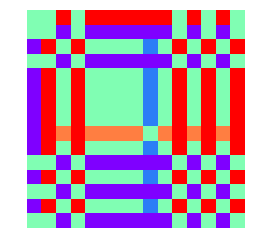

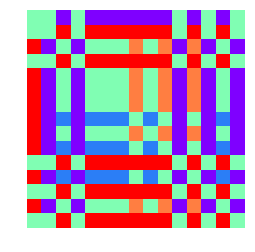

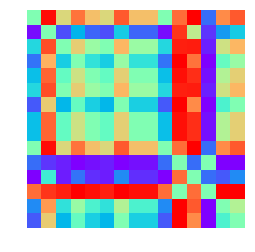

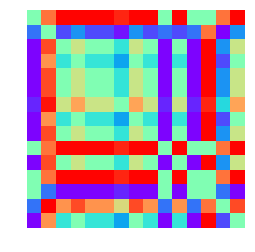

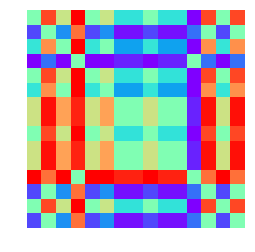

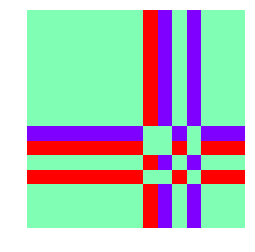

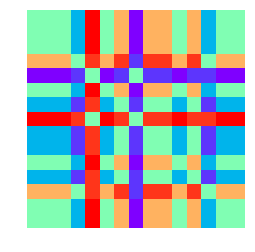

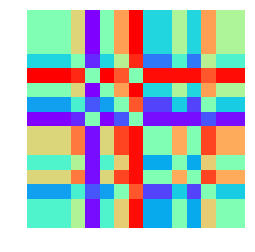

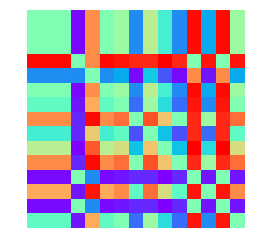

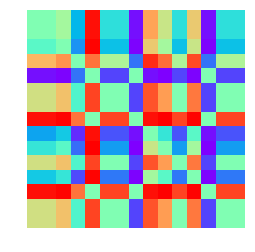

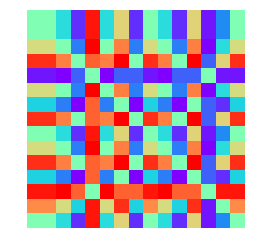

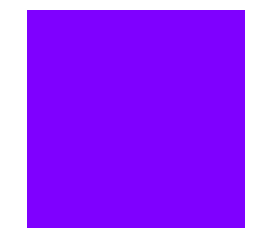

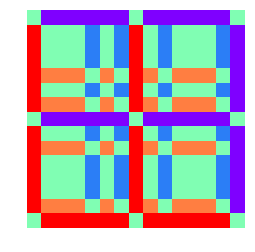

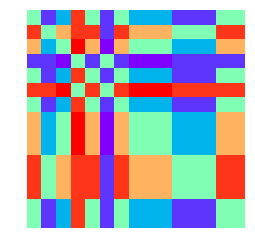

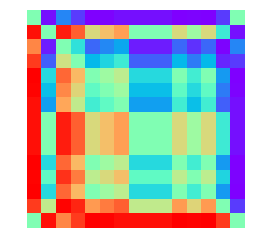

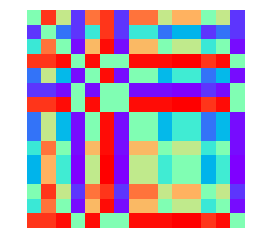

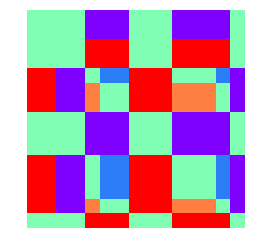

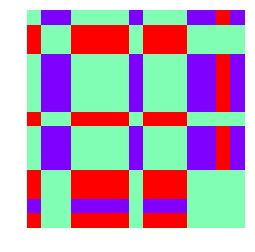

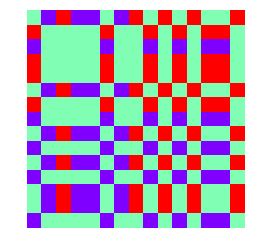

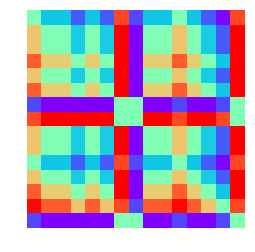

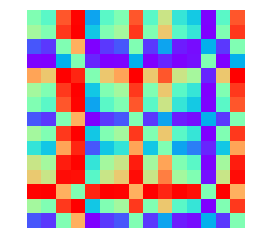

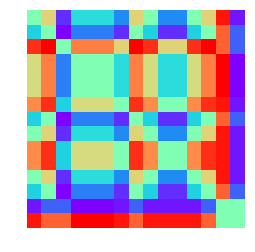

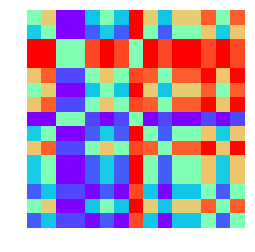

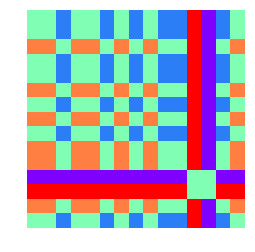

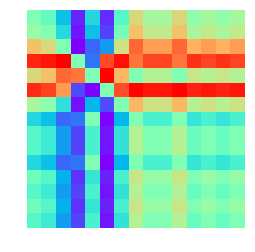

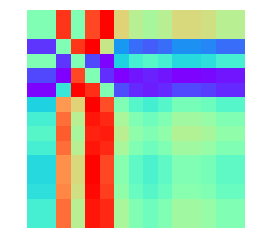

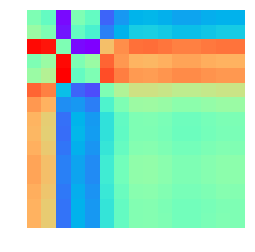

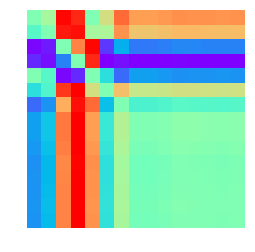

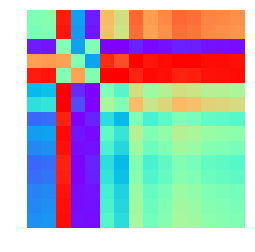

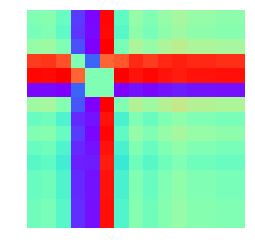

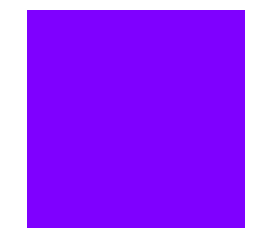

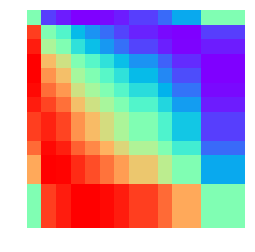

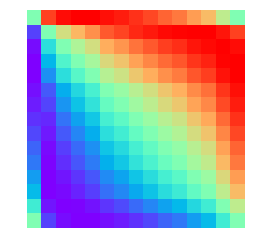

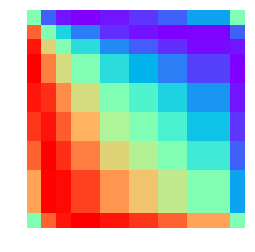

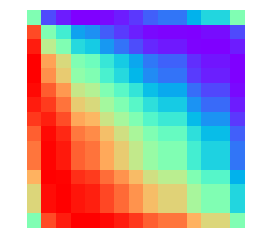

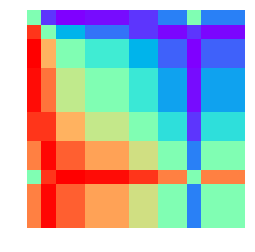

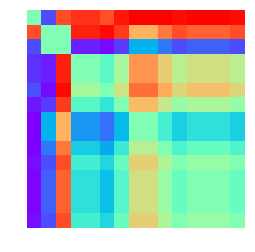

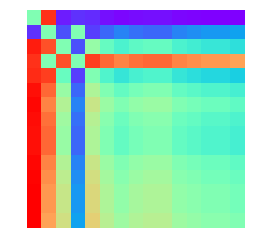

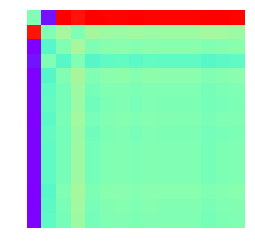

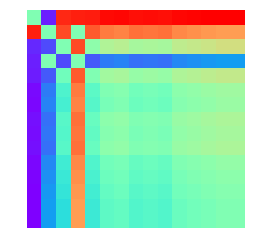

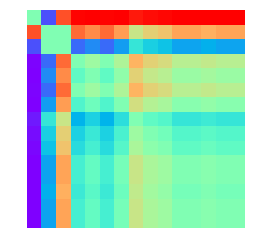

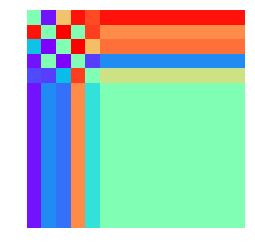

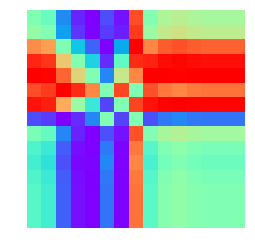

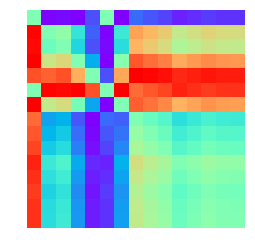

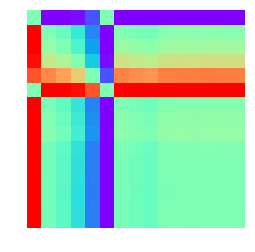

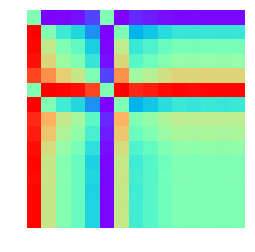

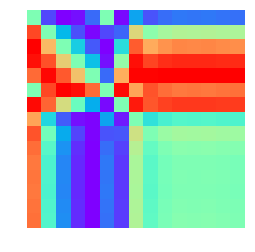

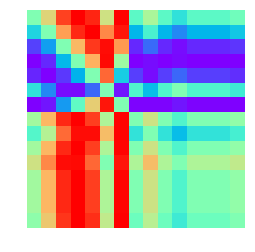

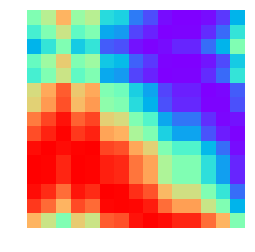

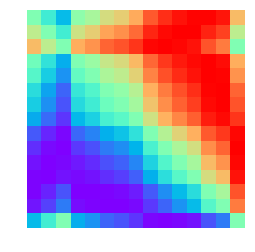

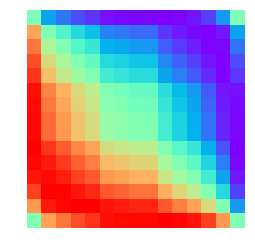

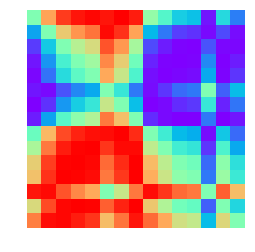

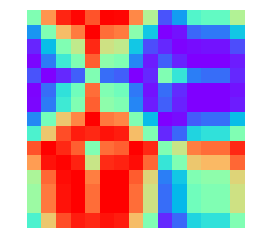

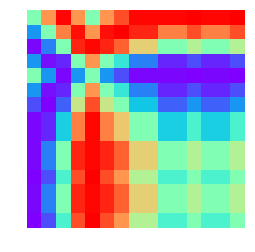

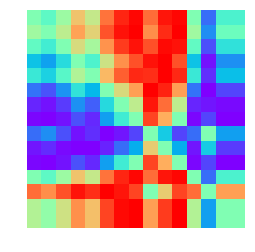

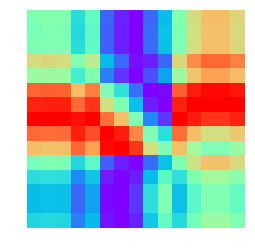

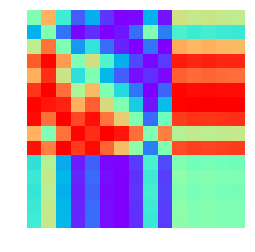

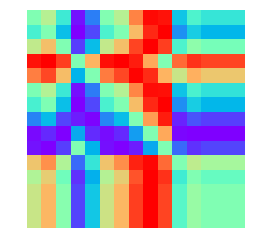

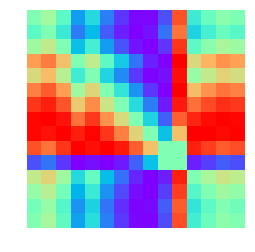

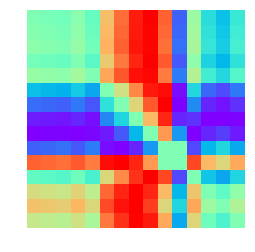

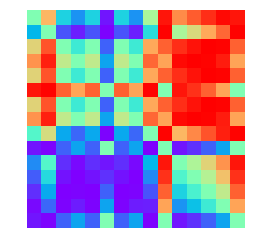

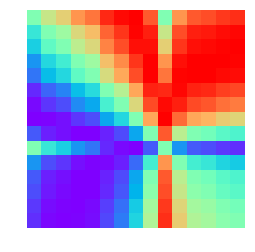

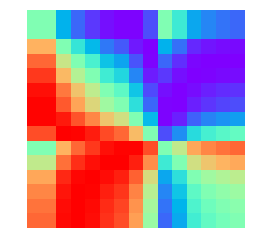

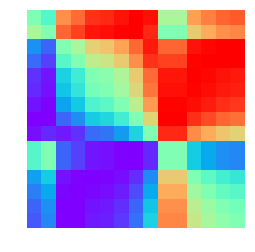

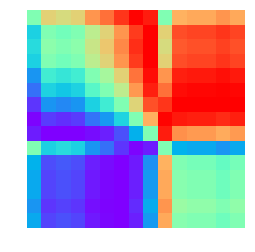

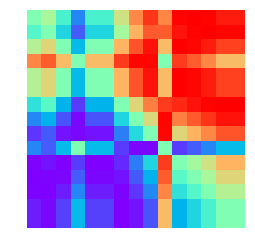

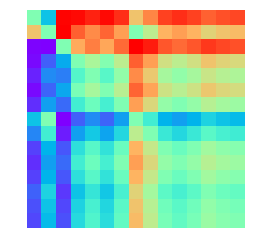

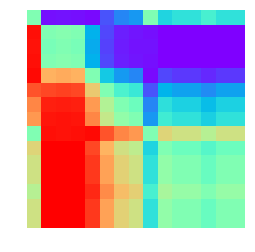

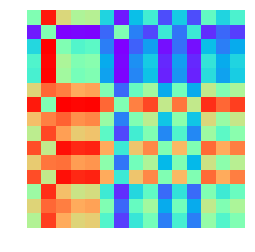

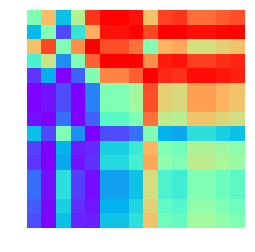

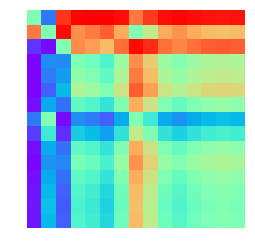

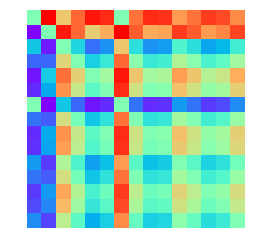

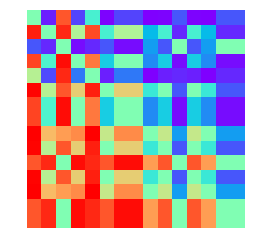

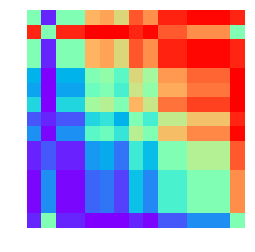

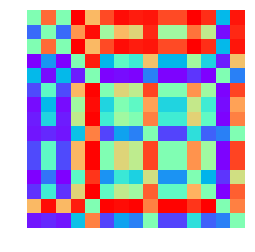

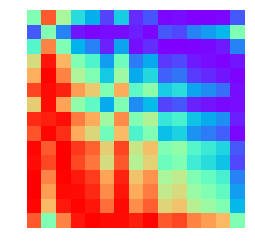

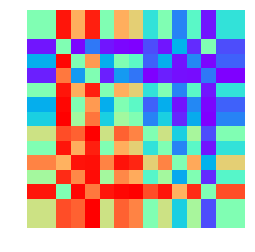

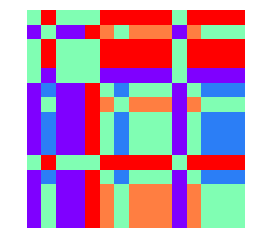

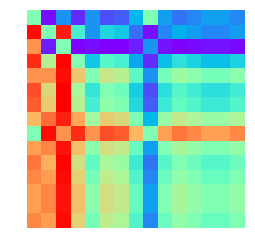

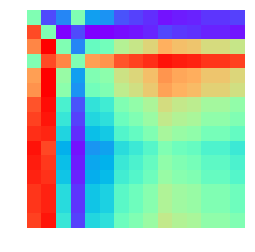

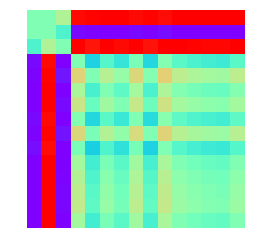

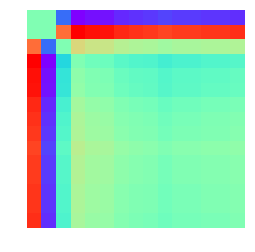

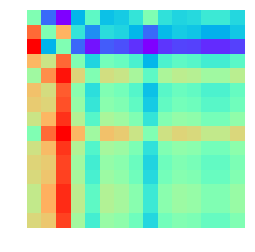

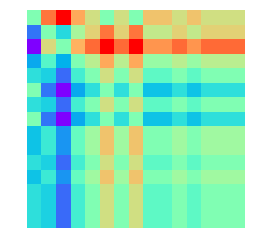

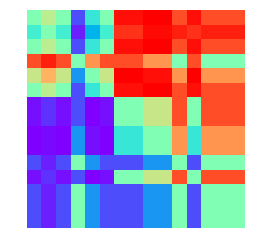

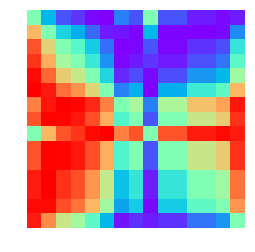

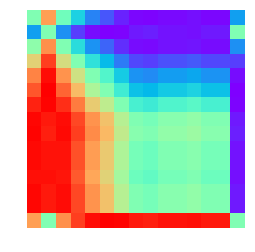

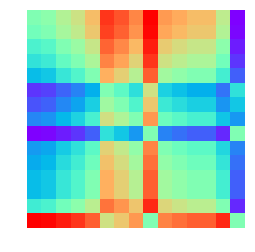

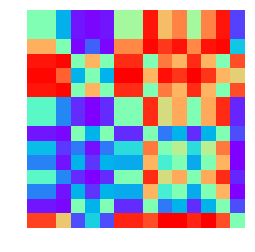

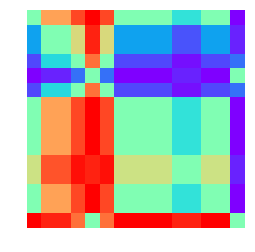

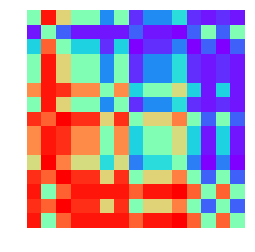

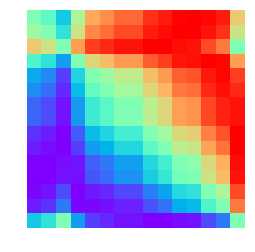

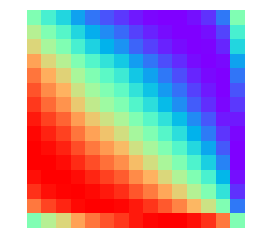

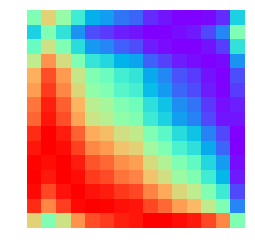

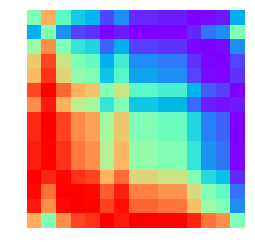

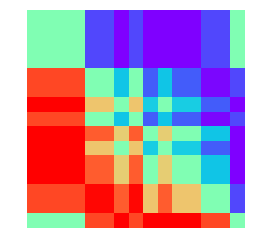

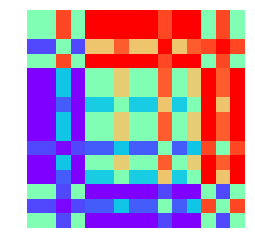

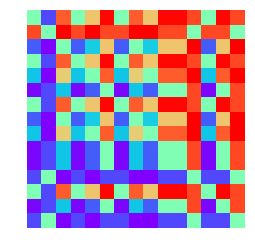

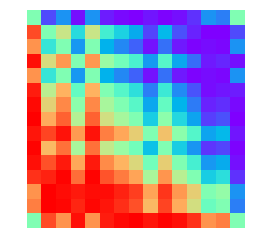

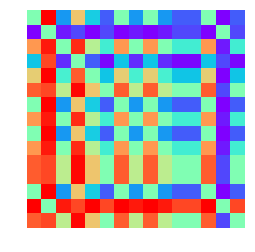

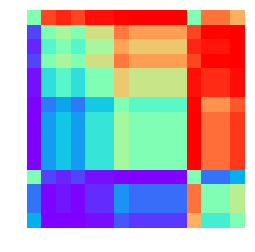

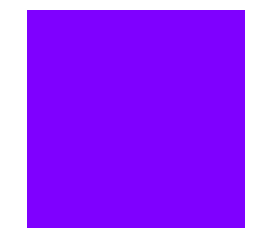

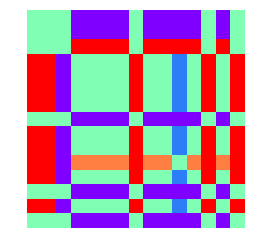

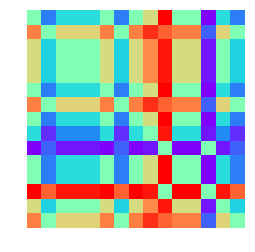

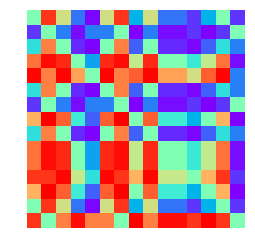

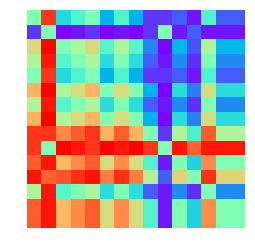

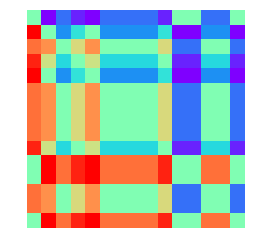

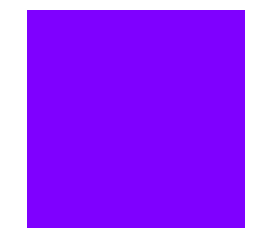

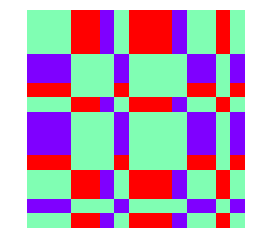

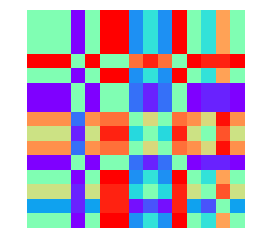

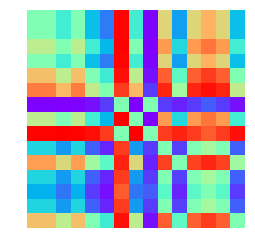

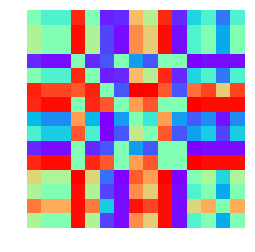

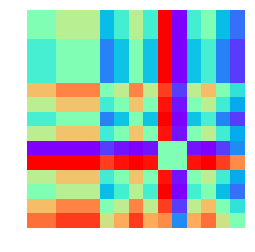

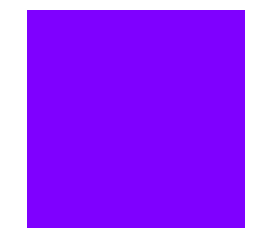

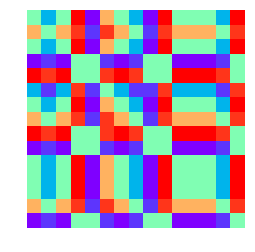

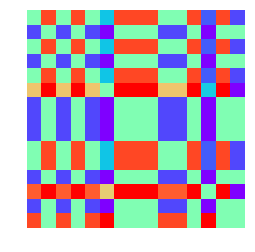

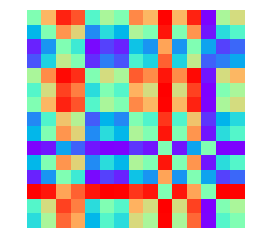

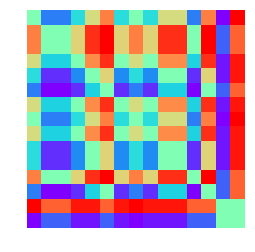

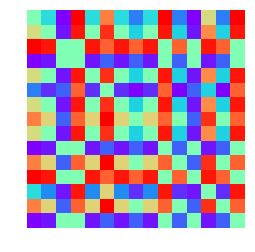

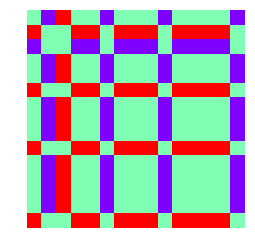

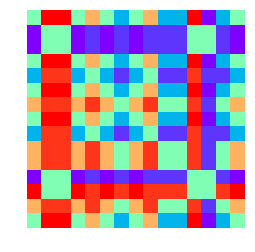

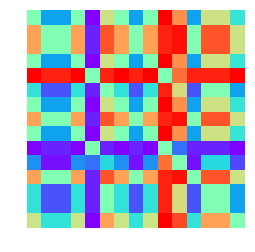

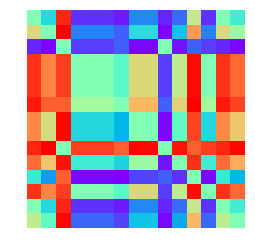

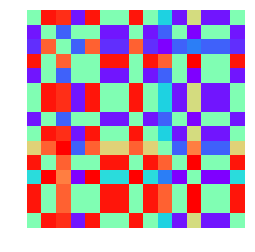

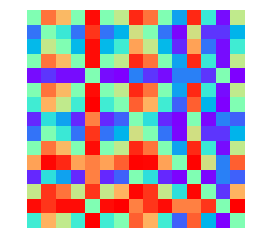

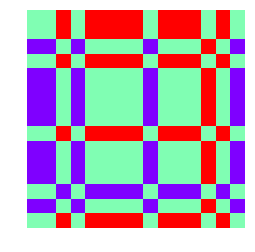

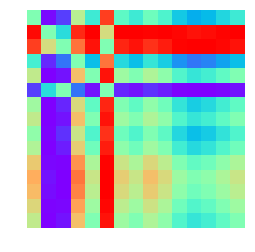

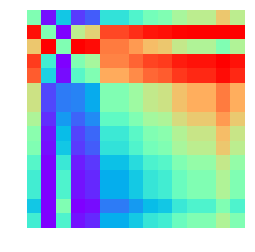

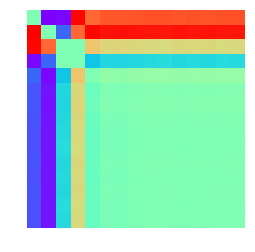

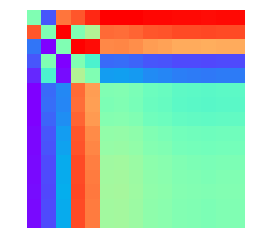

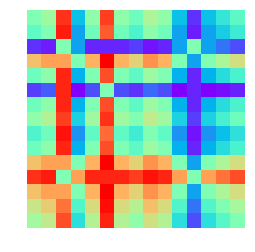

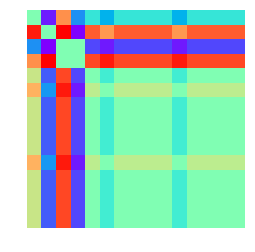

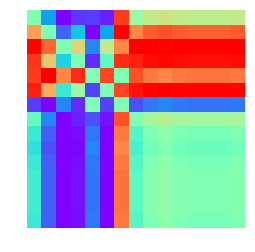

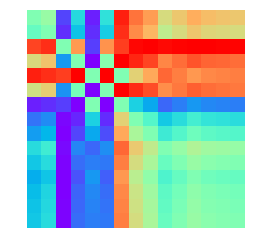

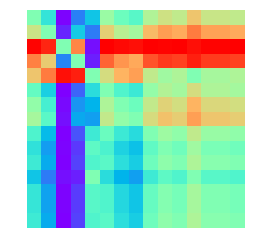

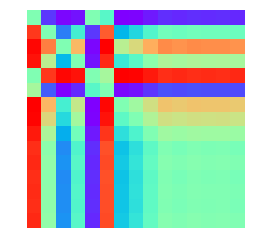

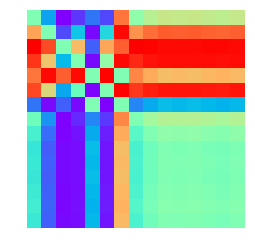

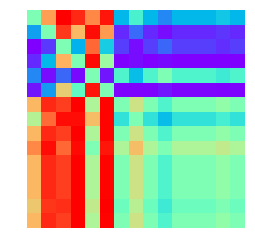

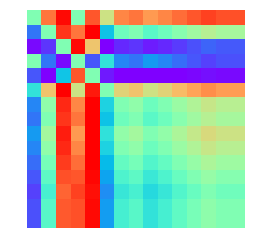

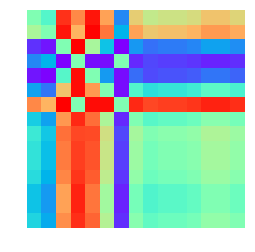

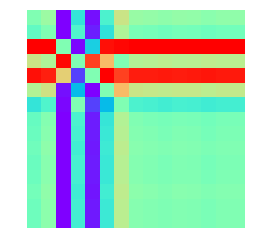

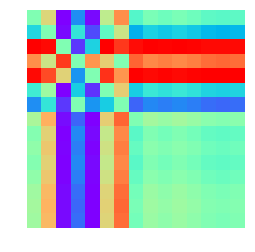

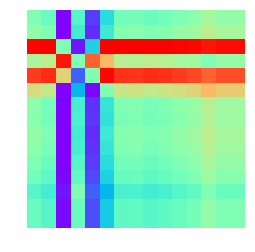

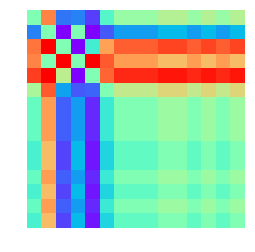

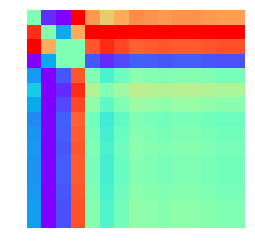

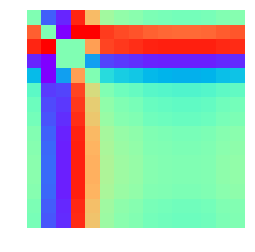

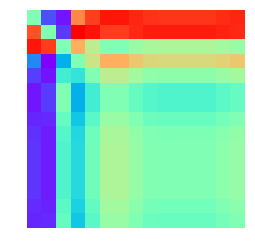

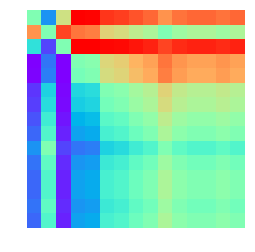

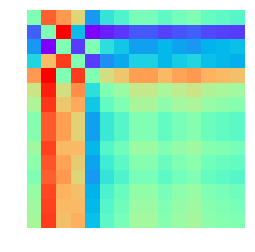

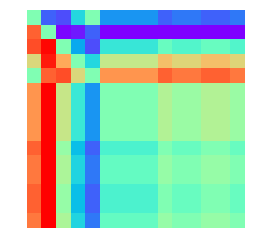

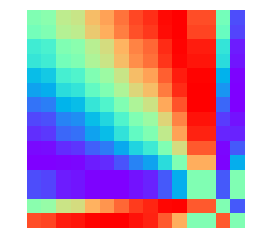

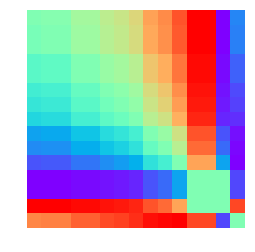

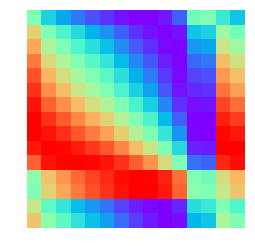

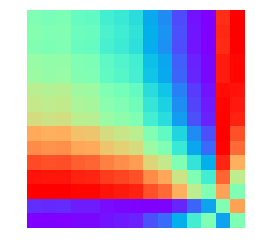

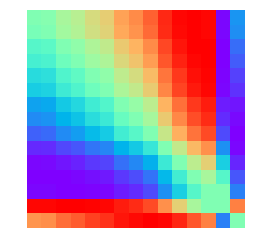

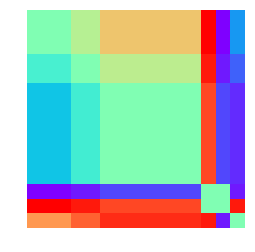

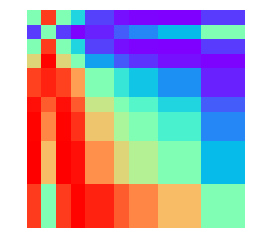

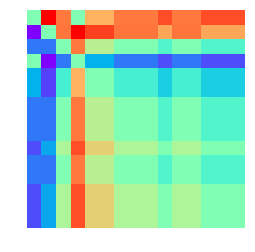

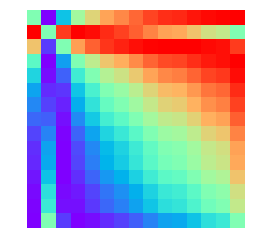

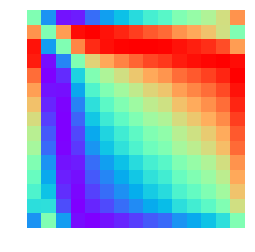

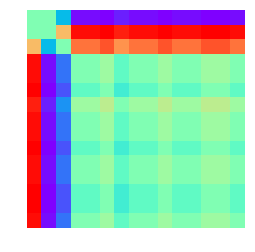

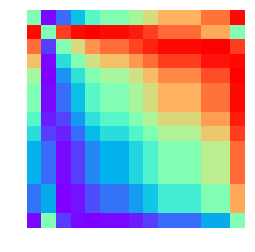

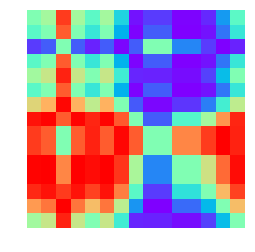

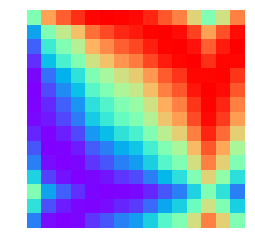

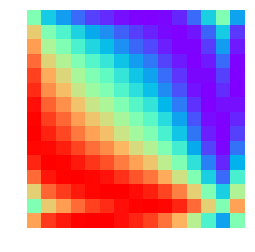

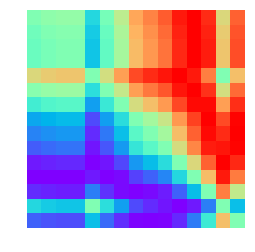

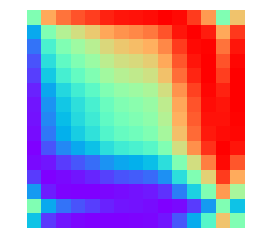

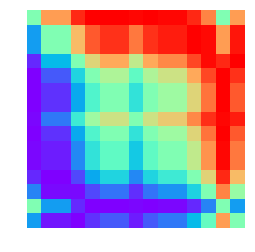

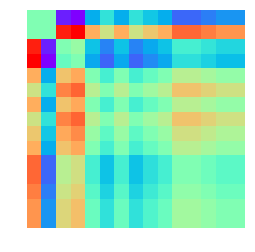

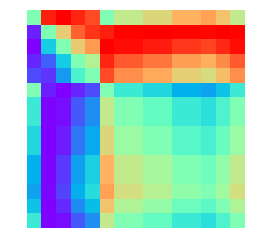

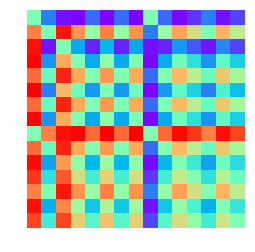

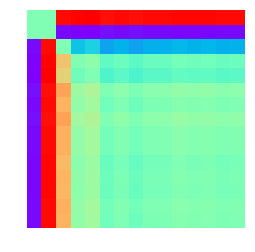

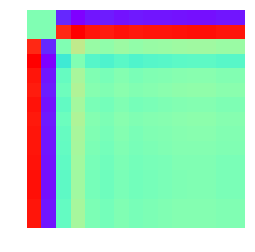

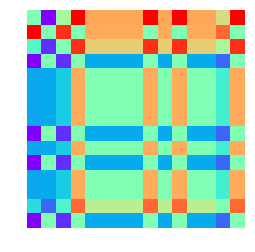

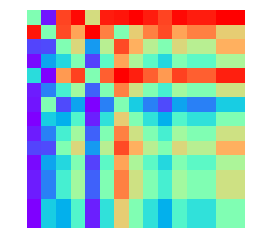

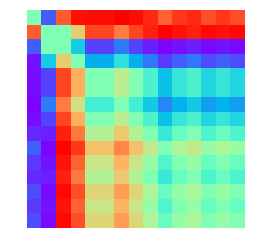

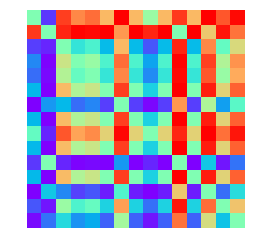

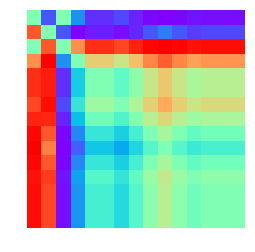

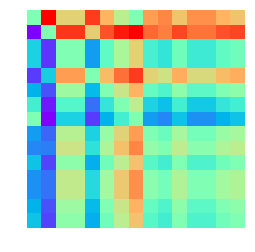

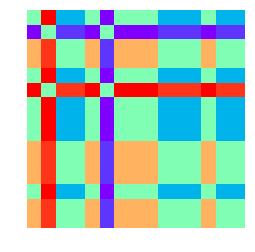

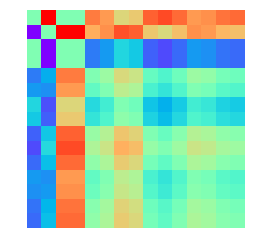

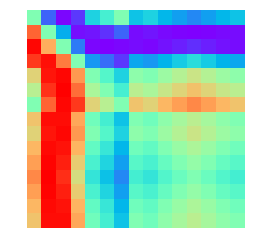

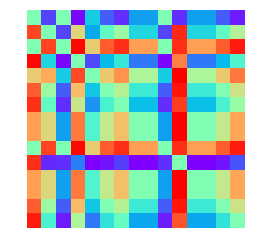

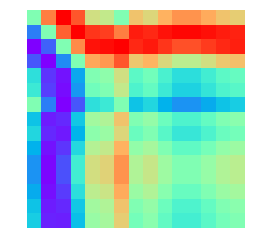

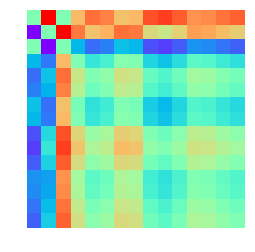

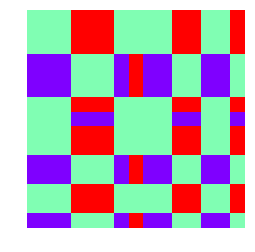

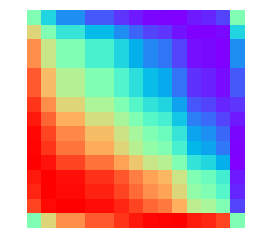

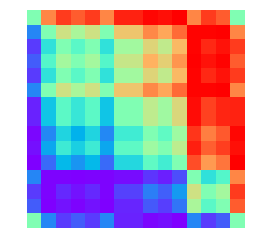

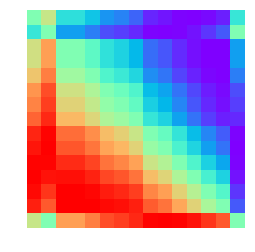

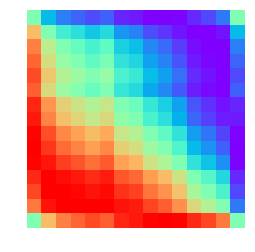

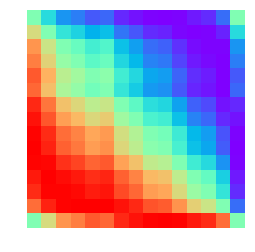

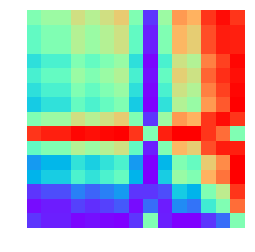

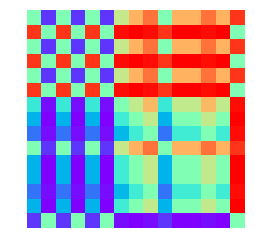

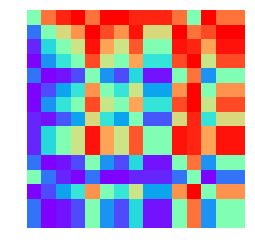

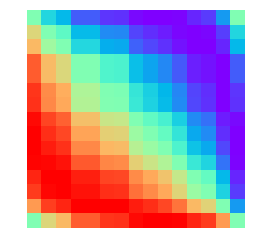

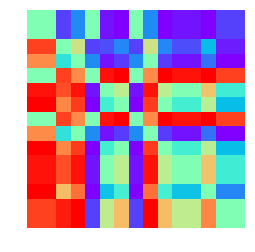

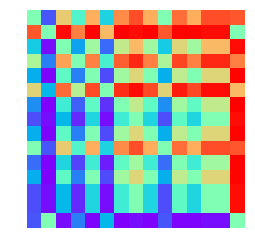

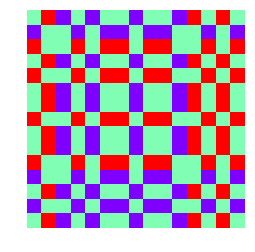

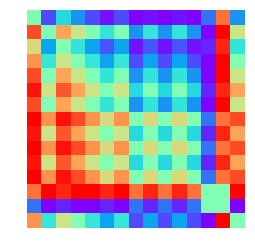

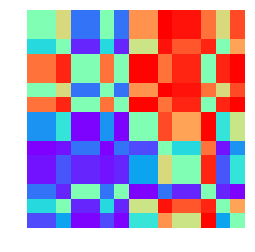

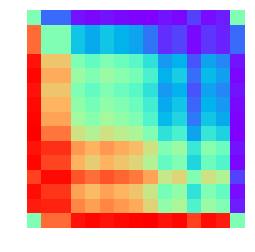

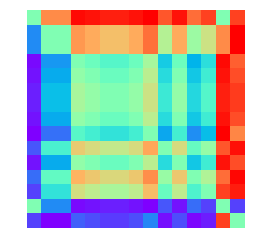

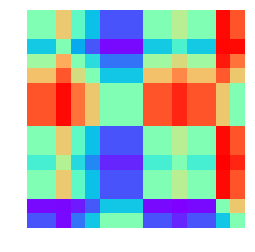

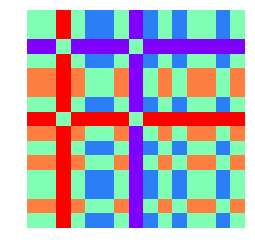

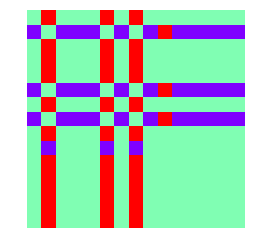

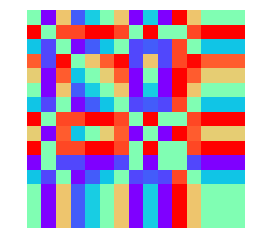

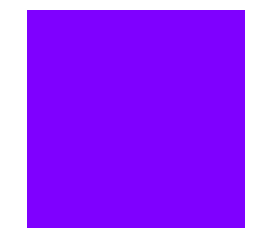

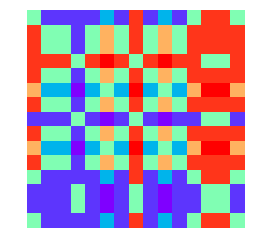

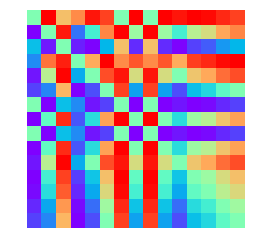

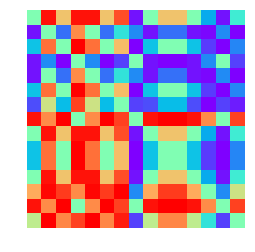

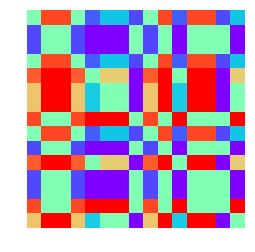

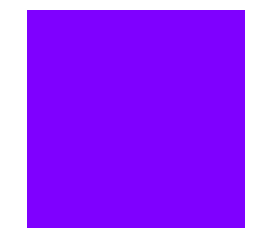

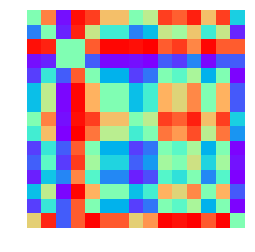

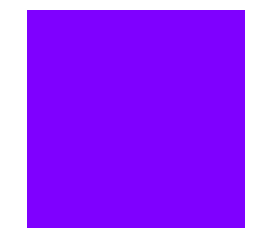

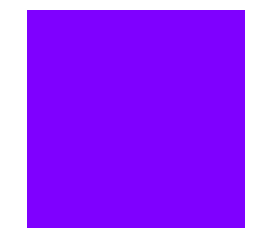

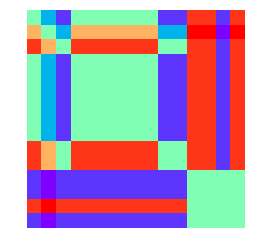

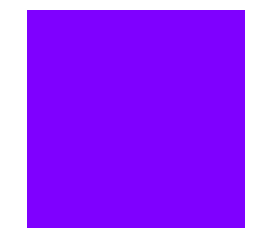

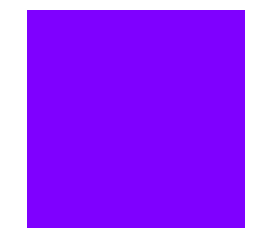

C:\ProgramData\Anaconda3\lib\site-packages\pyts\utils\utils.py:143: RuntimeWarning: invalid value encountered in true_divide
  rescaled_ts = (2 * aggregated_ts - max_ts - min_ts) / (max_ts - min_ts)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\image.py:405: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\image.py:406: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\image.py:413: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\image.py:418: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:916: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
C:\Progra

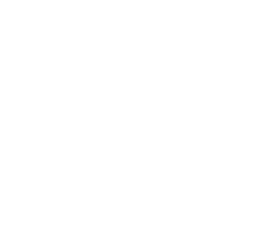

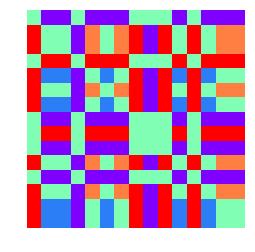

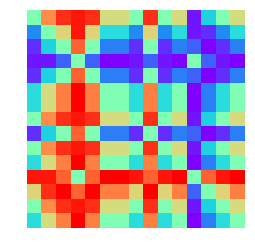

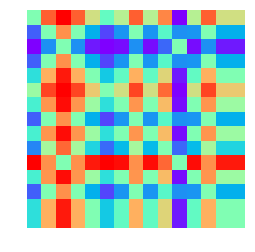

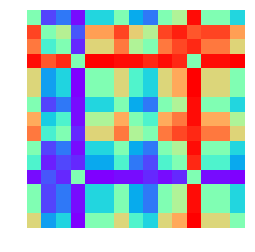

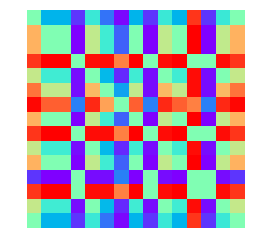

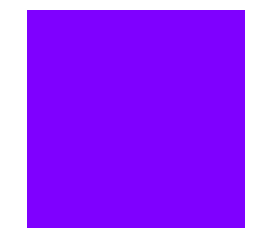

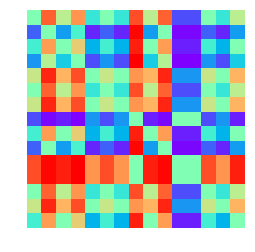

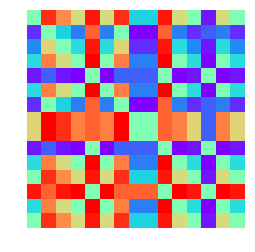

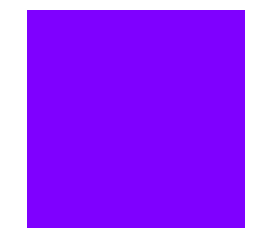

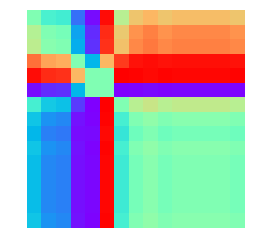

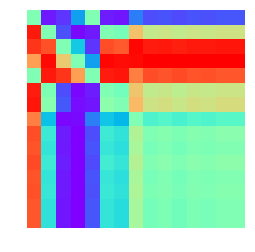

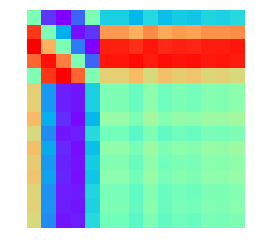

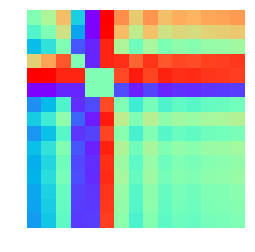

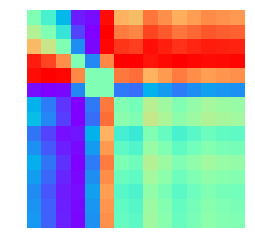

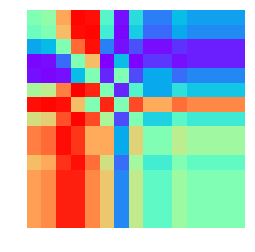

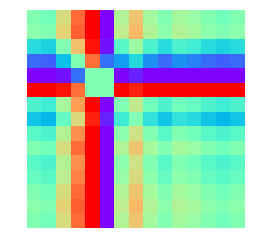

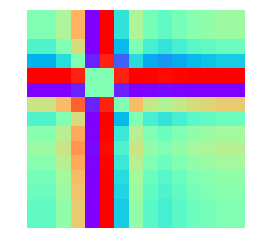

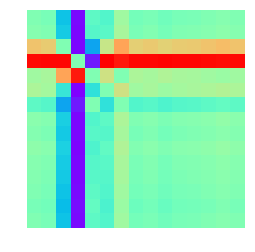

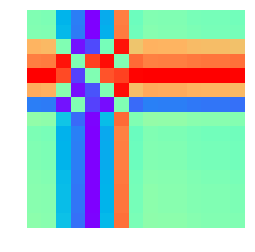

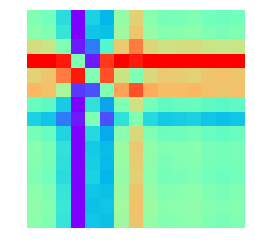

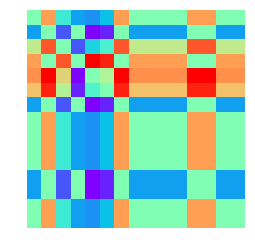

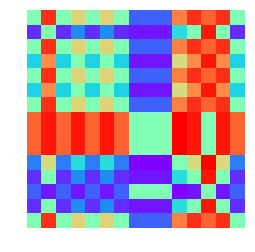

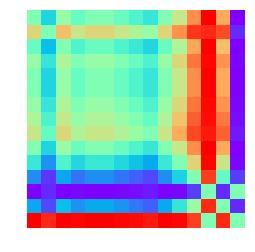

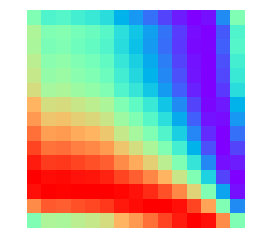

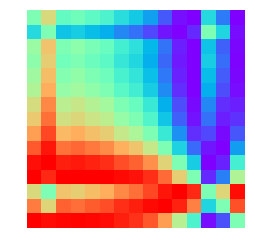

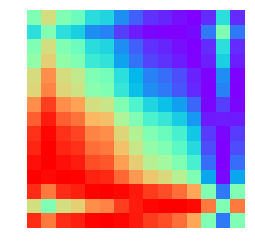

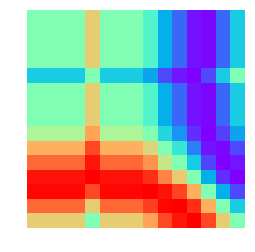

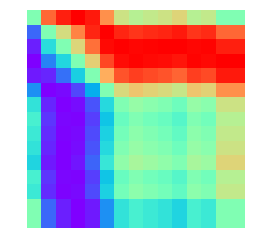

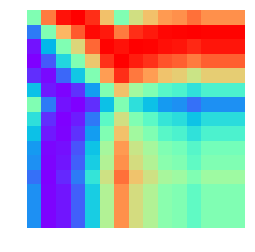

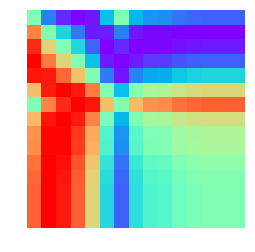

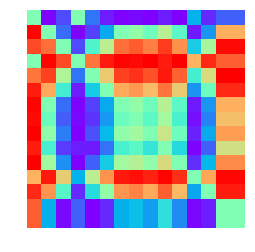

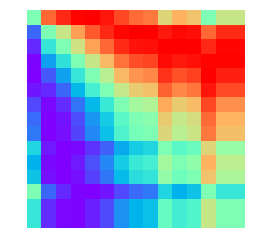

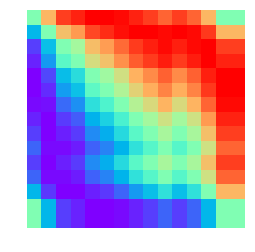

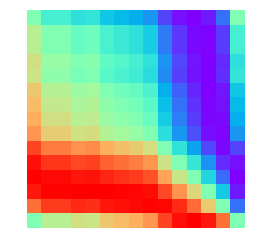

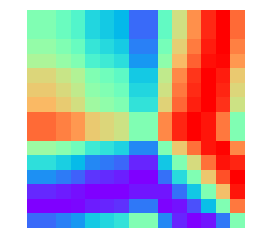

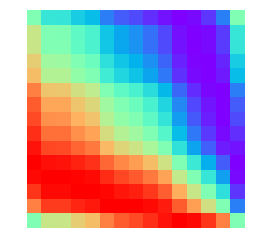

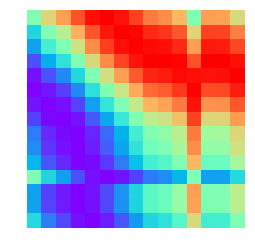

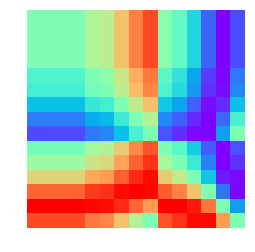

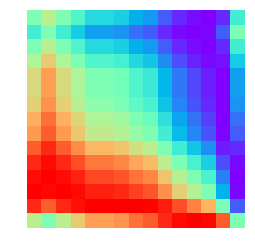

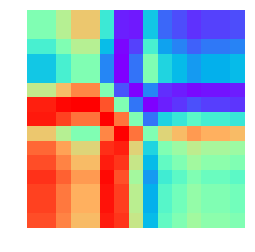

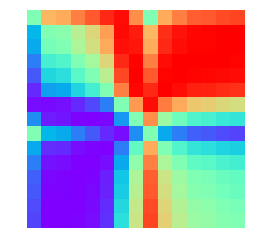

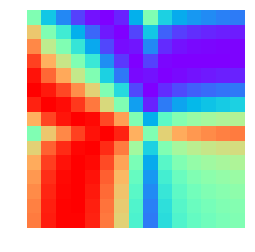

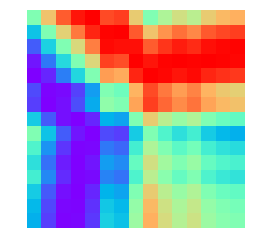

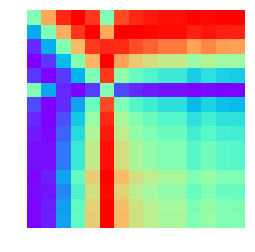

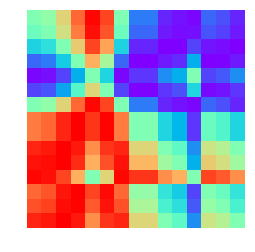

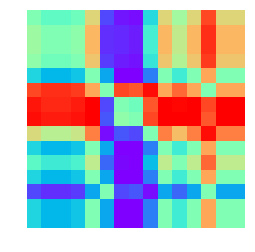

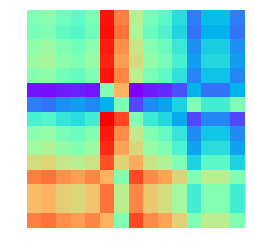

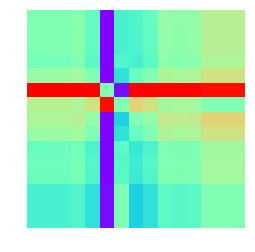

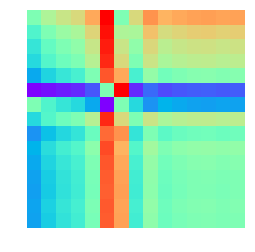

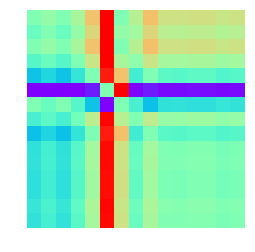

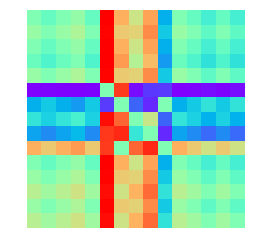

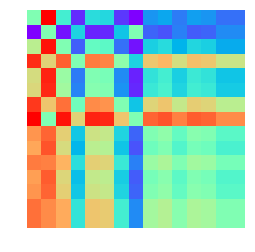

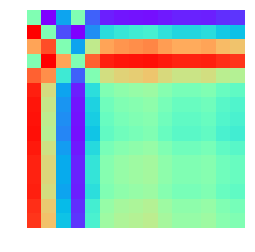

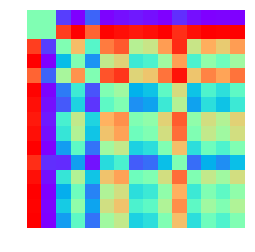

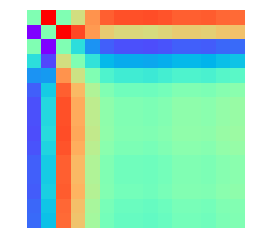

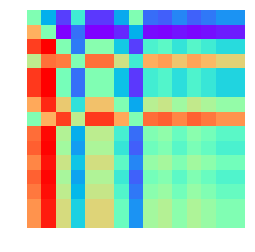

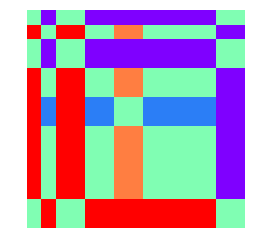

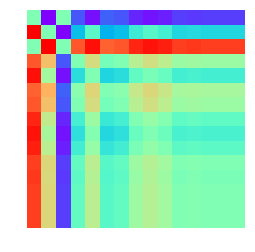

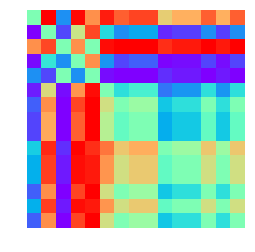

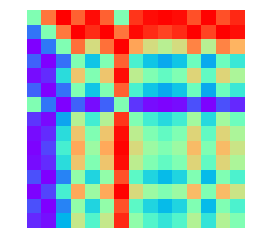

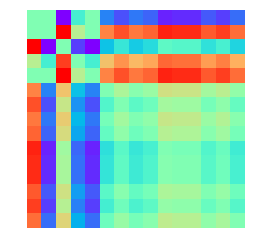

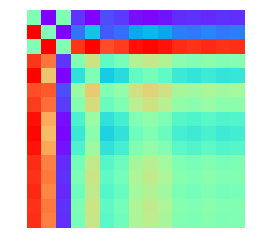

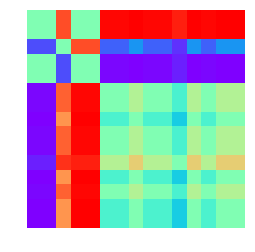

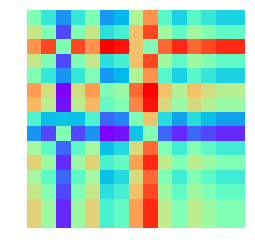

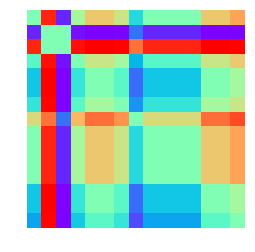

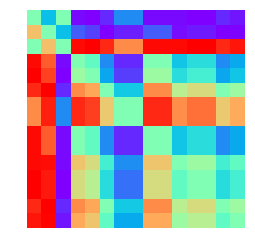

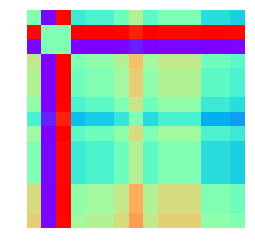

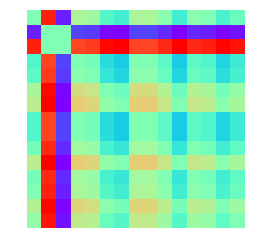

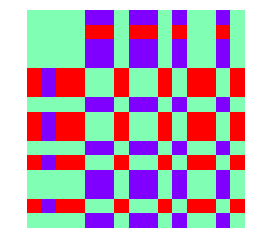

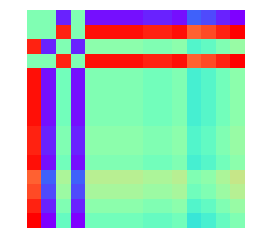

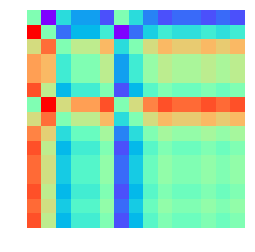

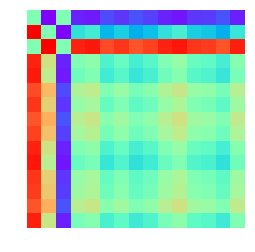

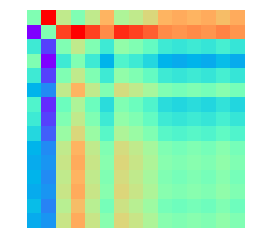

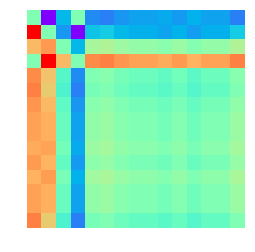

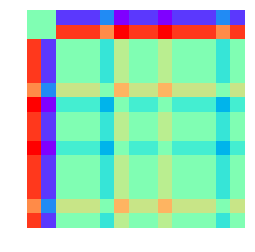

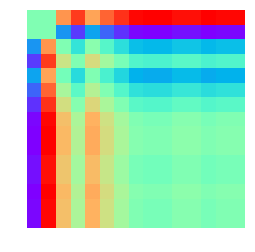

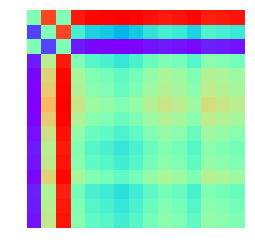

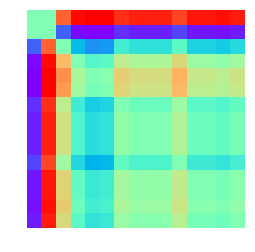

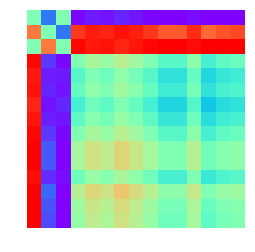

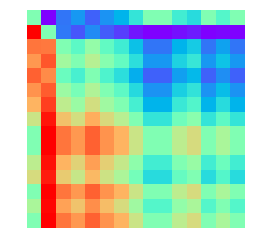

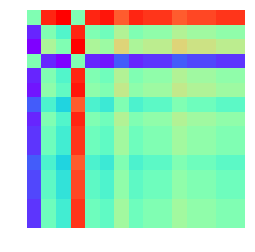

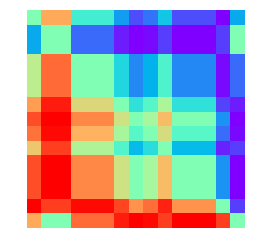

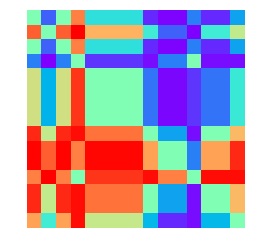

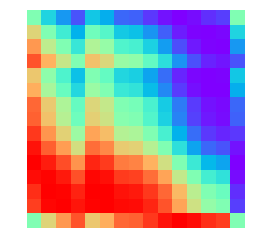

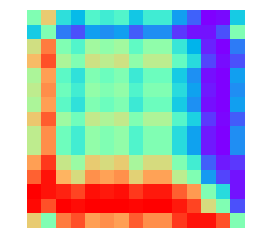

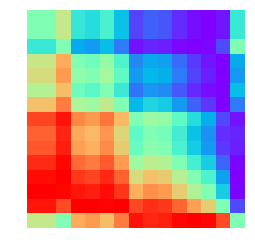

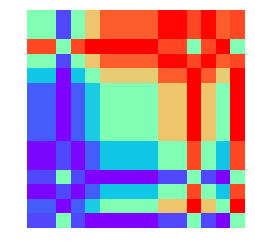

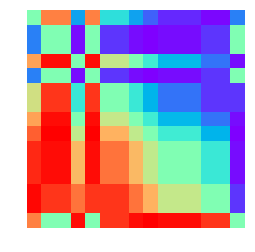

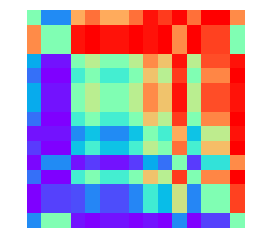

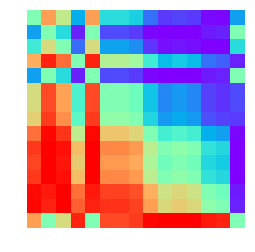

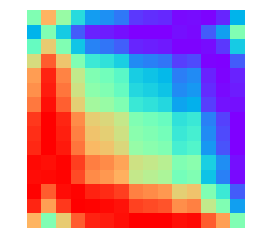

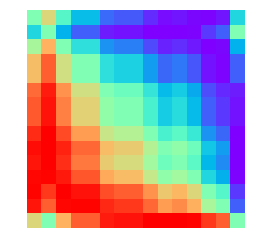

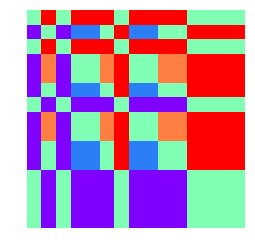

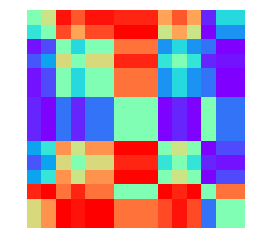

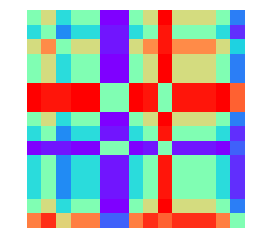

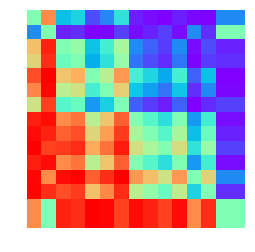

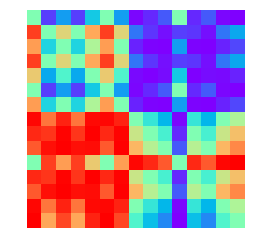

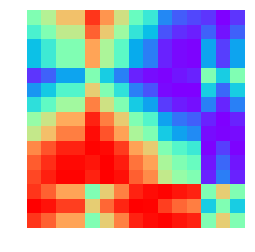

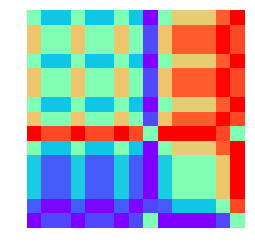

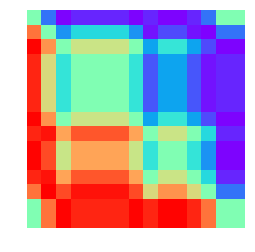

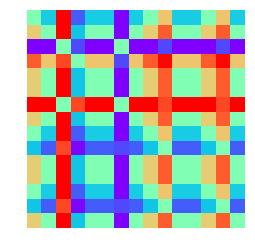

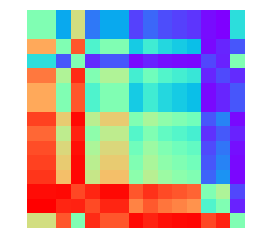

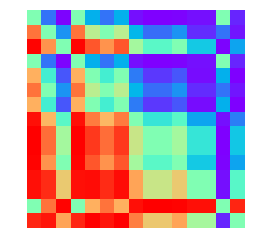

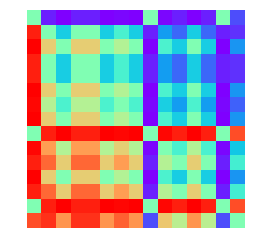

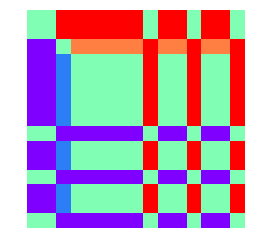

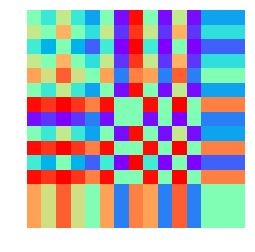

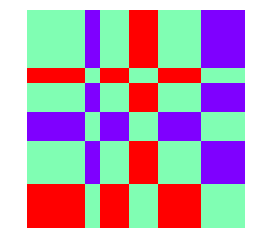

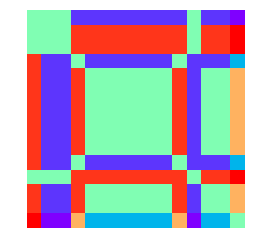

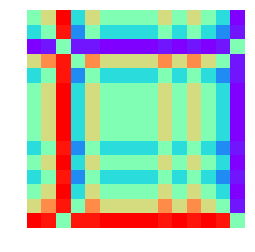

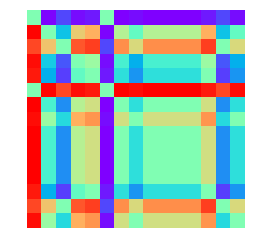

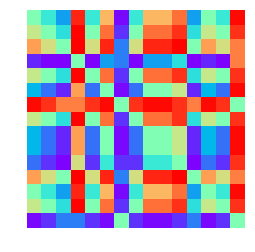

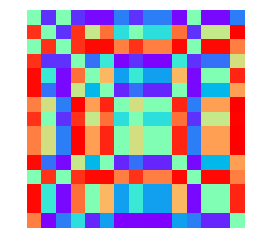

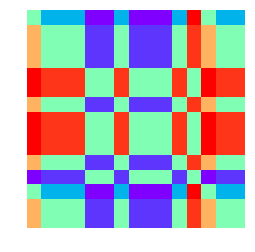

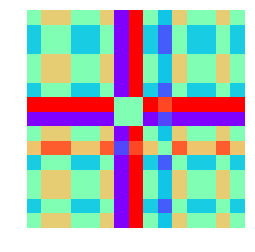

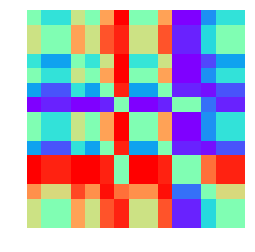

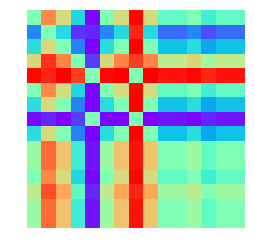

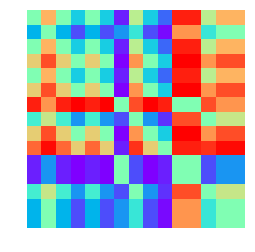

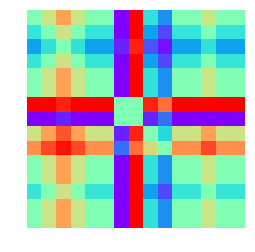

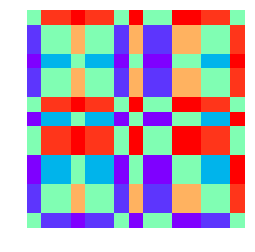

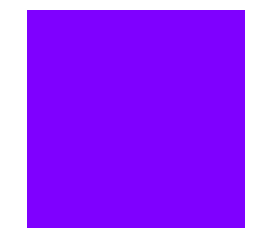

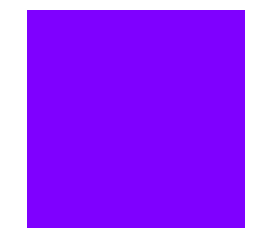

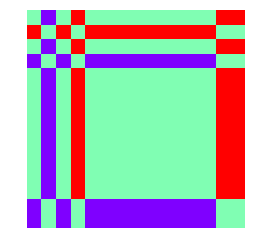

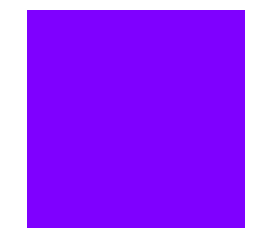

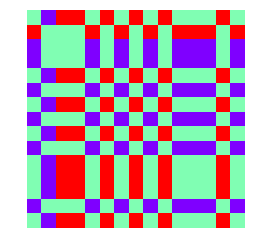

C:\ProgramData\Anaconda3\lib\site-packages\pyts\utils\utils.py:143: RuntimeWarning: invalid value encountered in true_divide
  rescaled_ts = (2 * aggregated_ts - max_ts - min_ts) / (max_ts - min_ts)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\image.py:405: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\image.py:406: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\image.py:413: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\image.py:418: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:916: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
C:\Progra

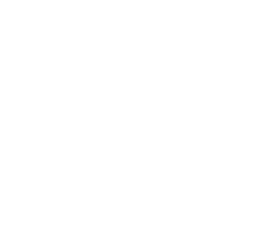

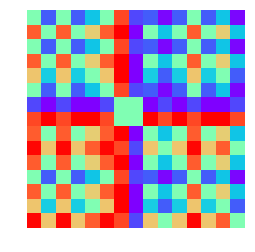

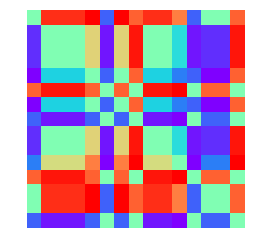

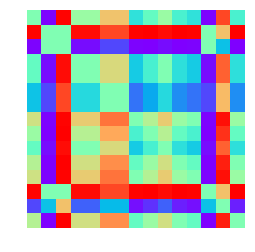

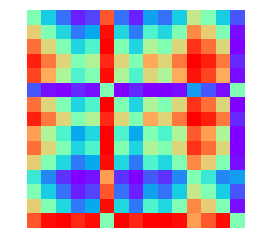

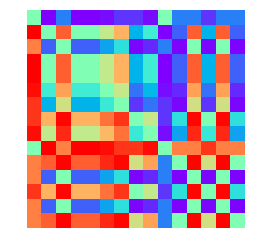

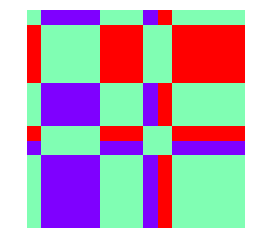

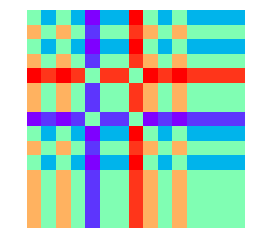

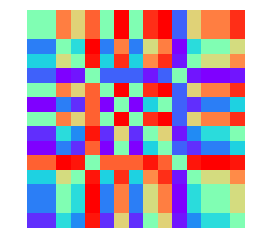

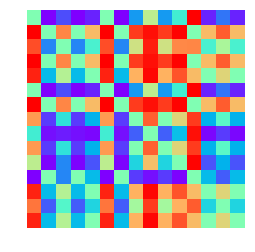

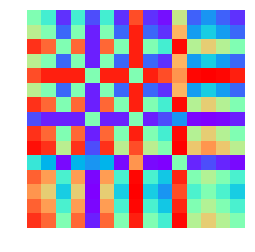

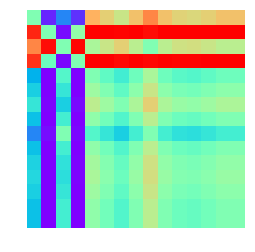

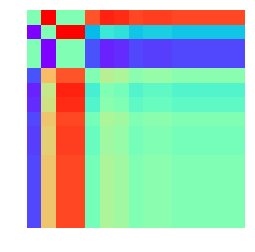

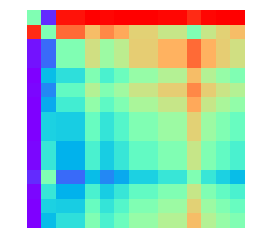

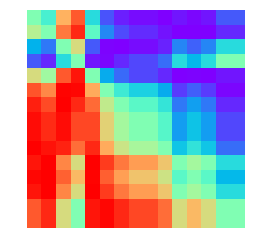

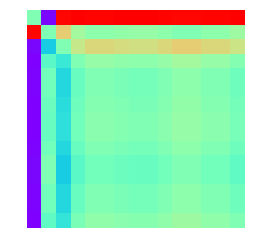

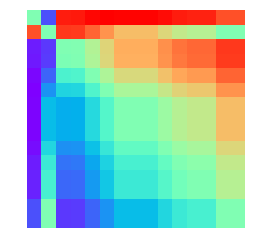

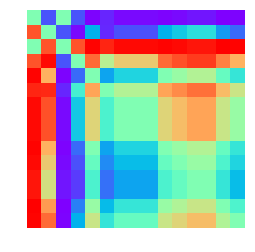

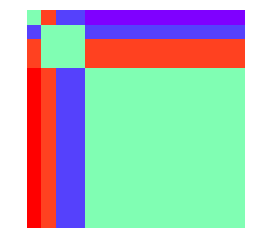

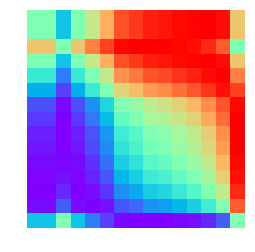

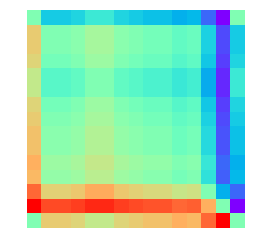

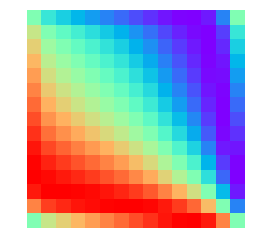

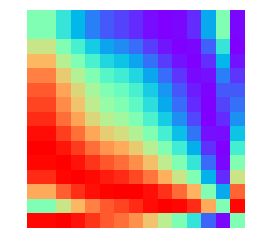

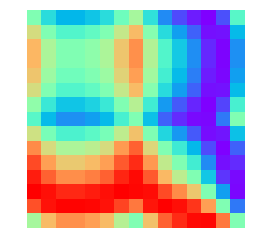

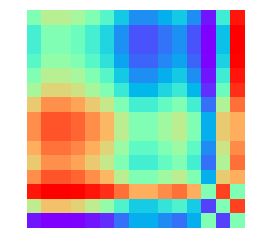

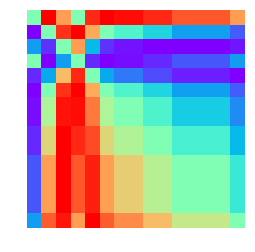

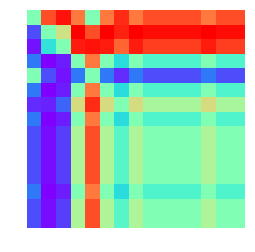

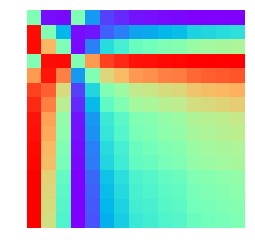

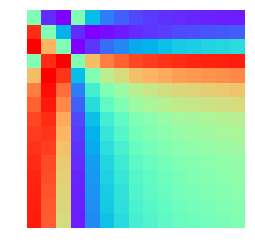

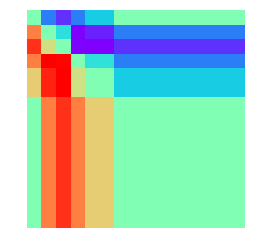

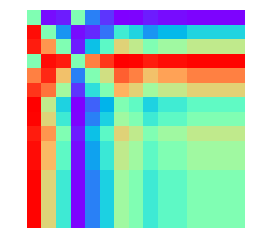

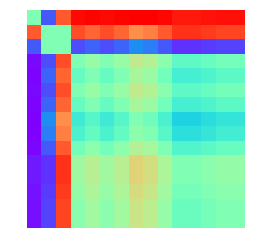

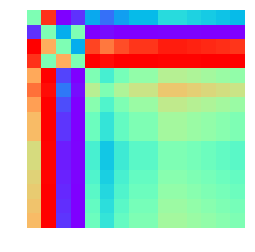

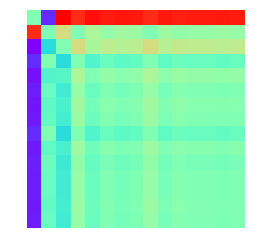

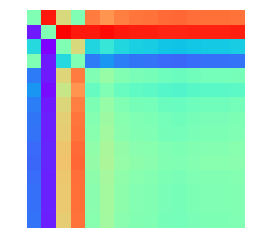

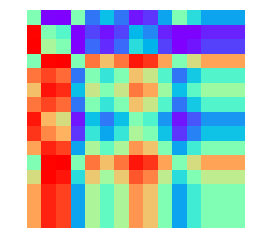

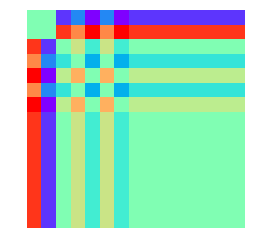

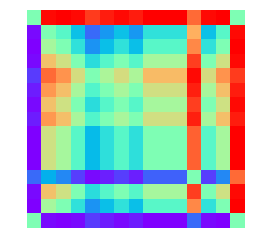

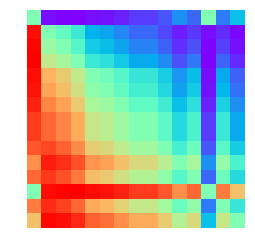

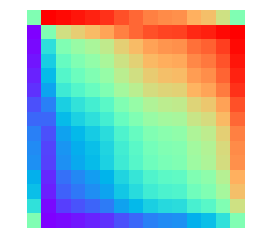

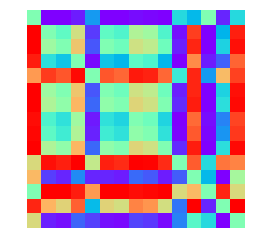

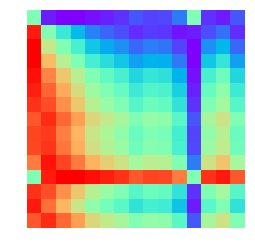

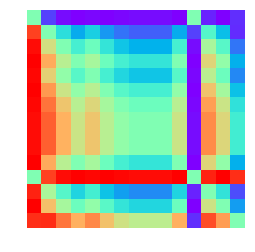

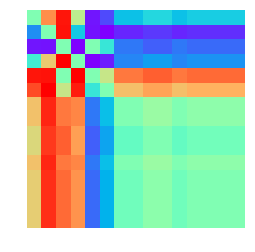

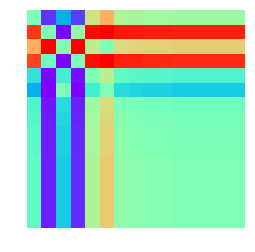

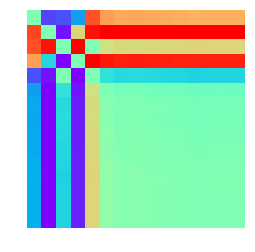

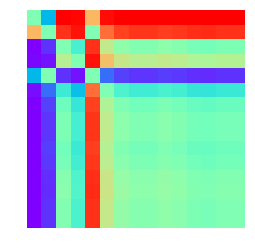

In [13]:
transformation(True,True,"gadf")

C:\ProgramData\Anaconda3\lib\site-packages\pyts\utils\utils.py:176: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  MTF[np.meshgrid(list_values[i], list_values[j])] = MTM[i, j]


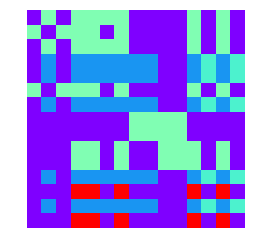

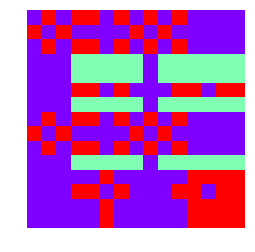

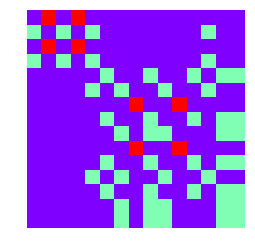

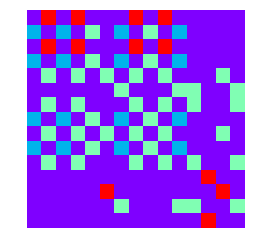

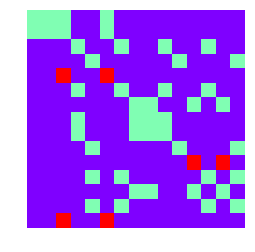

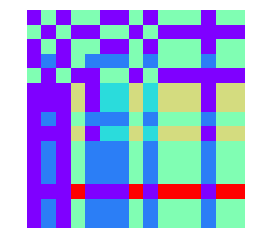

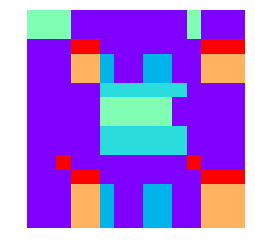

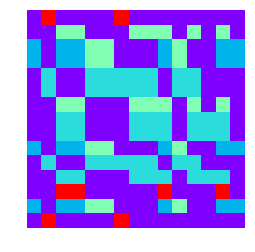

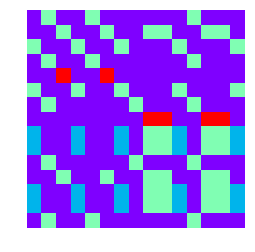

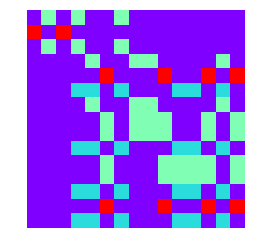

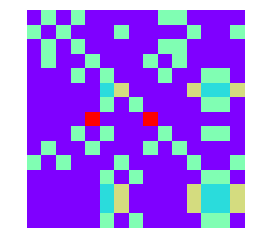

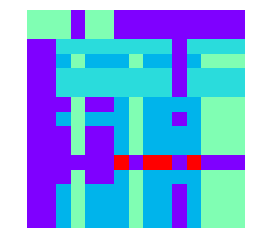

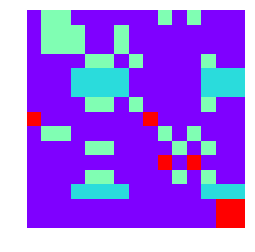

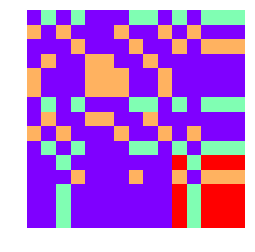

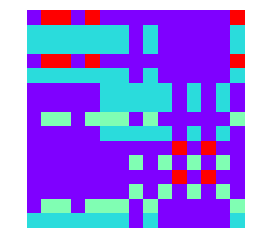

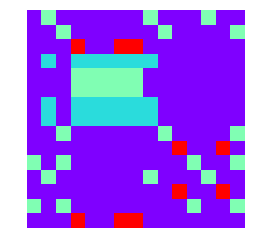

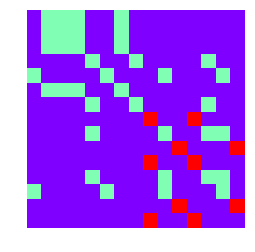

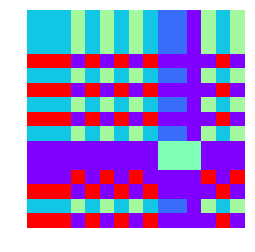

C:\ProgramData\Anaconda3\lib\site-packages\pyts\utils\utils.py:176: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  MTF[np.meshgrid(list_values[i], list_values[j])] = MTM[i, j]


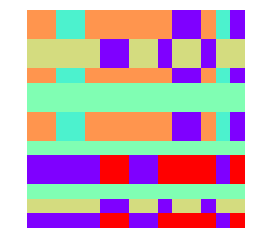

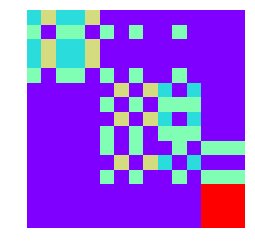

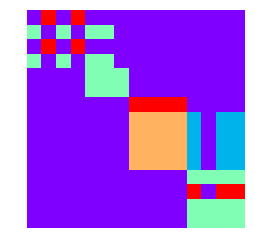

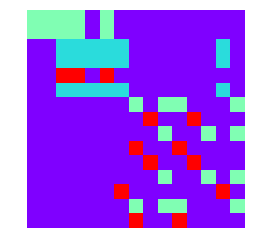

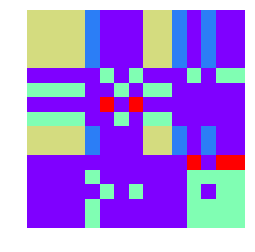

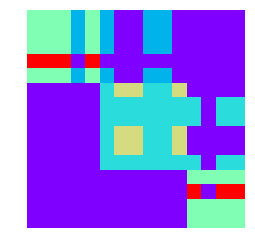

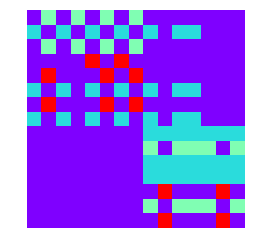

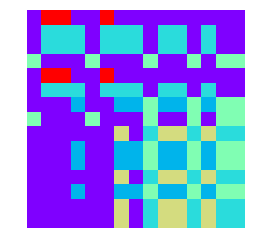

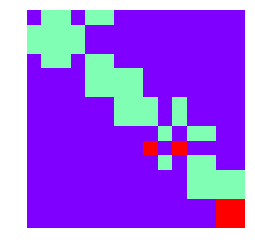

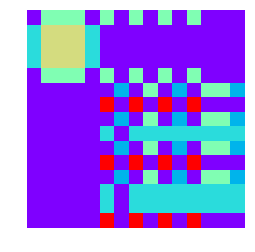

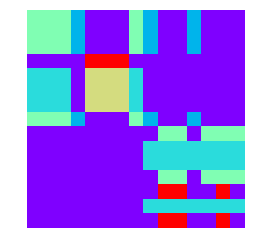

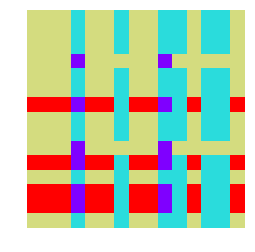

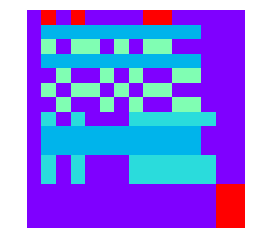

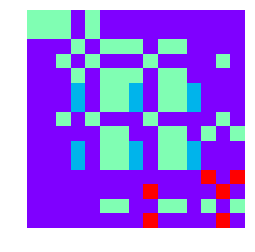

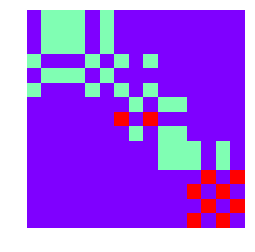

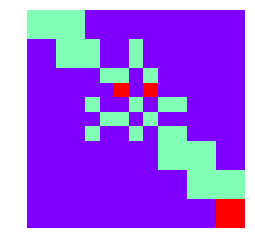

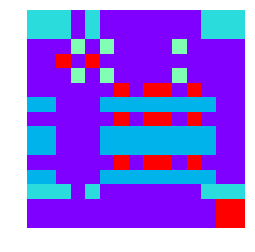

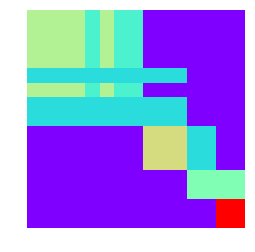

C:\ProgramData\Anaconda3\lib\site-packages\pyts\utils\utils.py:176: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  MTF[np.meshgrid(list_values[i], list_values[j])] = MTM[i, j]


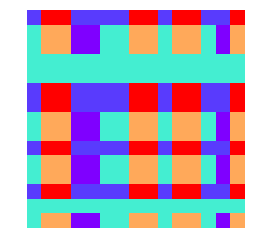

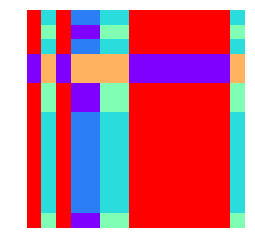

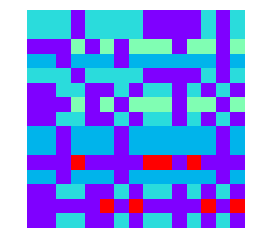

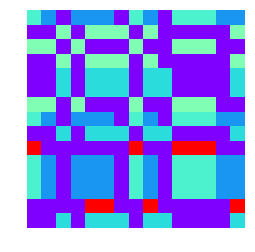

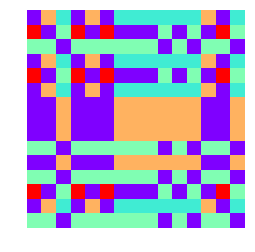

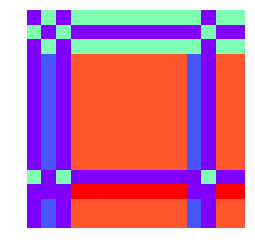

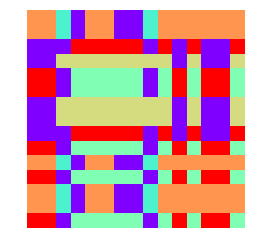

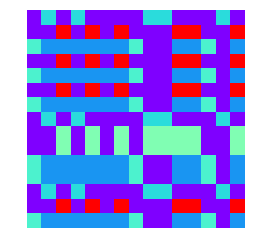

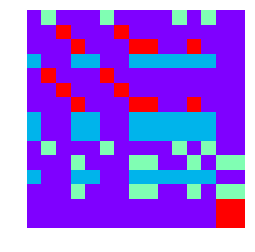

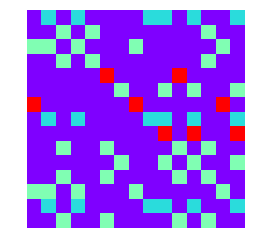

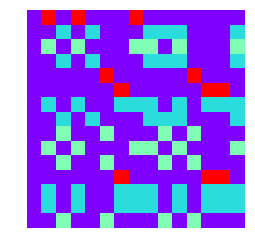

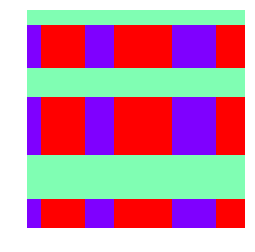

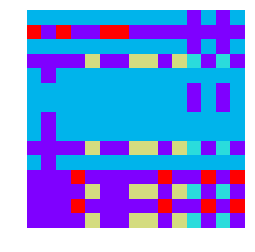

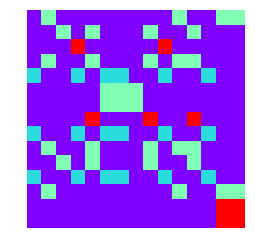

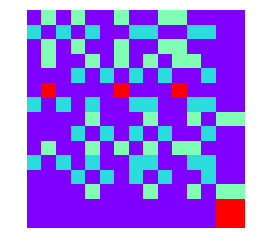

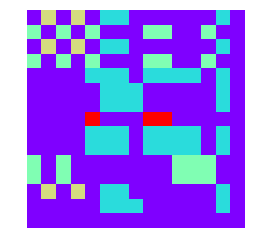

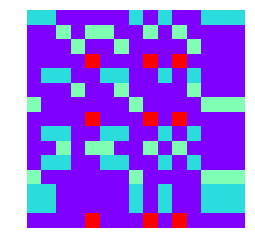

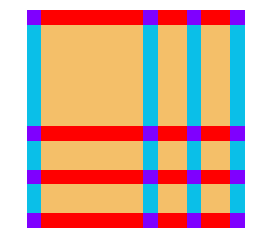

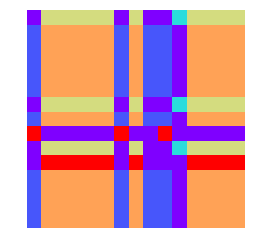

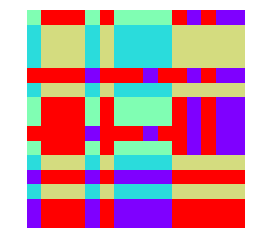

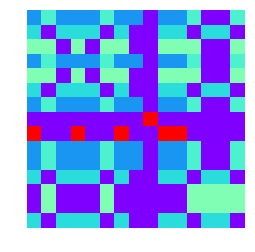

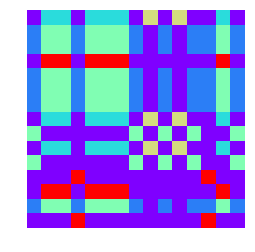

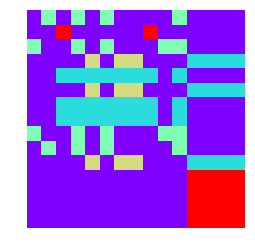

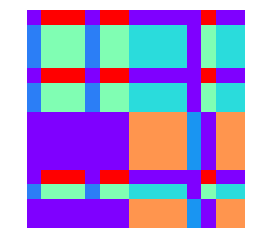

C:\ProgramData\Anaconda3\lib\site-packages\pyts\utils\utils.py:176: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  MTF[np.meshgrid(list_values[i], list_values[j])] = MTM[i, j]


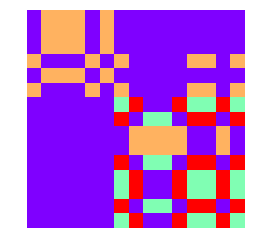

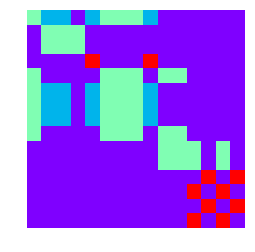

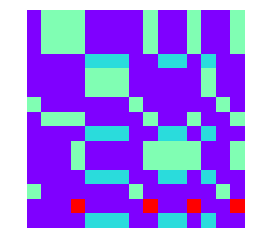

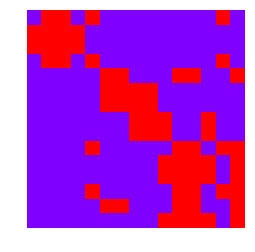

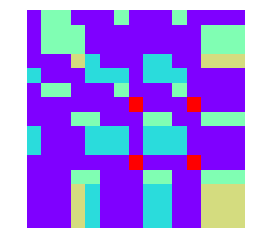

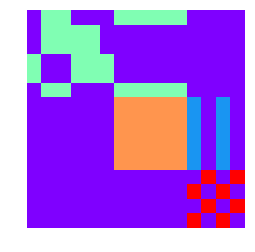

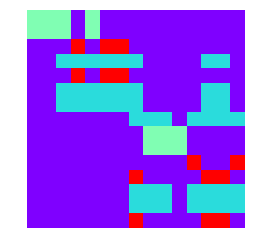

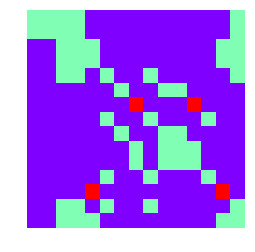

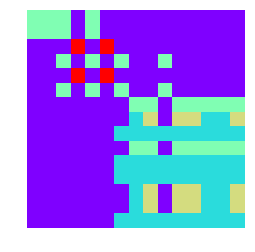

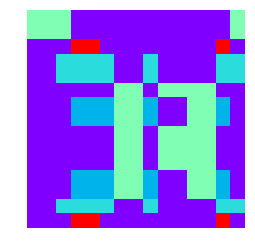

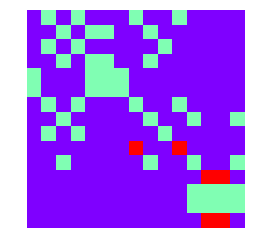

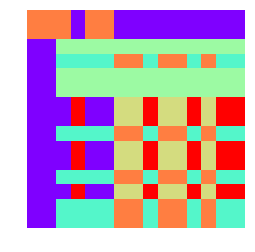

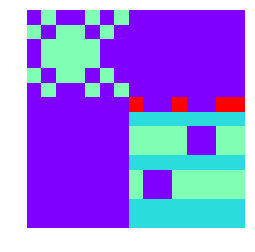

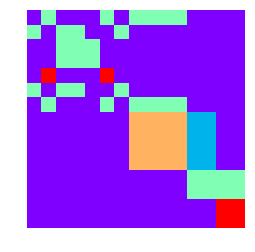

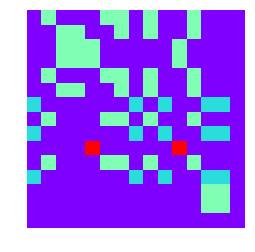

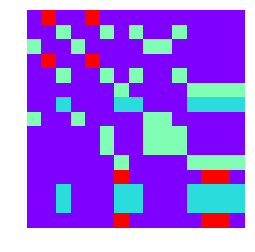

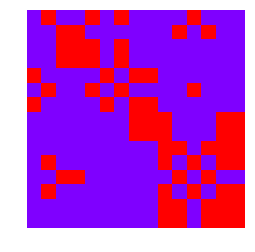

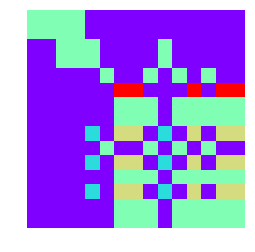

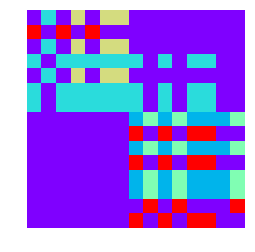

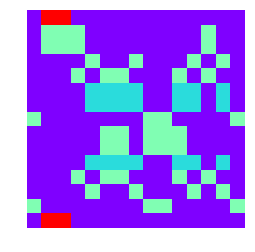

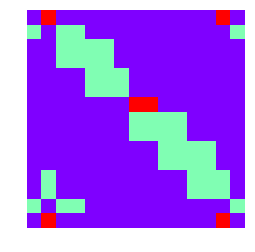

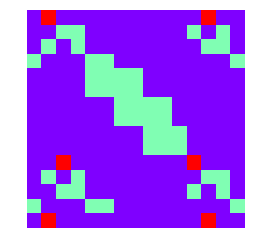

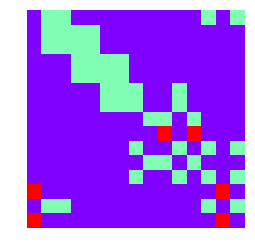

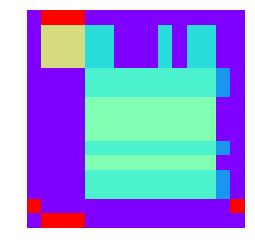

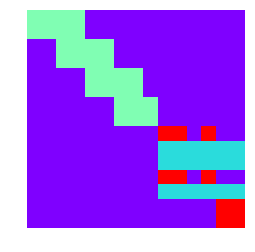

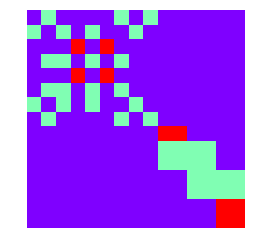

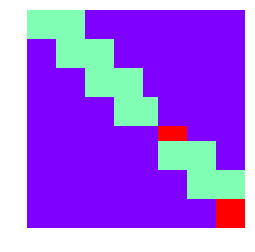

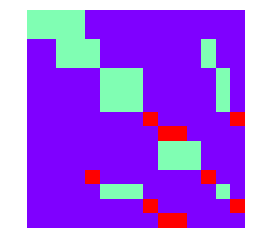

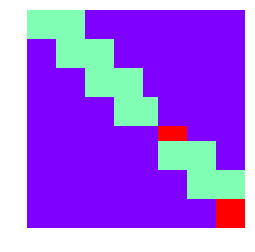

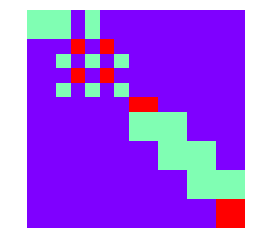

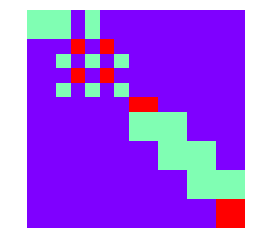

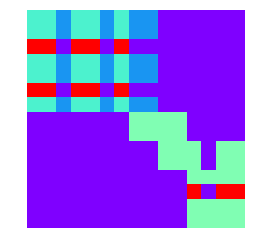

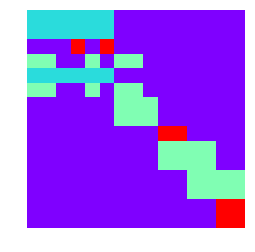

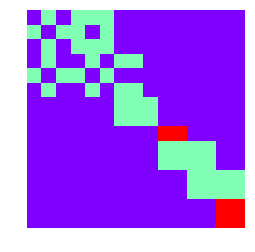

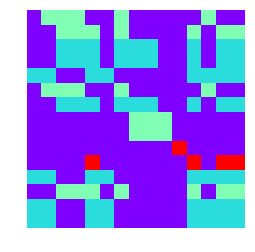

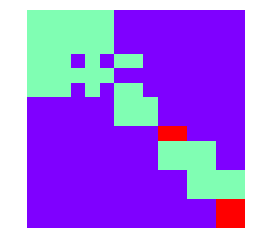

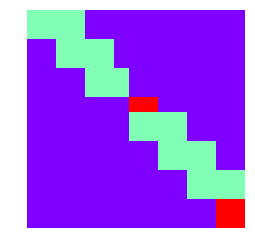

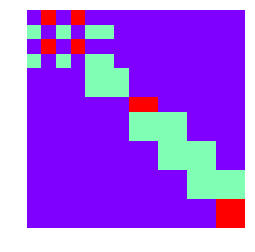

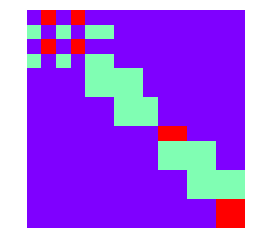

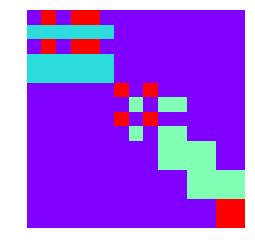

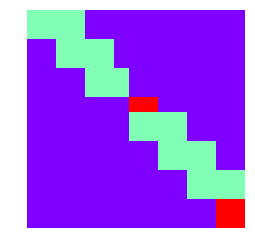

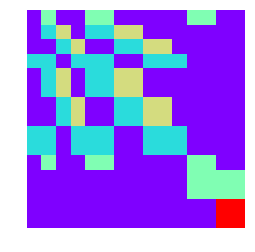

C:\ProgramData\Anaconda3\lib\site-packages\pyts\utils\utils.py:176: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  MTF[np.meshgrid(list_values[i], list_values[j])] = MTM[i, j]


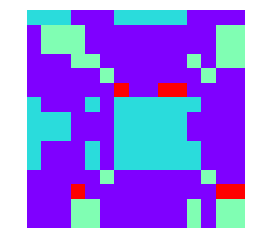

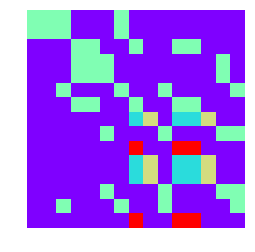

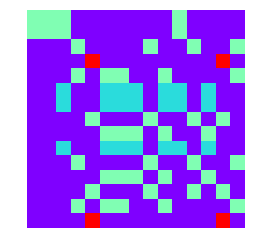

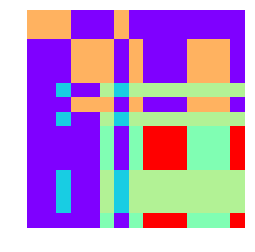

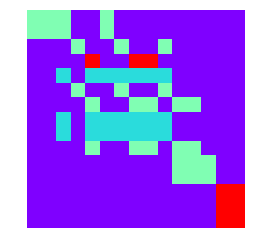

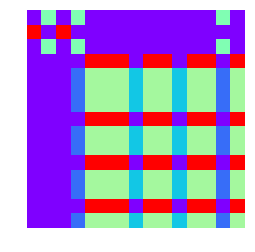

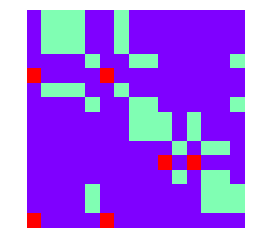

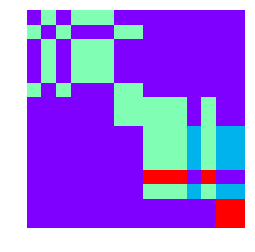

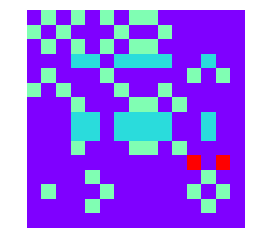

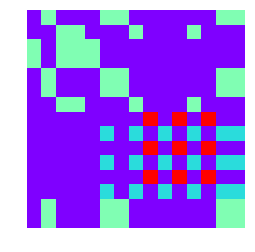

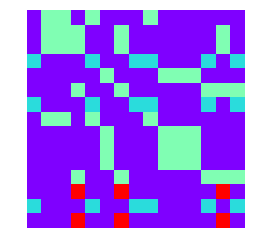

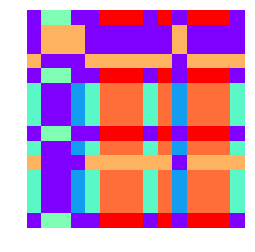

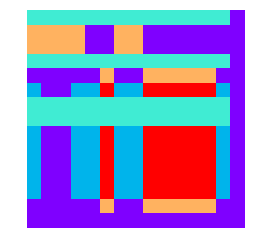

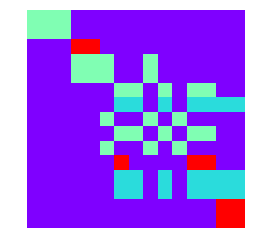

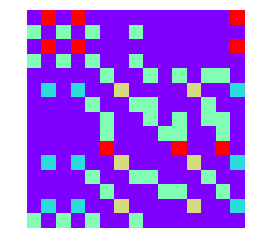

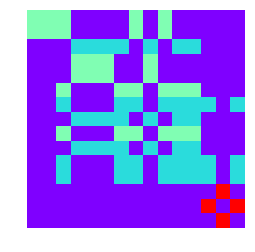

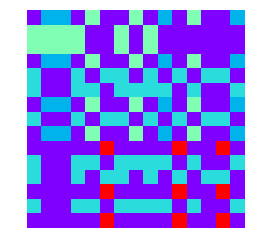

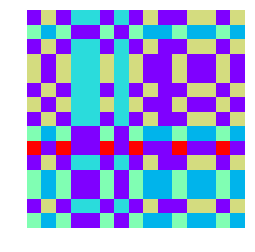

C:\ProgramData\Anaconda3\lib\site-packages\pyts\utils\utils.py:176: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  MTF[np.meshgrid(list_values[i], list_values[j])] = MTM[i, j]


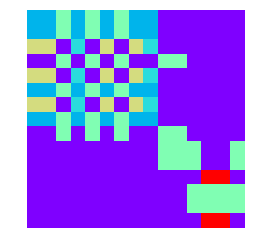

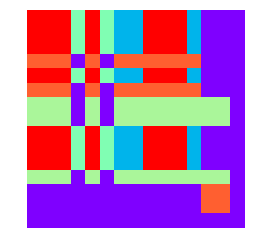

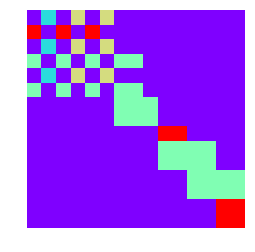

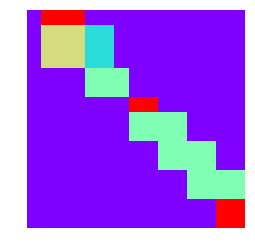

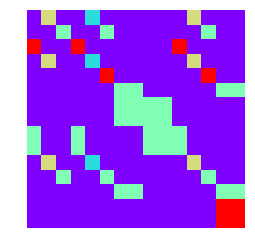

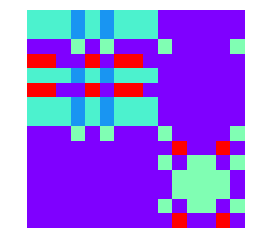

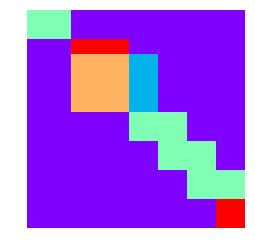

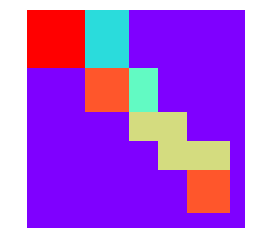

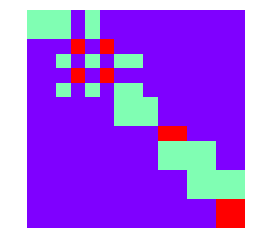

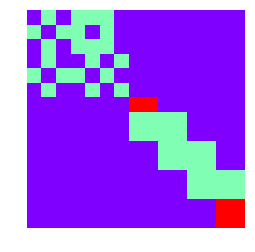

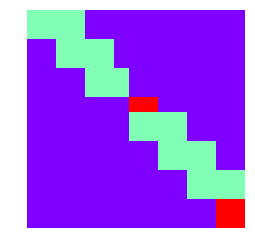

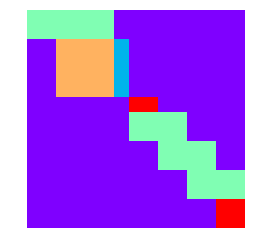

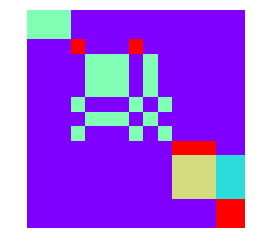

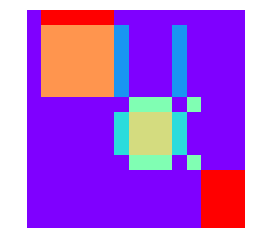

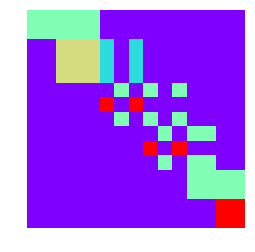

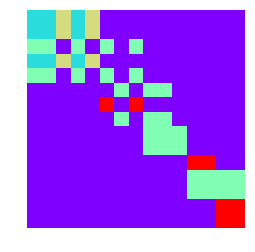

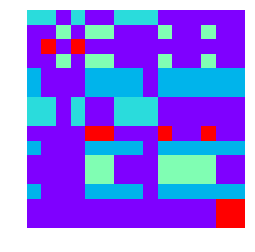

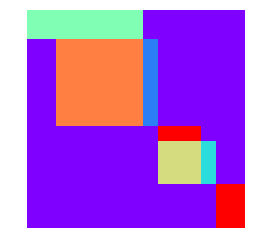

C:\ProgramData\Anaconda3\lib\site-packages\pyts\utils\utils.py:176: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  MTF[np.meshgrid(list_values[i], list_values[j])] = MTM[i, j]


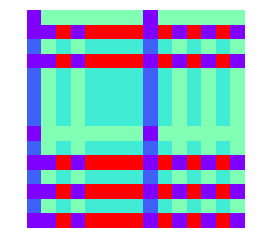

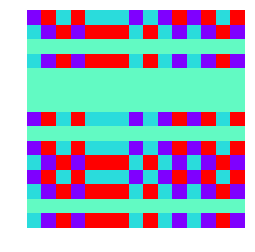

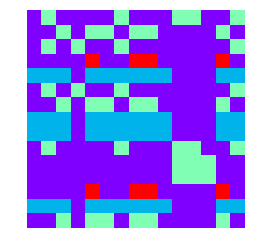

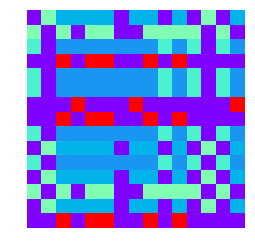

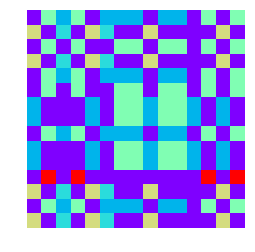

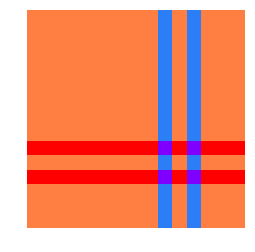

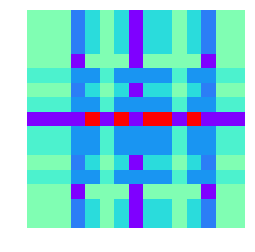

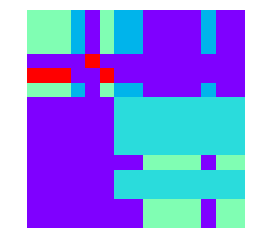

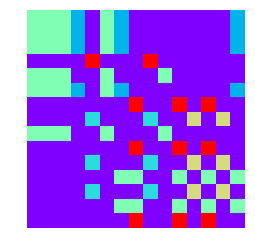

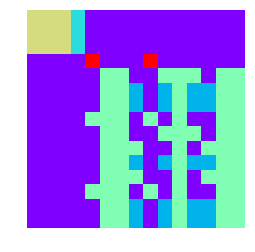

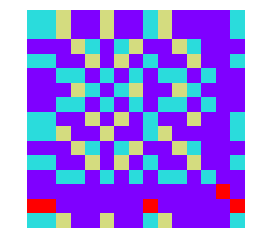

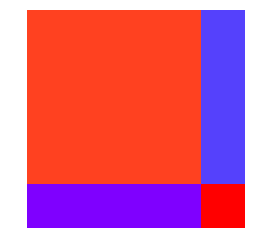

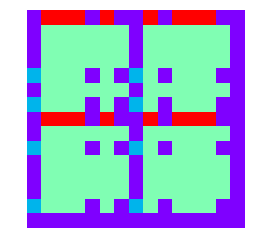

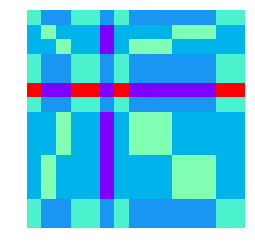

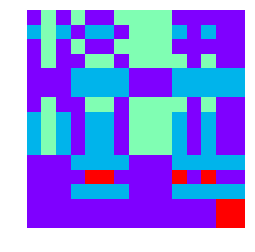

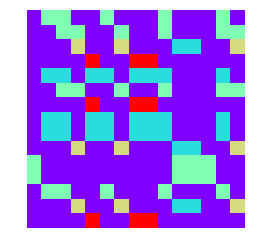

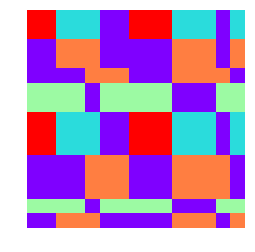

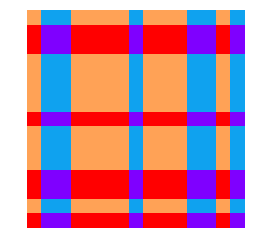

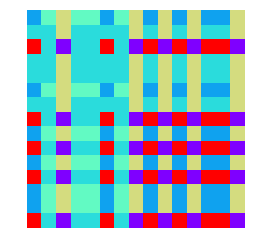

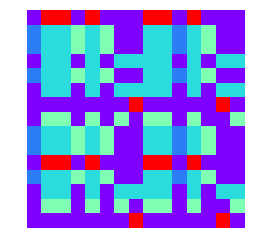

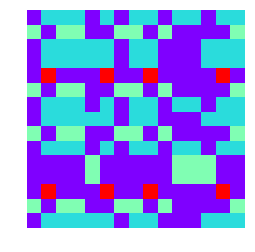

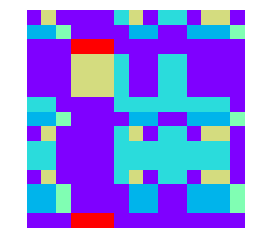

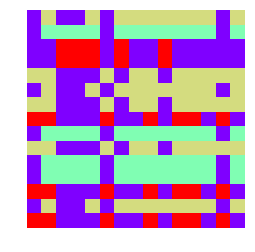

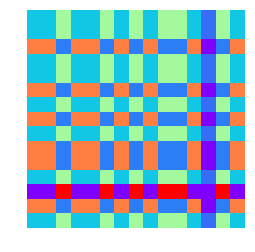

C:\ProgramData\Anaconda3\lib\site-packages\pyts\utils\utils.py:176: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  MTF[np.meshgrid(list_values[i], list_values[j])] = MTM[i, j]


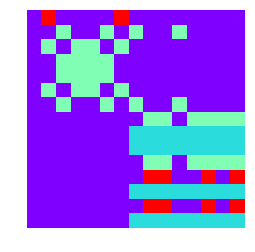

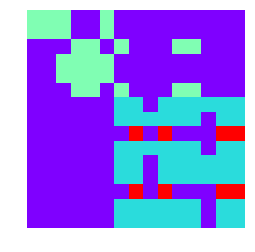

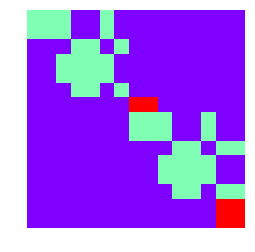

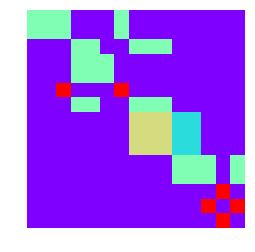

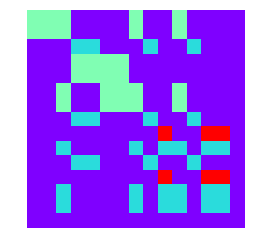

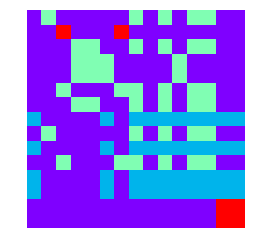

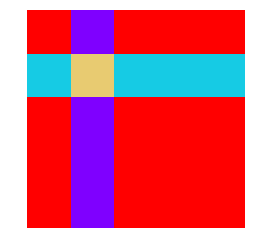

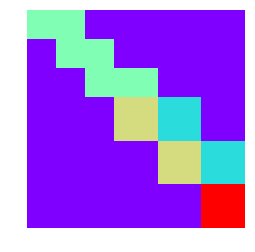

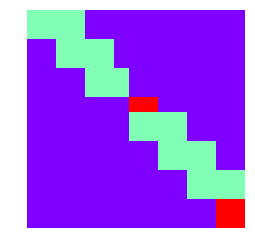

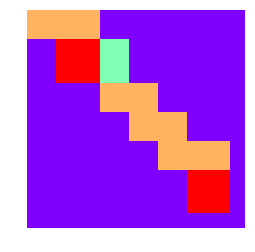

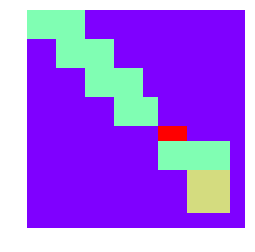

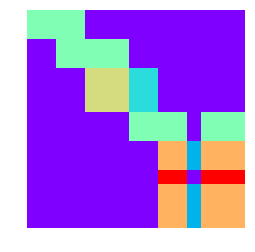

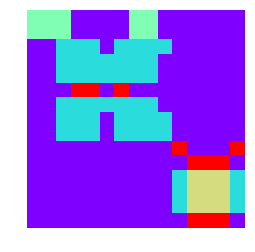

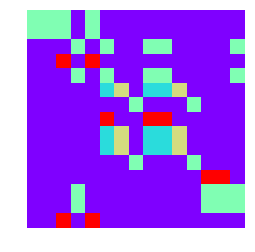

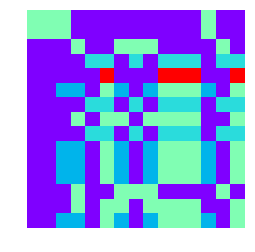

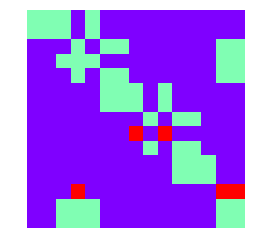

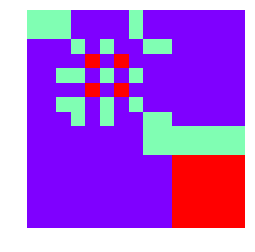

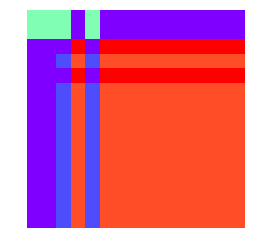

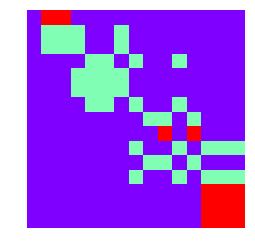

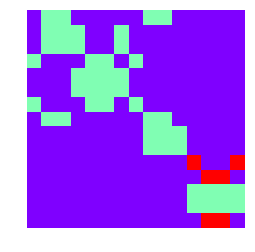

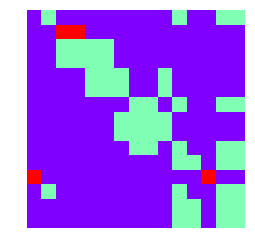

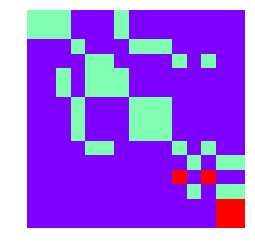

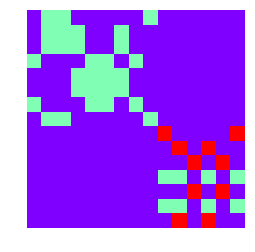

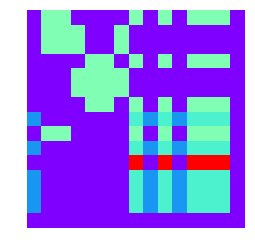

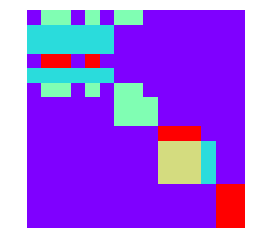

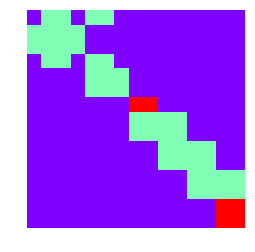

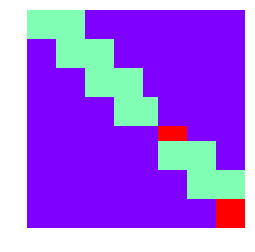

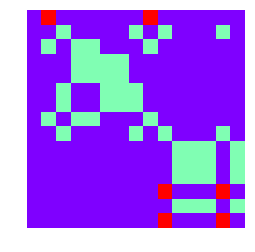

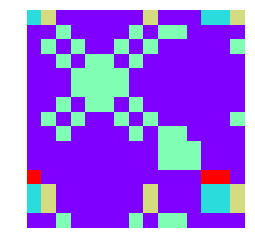

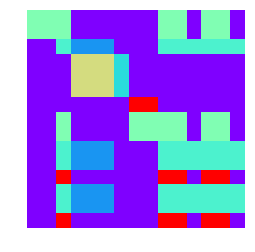

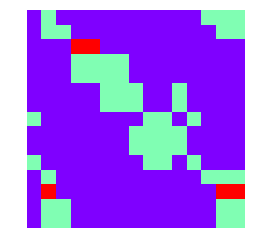

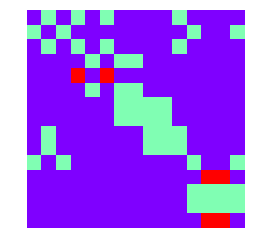

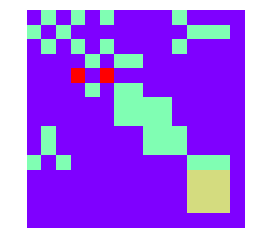

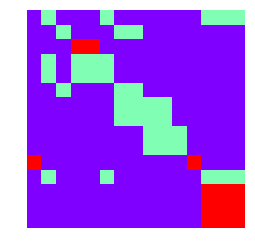

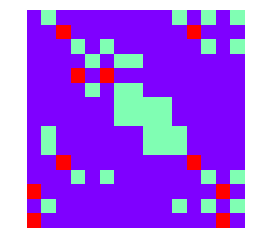

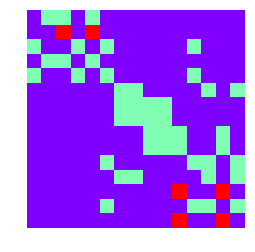

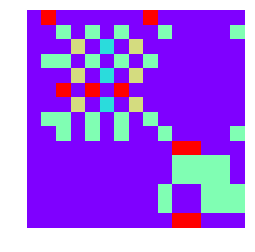

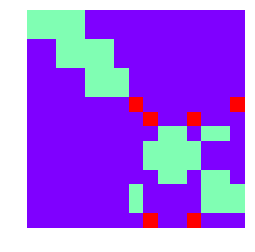

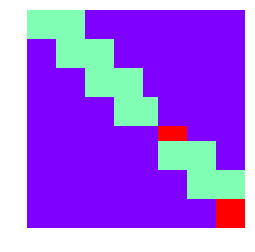

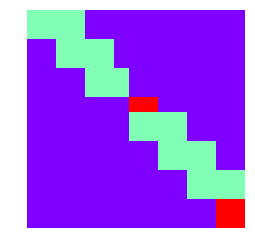

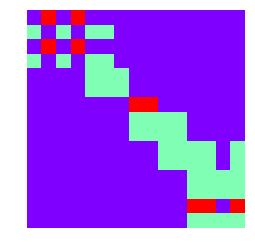

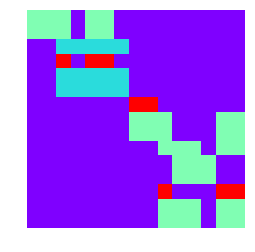

C:\ProgramData\Anaconda3\lib\site-packages\pyts\utils\utils.py:176: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  MTF[np.meshgrid(list_values[i], list_values[j])] = MTM[i, j]


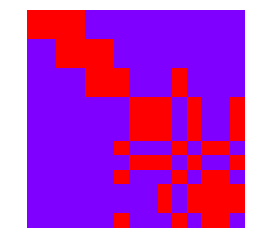

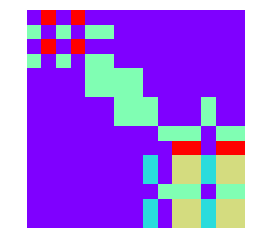

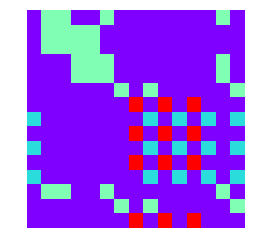

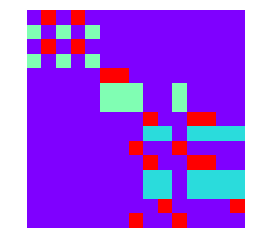

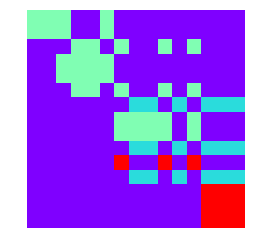

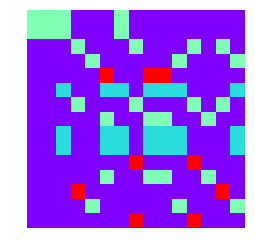

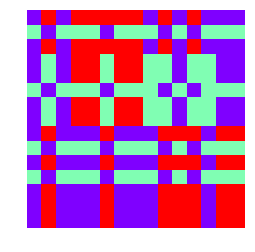

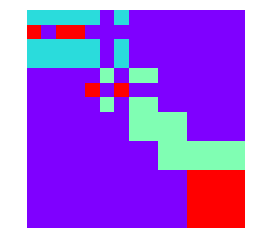

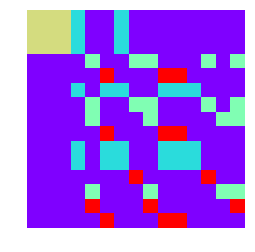

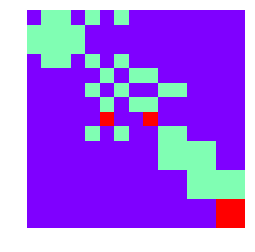

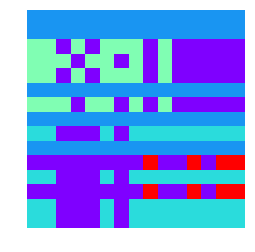

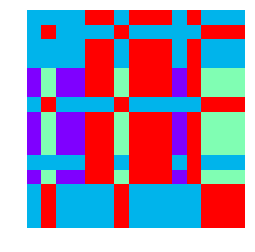

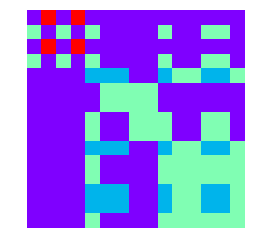

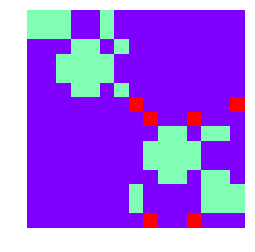

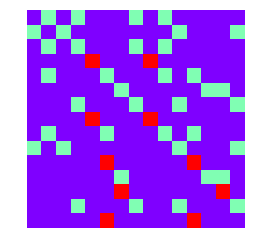

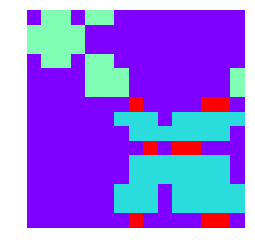

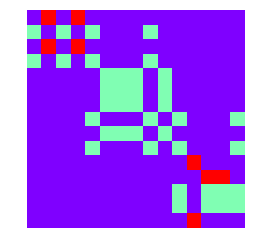

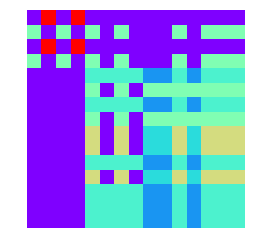

C:\ProgramData\Anaconda3\lib\site-packages\pyts\utils\utils.py:176: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  MTF[np.meshgrid(list_values[i], list_values[j])] = MTM[i, j]


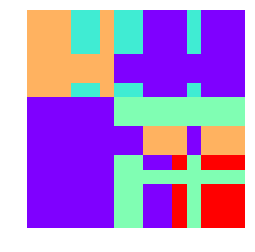

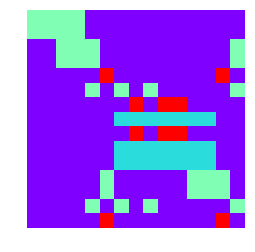

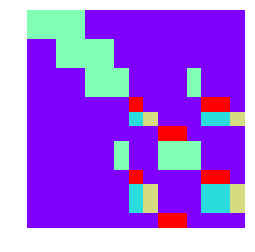

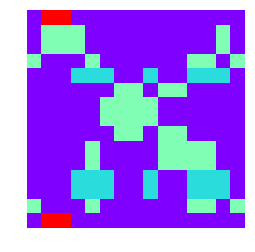

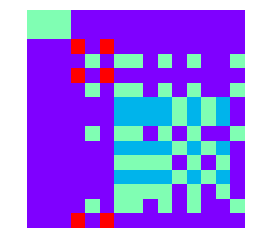

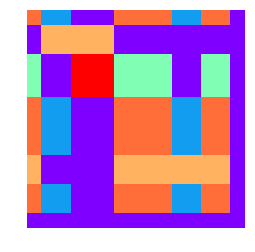

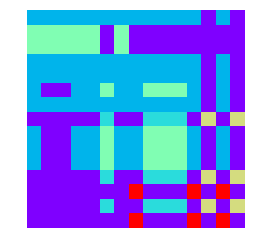

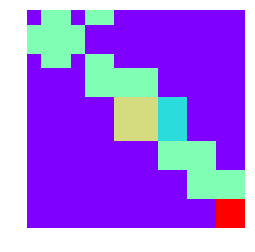

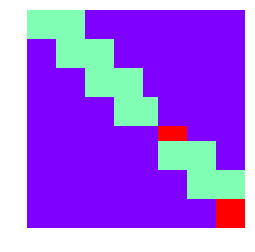

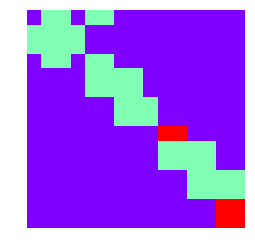

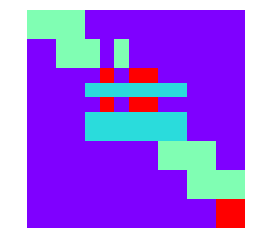

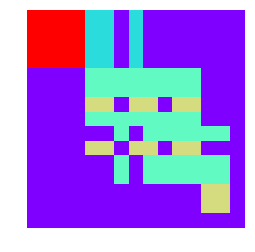

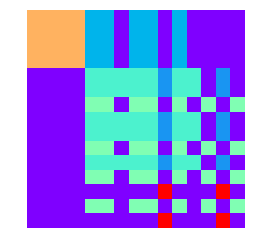

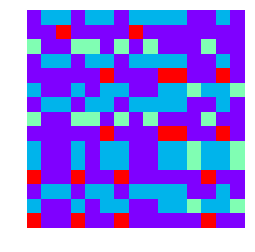

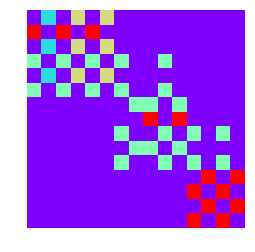

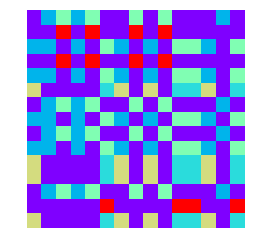

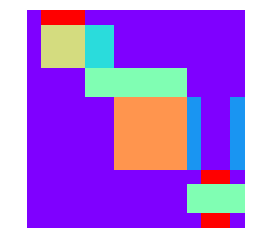

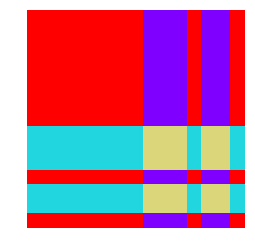

C:\ProgramData\Anaconda3\lib\site-packages\pyts\utils\utils.py:176: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  MTF[np.meshgrid(list_values[i], list_values[j])] = MTM[i, j]


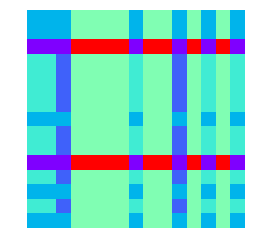

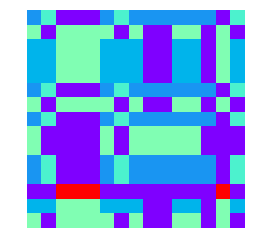

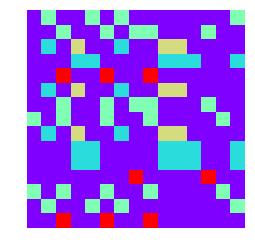

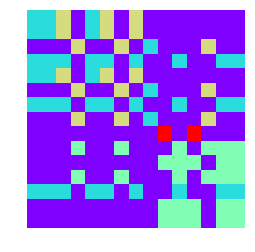

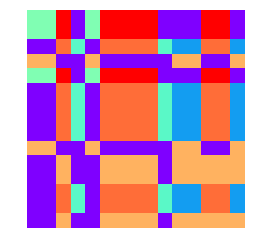

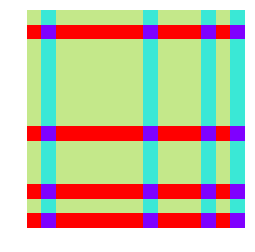

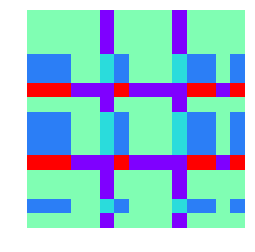

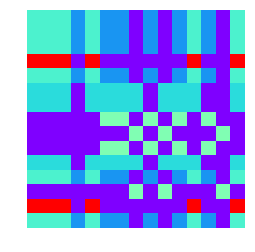

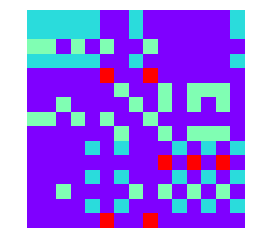

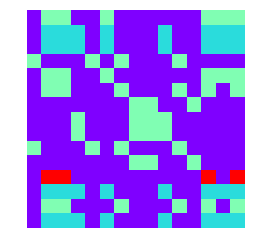

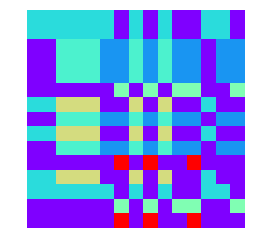

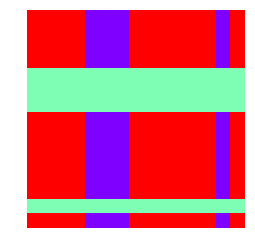

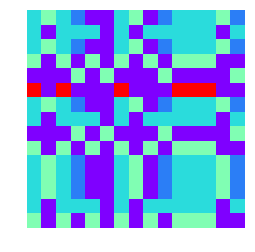

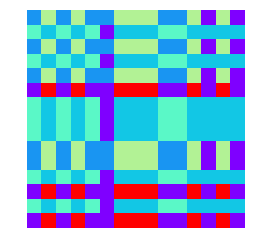

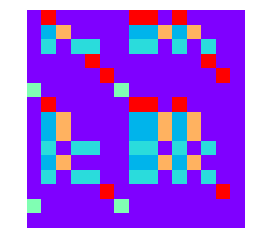

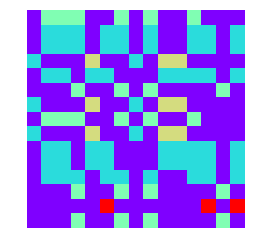

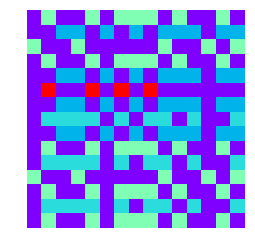

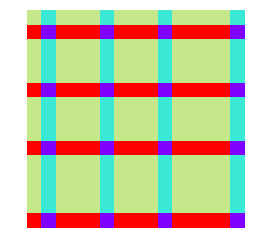

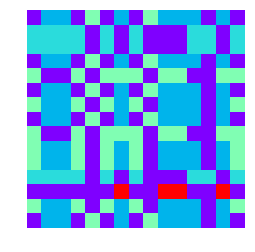

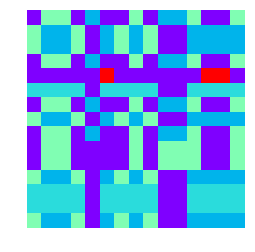

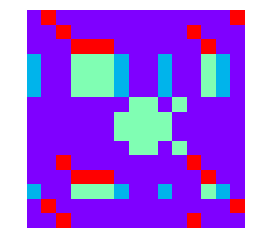

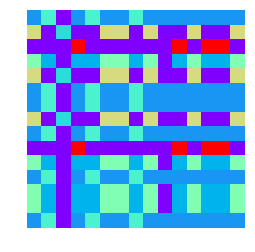

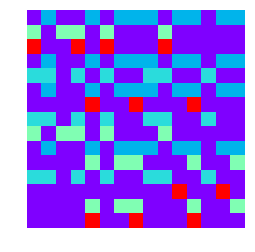

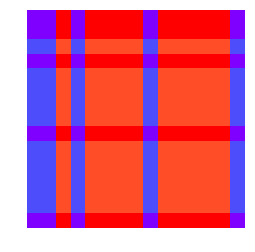

C:\ProgramData\Anaconda3\lib\site-packages\pyts\utils\utils.py:176: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  MTF[np.meshgrid(list_values[i], list_values[j])] = MTM[i, j]


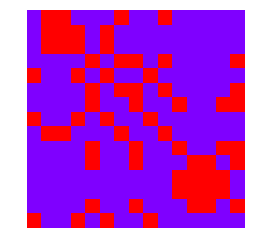

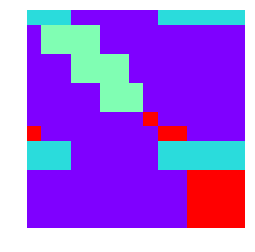

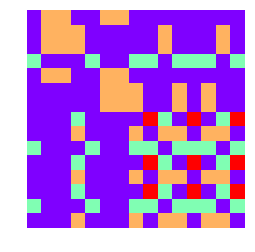

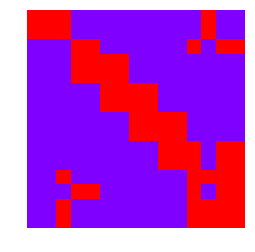

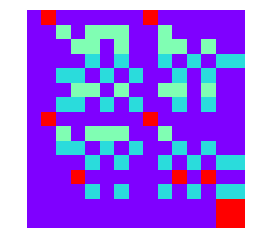

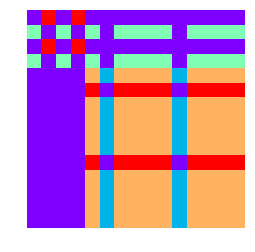

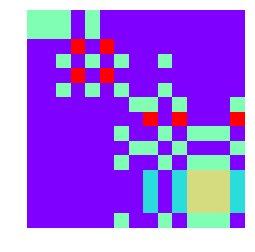

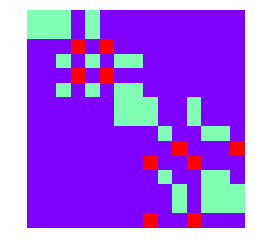

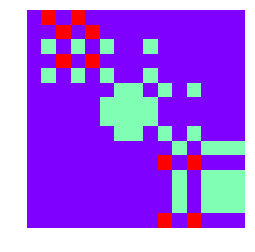

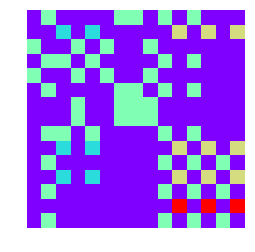

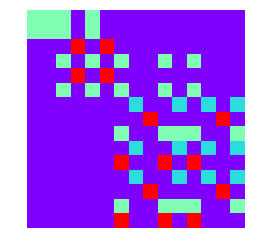

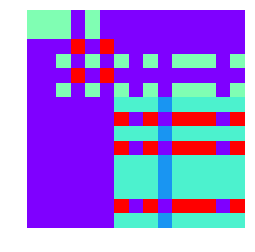

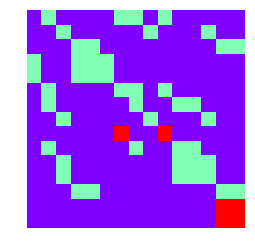

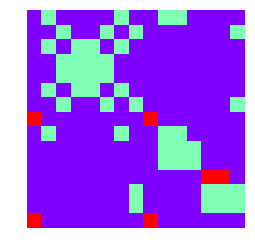

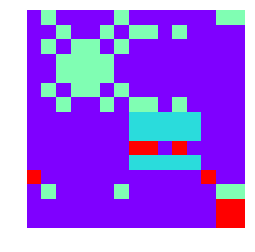

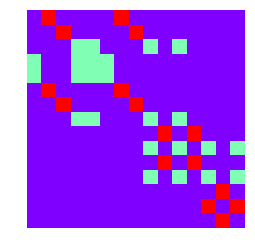

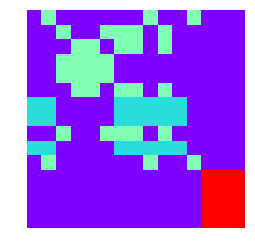

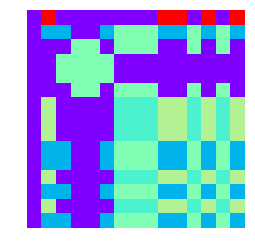

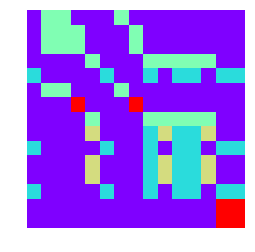

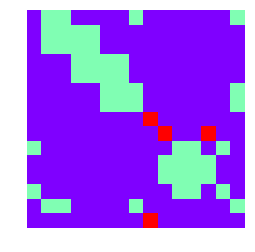

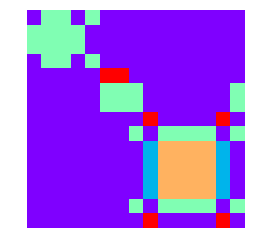

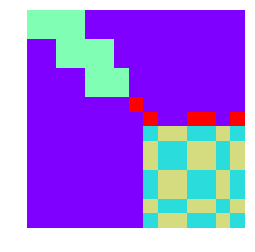

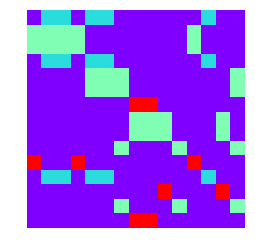

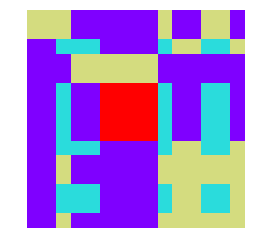

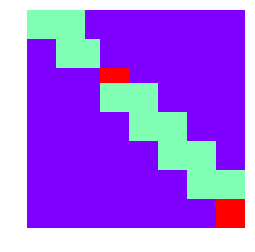

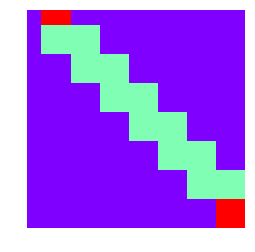

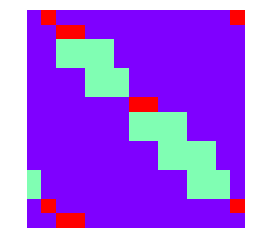

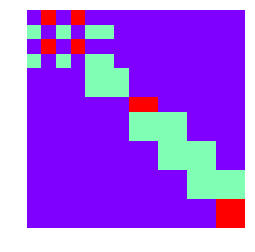

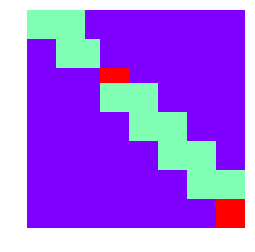

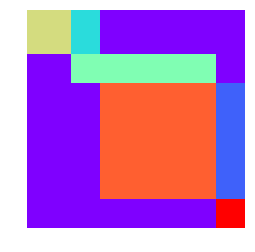

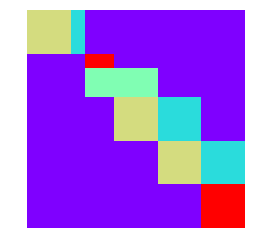

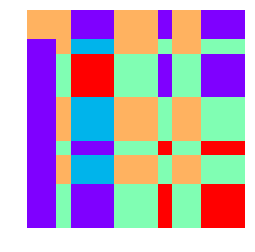

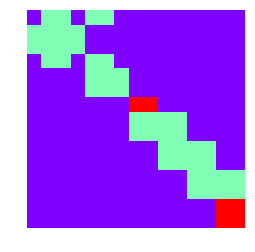

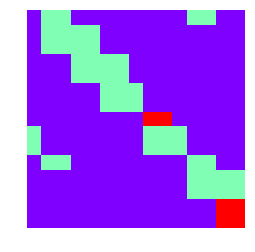

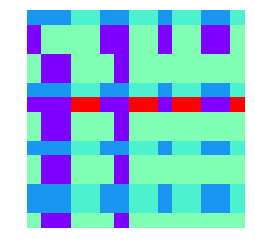

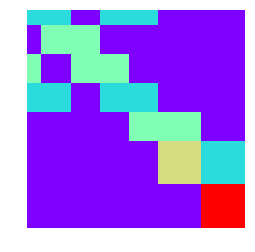

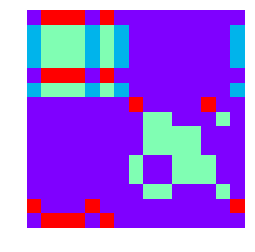

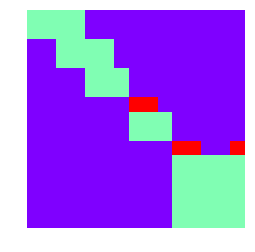

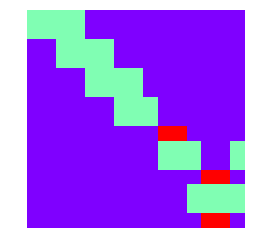

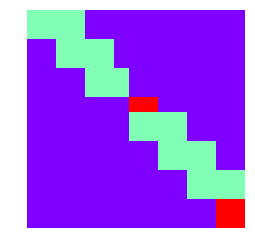

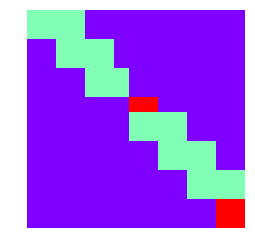

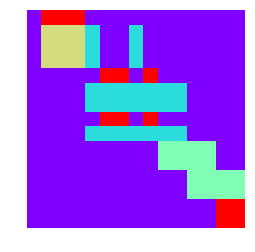

C:\ProgramData\Anaconda3\lib\site-packages\pyts\utils\utils.py:176: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  MTF[np.meshgrid(list_values[i], list_values[j])] = MTM[i, j]


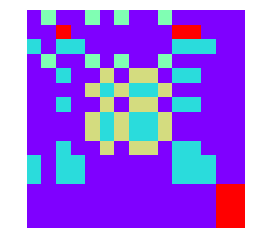

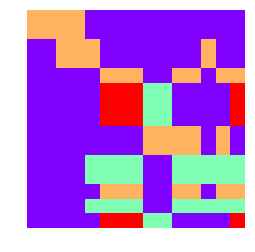

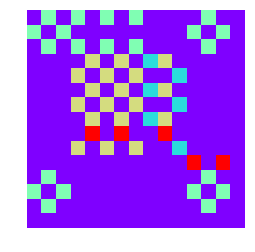

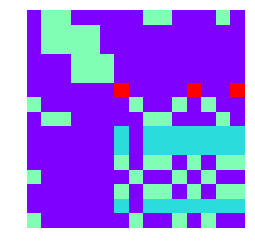

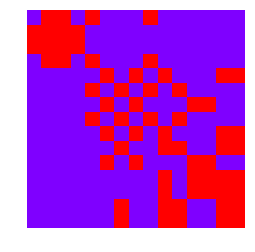

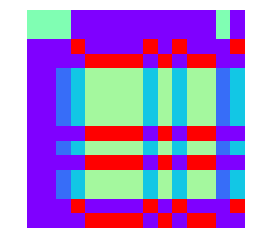

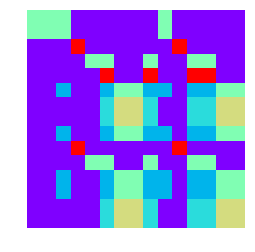

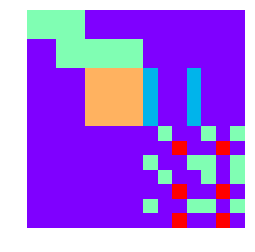

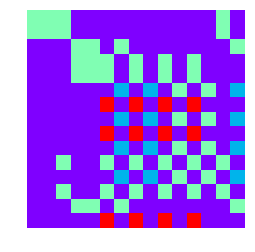

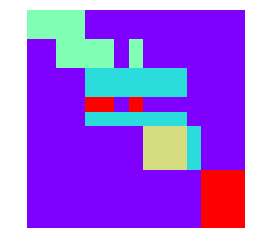

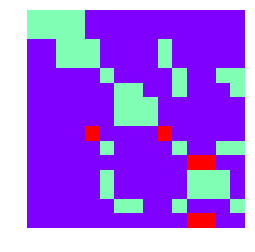

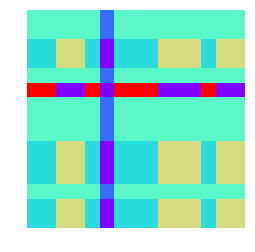

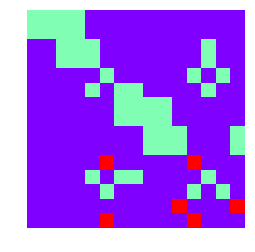

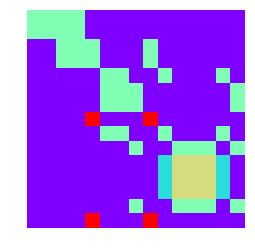

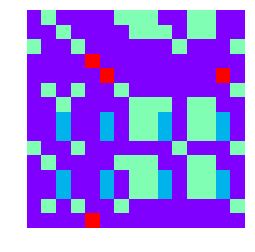

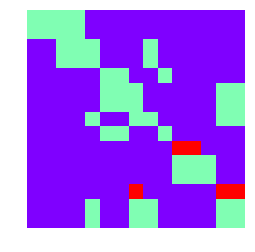

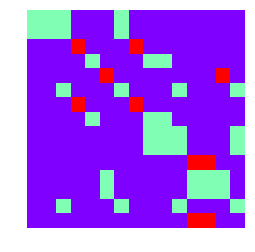

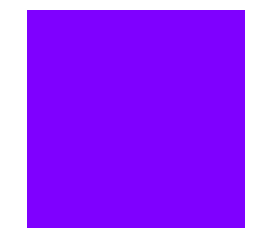

C:\ProgramData\Anaconda3\lib\site-packages\pyts\utils\utils.py:176: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  MTF[np.meshgrid(list_values[i], list_values[j])] = MTM[i, j]


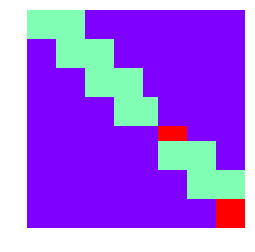

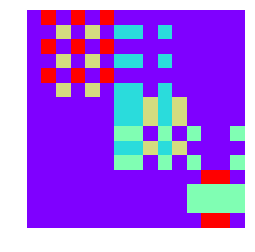

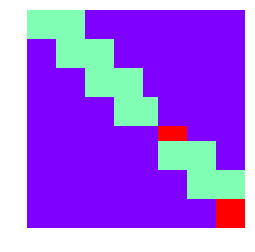

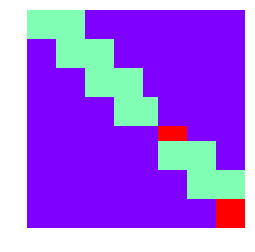

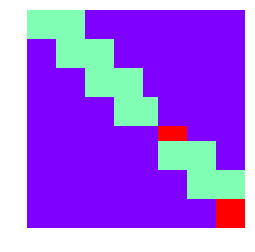

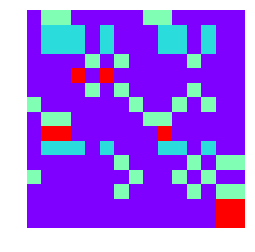

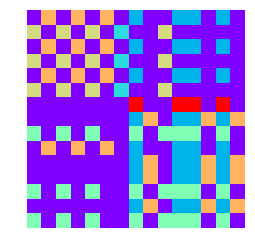

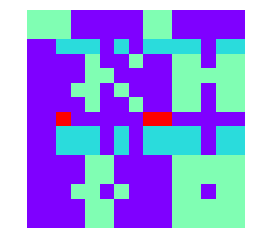

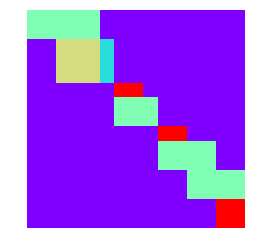

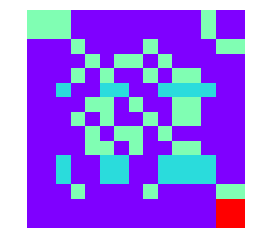

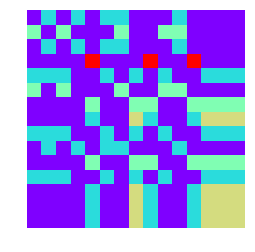

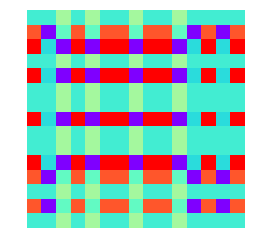

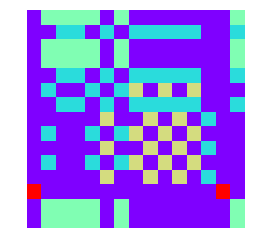

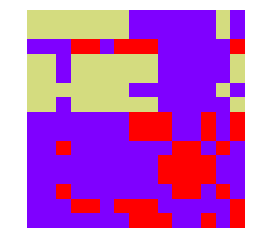

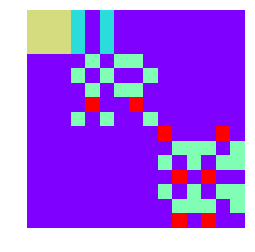

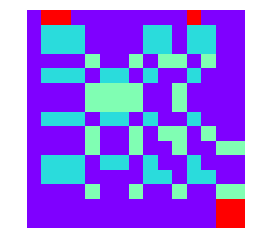

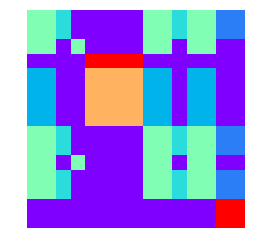

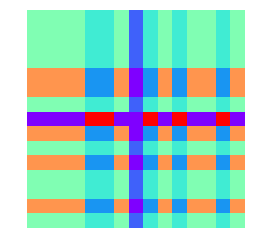

C:\ProgramData\Anaconda3\lib\site-packages\pyts\utils\utils.py:176: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  MTF[np.meshgrid(list_values[i], list_values[j])] = MTM[i, j]


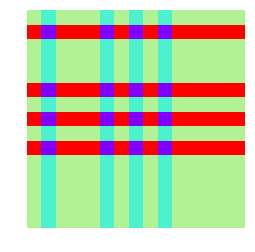

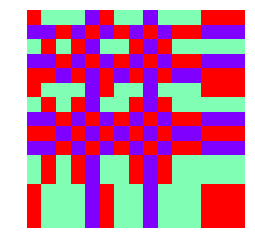

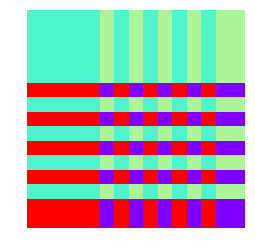

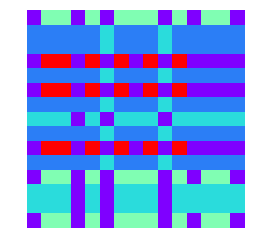

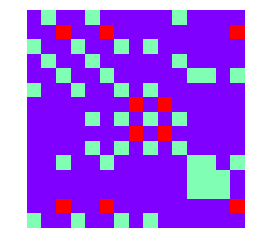

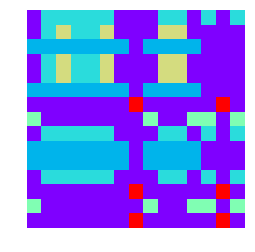

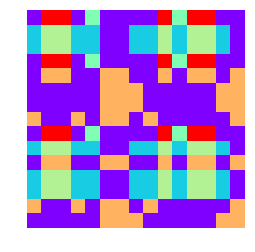

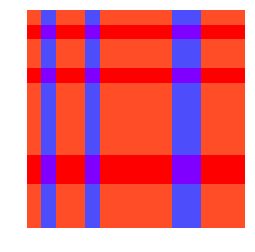

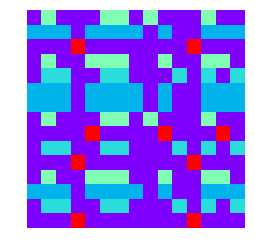

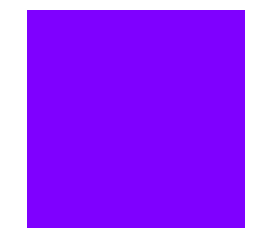

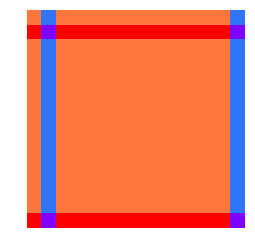

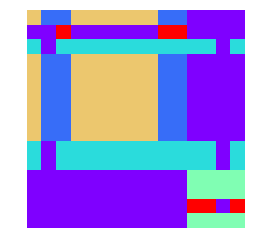

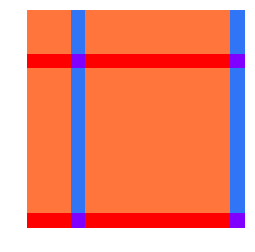

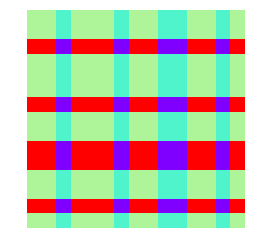

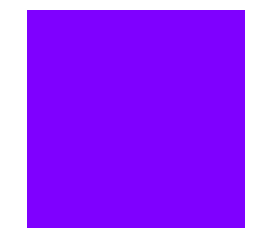

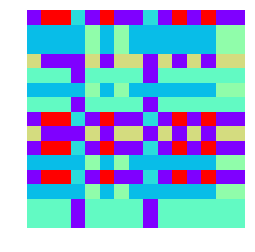

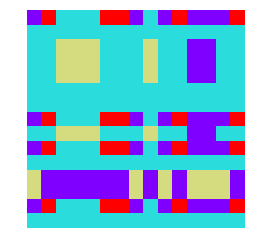

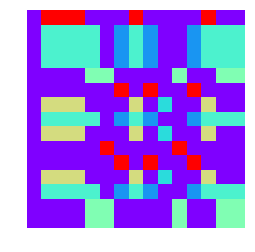

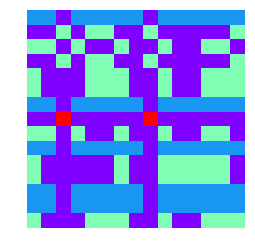

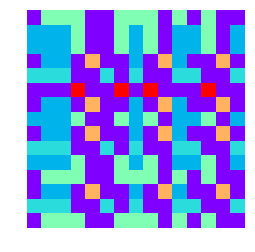

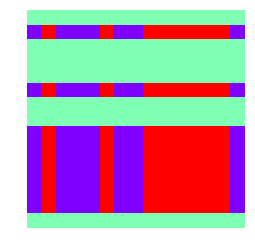

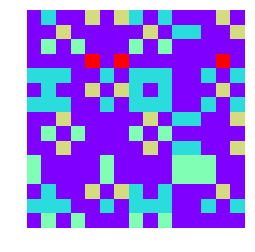

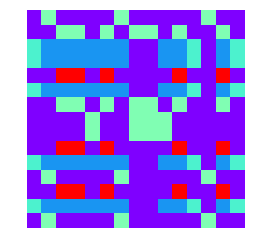

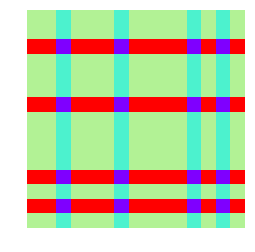

C:\ProgramData\Anaconda3\lib\site-packages\pyts\utils\utils.py:176: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  MTF[np.meshgrid(list_values[i], list_values[j])] = MTM[i, j]


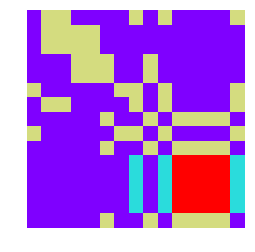

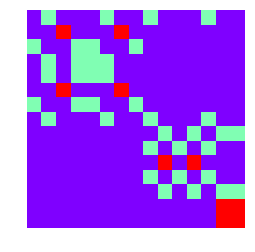

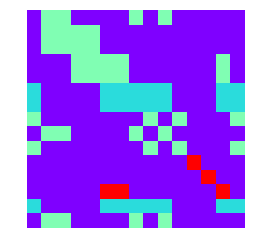

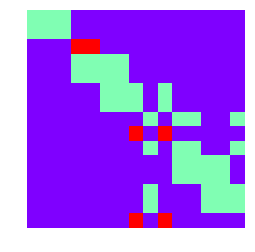

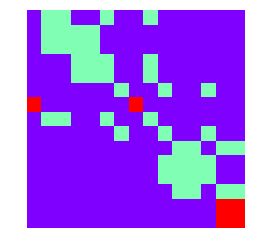

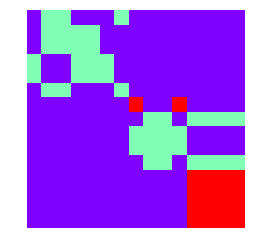

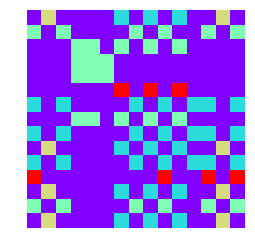

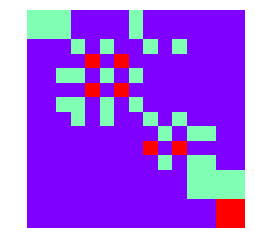

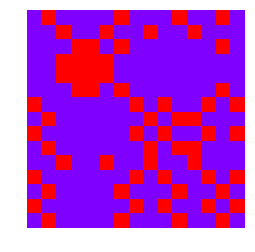

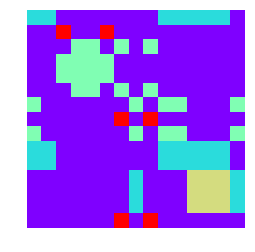

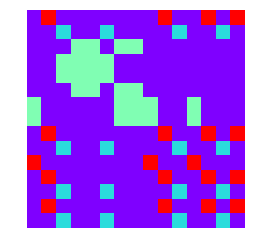

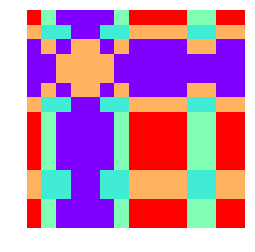

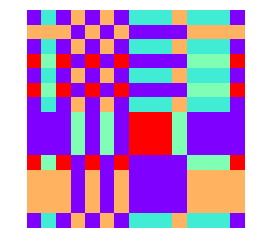

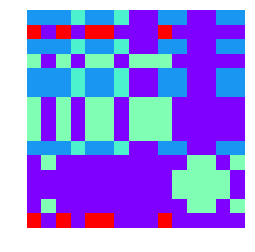

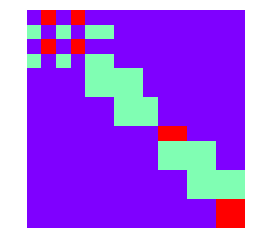

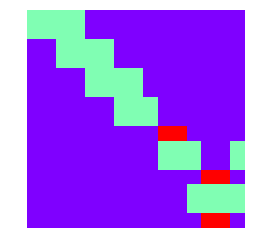

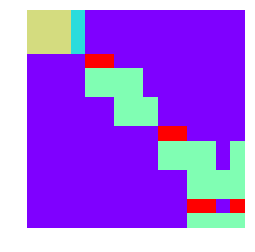

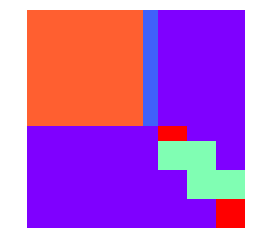

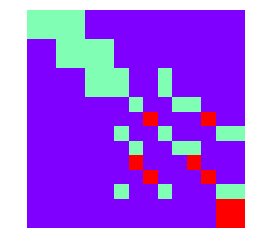

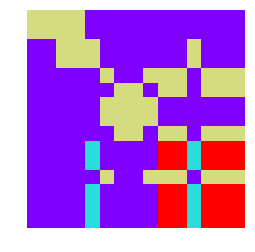

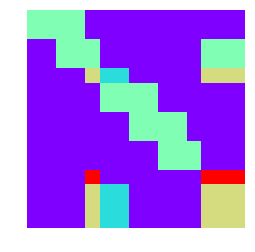

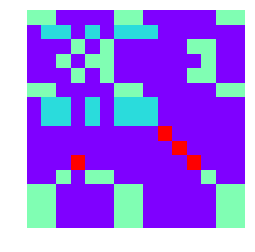

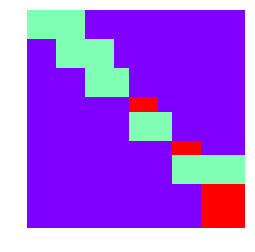

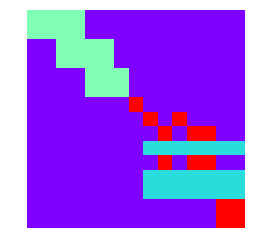

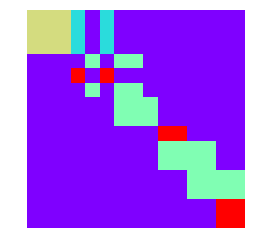

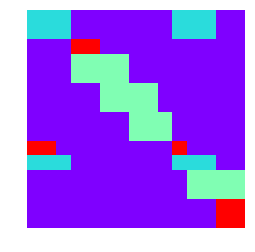

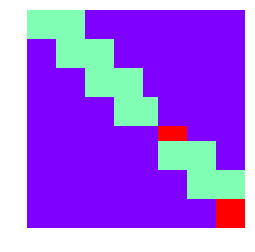

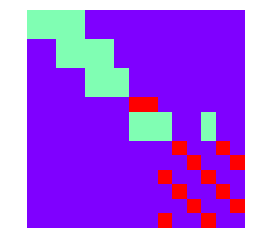

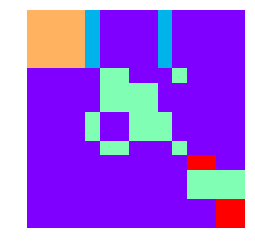

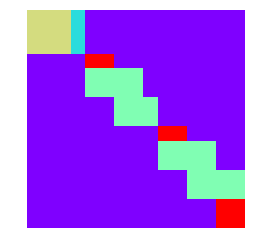

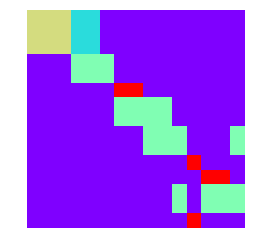

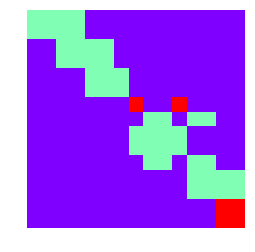

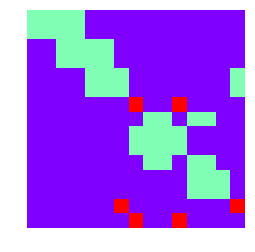

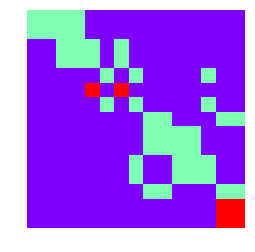

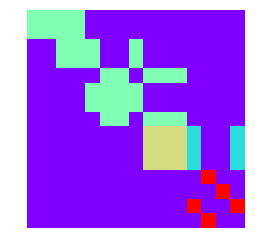

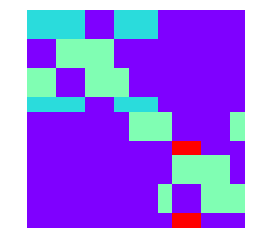

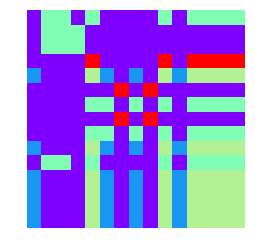

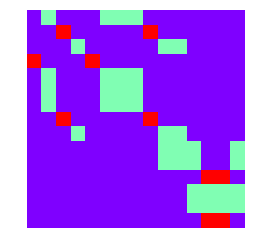

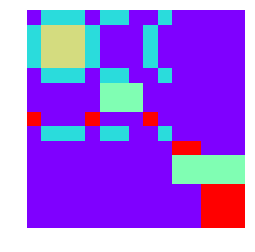

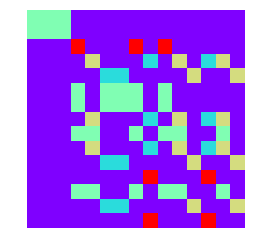

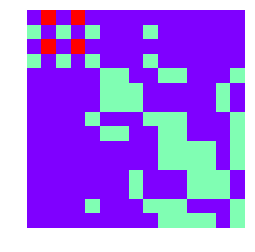

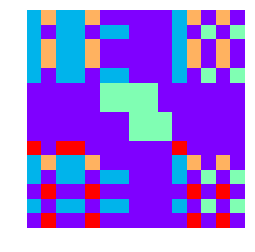

C:\ProgramData\Anaconda3\lib\site-packages\pyts\utils\utils.py:176: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  MTF[np.meshgrid(list_values[i], list_values[j])] = MTM[i, j]


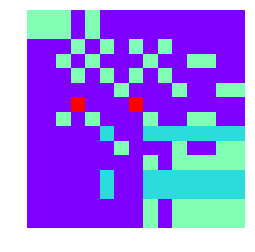

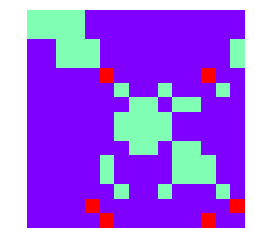

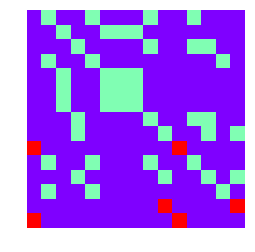

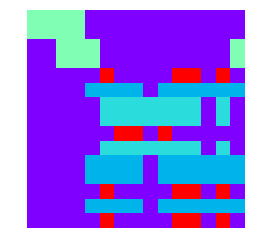

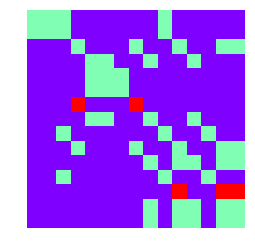

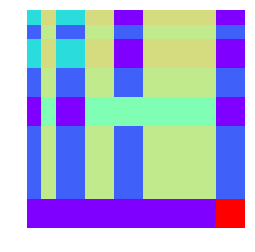

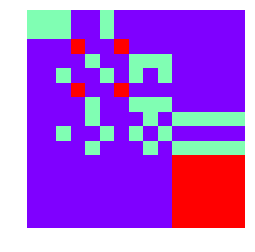

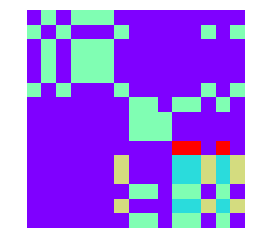

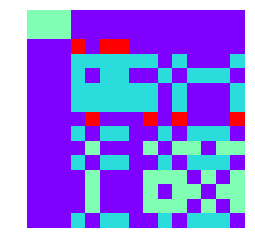

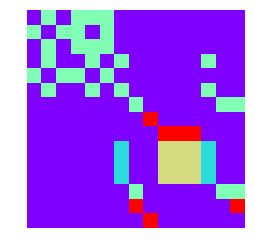

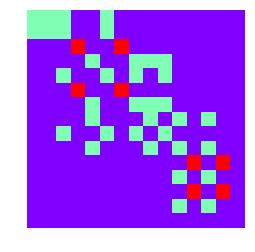

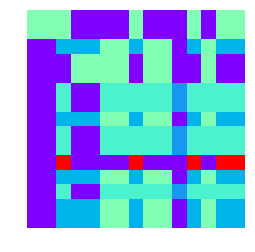

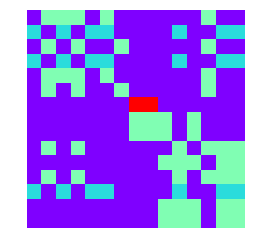

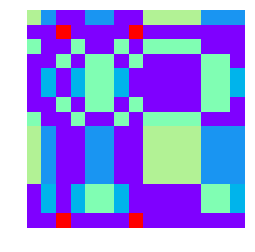

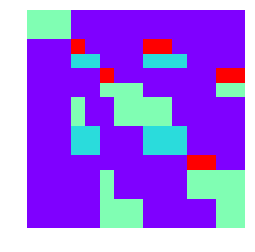

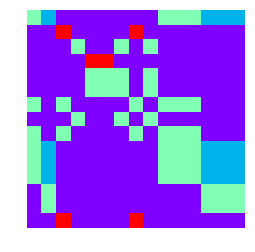

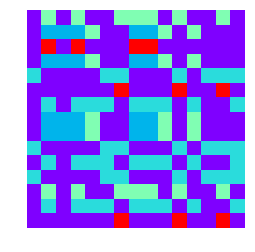

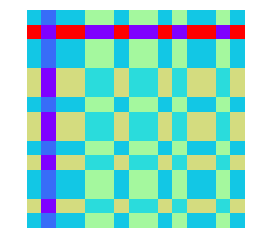

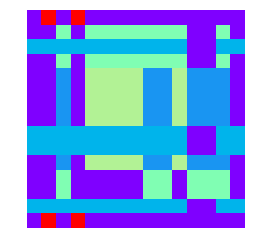

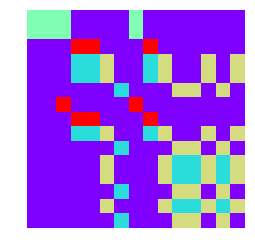

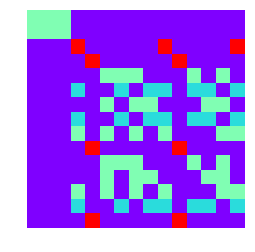

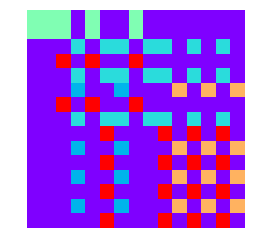

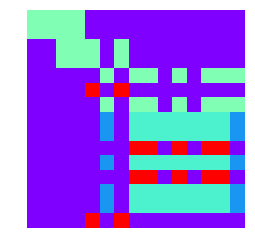

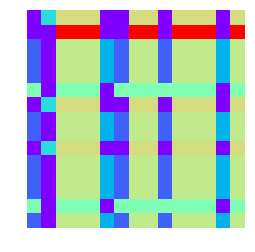

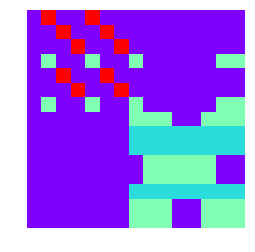

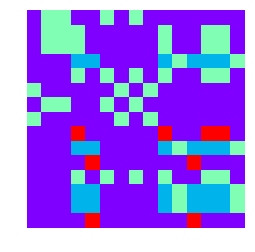

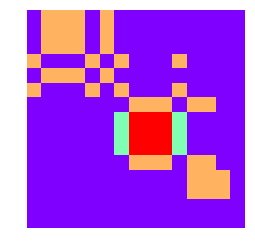

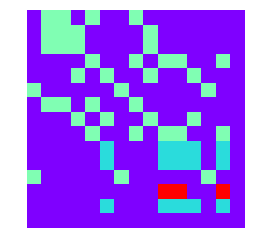

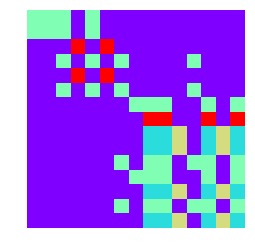

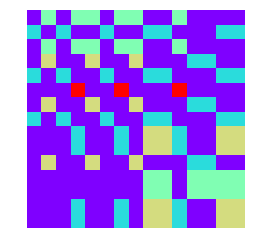

C:\ProgramData\Anaconda3\lib\site-packages\pyts\utils\utils.py:176: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  MTF[np.meshgrid(list_values[i], list_values[j])] = MTM[i, j]


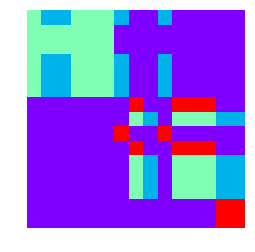

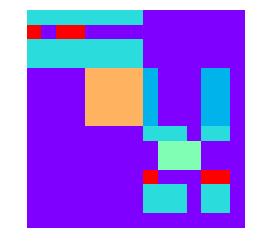

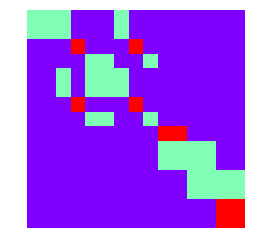

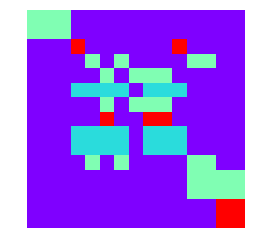

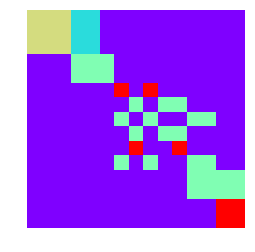

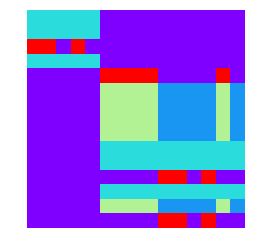

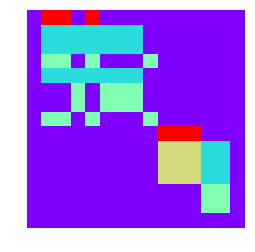

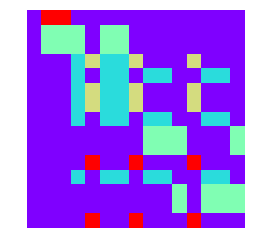

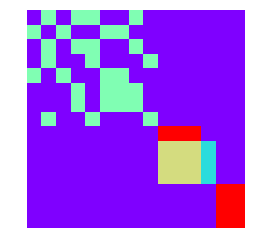

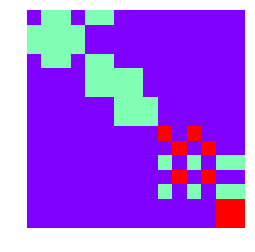

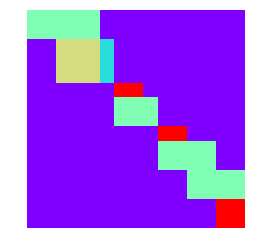

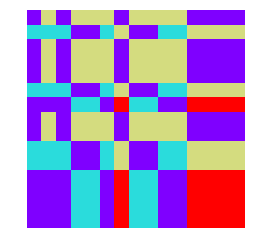

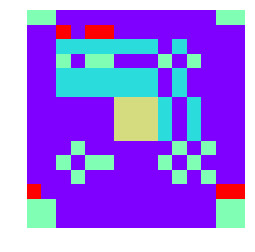

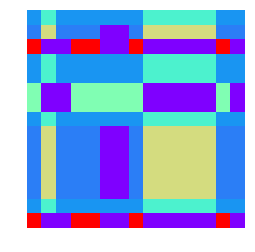

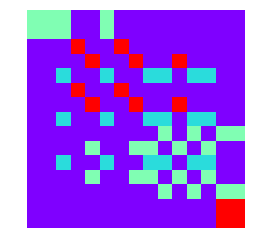

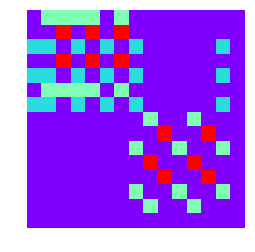

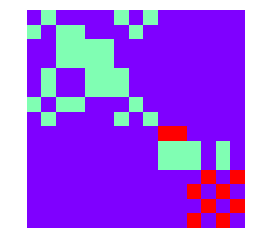

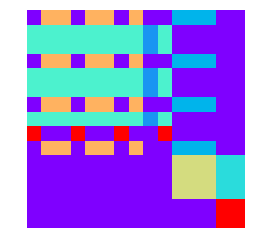

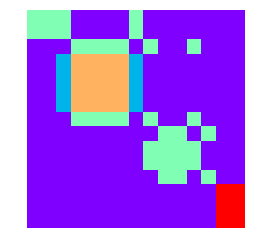

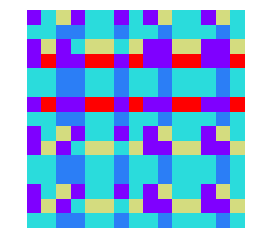

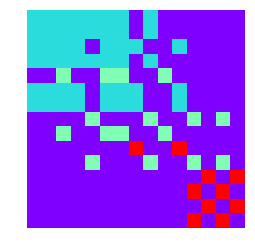

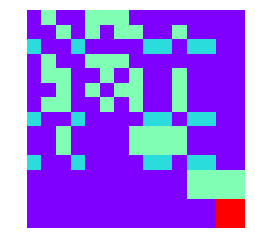

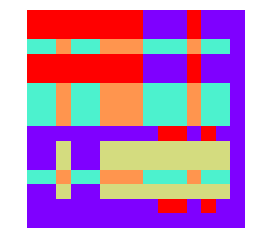

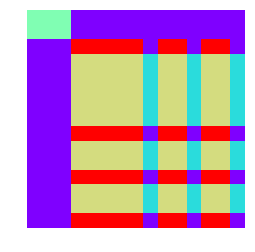

C:\ProgramData\Anaconda3\lib\site-packages\pyts\utils\utils.py:176: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  MTF[np.meshgrid(list_values[i], list_values[j])] = MTM[i, j]


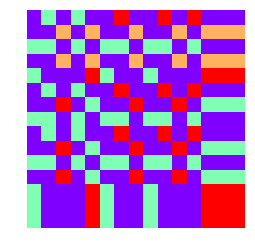

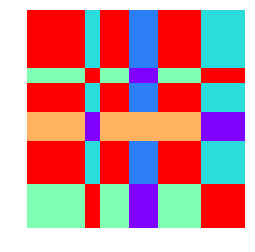

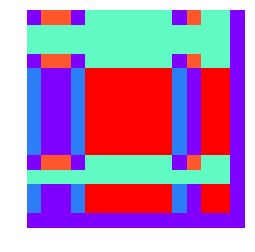

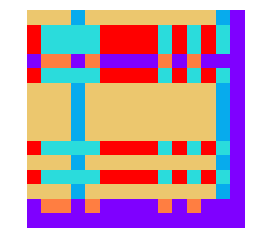

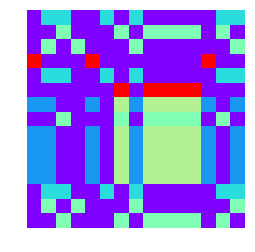

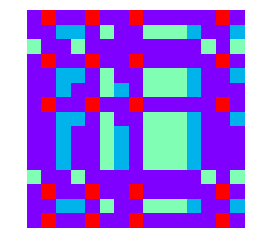

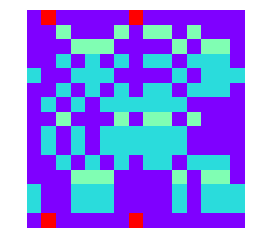

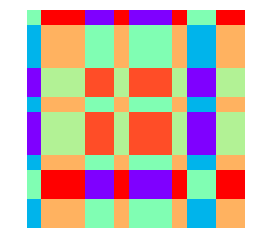

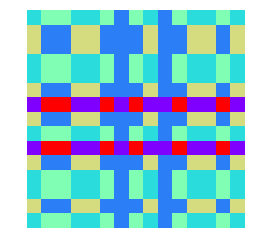

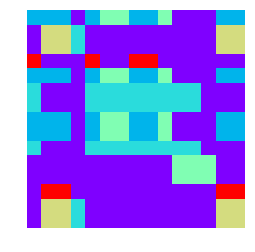

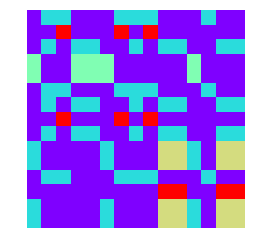

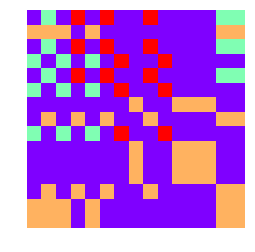

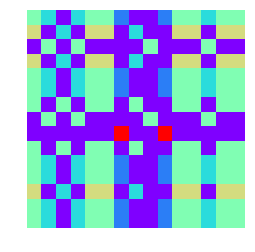

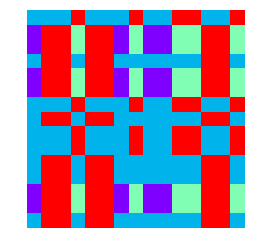

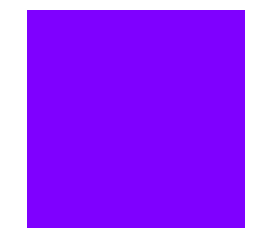

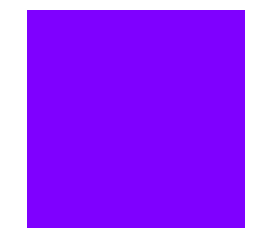

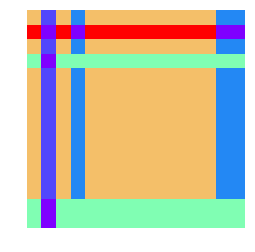

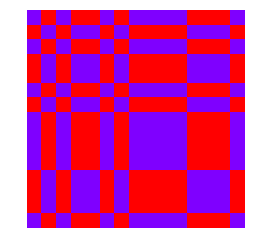

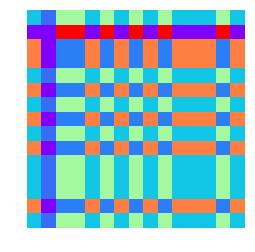

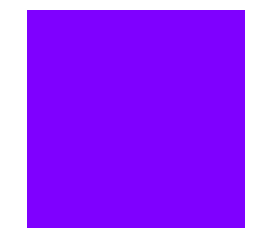

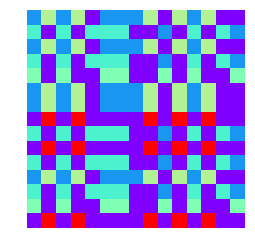

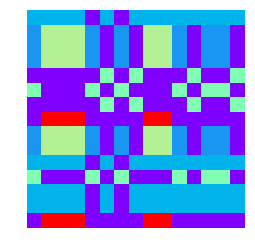

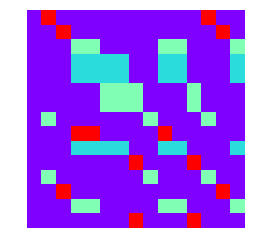

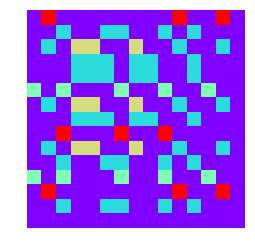

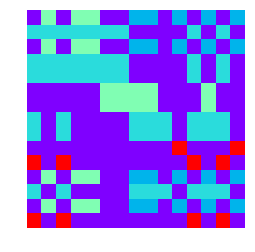

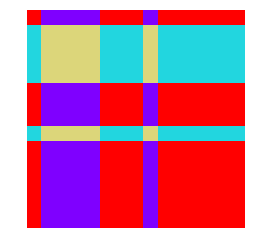

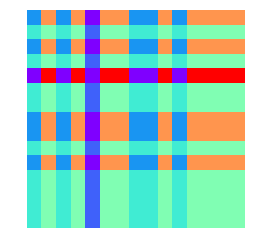

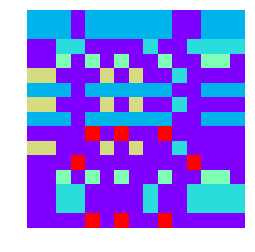

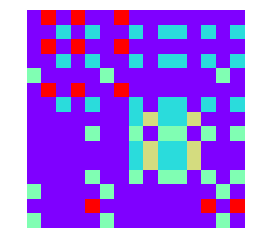

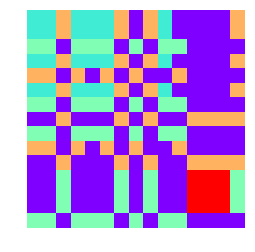

C:\ProgramData\Anaconda3\lib\site-packages\pyts\utils\utils.py:176: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  MTF[np.meshgrid(list_values[i], list_values[j])] = MTM[i, j]


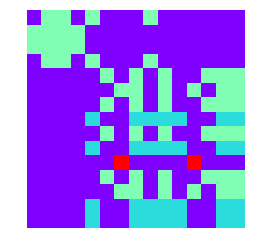

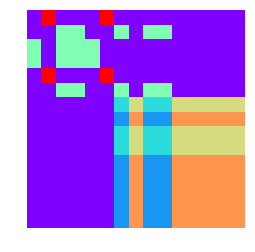

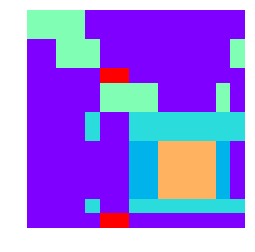

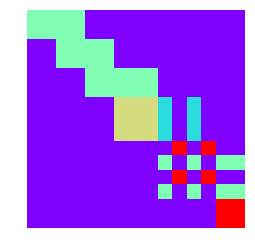

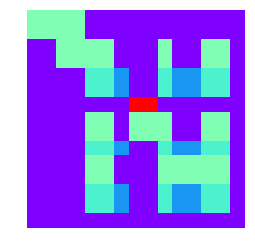

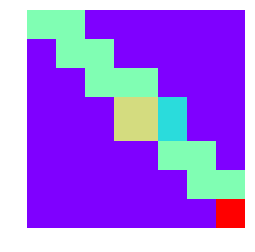

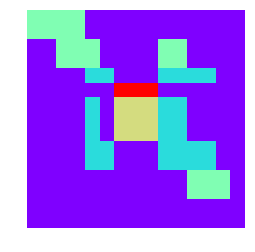

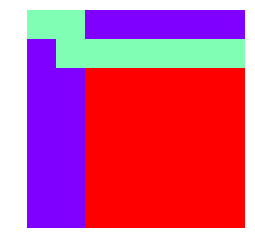

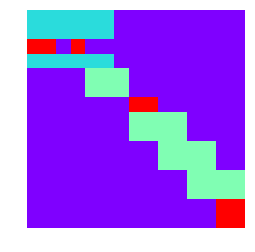

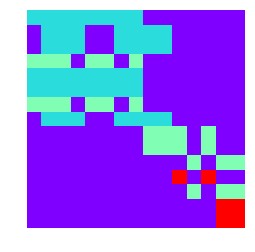

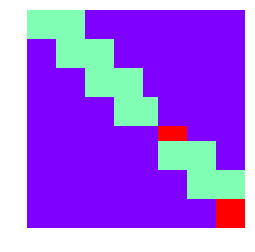

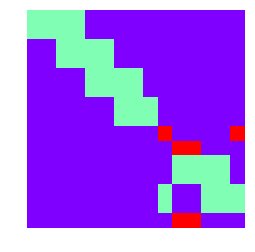

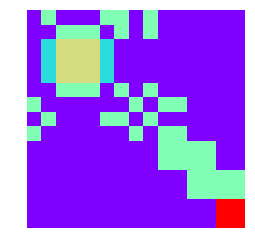

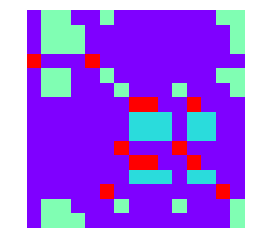

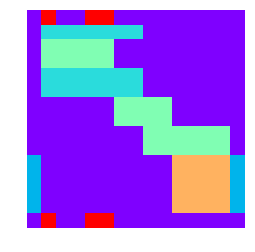

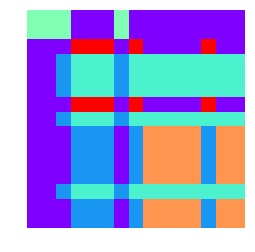

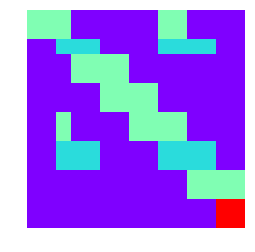

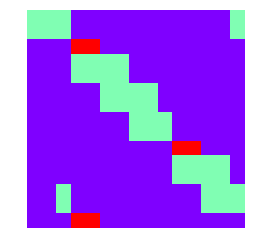

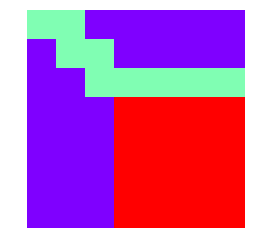

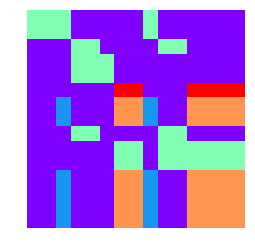

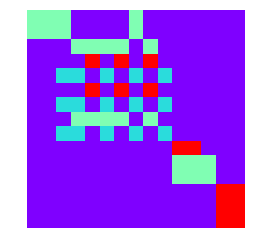

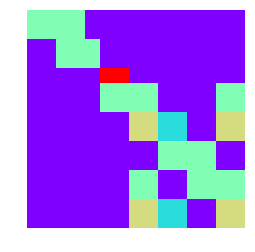

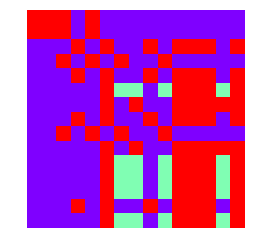

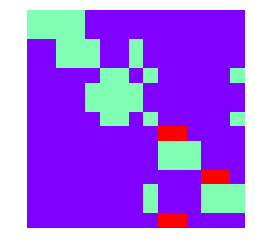

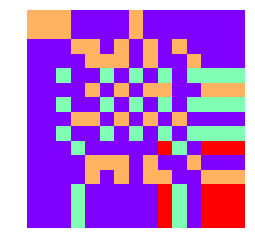

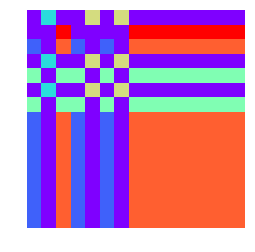

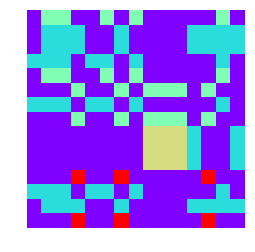

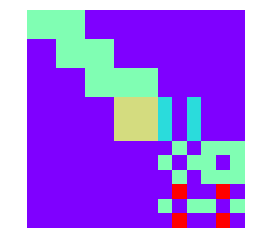

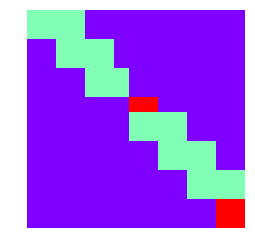

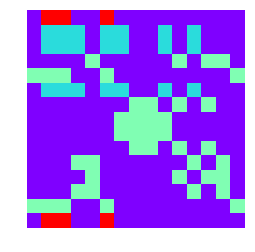

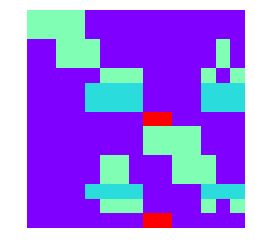

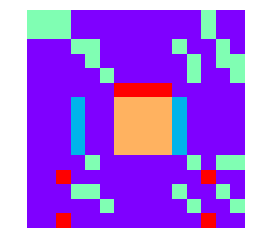

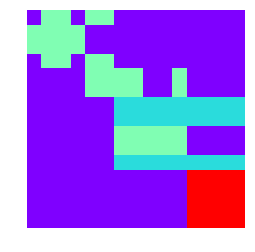

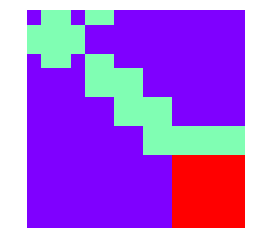

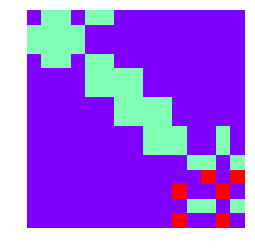

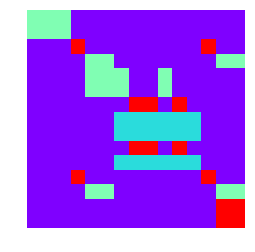

In [14]:
transformation(True,True,"mtf")

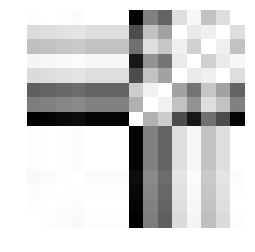

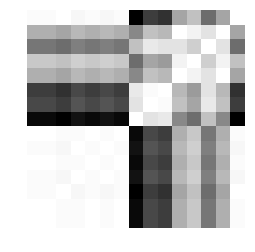

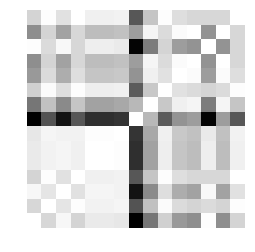

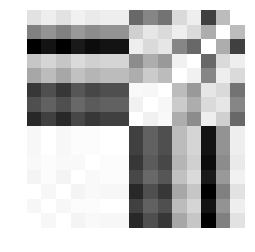

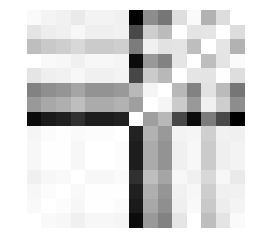

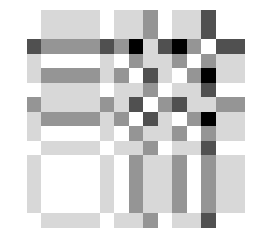

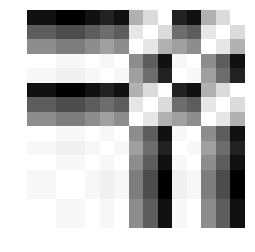

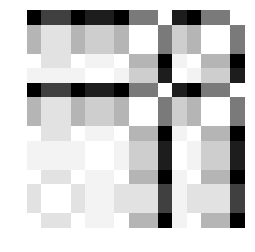

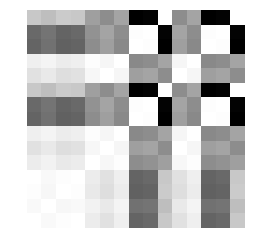

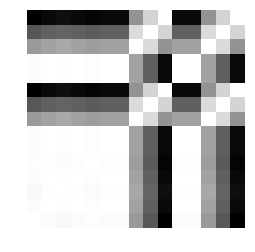

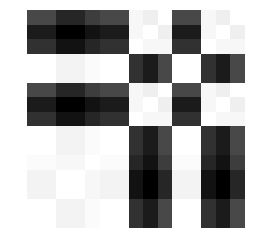

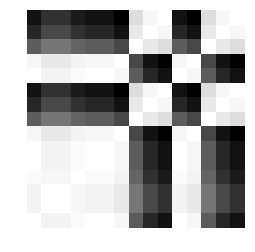

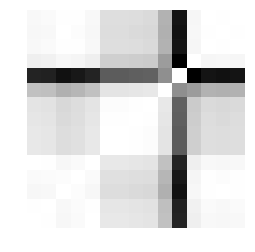

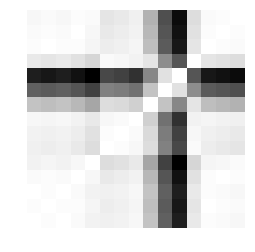

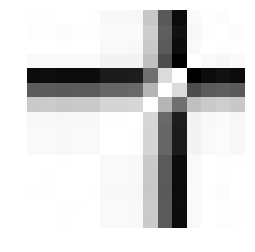

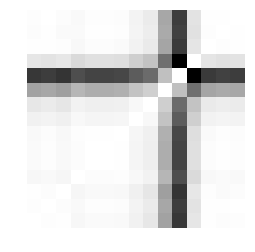

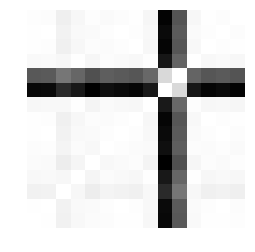

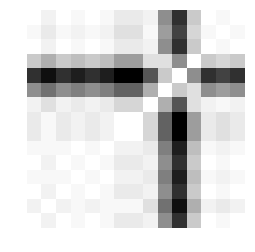

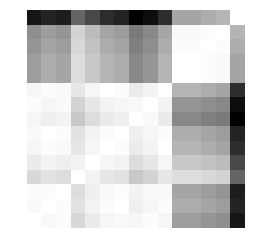

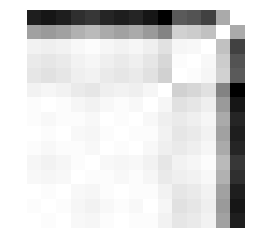

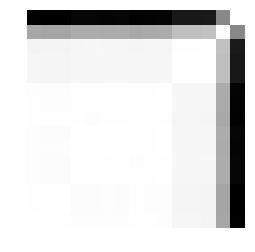

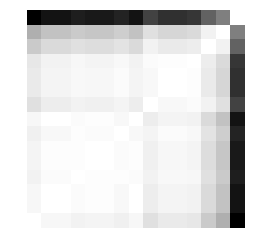

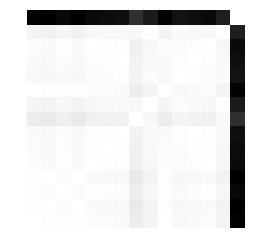

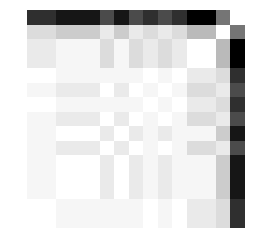

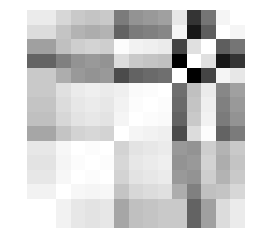

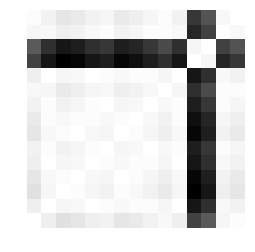

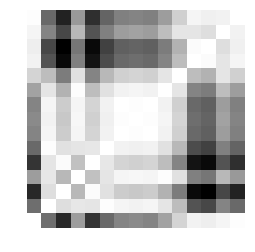

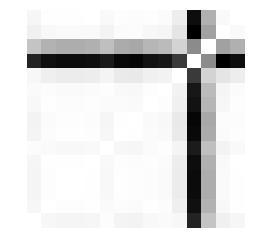

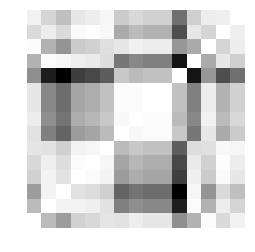

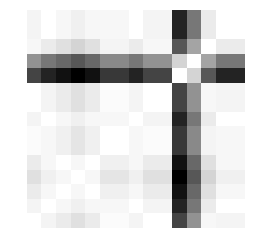

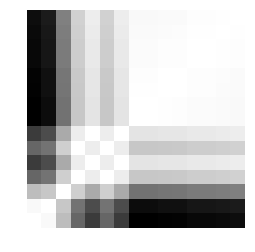

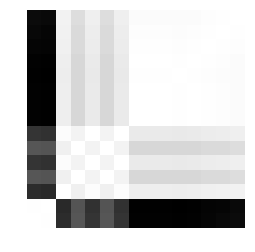

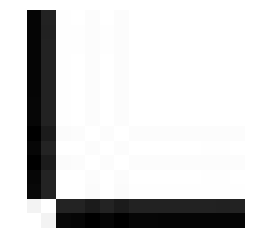

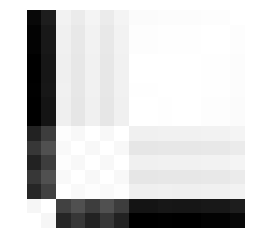

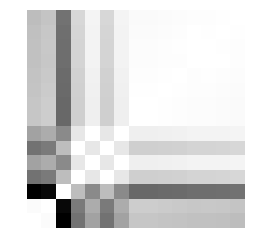

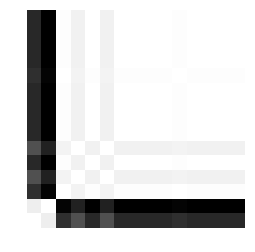

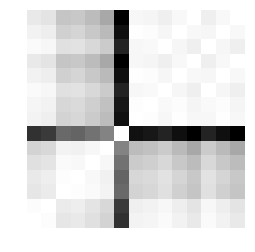

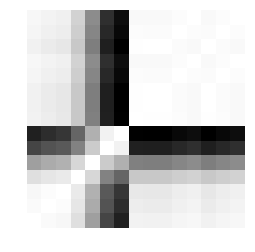

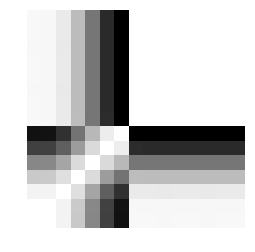

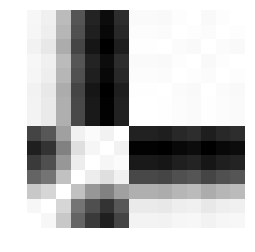

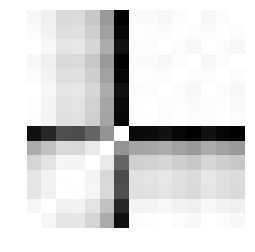

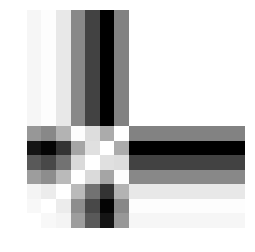

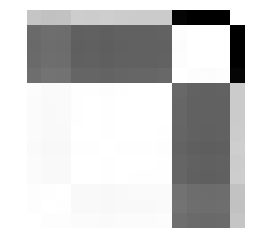

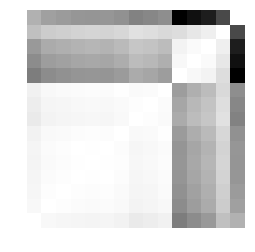

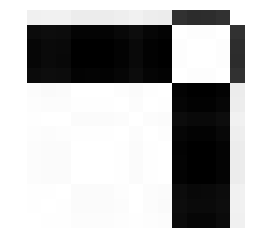

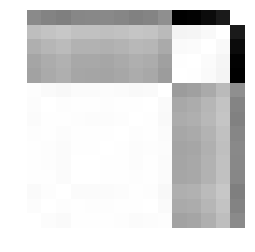

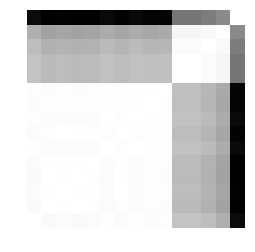

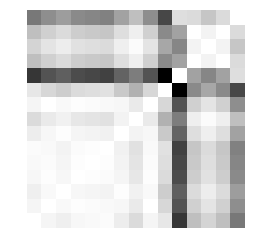

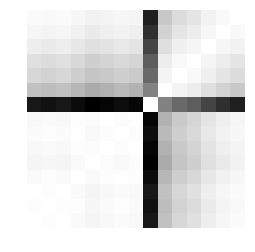

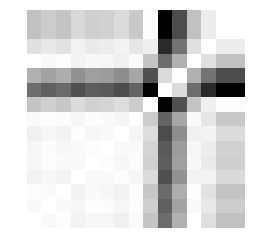

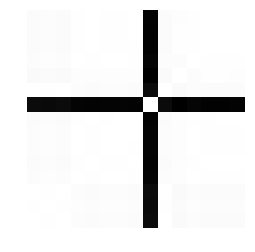

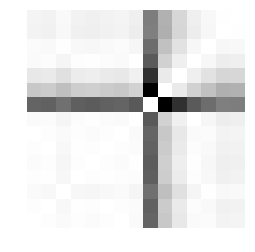

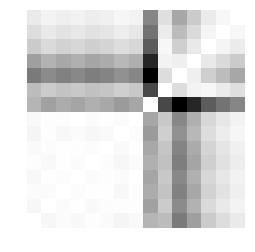

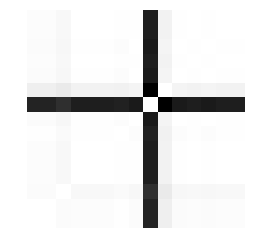

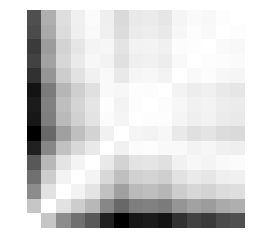

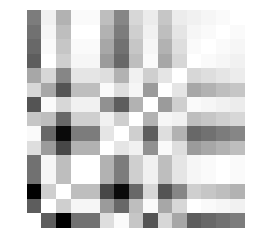

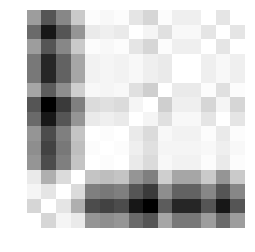

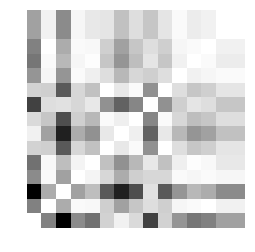

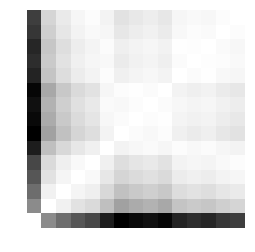

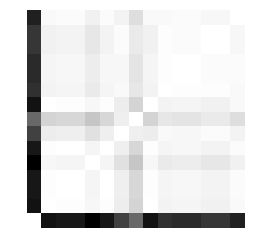

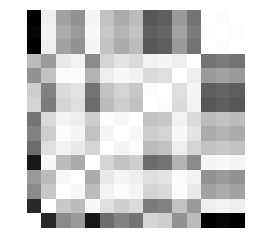

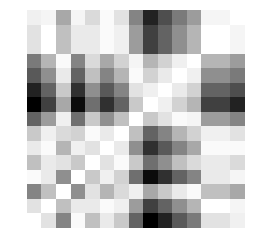

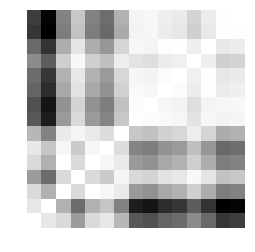

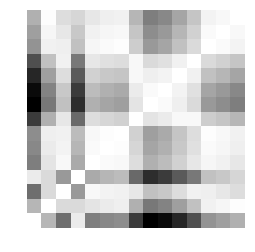

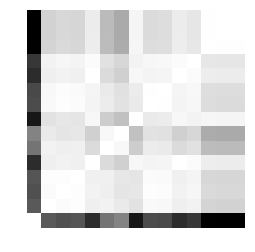

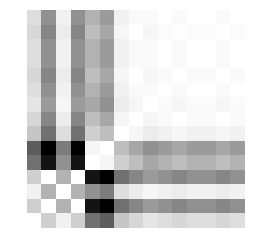

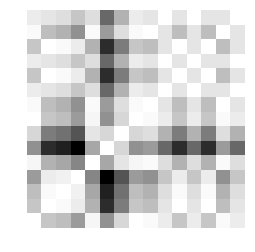

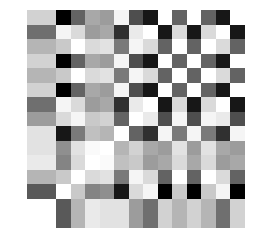

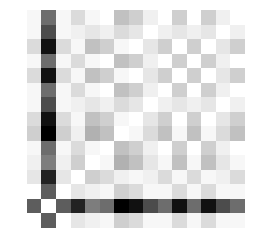

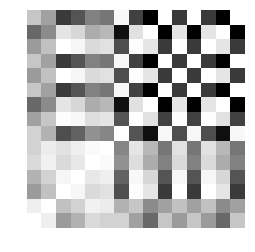

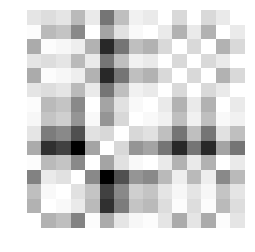

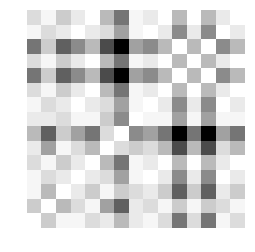

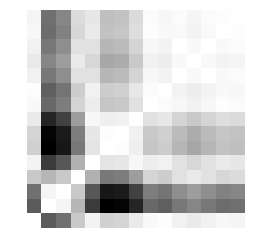

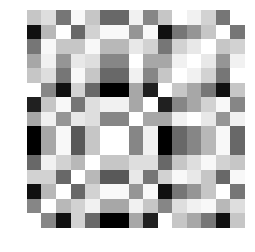

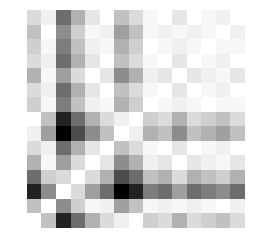

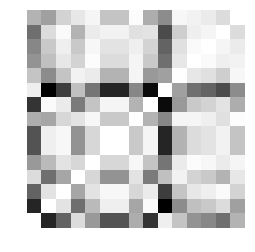

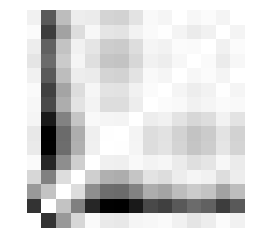

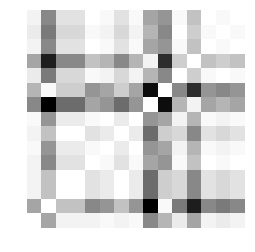

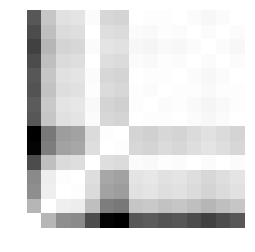

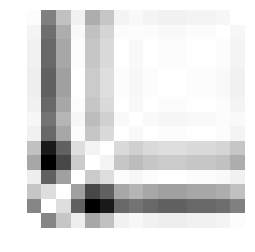

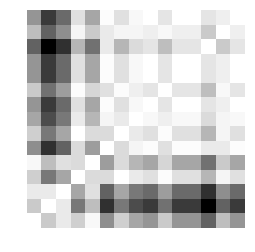

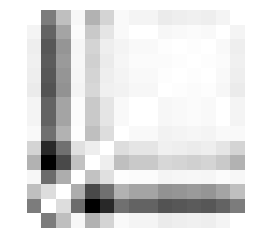

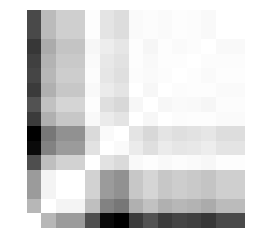

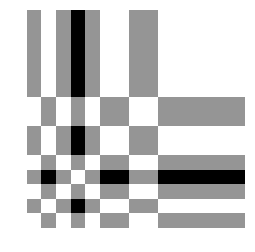

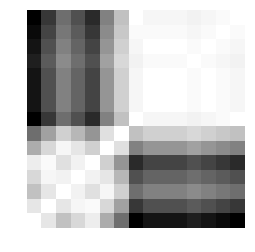

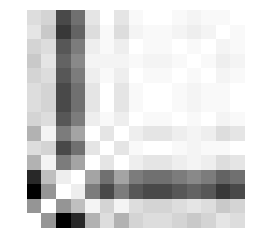

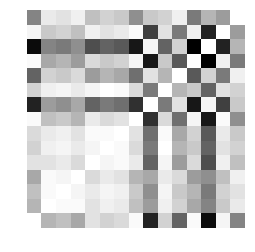

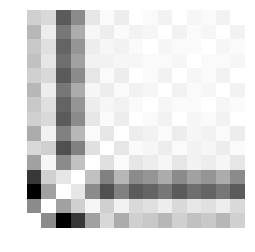

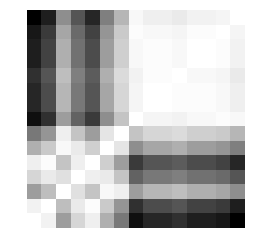

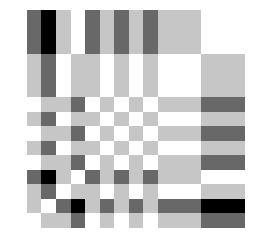

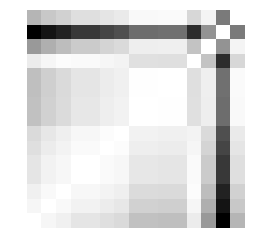

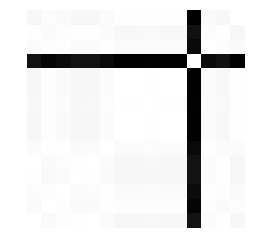

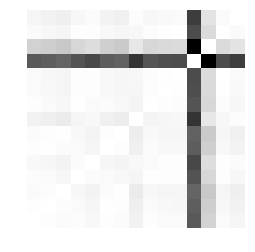

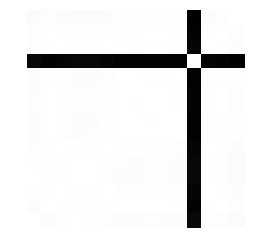

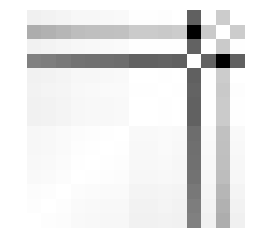

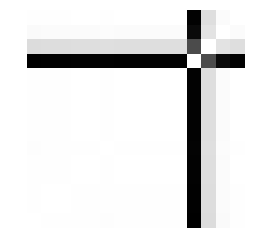

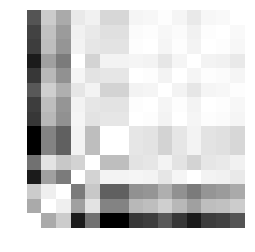

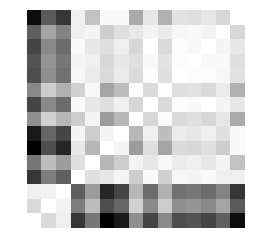

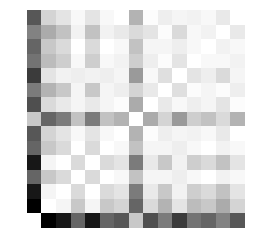

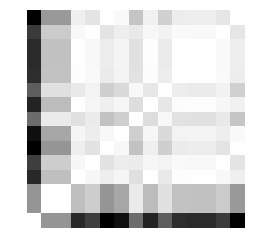

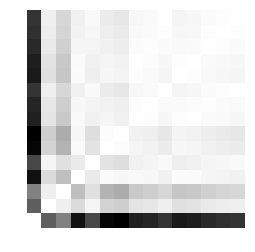

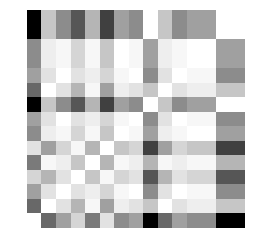

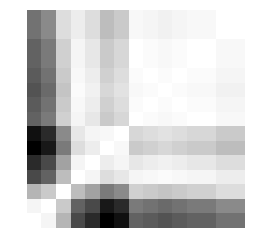

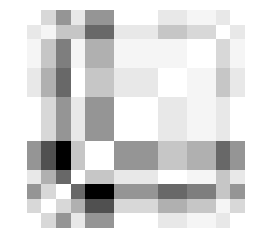

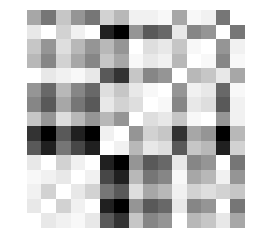

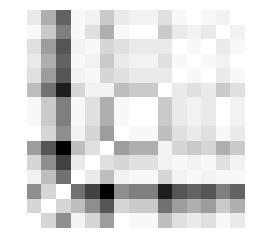

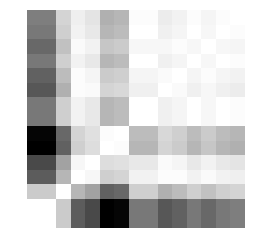

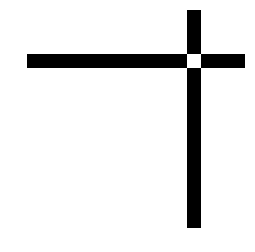

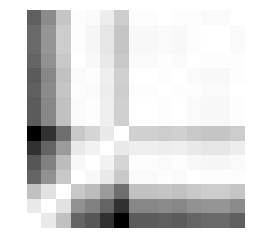

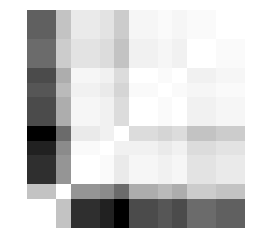

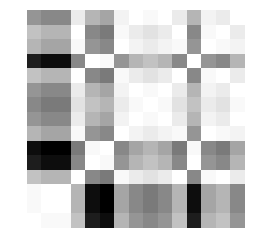

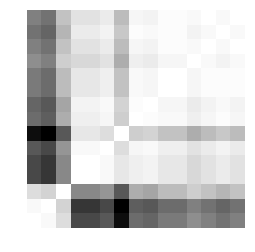

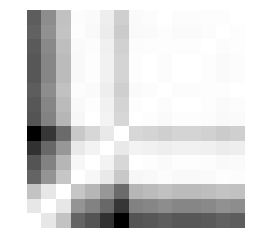

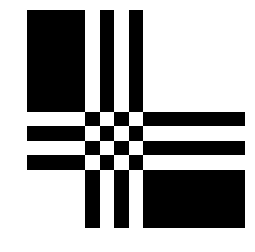

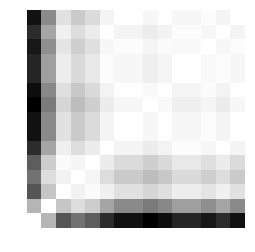

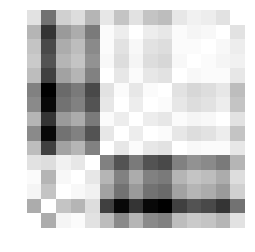

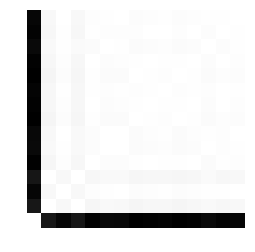

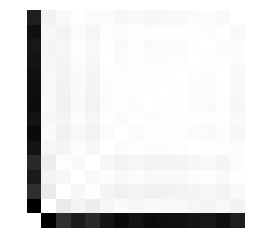

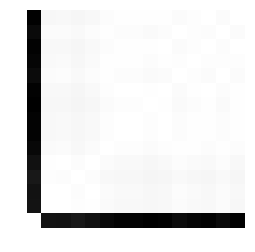

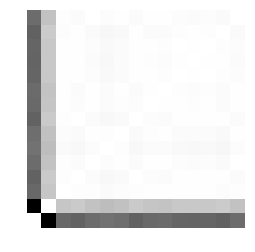

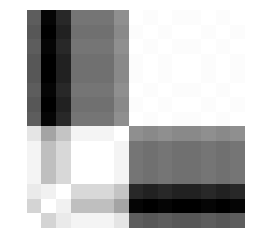

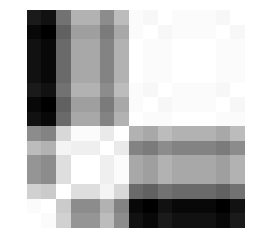

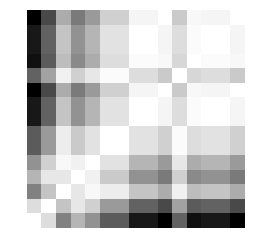

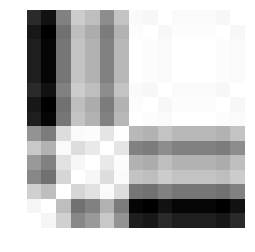

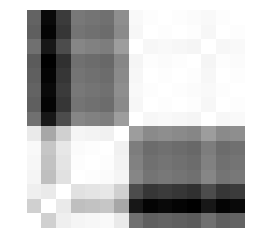

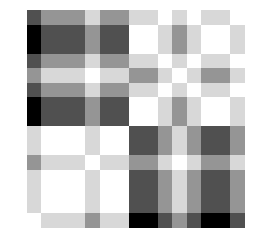

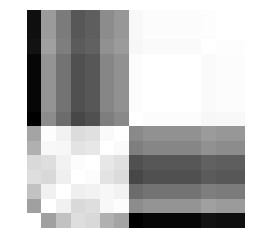

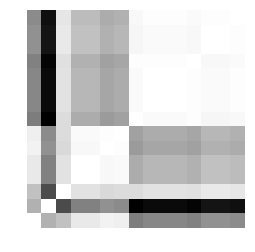

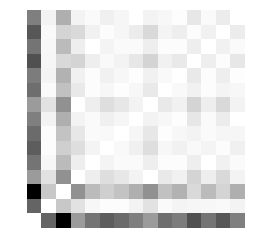

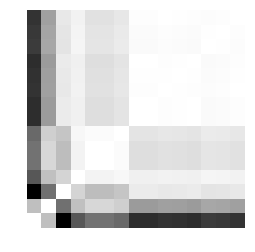

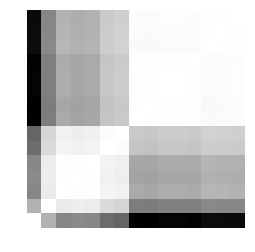

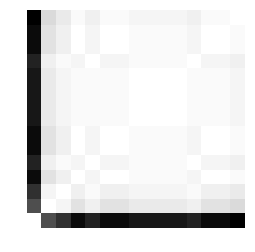

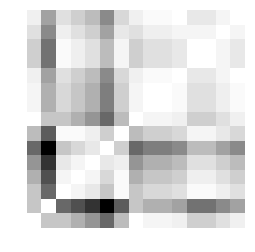

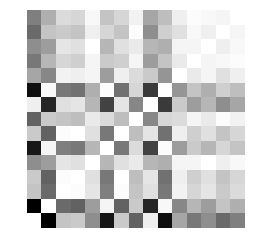

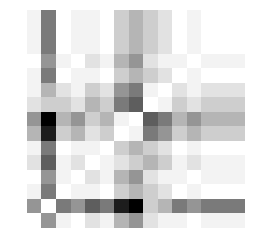

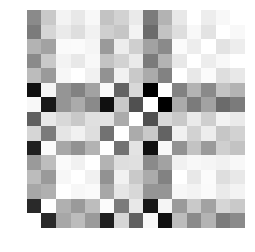

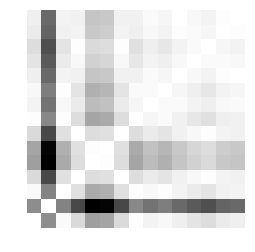

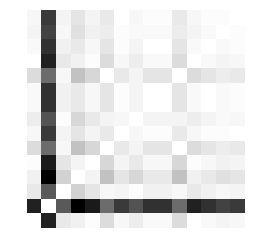

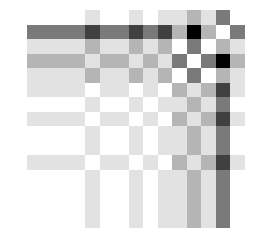

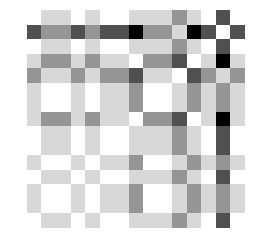

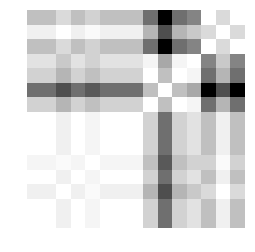

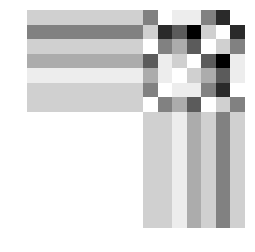

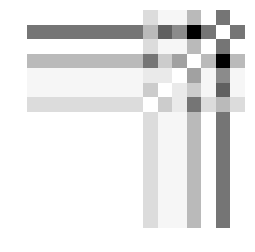

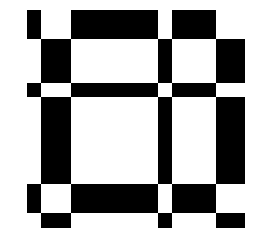

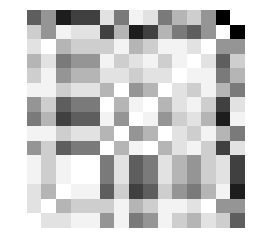

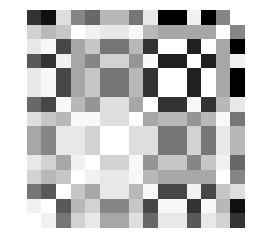

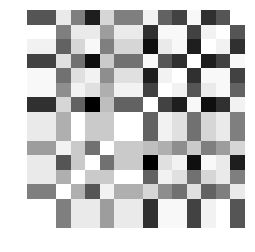

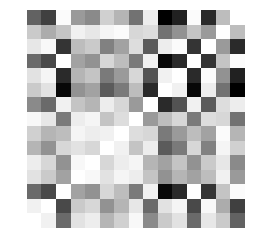

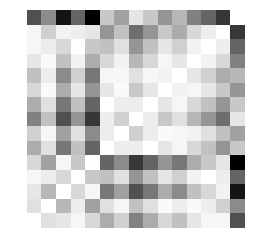

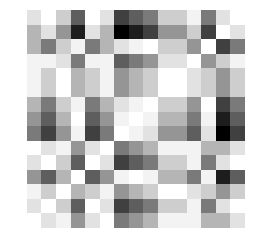

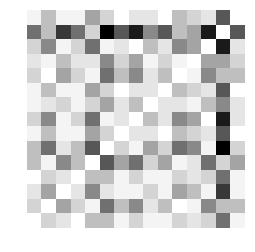

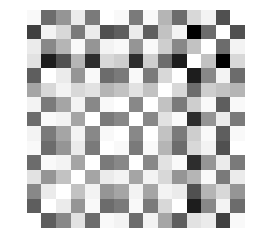

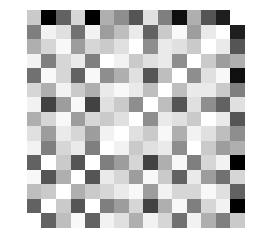

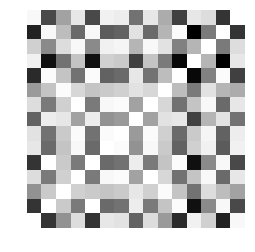

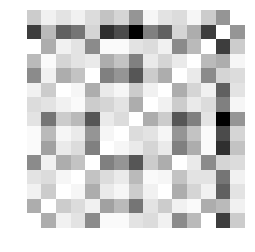

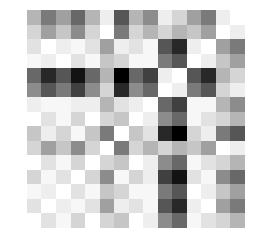

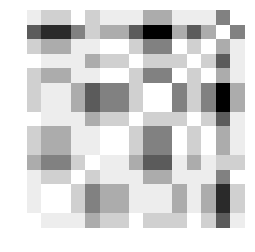

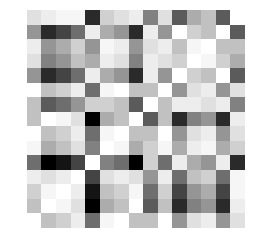

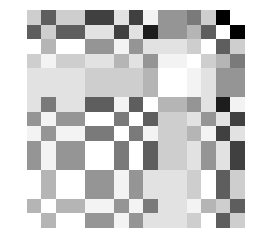

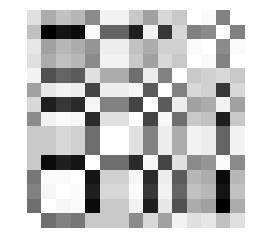

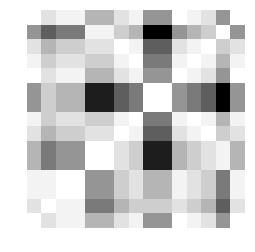

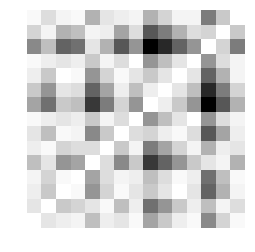

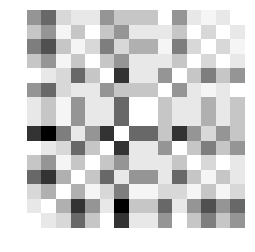

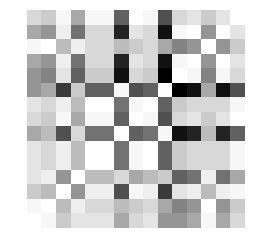

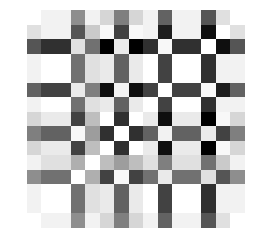

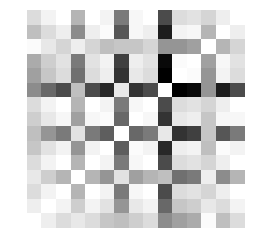

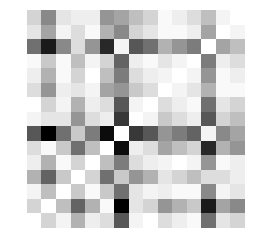

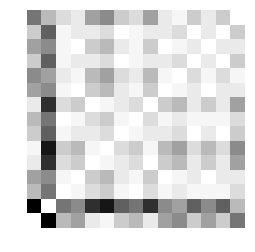

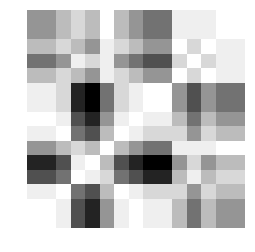

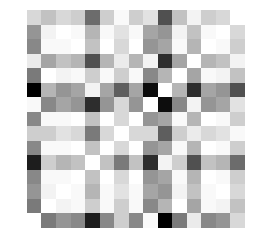

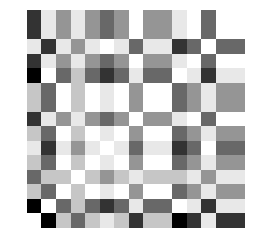

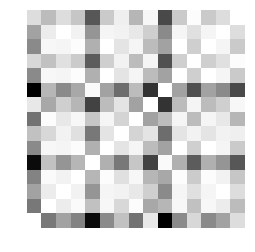

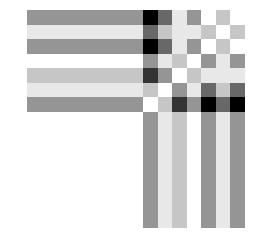

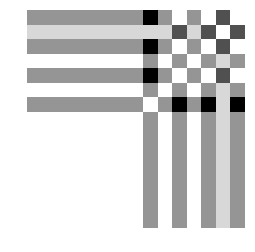

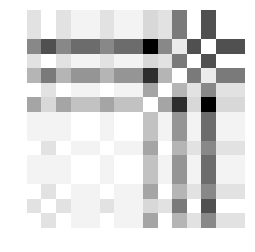

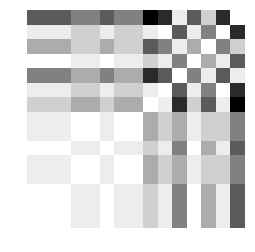

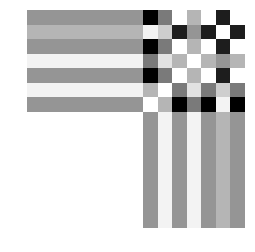

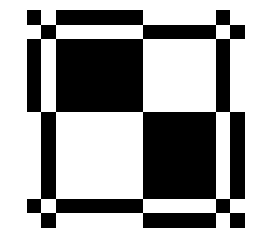

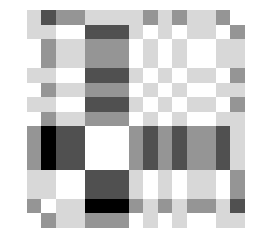

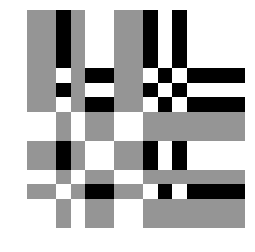

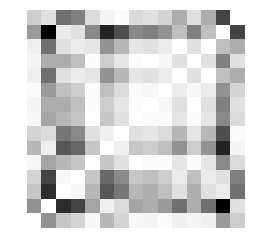

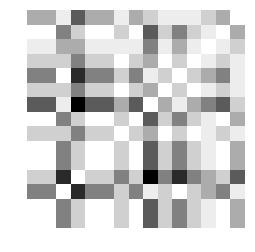

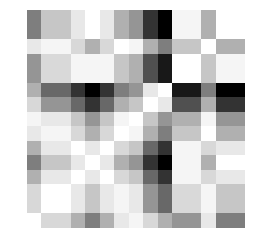

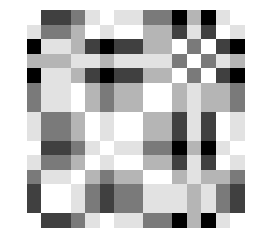

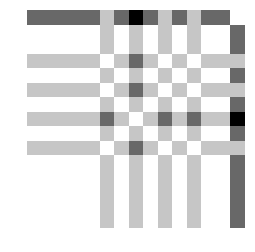

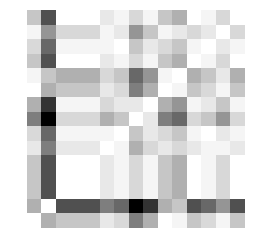

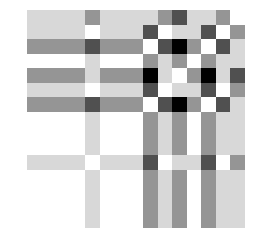

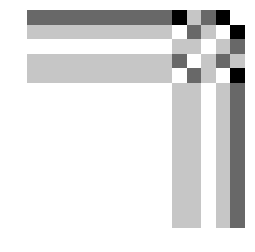

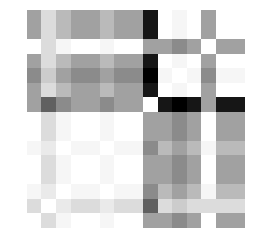

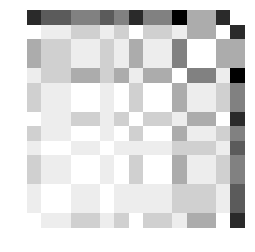

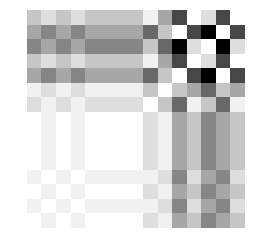

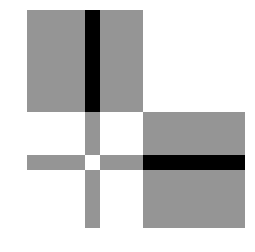

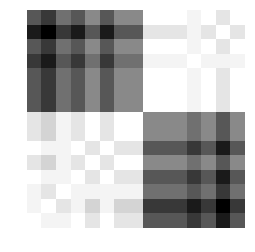

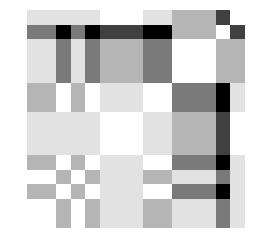

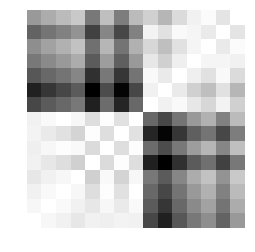

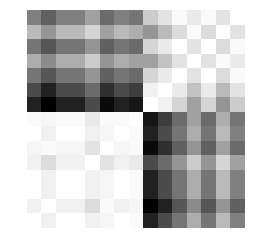

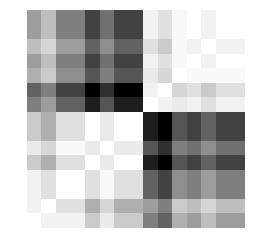

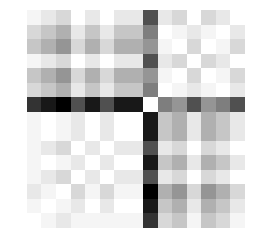

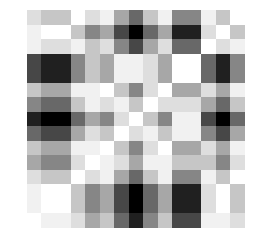

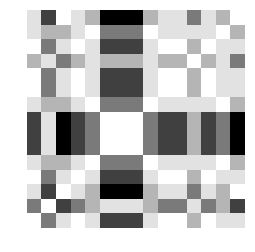

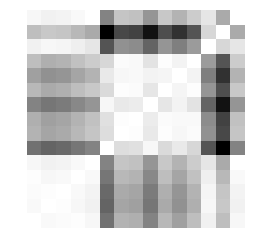

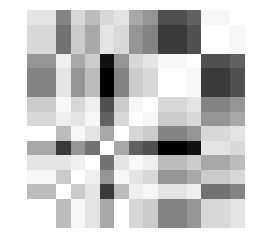

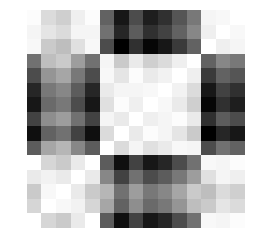

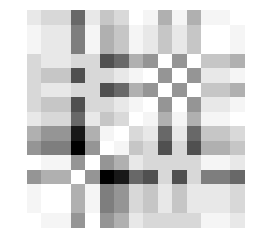

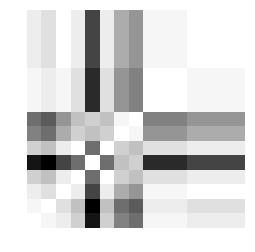

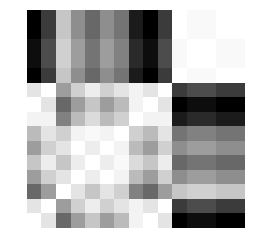

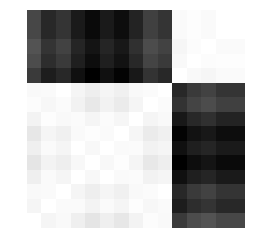

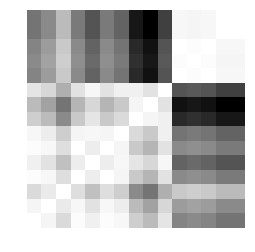

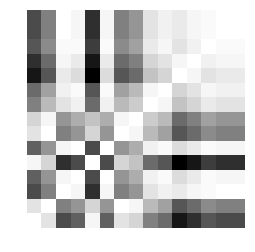

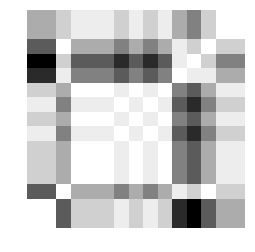

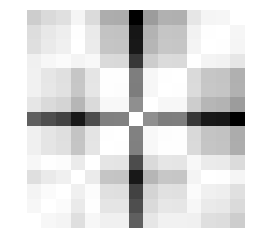

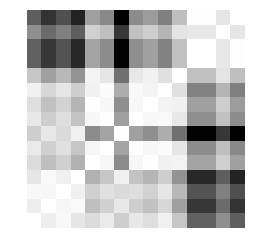

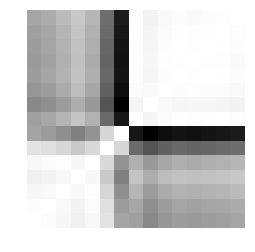

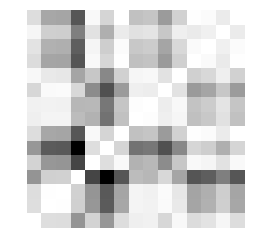

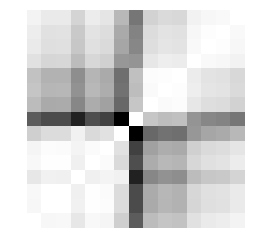

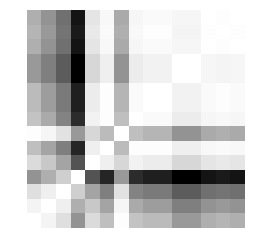

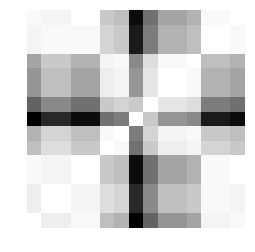

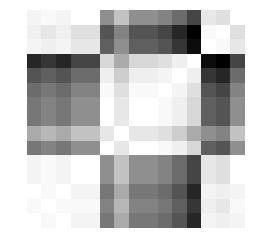

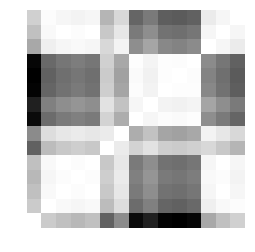

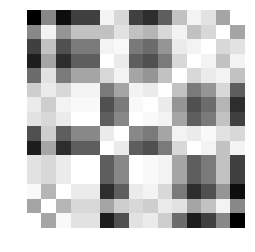

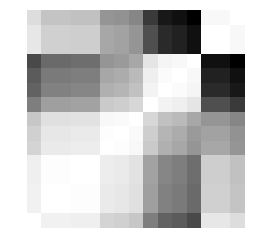

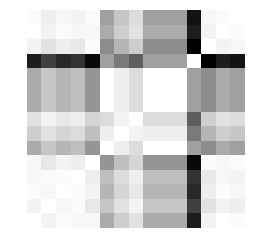

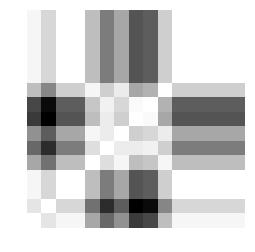

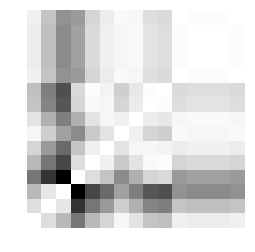

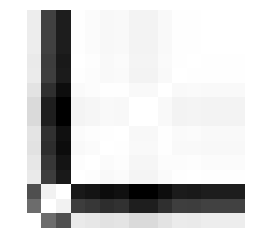

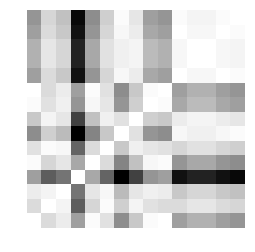

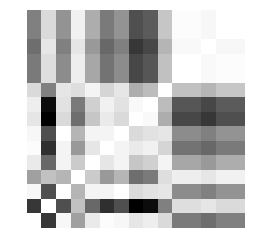

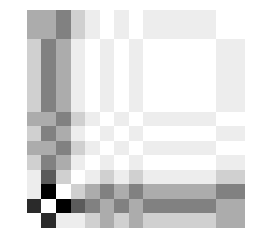

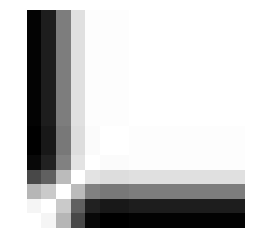

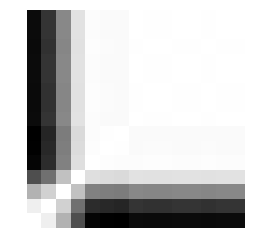

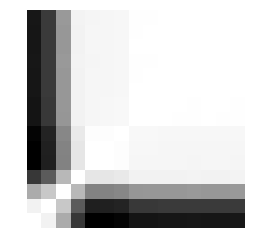

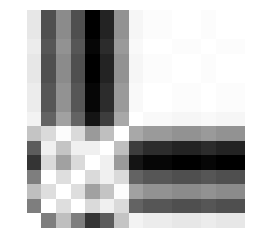

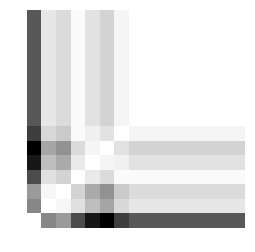

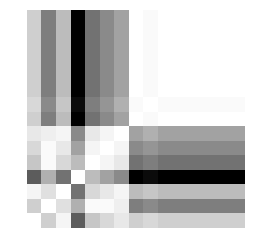

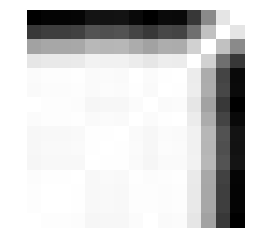

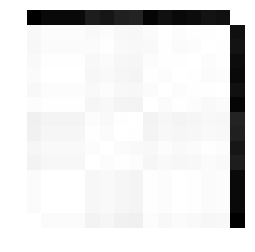

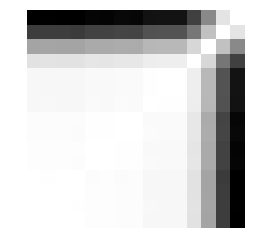

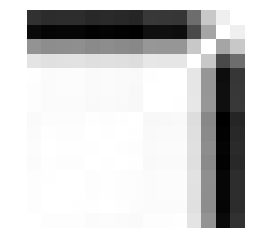

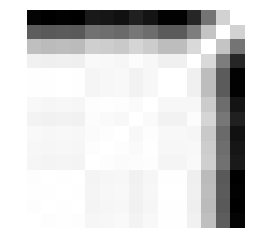

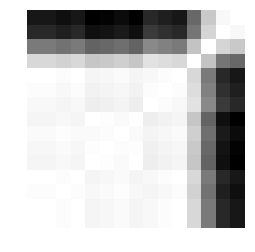

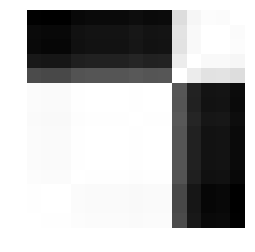

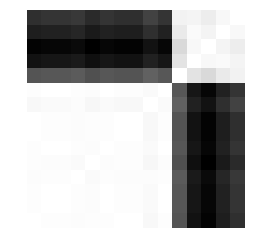

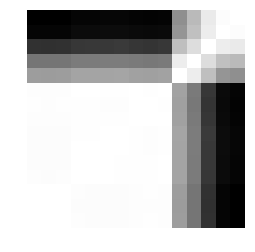

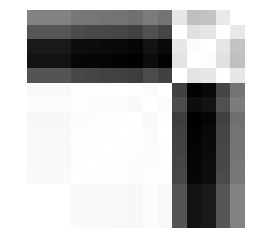

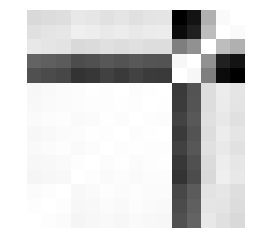

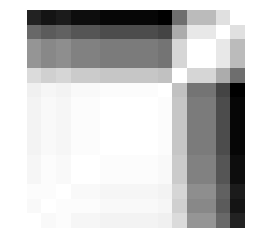

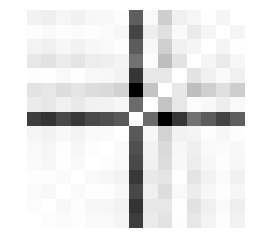

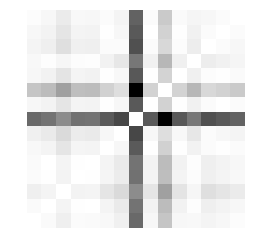

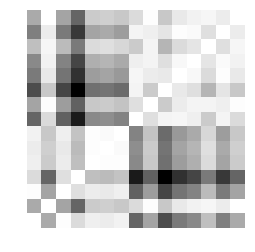

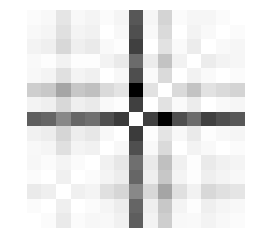

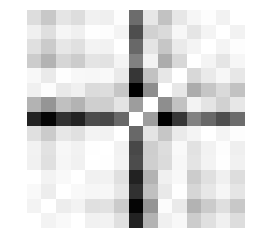

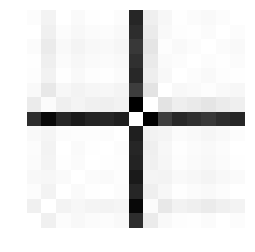

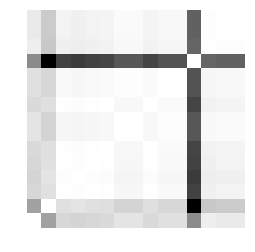

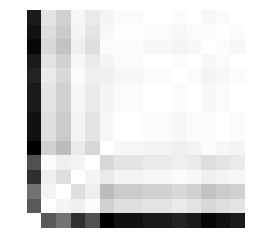

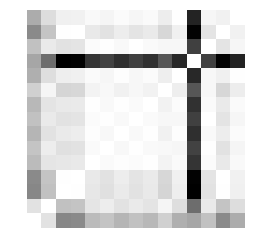

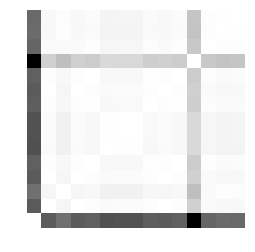

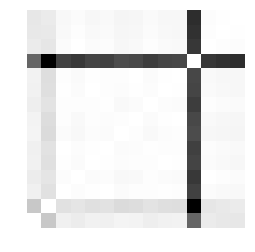

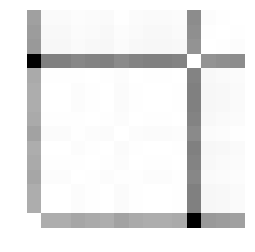

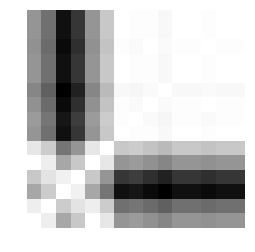

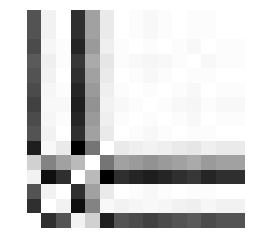

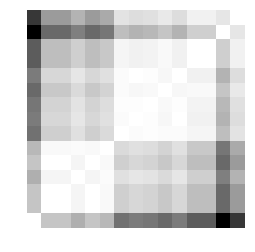

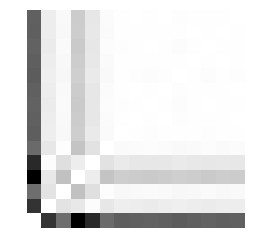

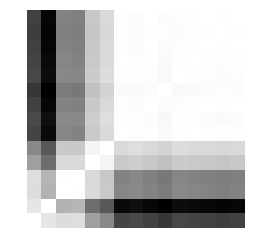

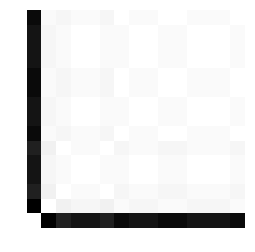

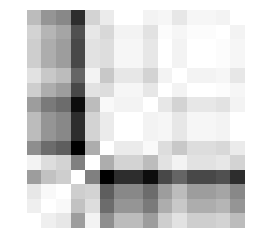

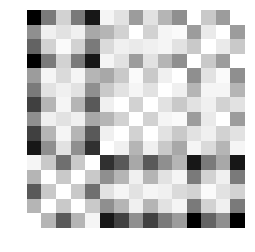

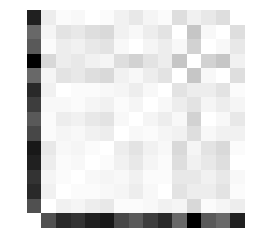

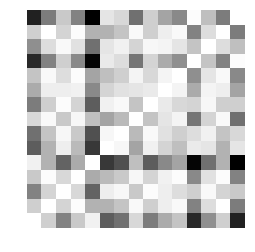

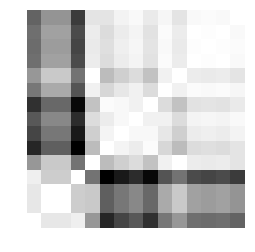

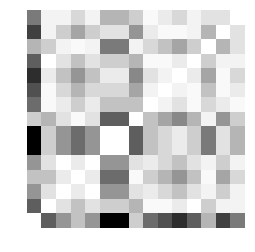

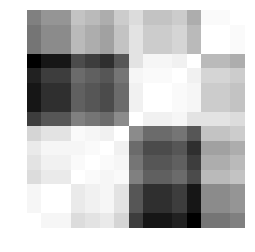

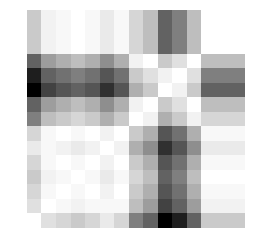

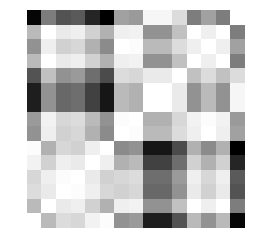

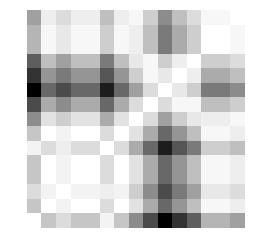

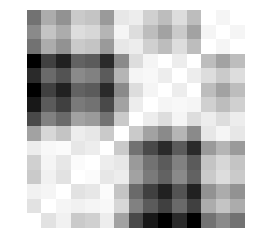

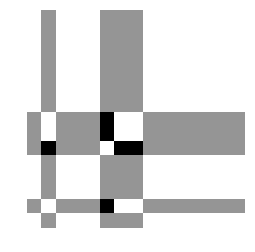

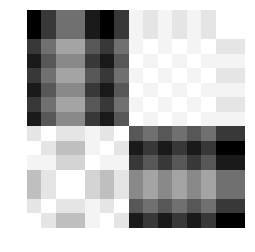

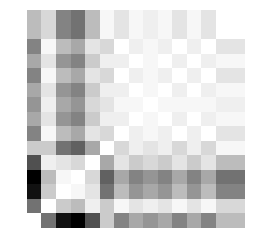

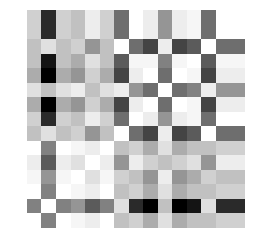

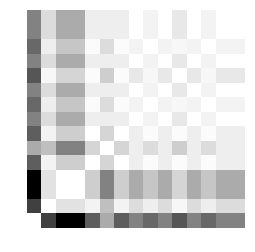

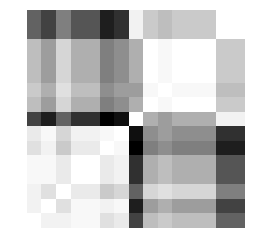

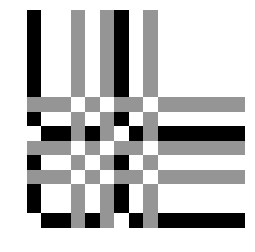

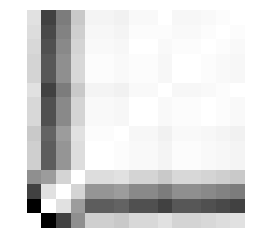

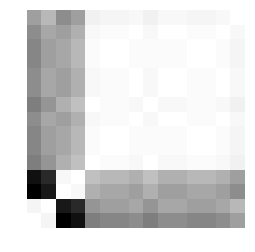

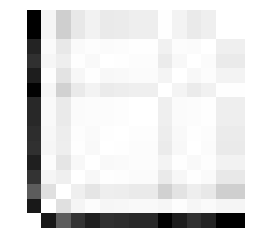

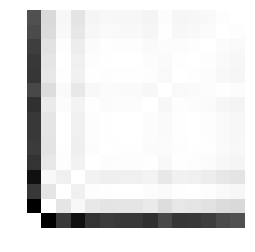

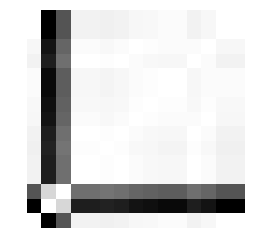

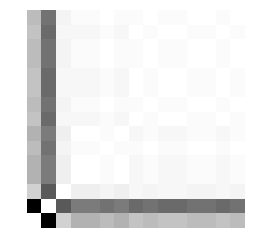

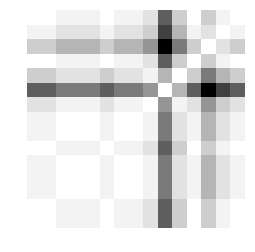

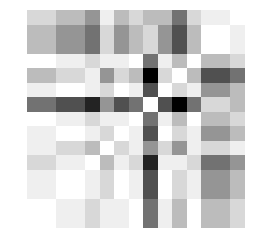

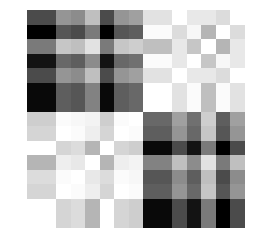

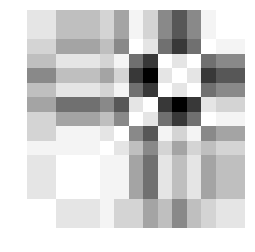

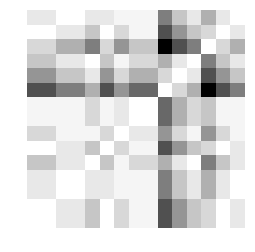

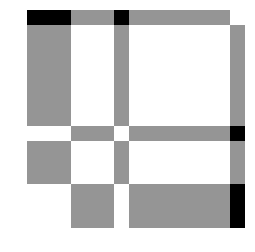

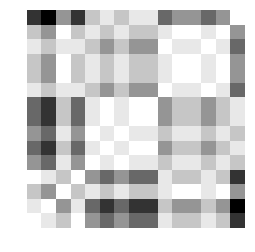

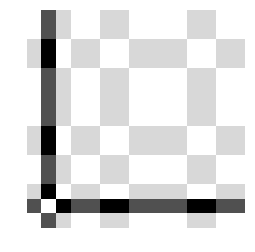

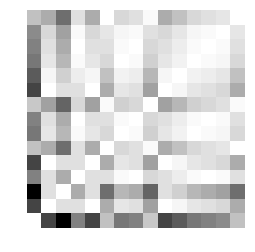

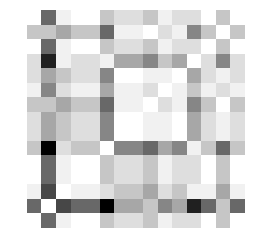

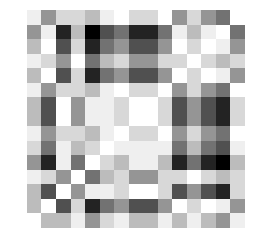

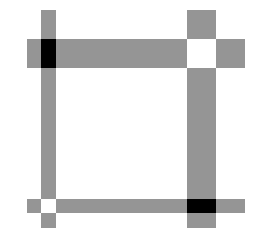

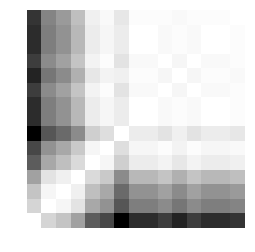

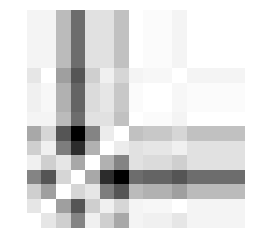

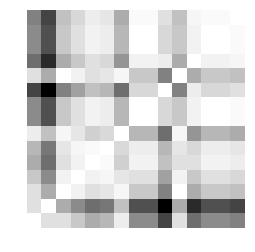

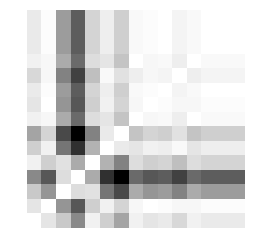

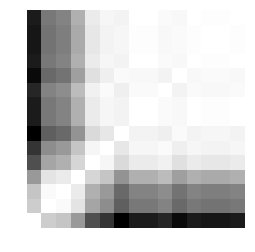

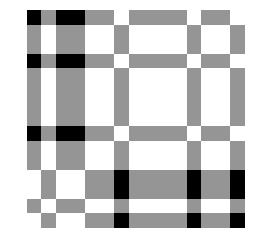

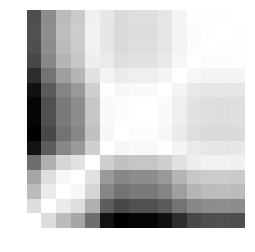

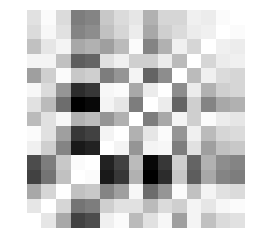

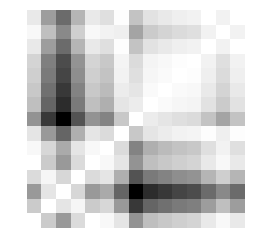

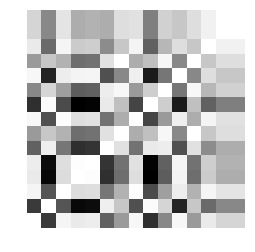

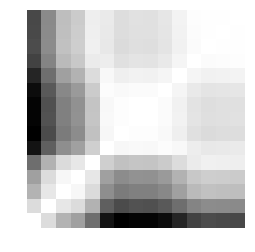

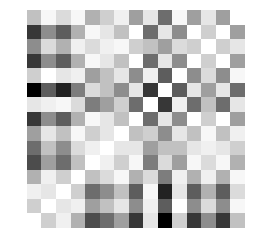

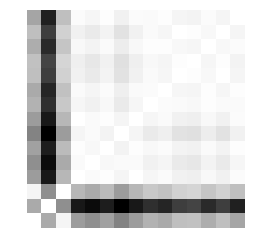

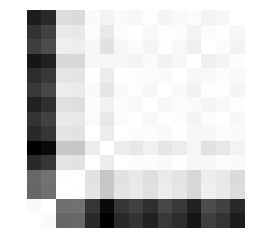

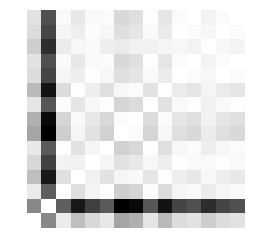

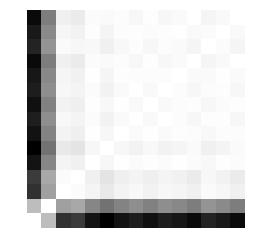

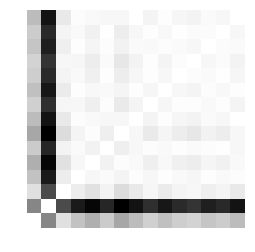

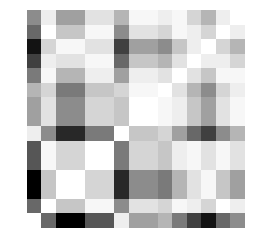

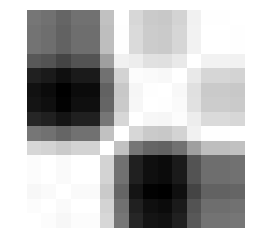

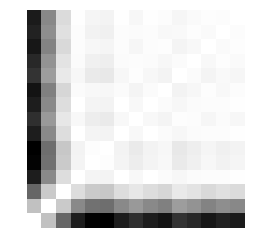

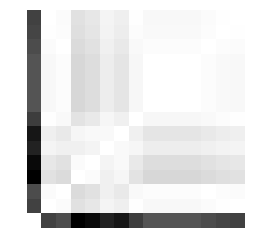

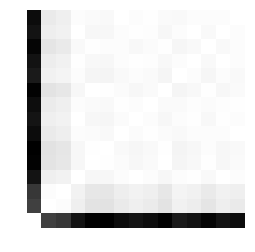

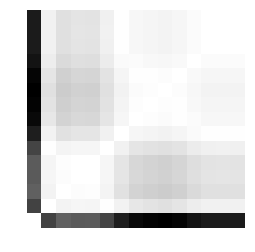

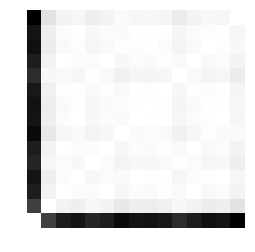

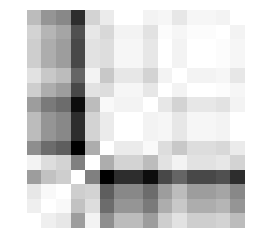

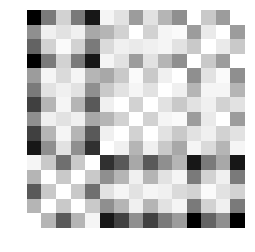

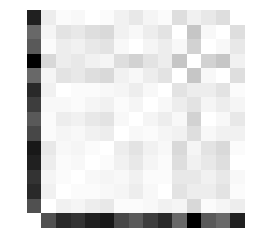

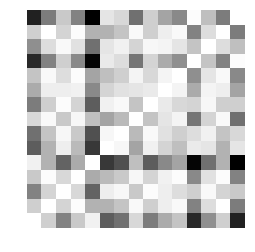

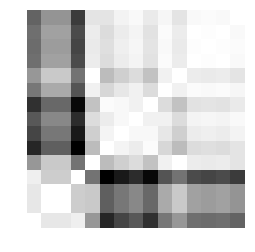

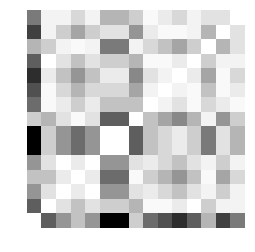

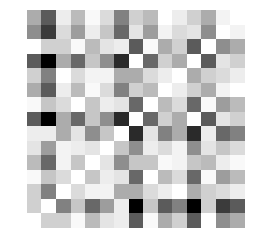

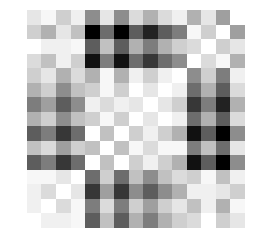

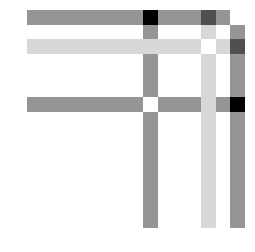

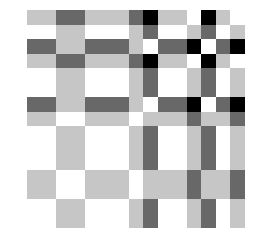

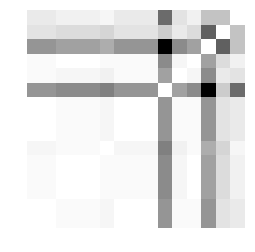

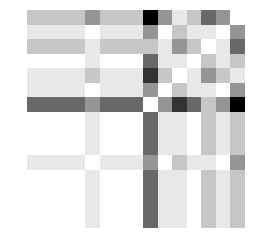

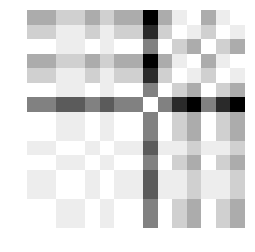

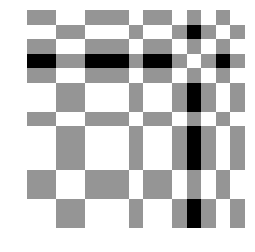

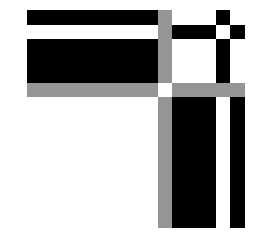

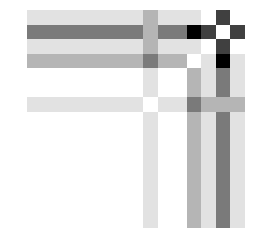

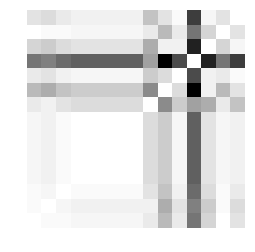

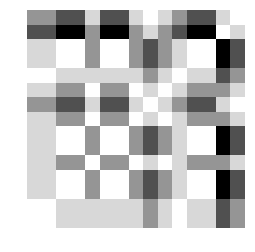

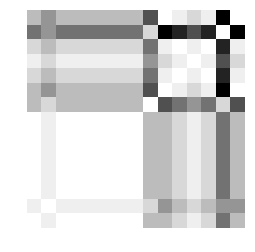

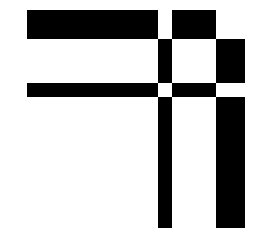

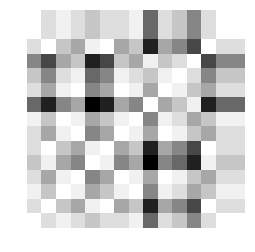

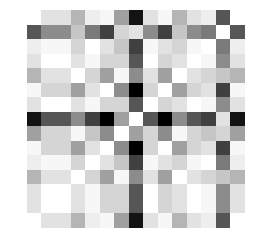

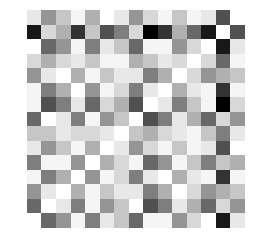

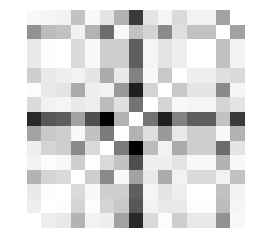

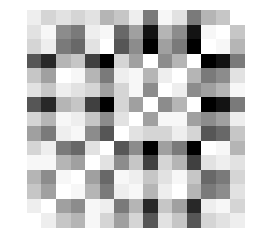

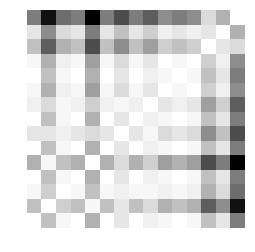

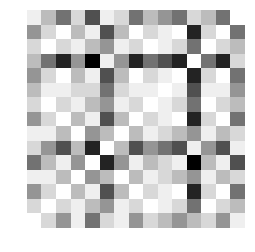

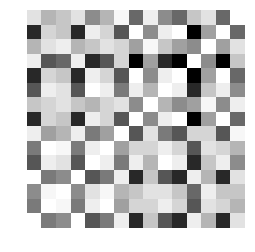

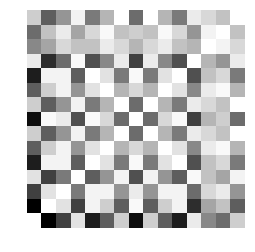

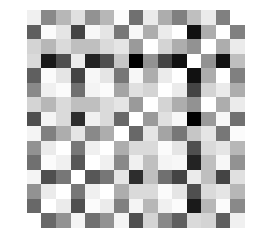

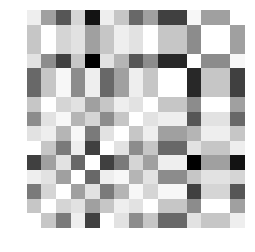

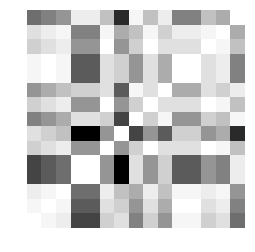

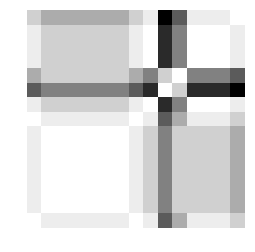

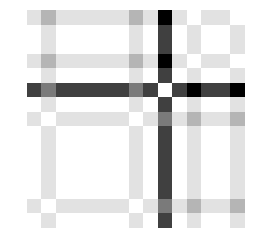

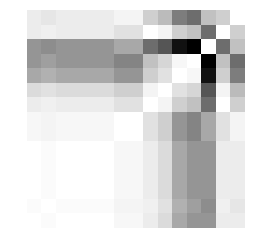

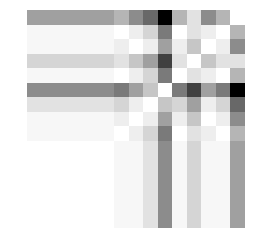

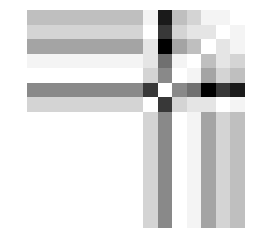

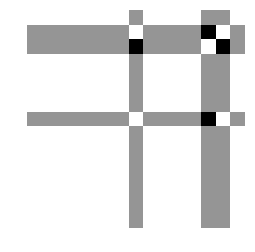

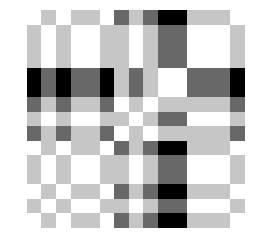

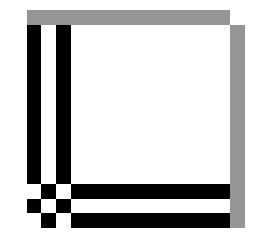

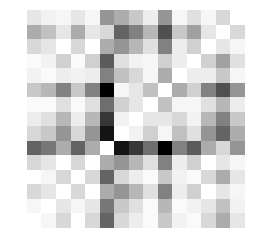

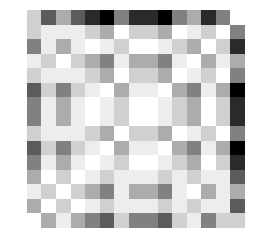

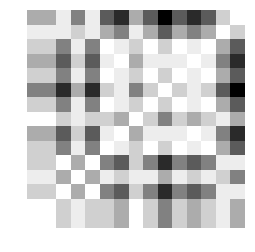

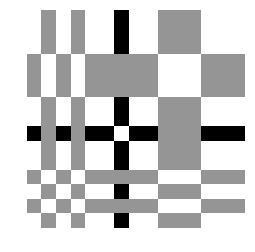

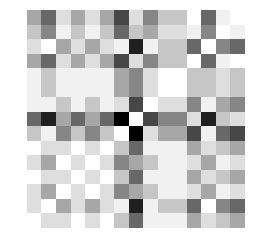

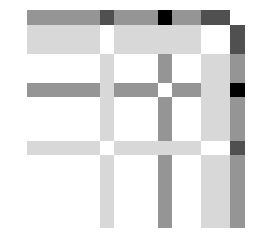

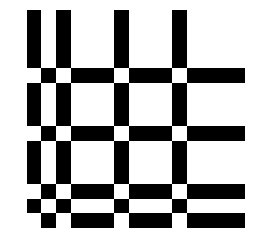

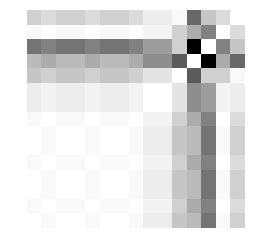

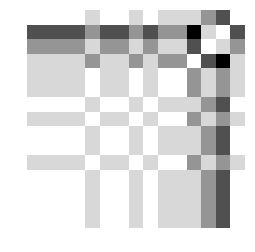

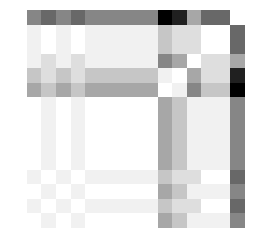

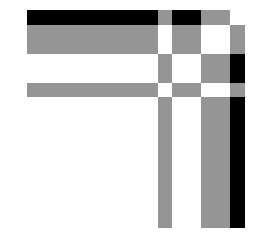

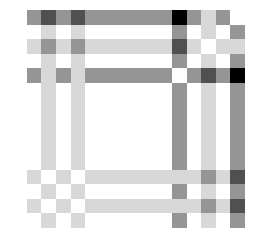

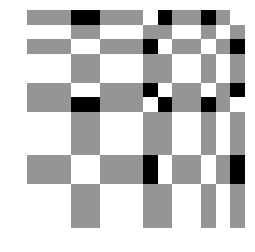

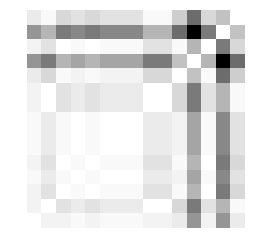

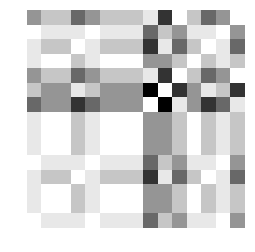

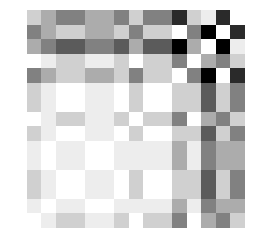

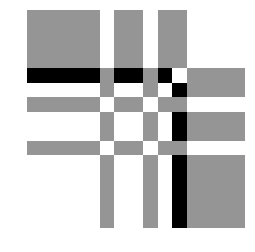

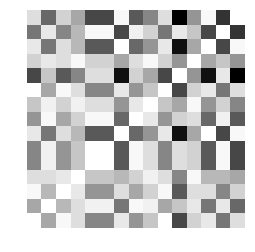

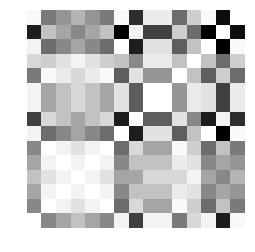

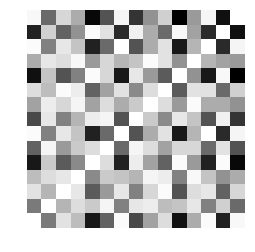

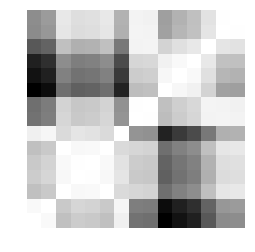

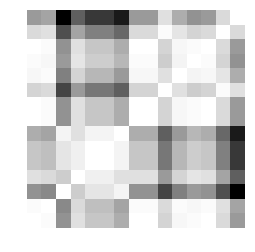

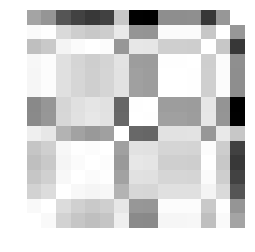

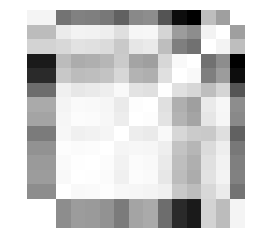

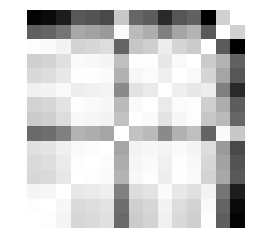

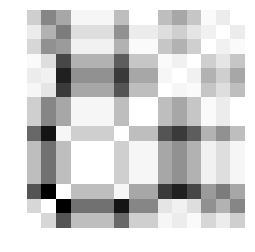

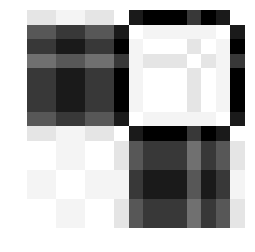

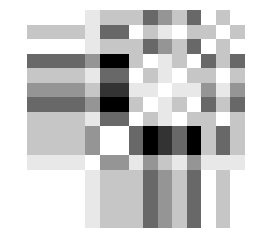

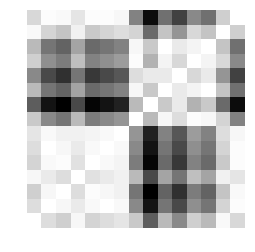

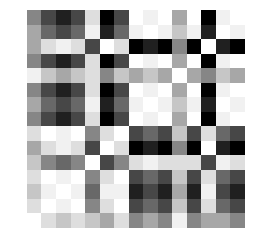

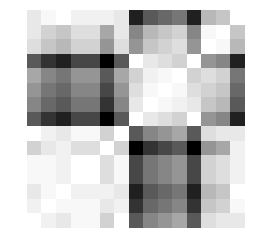

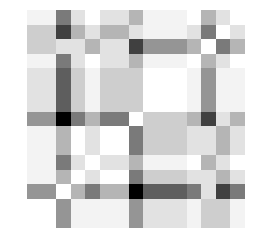

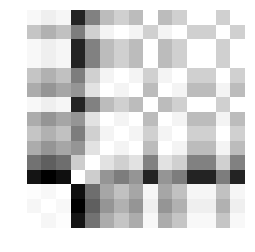

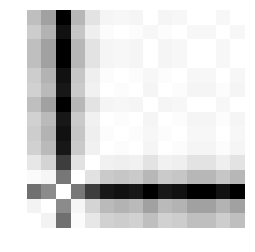

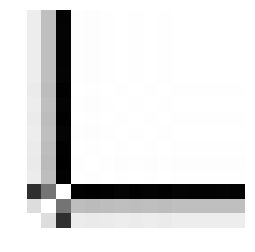

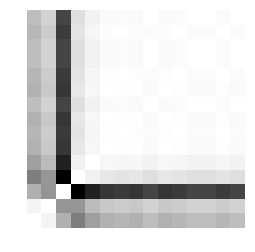

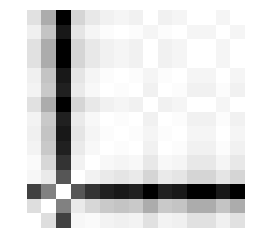

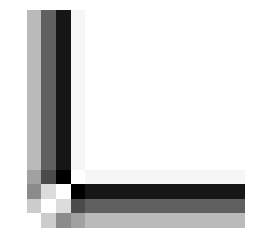

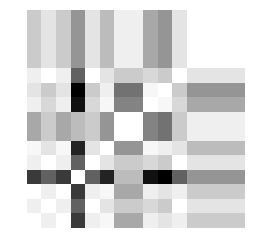

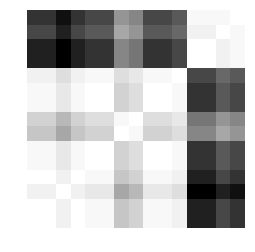

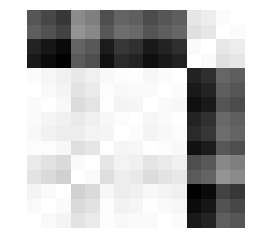

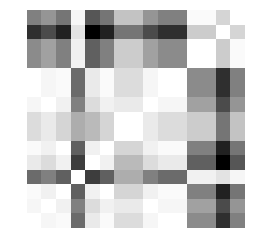

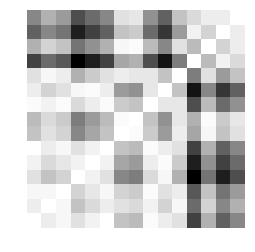

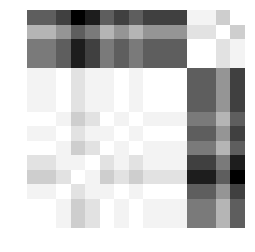

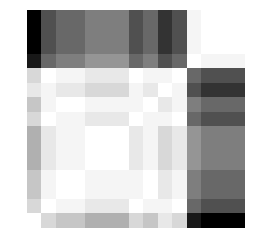

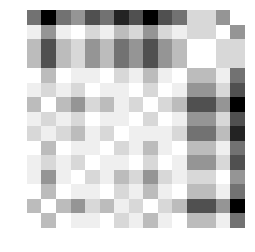

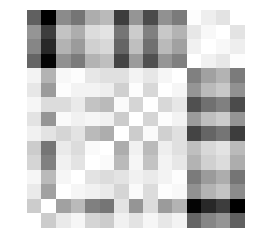

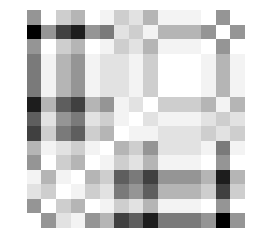

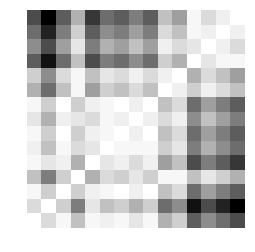

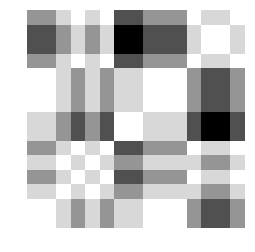

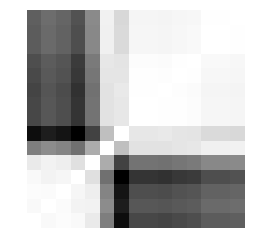

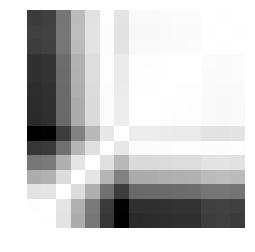

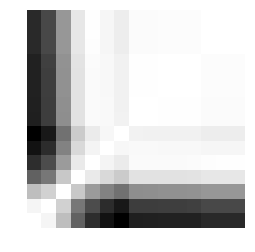

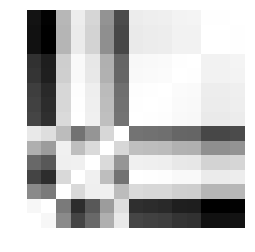

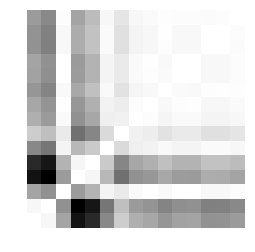

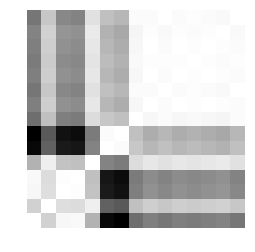

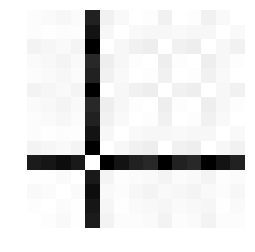

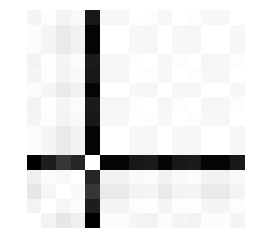

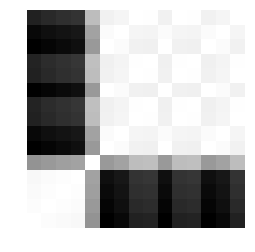

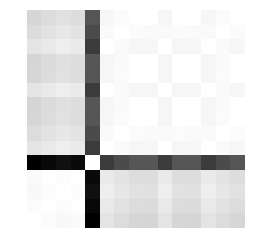

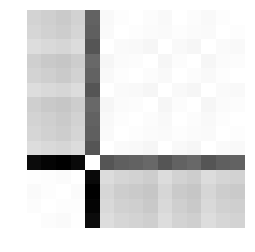

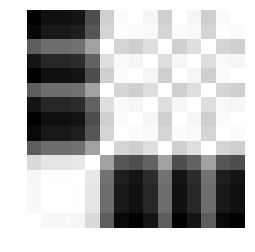

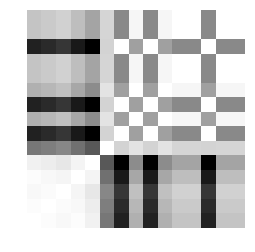

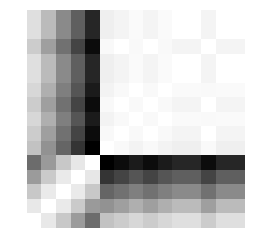

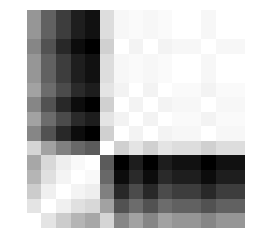

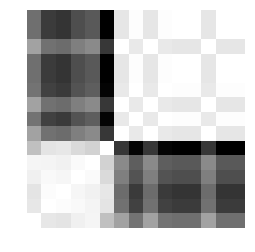

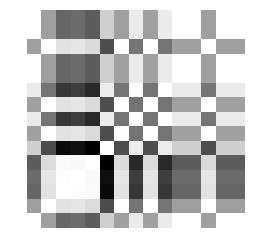

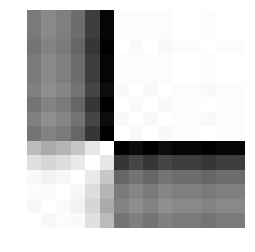

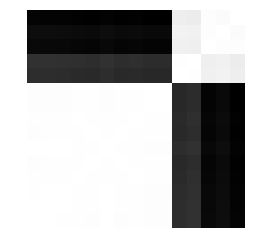

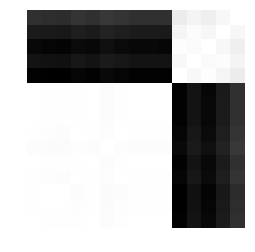

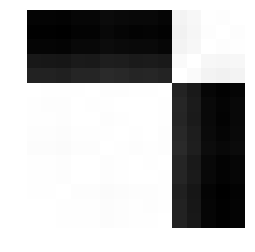

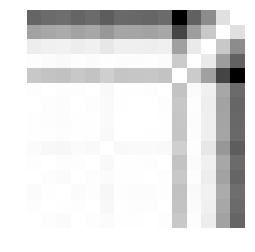

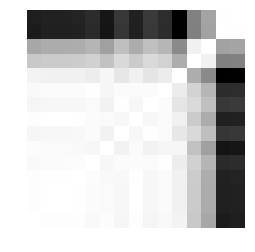

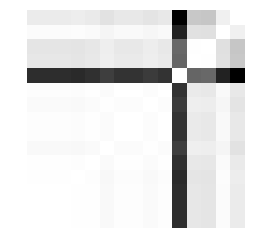

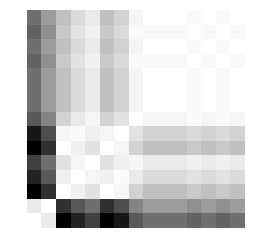

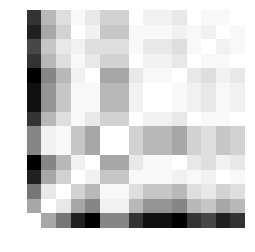

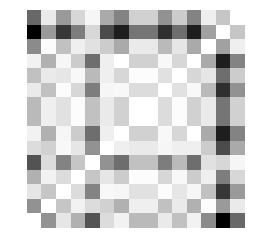

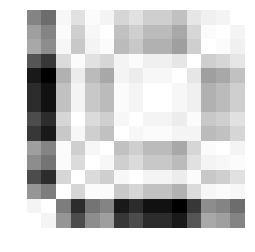

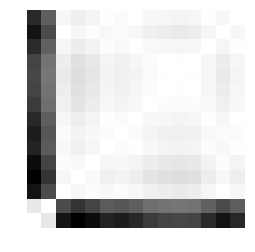

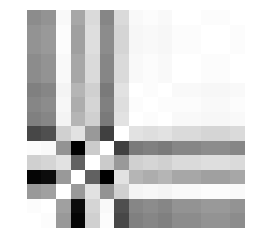

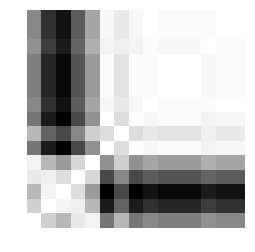

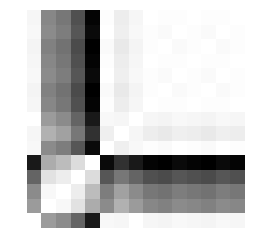

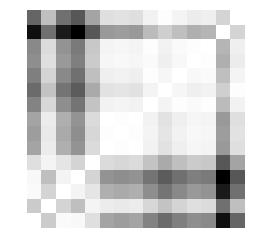

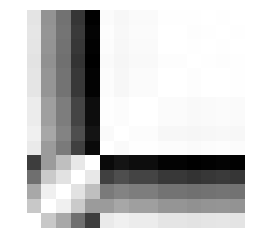

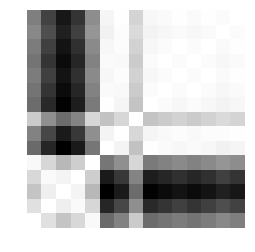

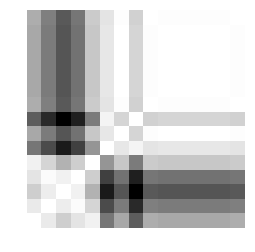

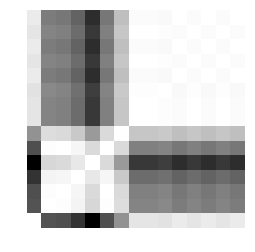

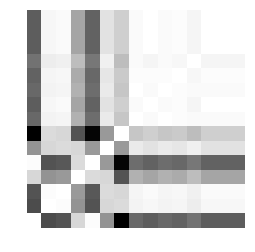

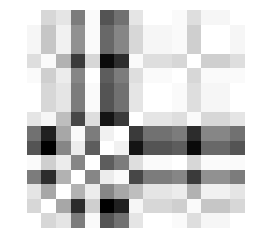

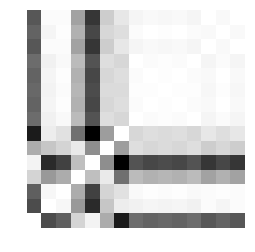

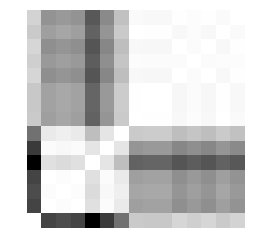

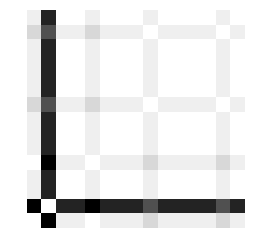

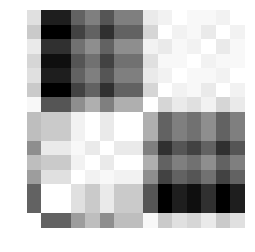

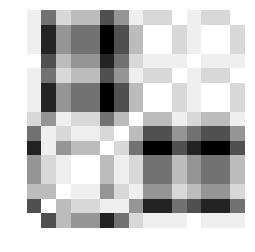

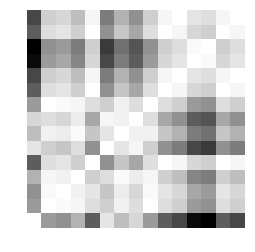

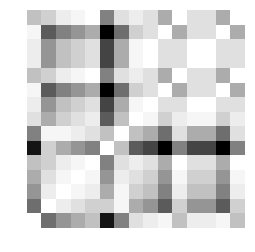

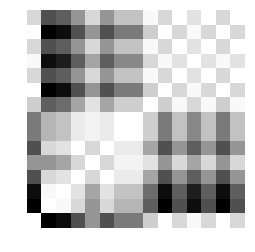

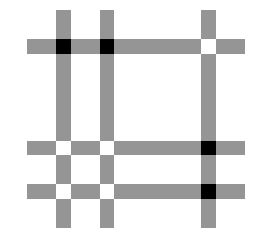

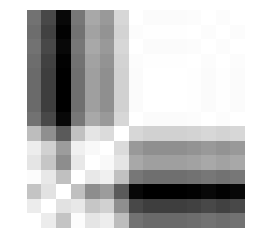

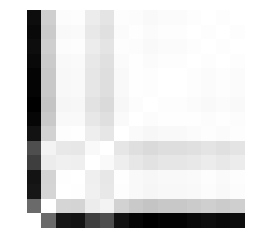

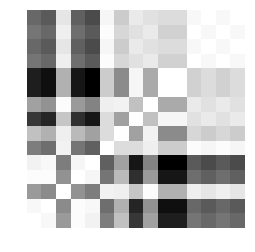

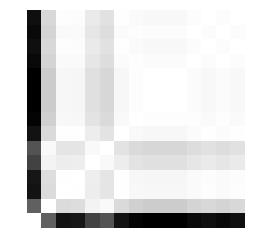

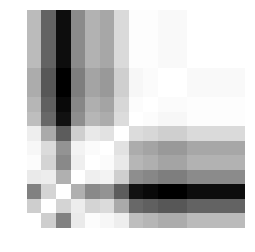

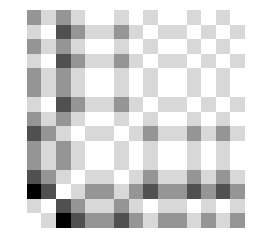

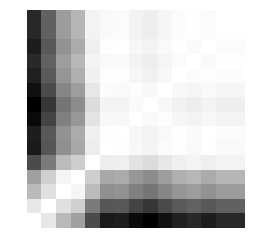

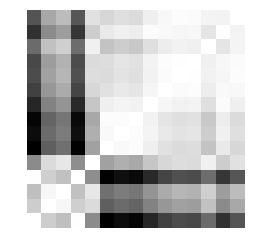

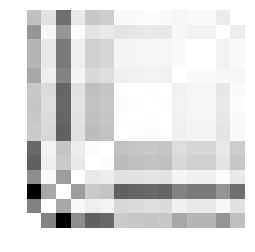

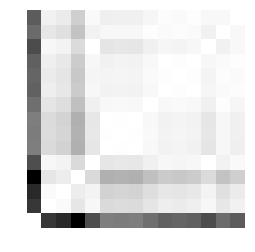

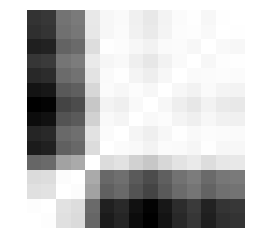

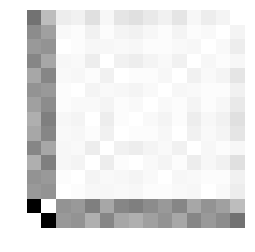

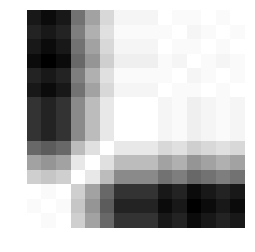

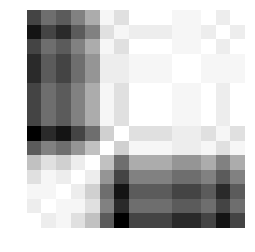

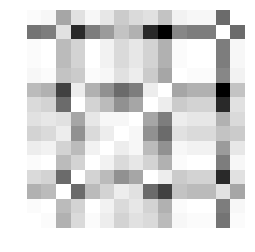

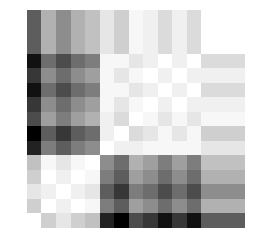

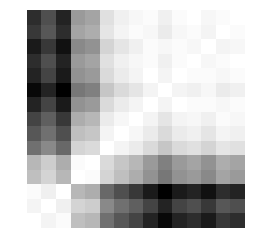

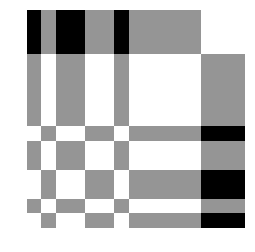

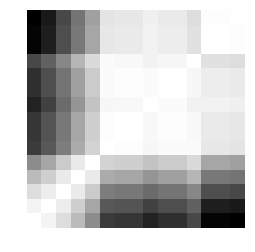

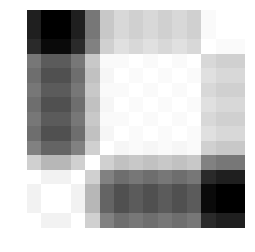

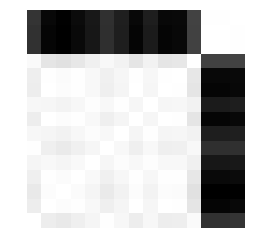

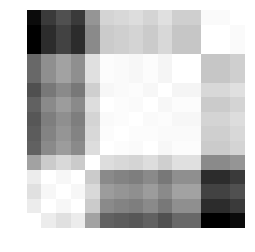

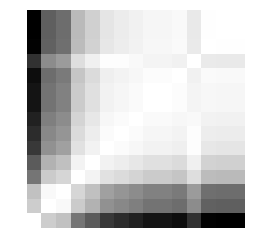

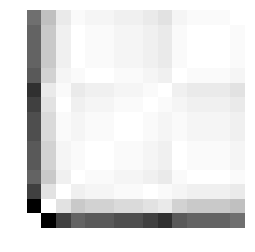

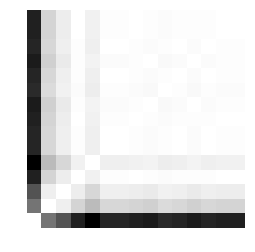

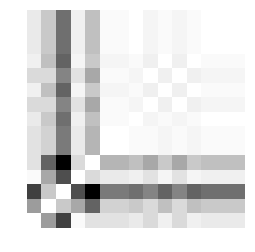

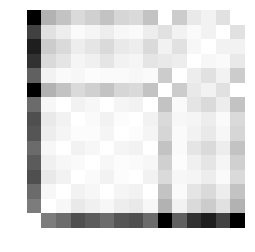

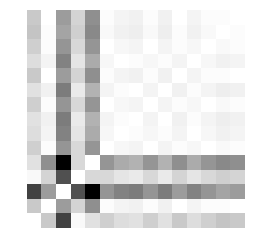

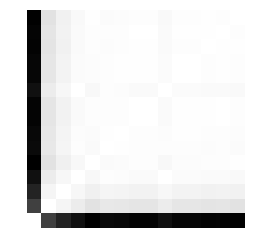

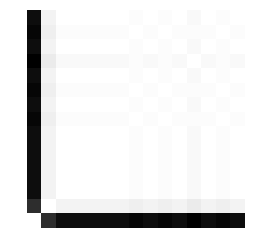

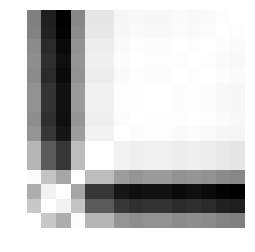

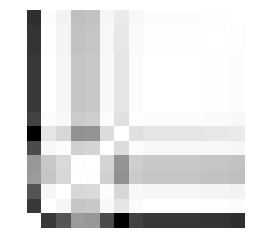

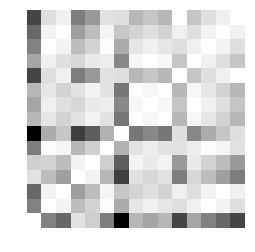

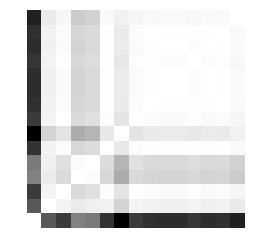

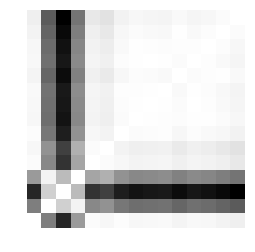

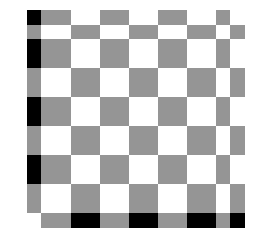

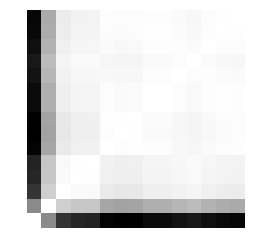

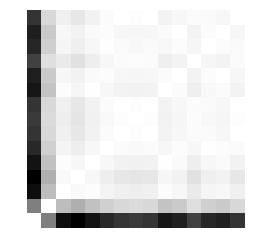

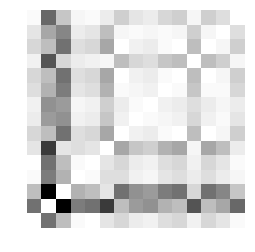

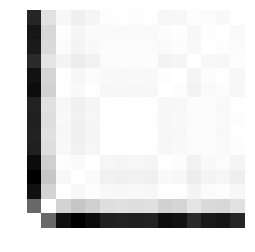

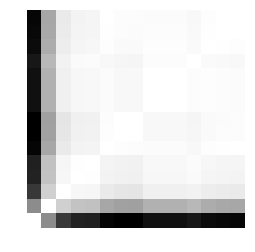

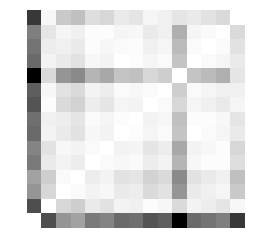

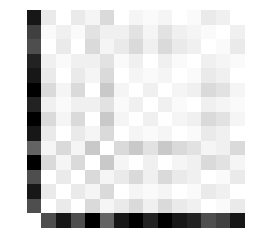

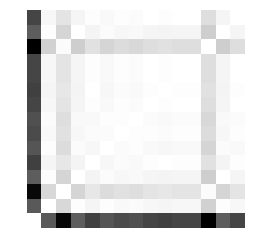

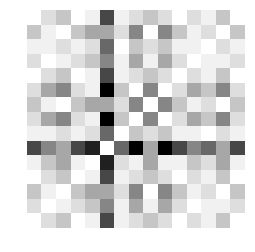

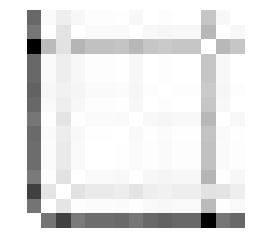

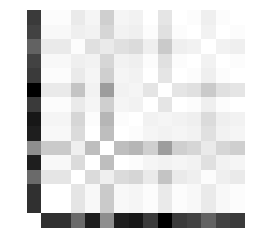

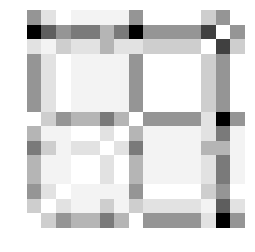

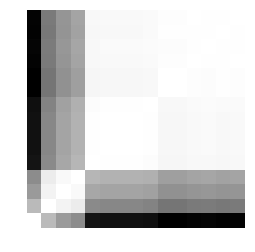

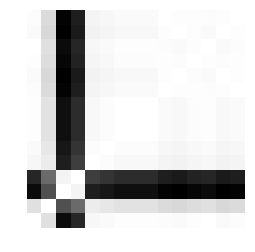

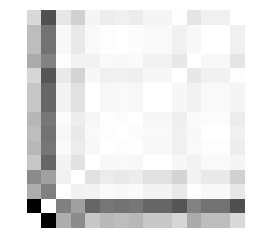

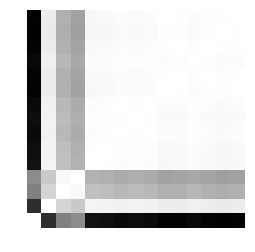

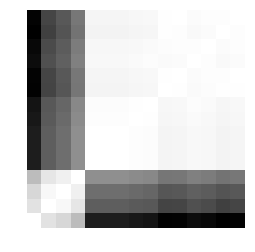

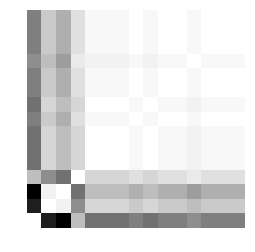

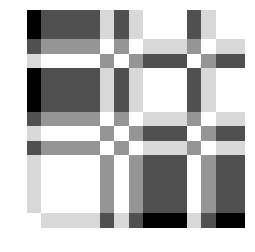

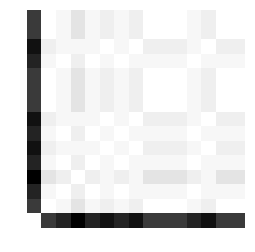

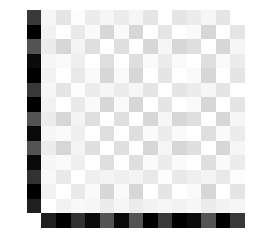

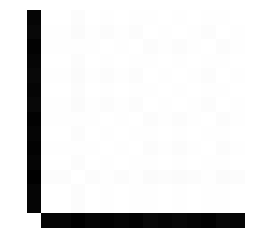

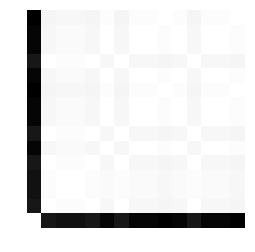

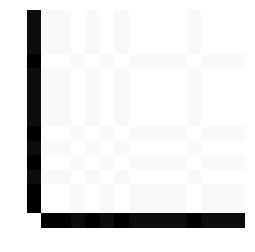

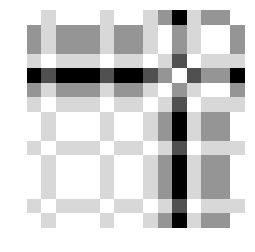

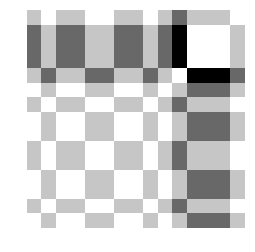

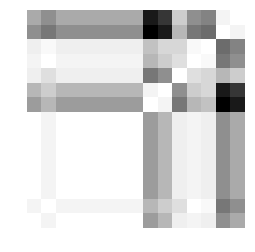

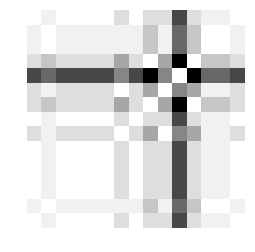

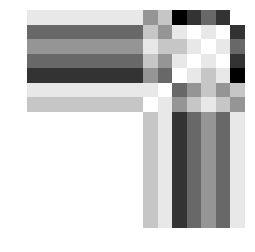

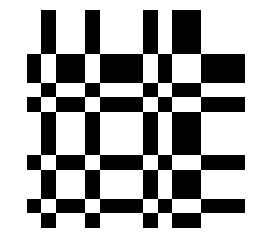

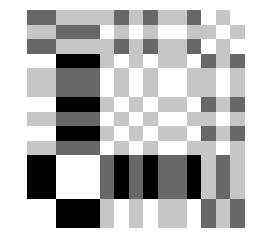

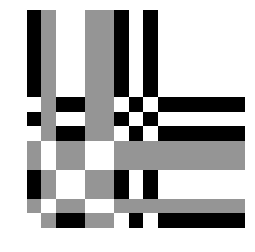

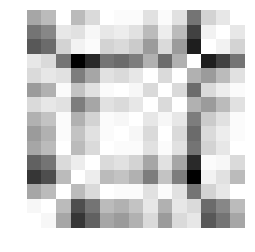

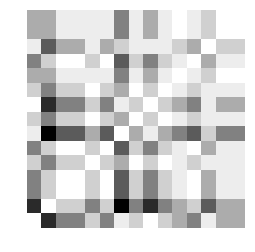

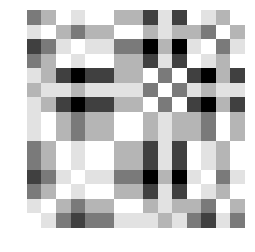

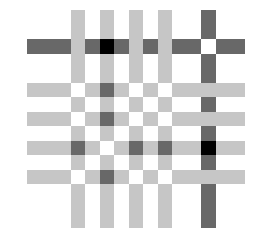

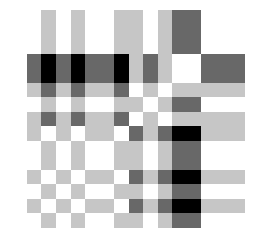

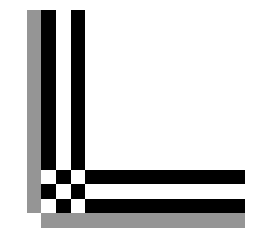

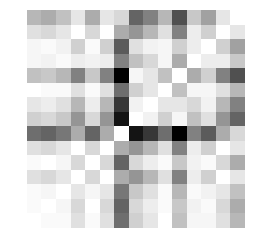

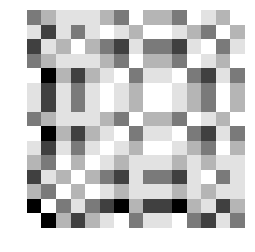

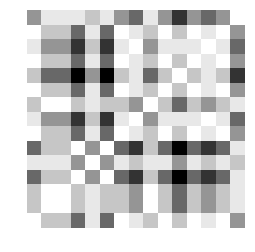

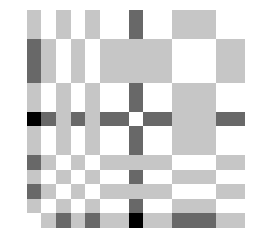

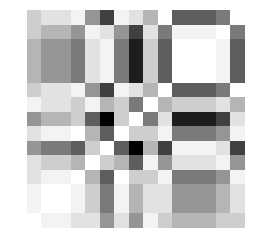

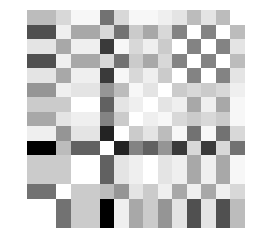

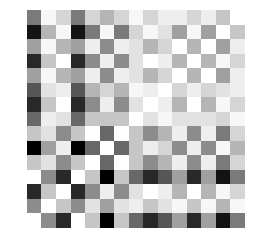

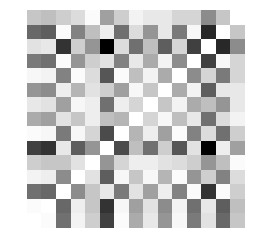

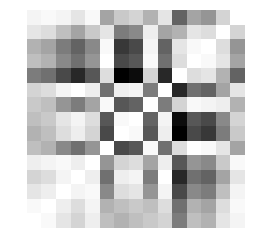

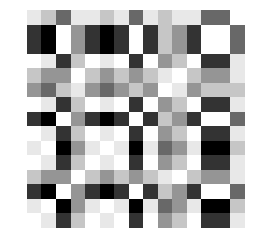

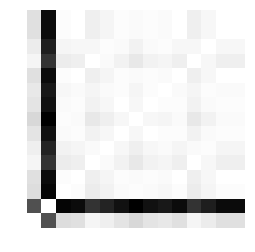

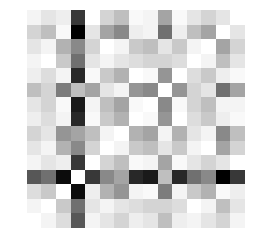

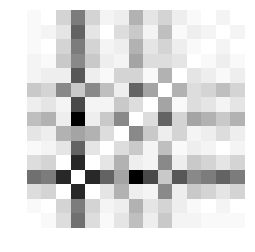

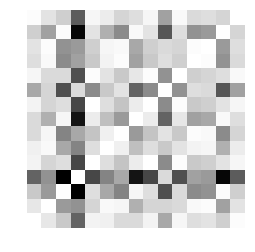

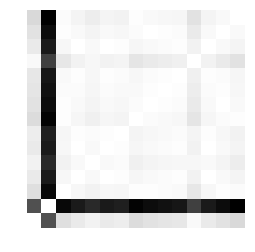

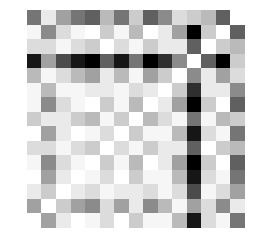

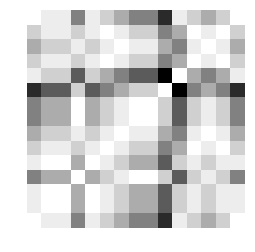

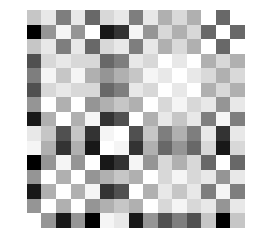

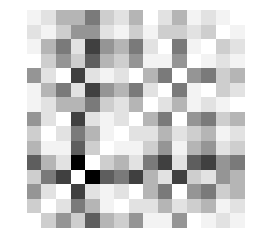

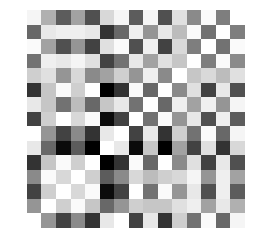

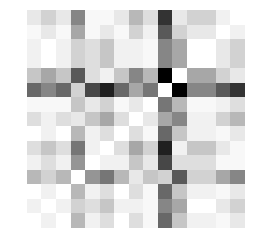

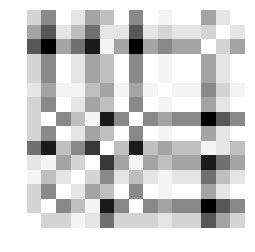

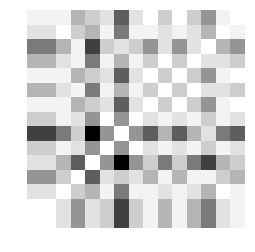

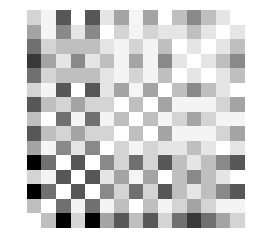

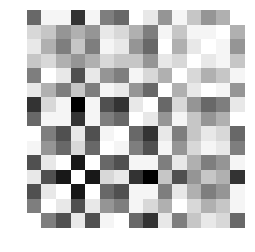

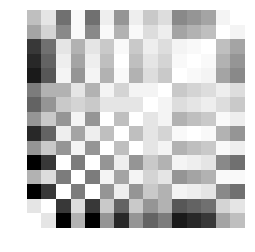

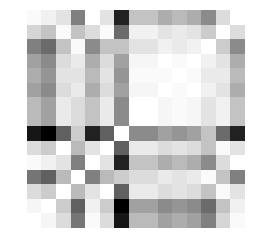

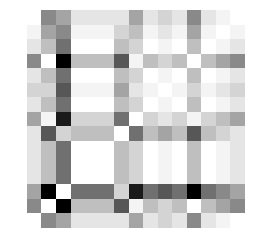

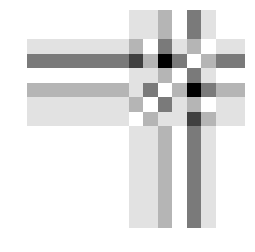

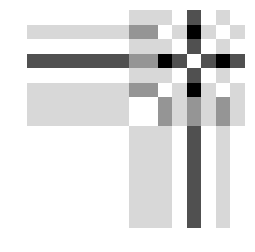

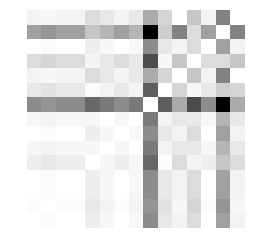

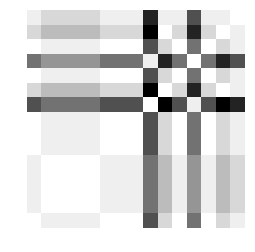

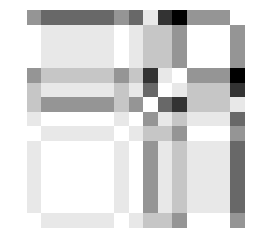

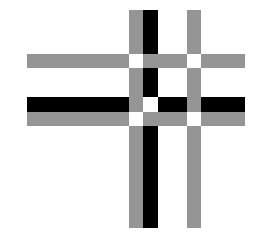

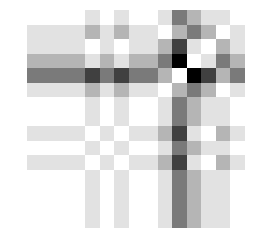

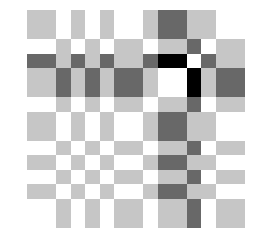

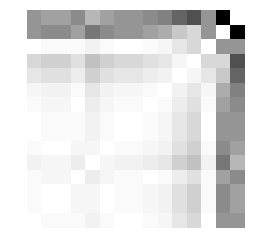

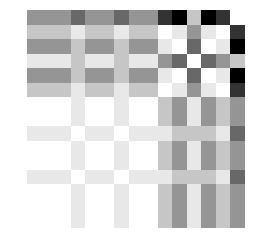

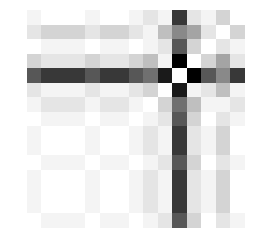

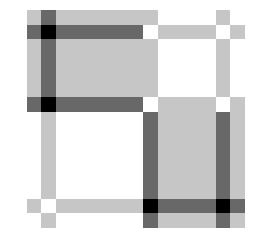

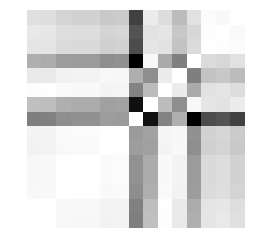

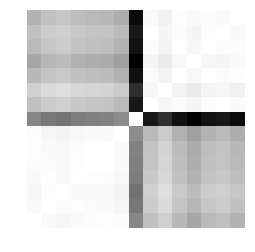

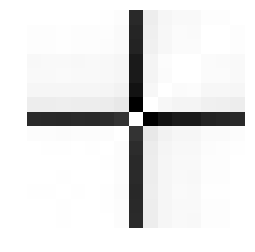

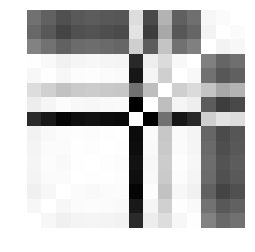

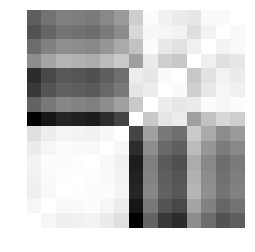

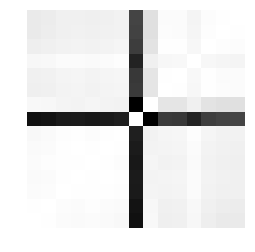

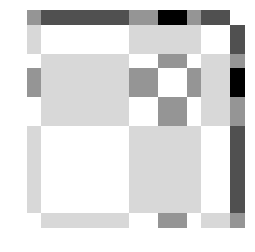

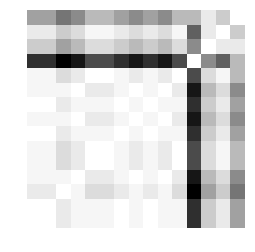

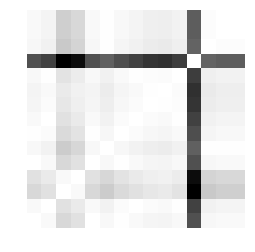

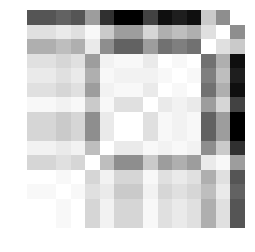

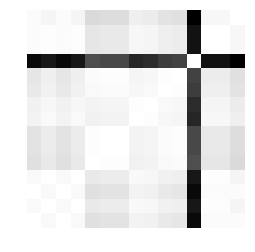

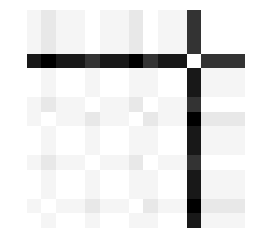

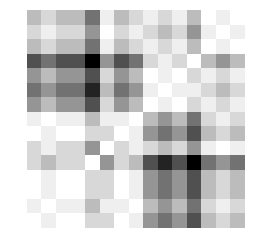

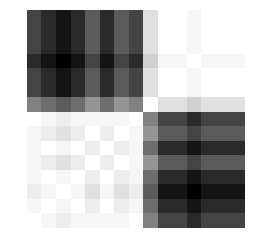

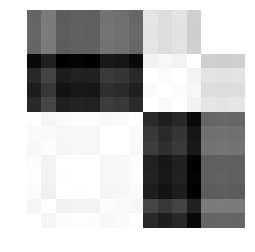

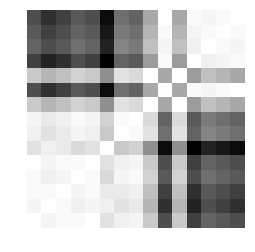

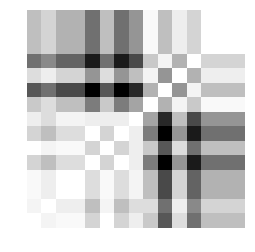

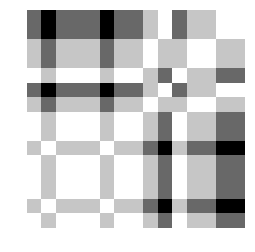

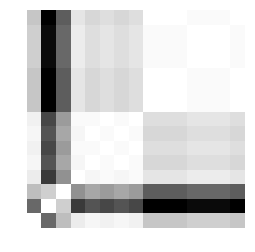

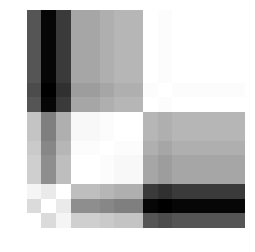

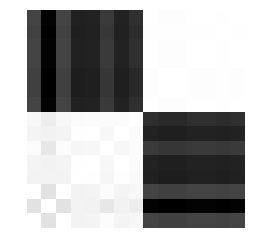

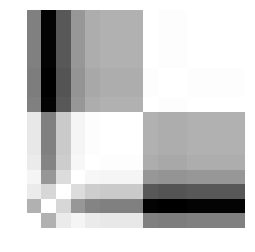

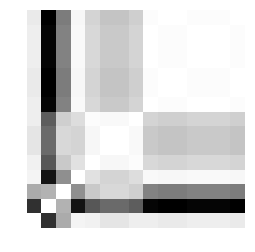

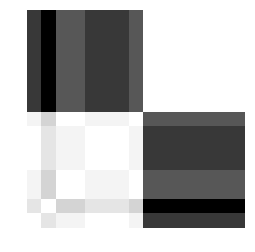

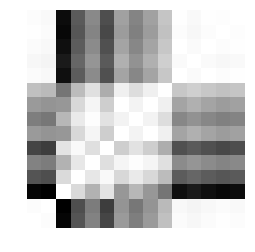

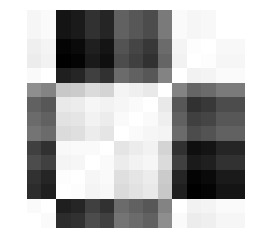

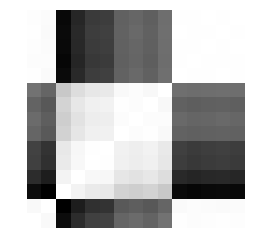

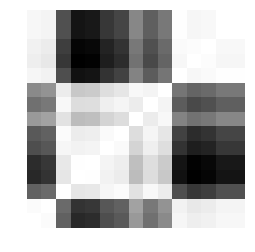

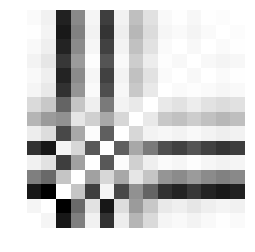

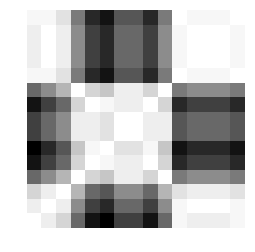

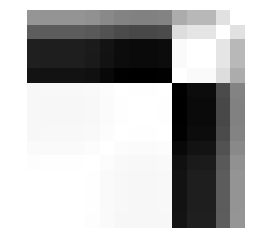

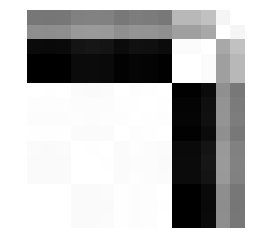

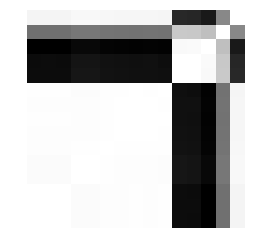

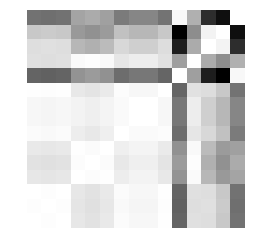

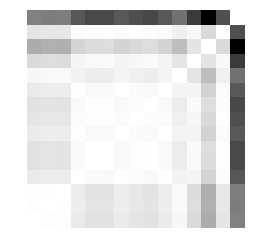

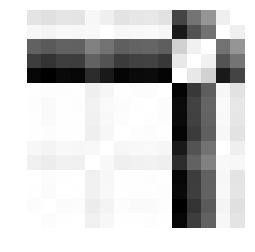

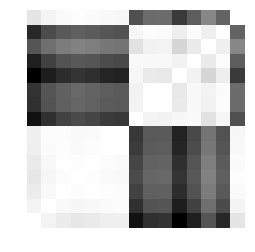

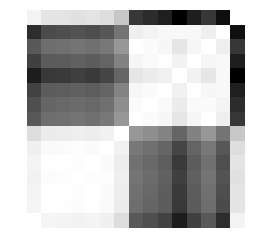

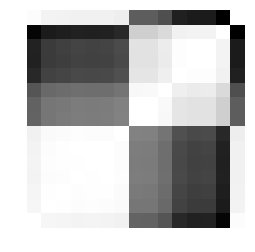

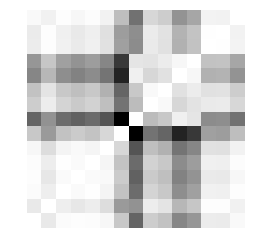

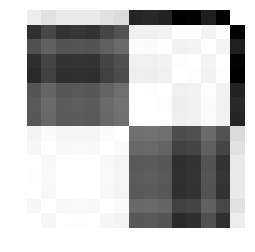

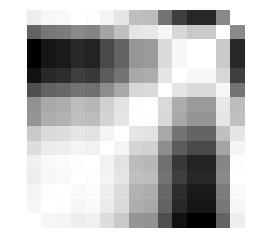

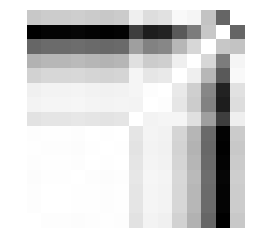

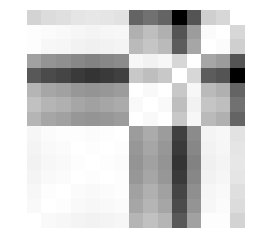

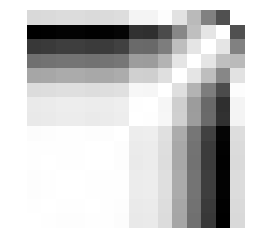

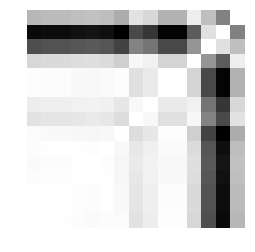

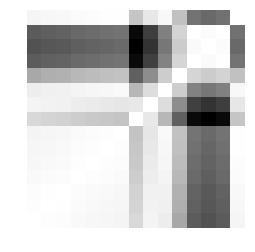

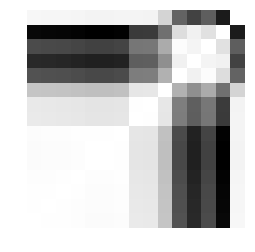

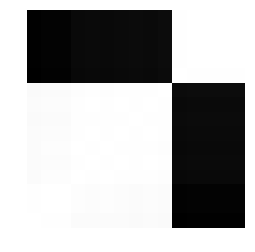

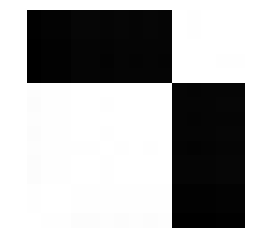

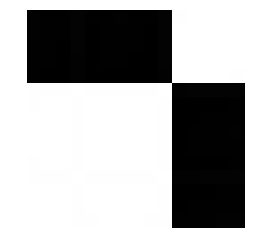

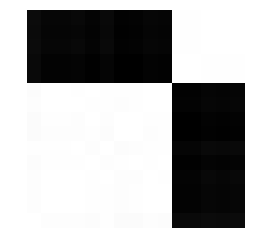

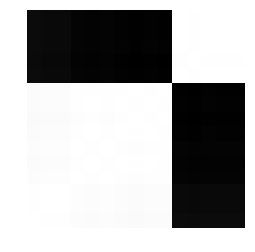

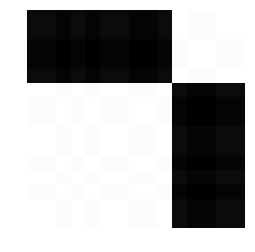

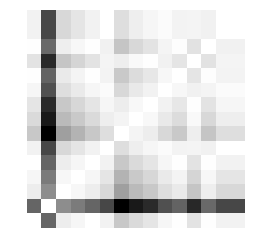

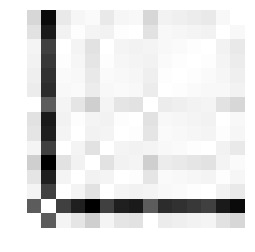

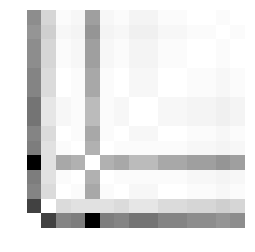

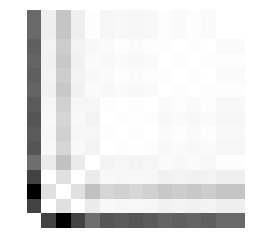

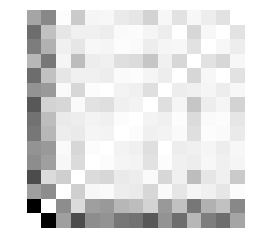

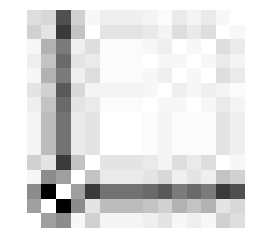

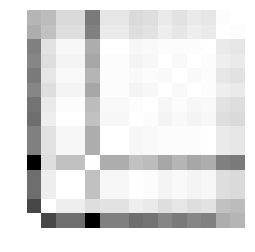

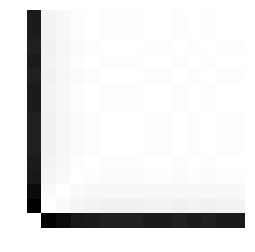

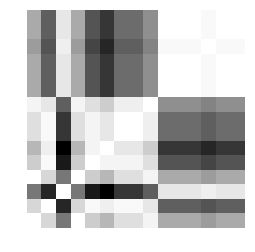

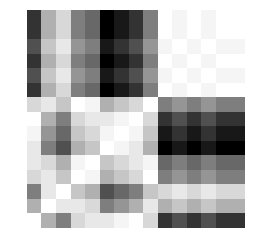

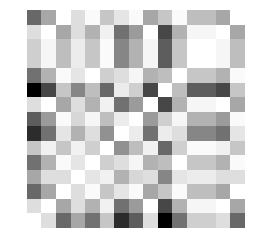

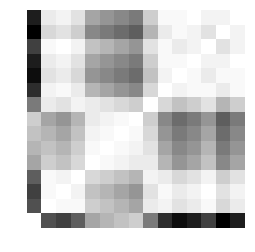

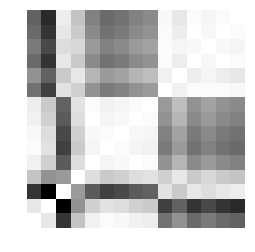

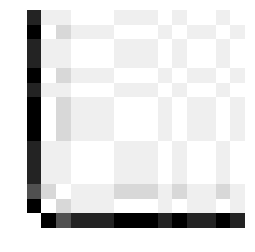

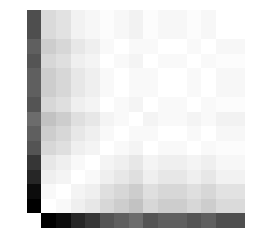

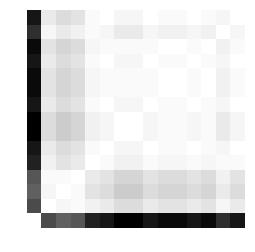

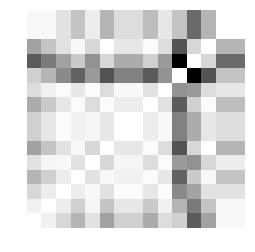

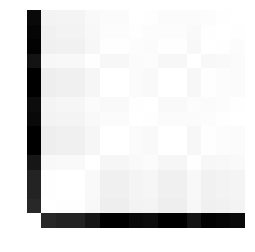

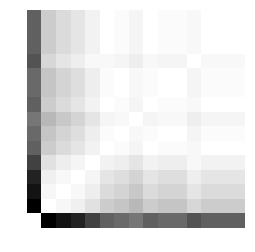

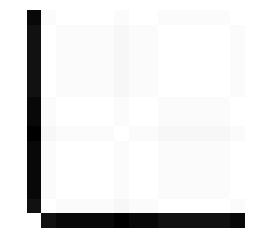

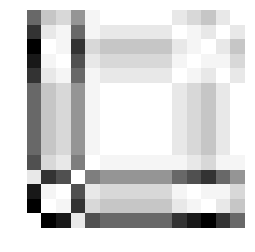

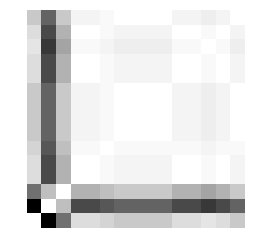

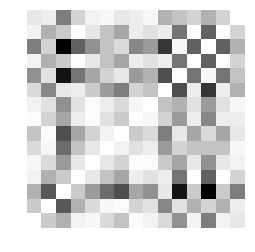

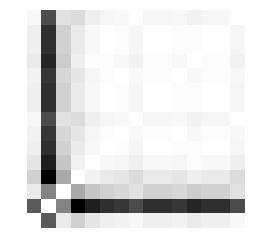

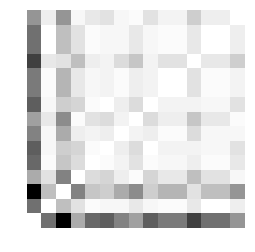

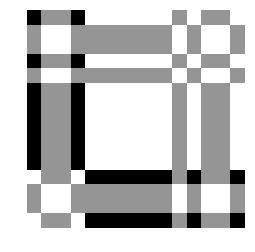

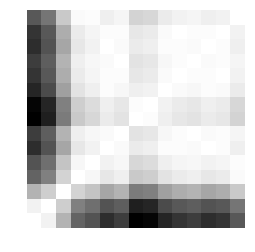

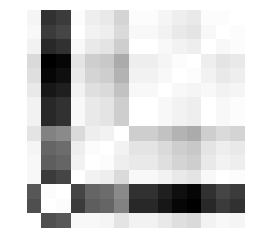

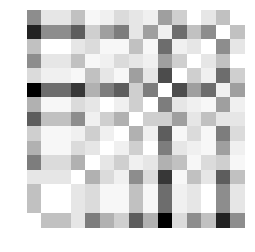

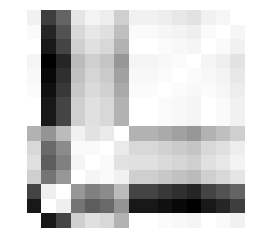

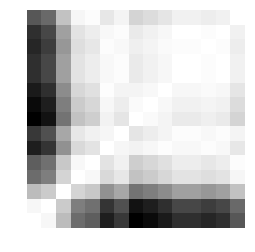

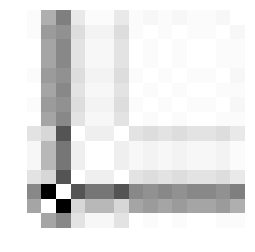

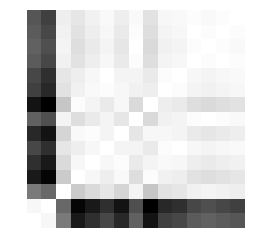

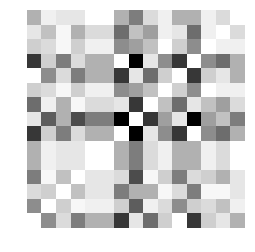

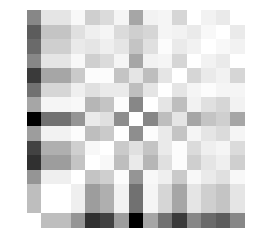

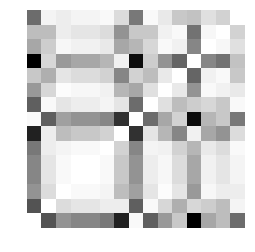

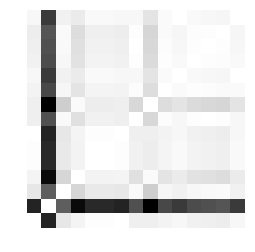

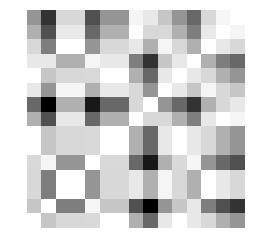

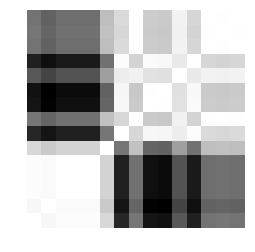

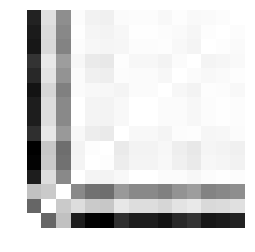

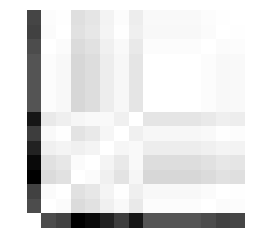

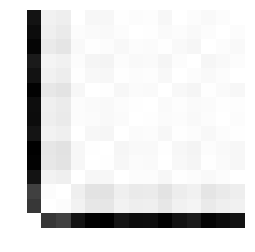

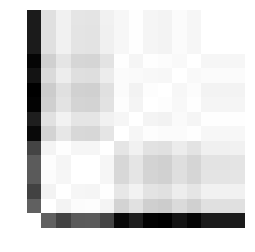

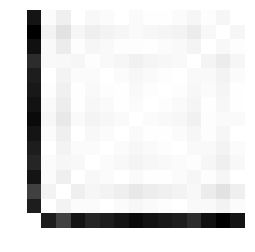

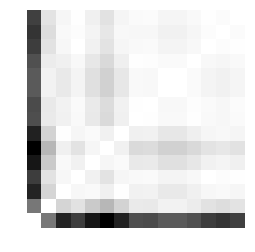

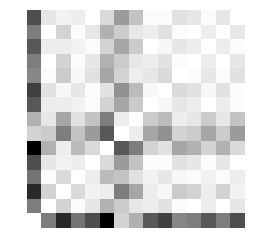

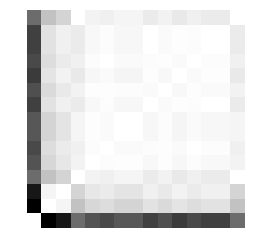

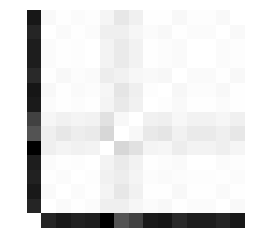

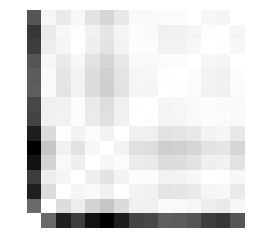

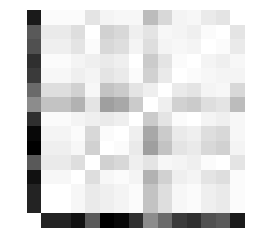

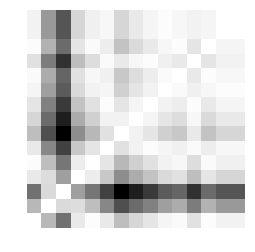

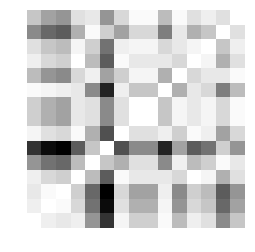

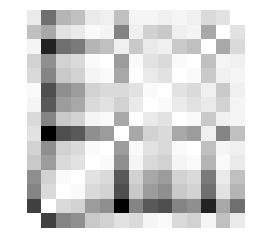

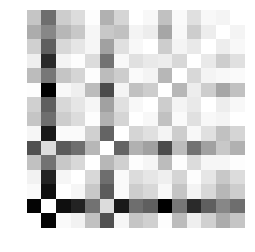

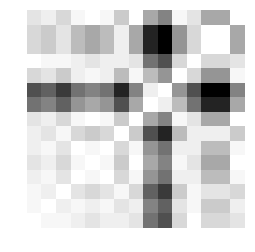

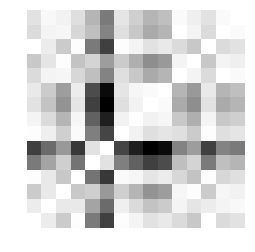

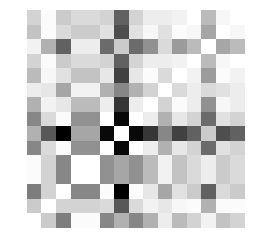

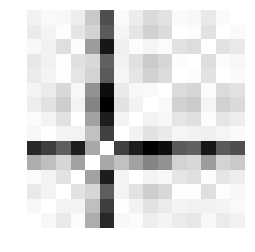

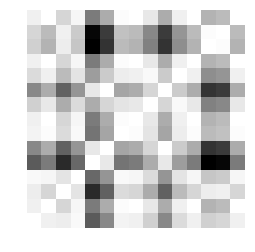

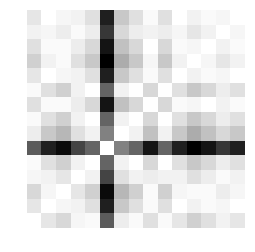

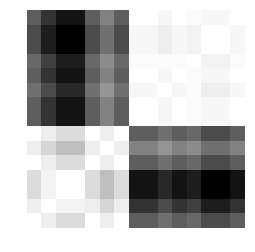

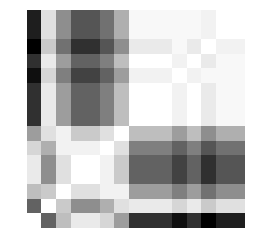

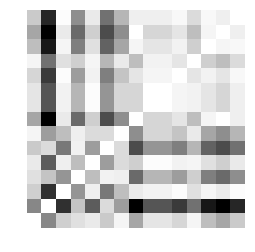

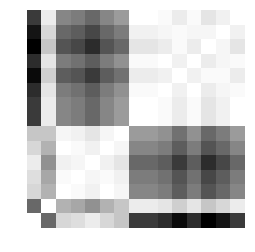

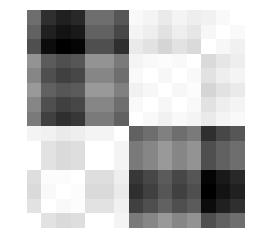

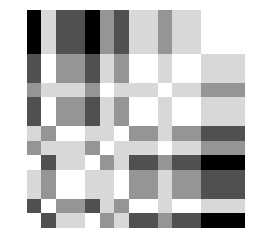

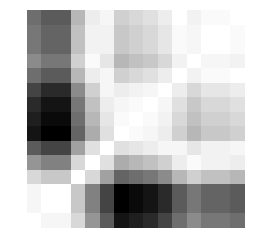

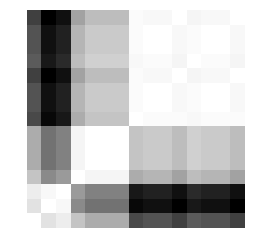

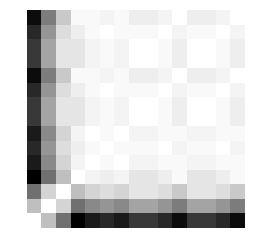

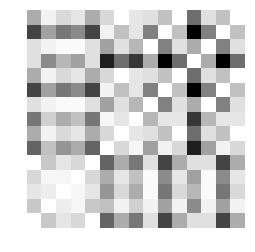

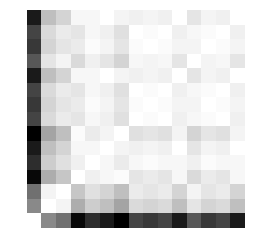

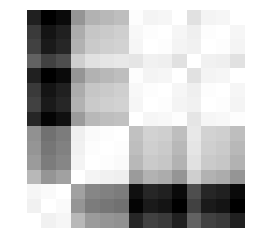

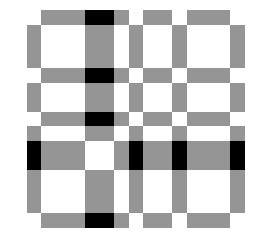

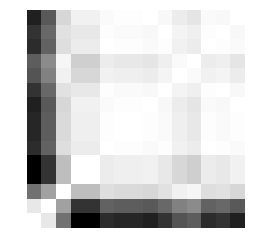

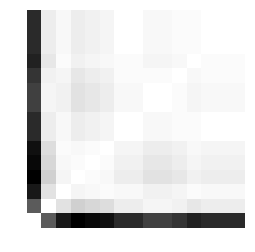

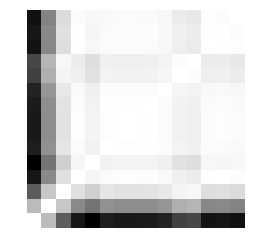

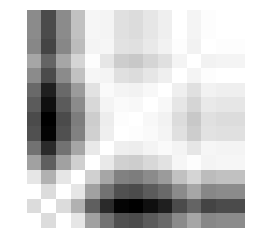

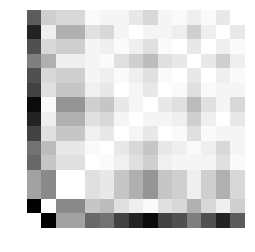

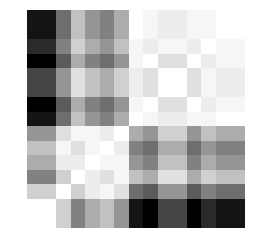

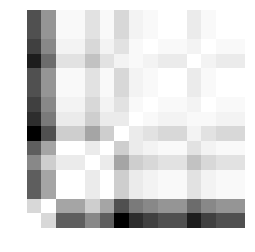

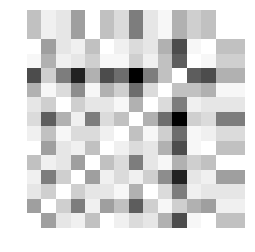

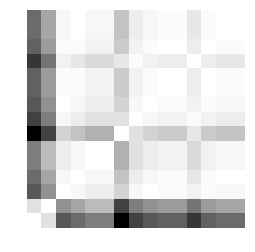

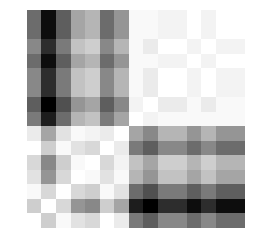

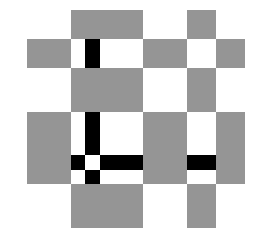

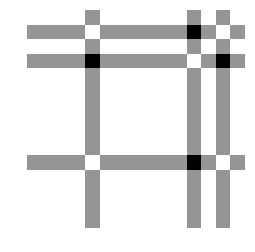

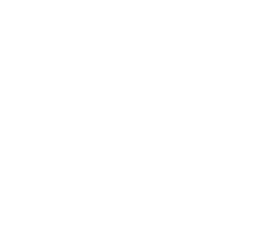

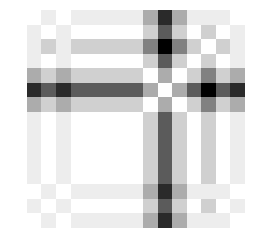

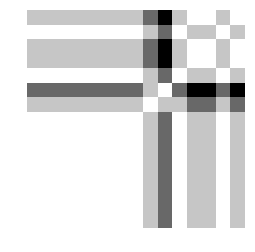

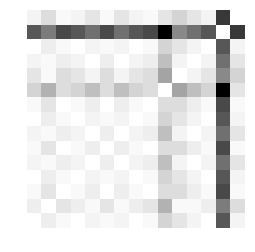

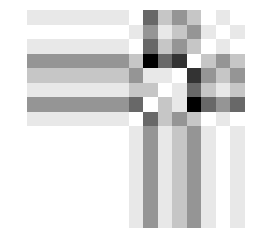

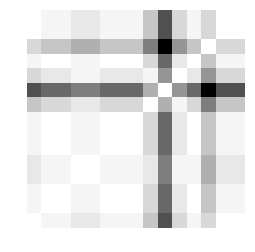

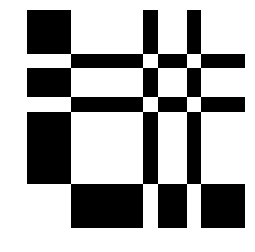

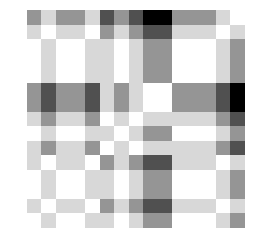

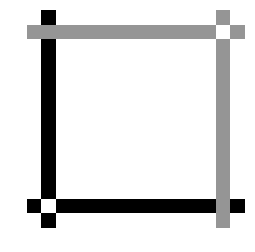

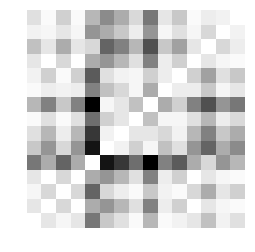

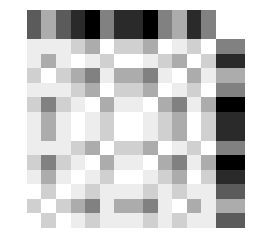

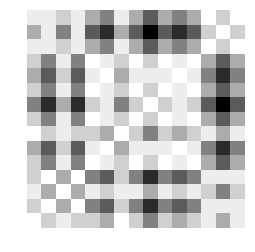

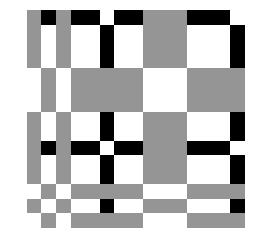

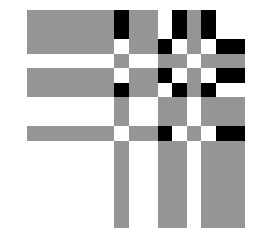

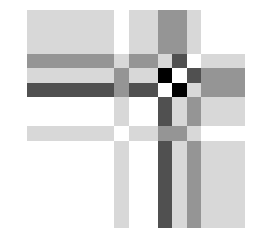

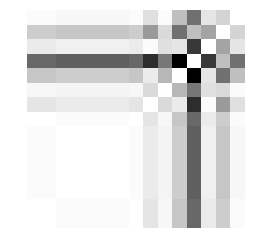

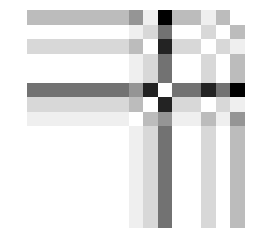

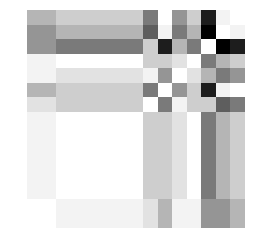

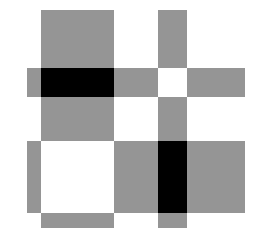

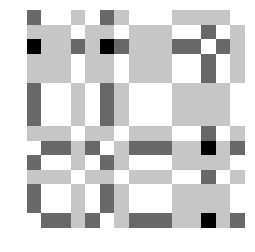

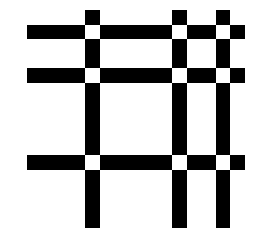

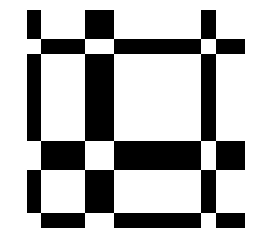

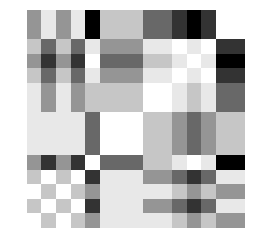

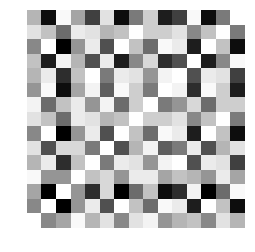

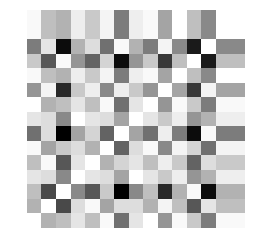

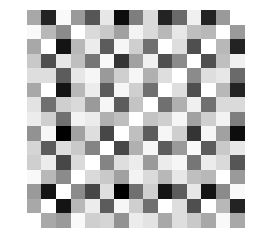

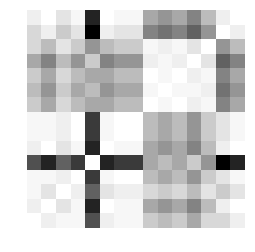

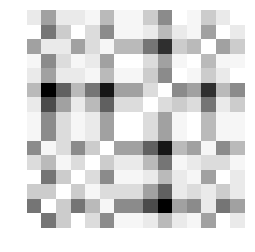

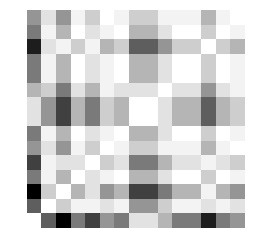

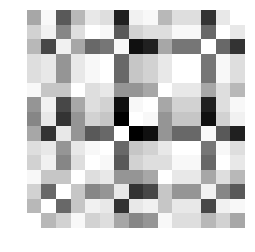

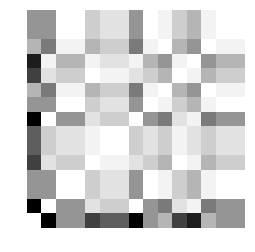

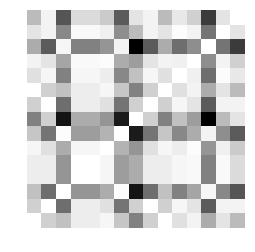

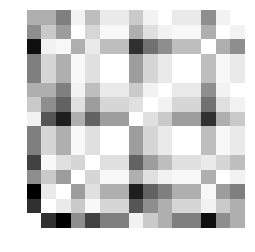

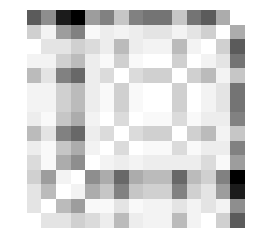

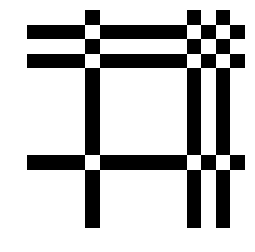

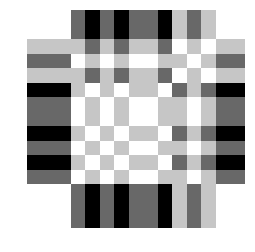

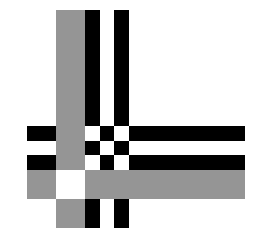

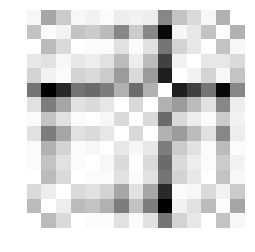

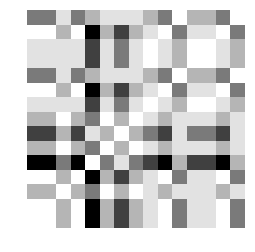

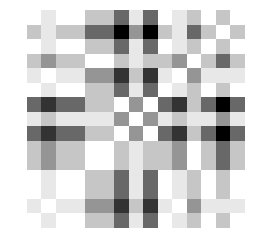

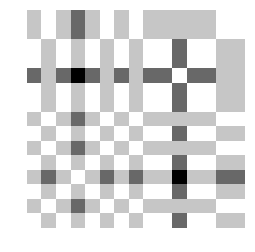

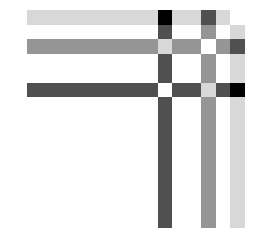

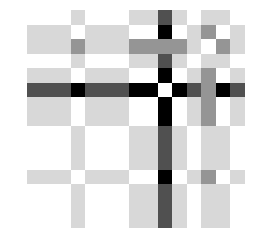

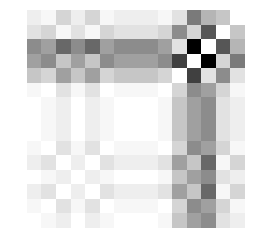

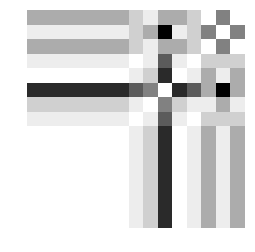

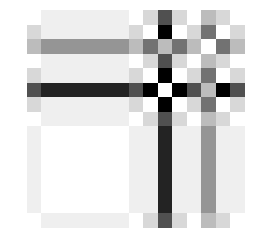

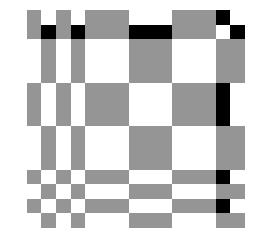

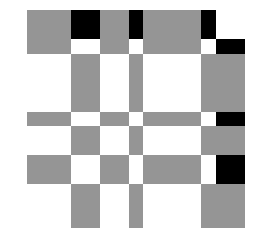

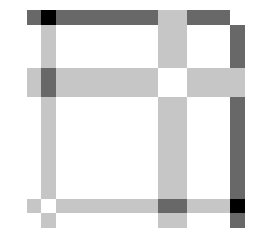

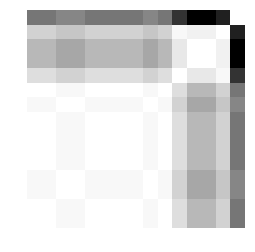

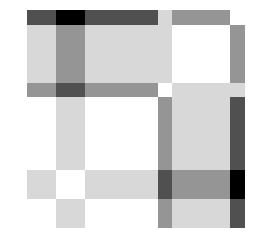

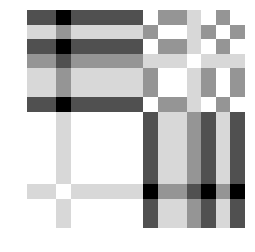

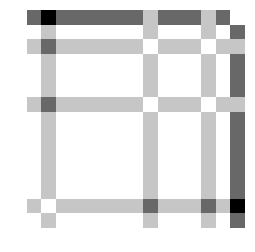

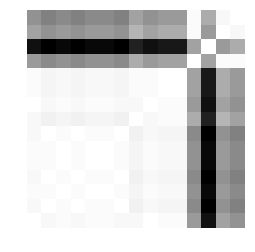

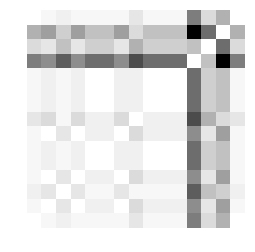

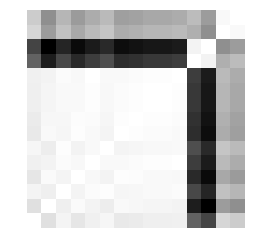

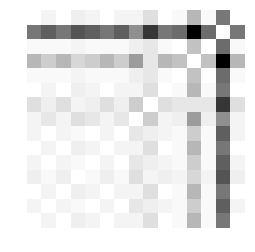

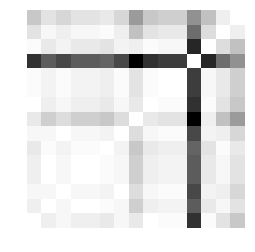

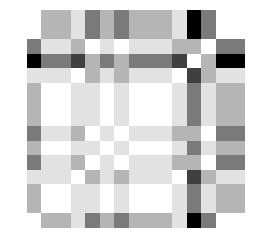

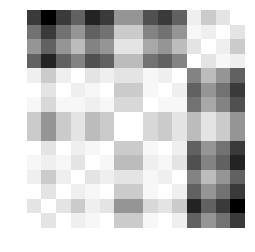

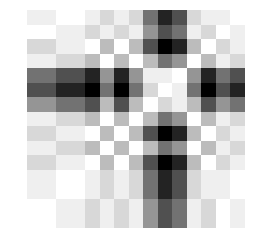

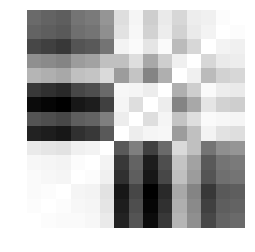

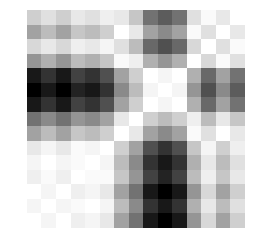

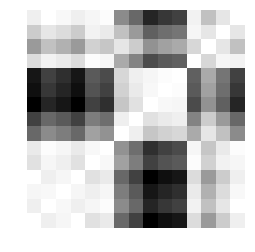

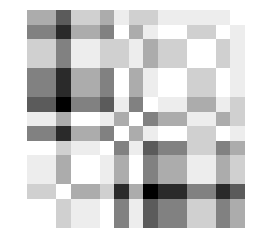

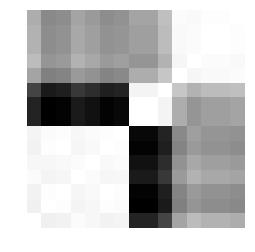

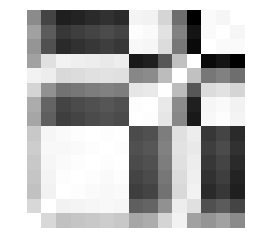

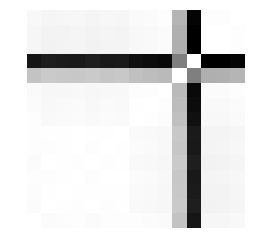

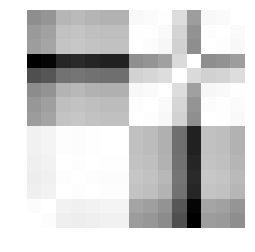

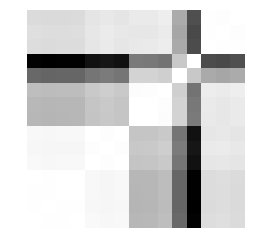

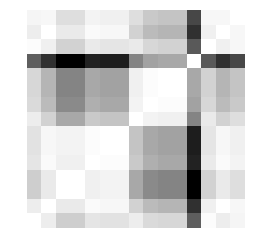

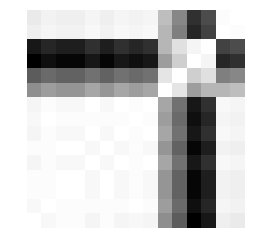

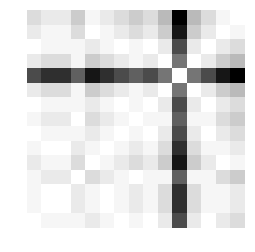

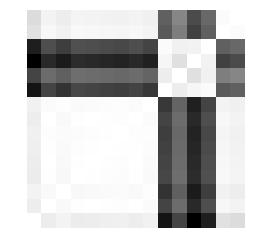

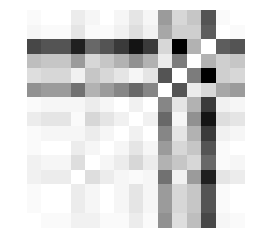

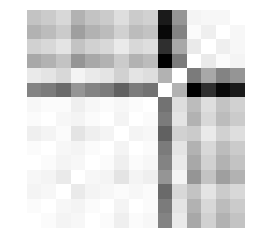

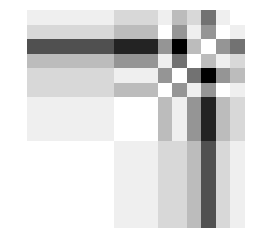

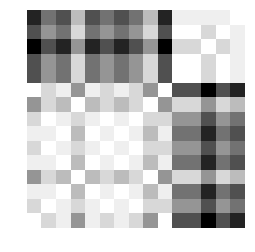

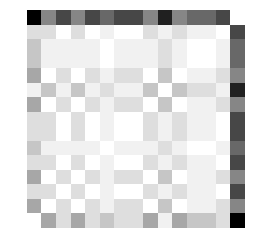

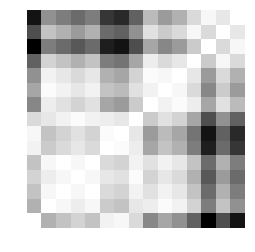

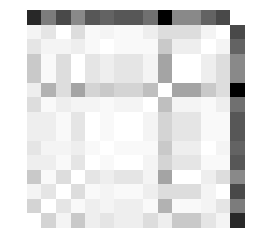

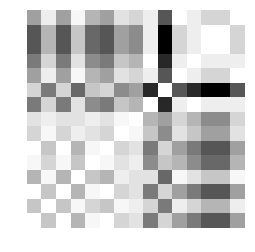

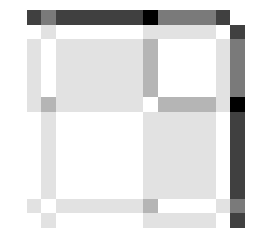

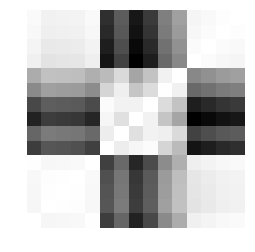

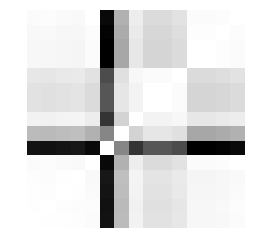

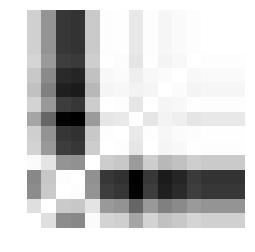

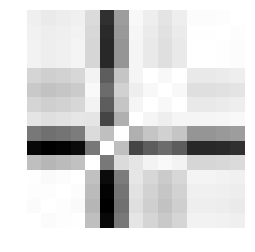

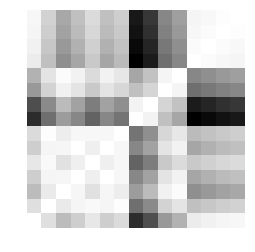

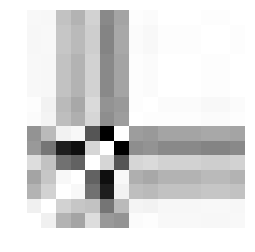

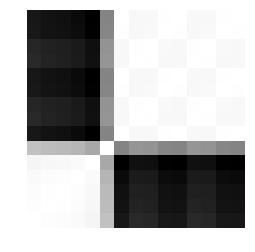

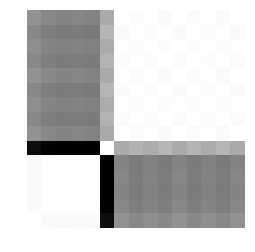

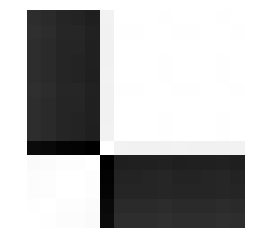

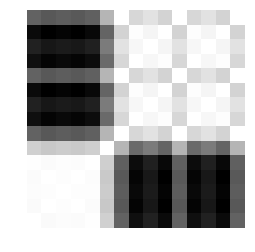

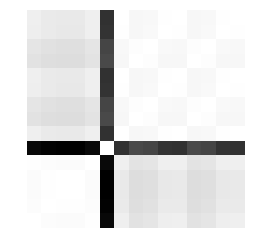

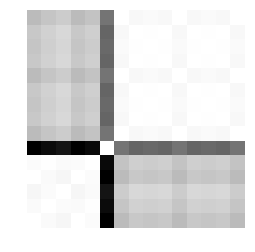

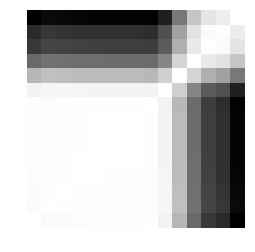

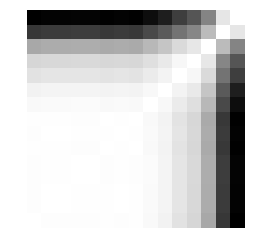

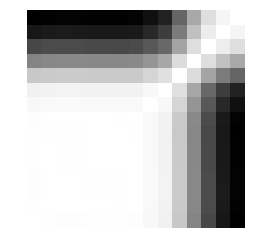

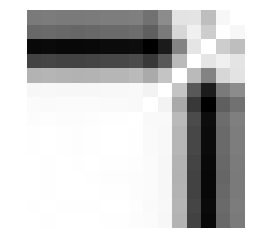

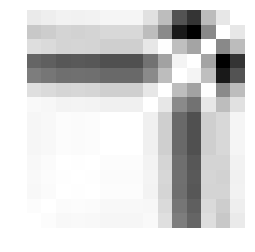

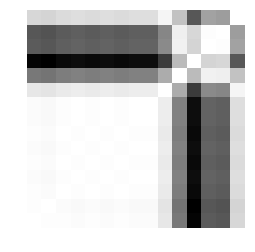

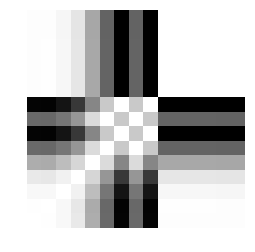

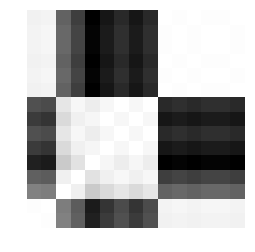

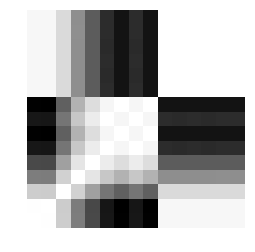

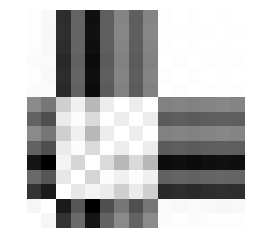

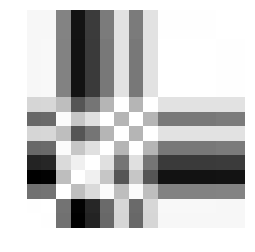

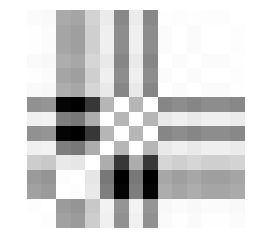

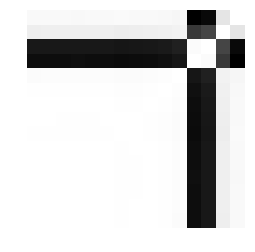

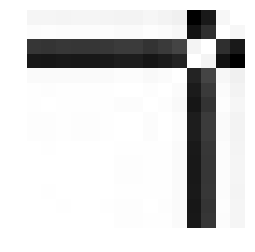

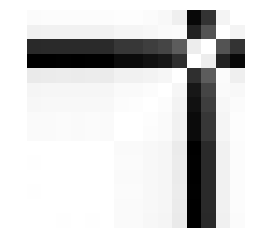

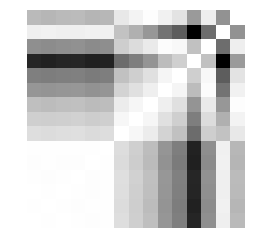

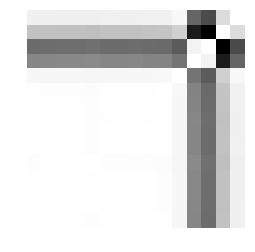

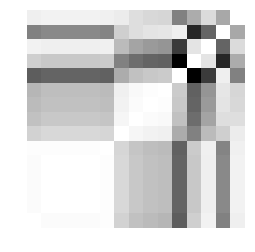

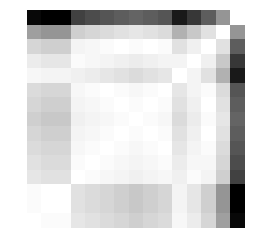

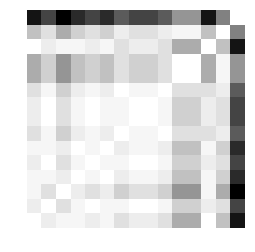

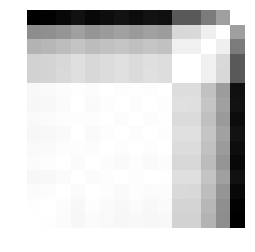

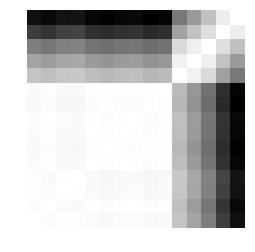

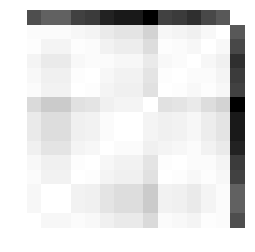

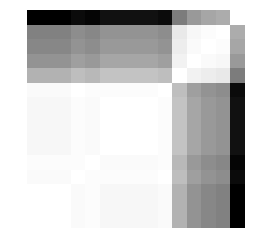

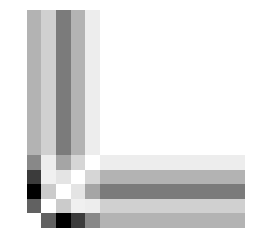

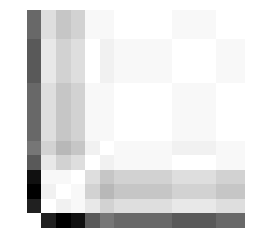

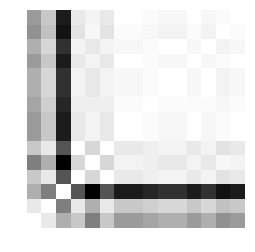

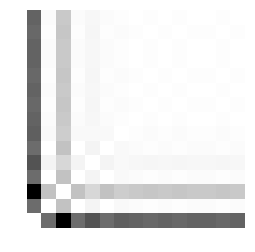

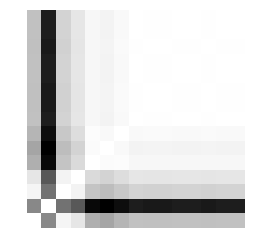

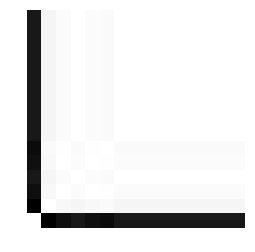

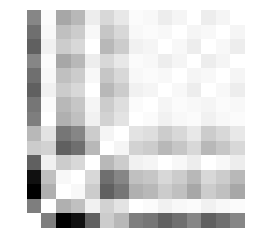

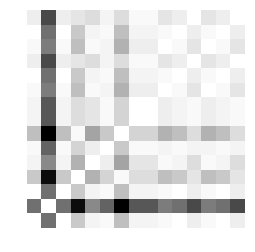

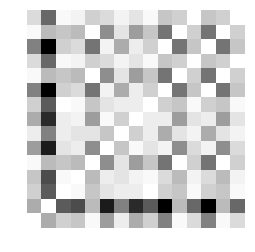

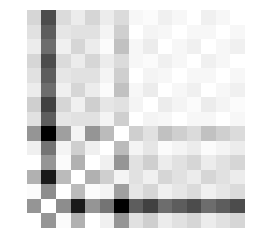

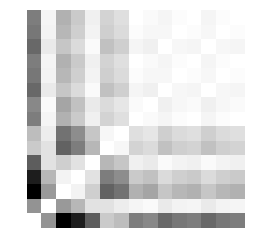

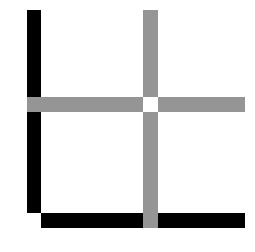

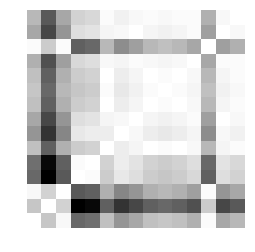

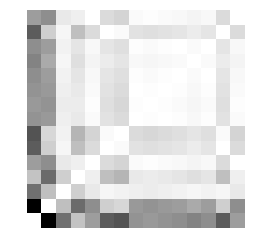

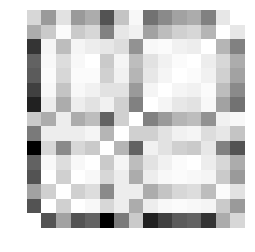

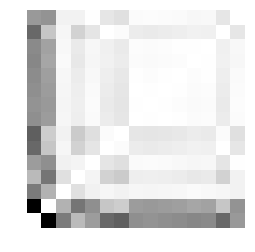

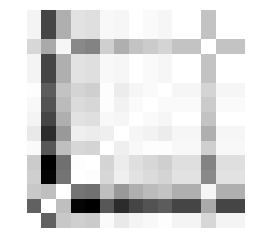

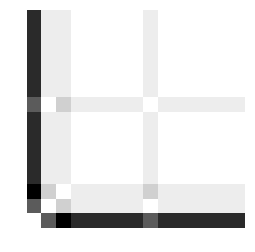

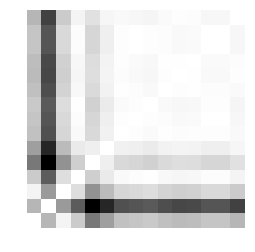

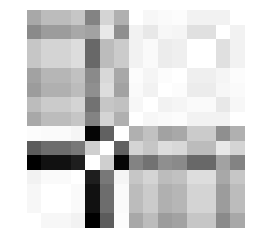

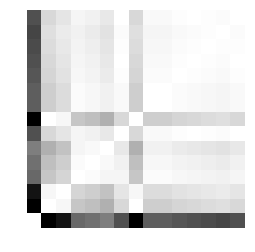

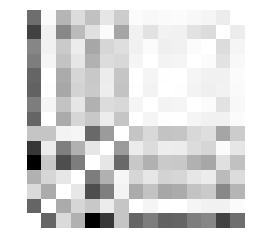

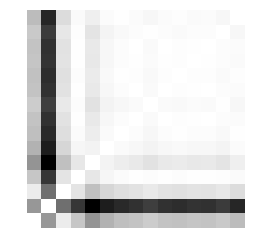

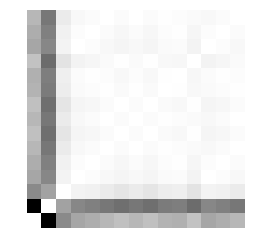

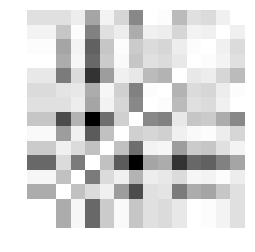

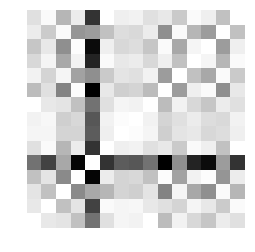

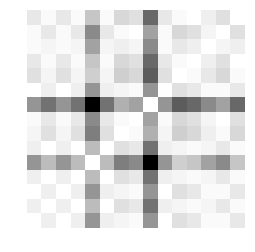

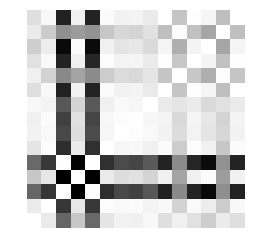

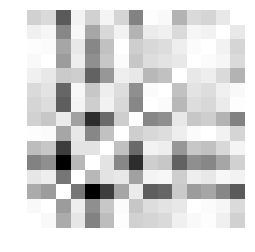

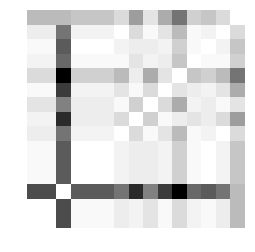

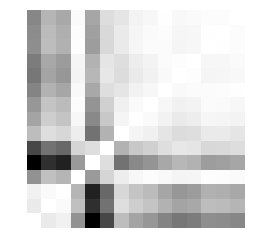

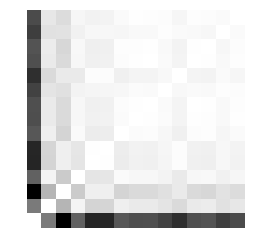

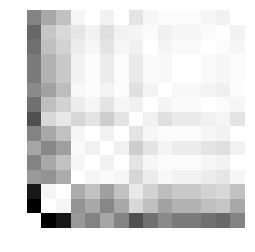

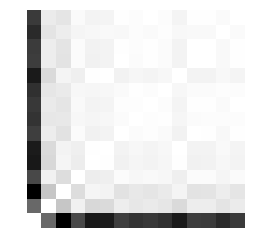

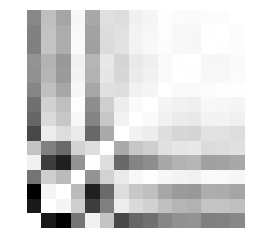

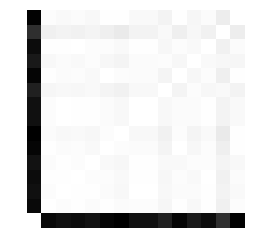

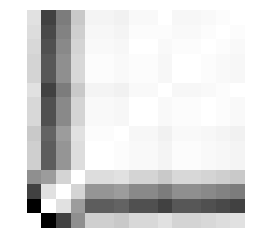

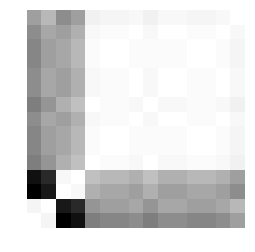

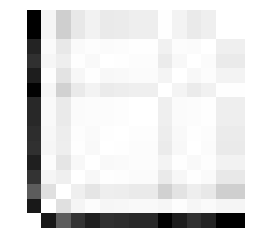

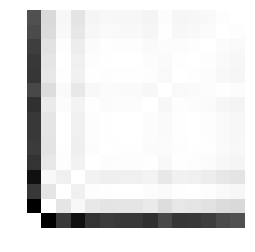

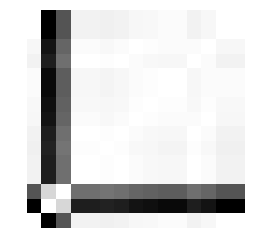

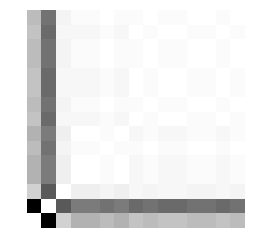

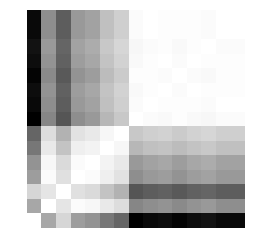

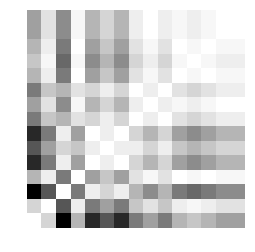

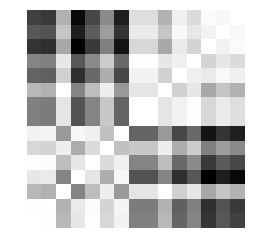

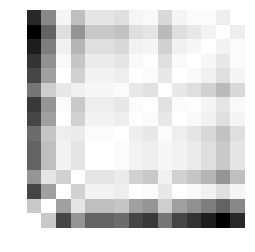

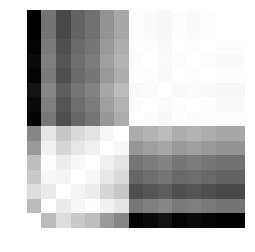

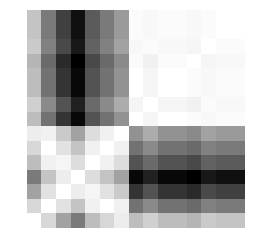

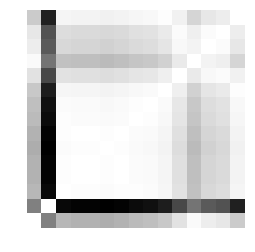

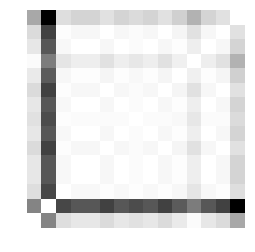

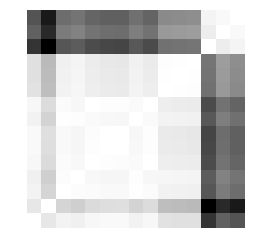

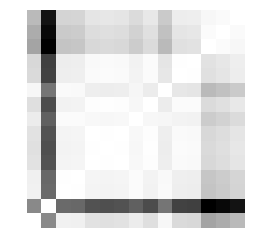

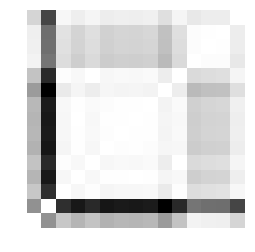

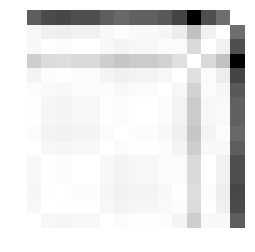

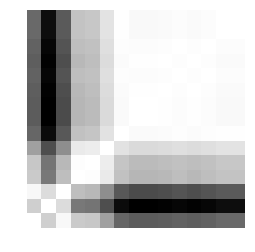

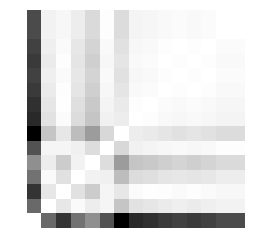

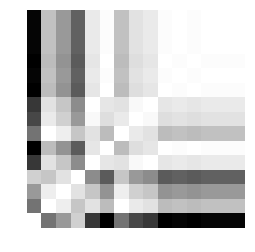

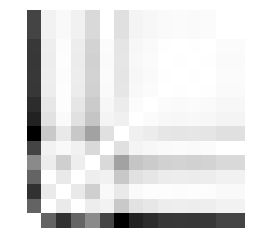

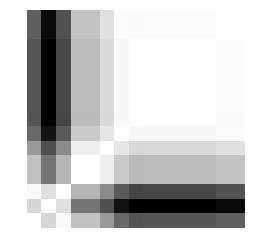

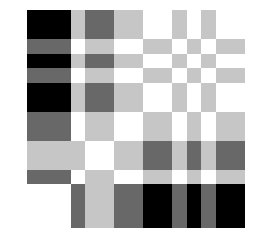

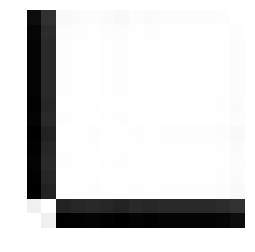

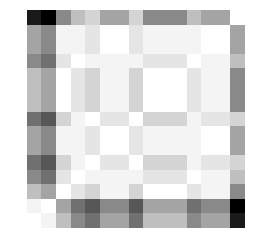

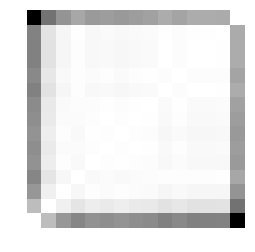

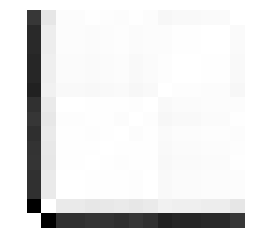

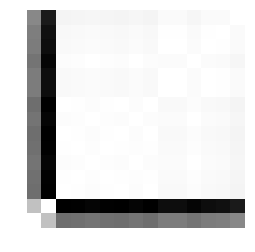

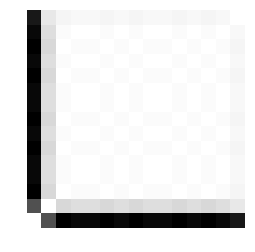

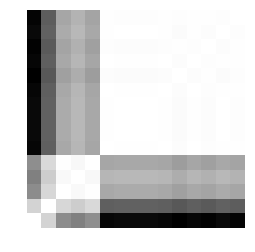

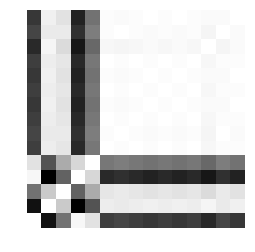

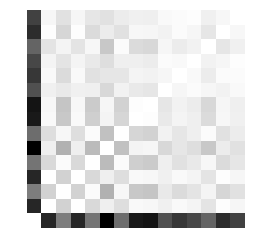

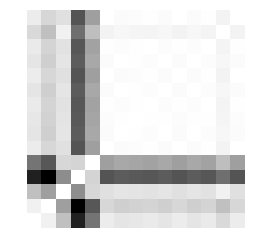

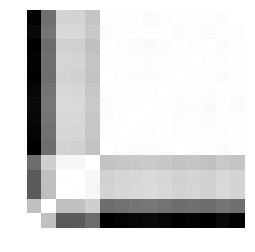

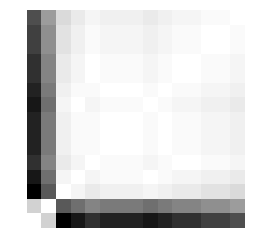

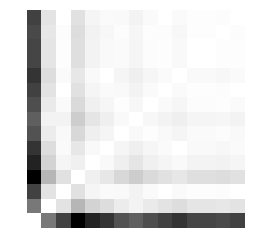

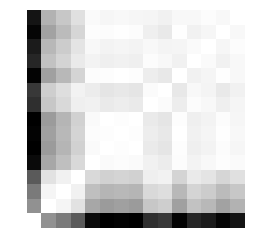

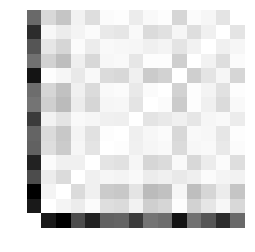

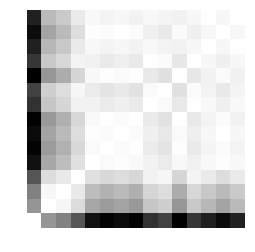

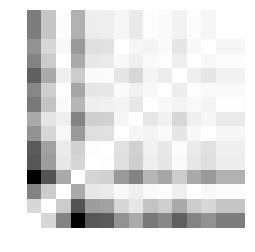

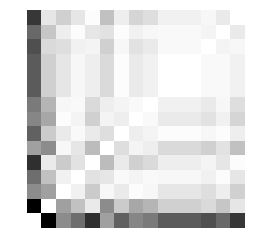

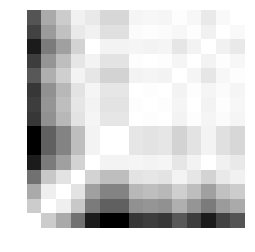

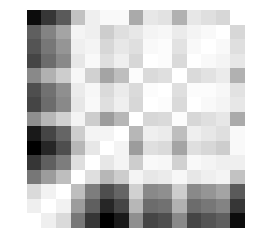

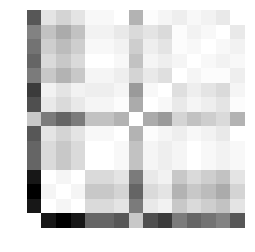

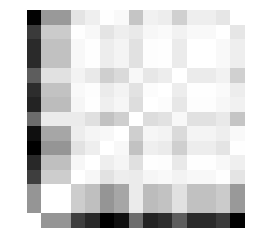

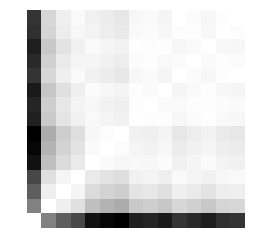

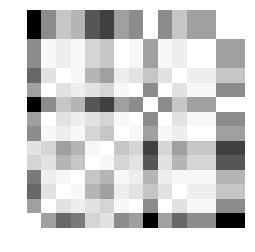

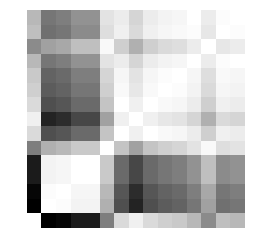

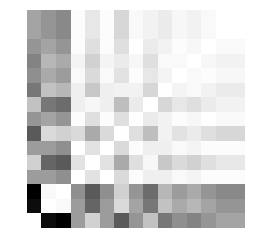

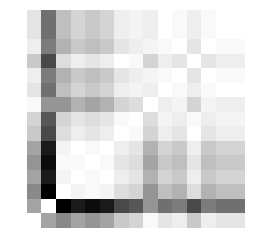

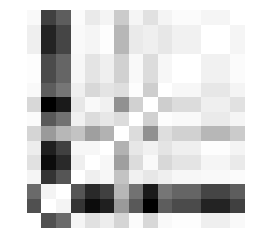

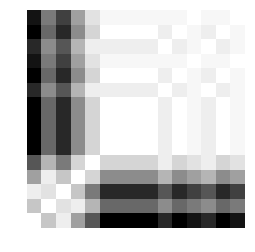

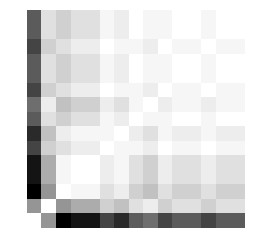

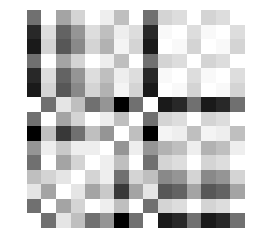

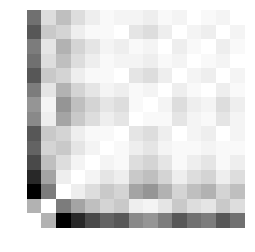

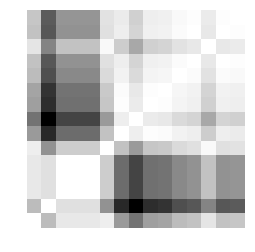

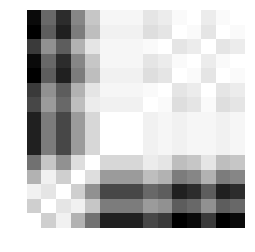

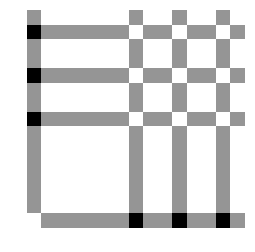

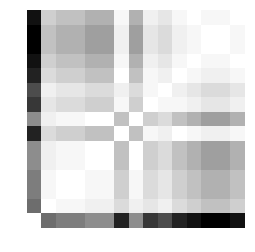

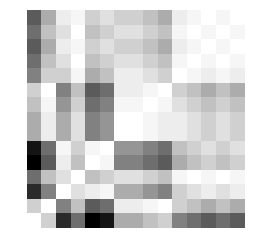

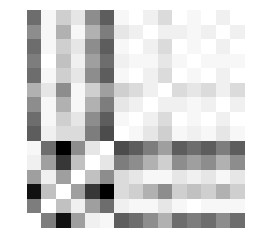

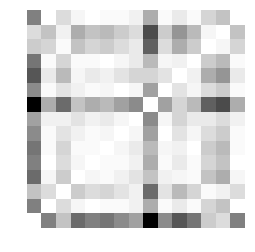

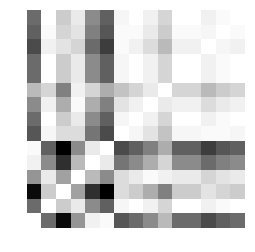

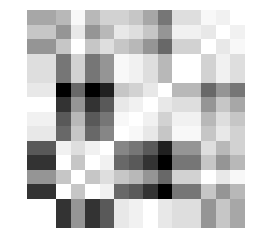

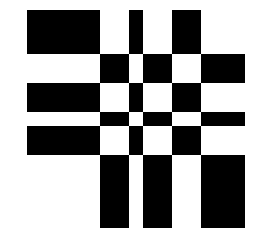

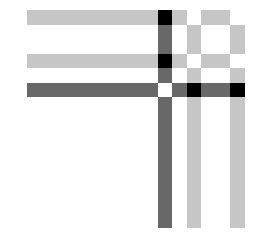

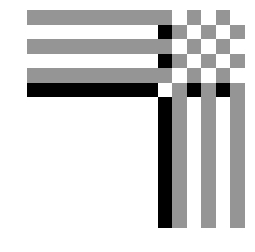

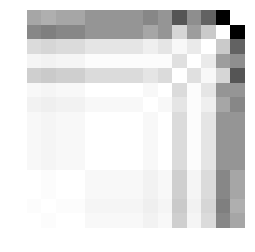

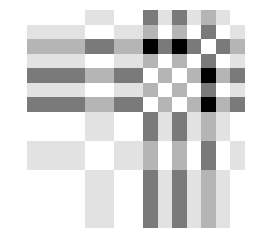

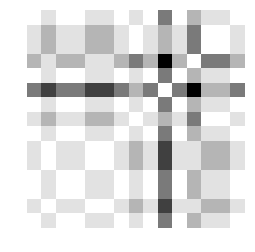

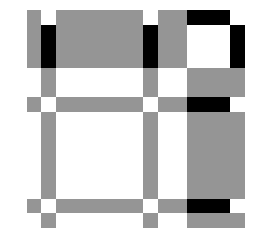

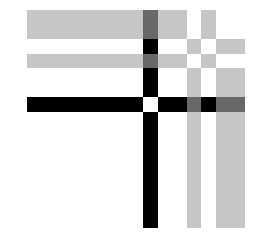

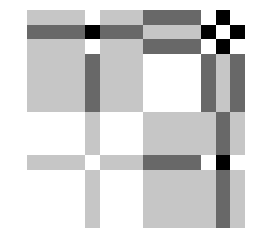

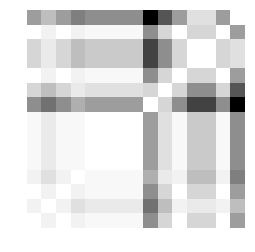

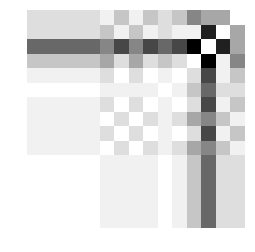

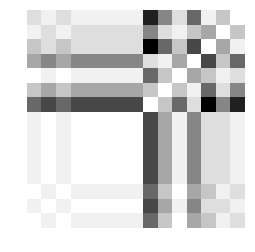

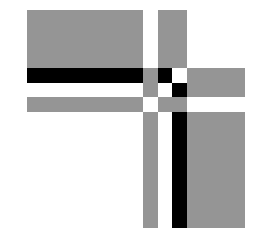

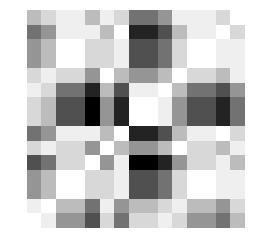

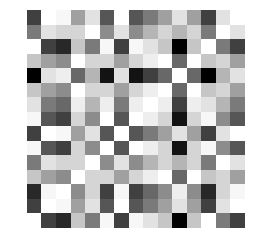

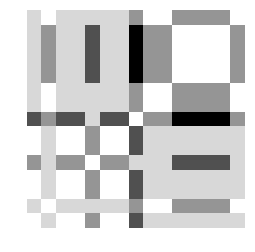

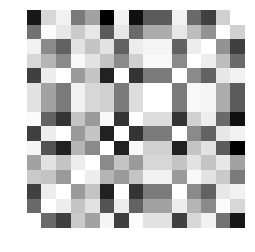

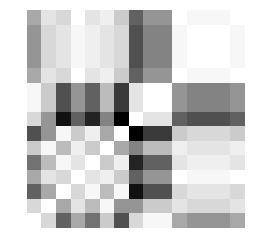

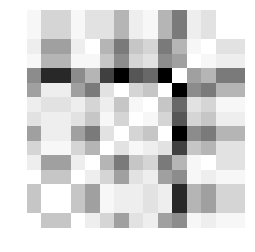

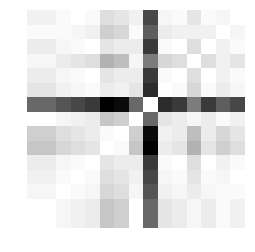

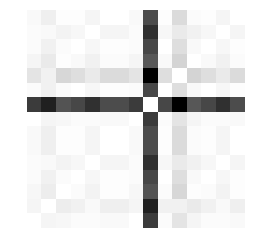

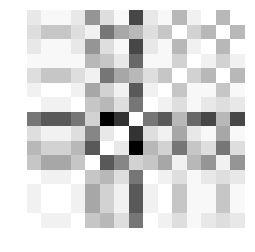

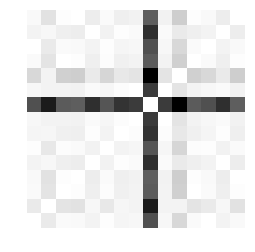

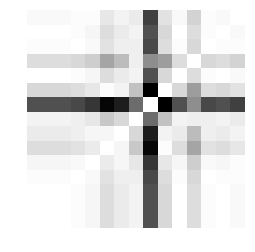

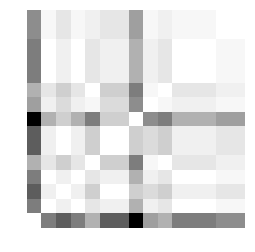

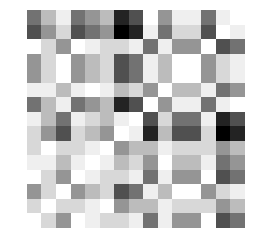

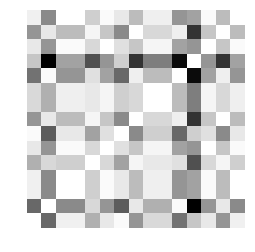

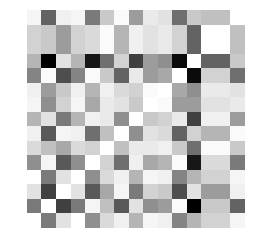

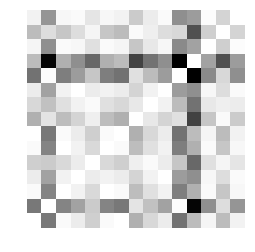

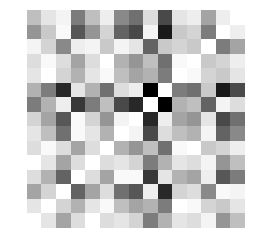

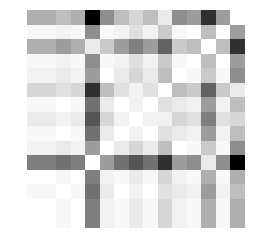

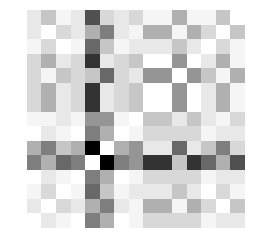

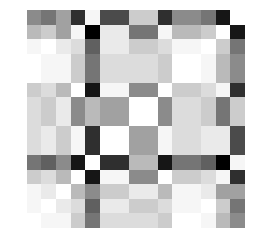

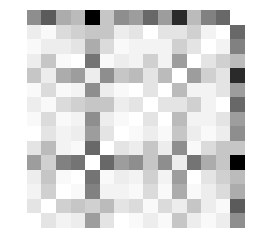

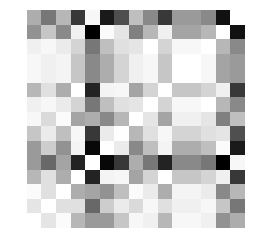

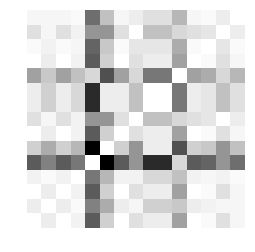

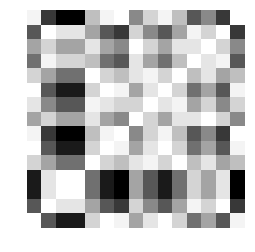

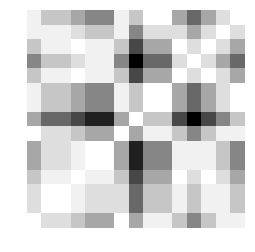

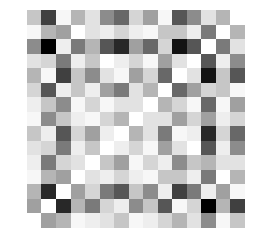

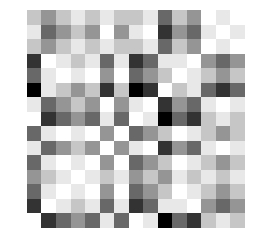

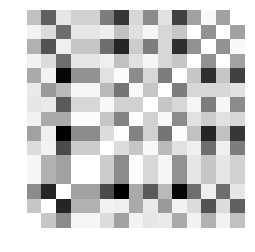

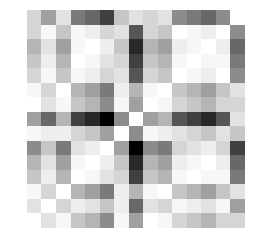

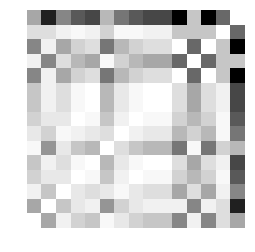

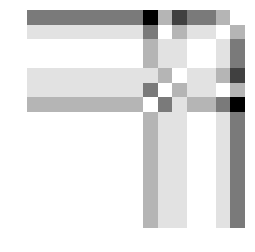

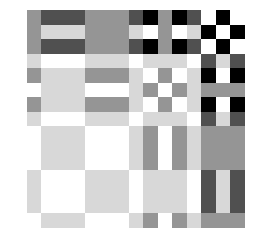

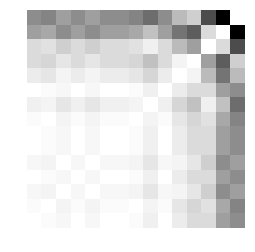

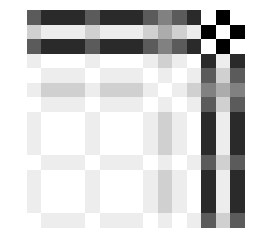

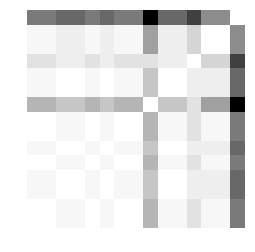

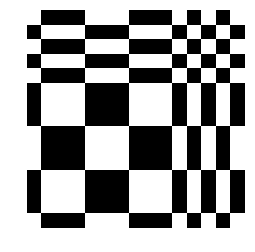

In [64]:
transformation(True,True,"recurrence_plots")

In [7]:
whole = '_all'
x = []
status_list=["status_1","status_2","status_3","status_4"]
for k in status_list:
    status_all  = pd.read_json("LP5_"+k+"_train"+whole+".json")
    x.append(status_all)
x = pd.concat(x,axis=0,ignore_index=True)
# x.head(20)

In [9]:
x

batch  sensor                                              value  status
0       48       1  [100.0, 95.6043956044, 63.7362637363, 69.23076...       1
1       48       2  [48.4848484848, 45.4545454545, 100.0, 69.69696...       1
2       48       3  [45.5445544554, 50.2475247525, 73.5148514851, ...       1
3       48       4  [90.756302521, 90.756302521, 37.8151260504, 42...       1
4       48       5  [1.8348623853000001, 3.6697247706000002, 10.09...       1
5       48       6  [74.0740740741, 100.0, 0.0, 37.037037037, 37.0...       1
6       49       1  [5.7142857143, 0.0, 2.8571428571, 0.0, 2.85714...       1
7       49       2  [41.1764705882, 47.0588235294, 29.4117647059, ...       1
8       49       3  [78.6163522013, 100.0, 87.4213836478, 96.22641...       1
9       49       4  [39.1304347826, 30.4347826087, 39.1304347826, ...       1
10      49       5  [83.8709677419, 70.9677419355, 77.4193548387, ...       1
11      49       6  [100.0, 60.0, 60.0, 80.0, 40.0, 60.0, 40.0, 60...       1
12      51       1  [9.0909090909, 0.0, 18.1818181818, 9.090909090...       1
13      51       2  [40.0, 40.0, 0.0, 40.0, 0.0, 20.0, 20.0, 20.0,...       1
14      51       3  [88.8888888889, 82.5396825397, 77.7777777778, ...       1
15      51       4  [11.5384615385, 0.0, 11.5384615385, 11.5384615...       1
16      51       5  [68.4210526316, 57.8947368421, 78.9473684211, ...       1
17      51       6  [16.6666666667, 8.3333333333, 0.0, 25.0, 8.333...       1
18      52       1  [100.0, 98.4126984127, 96.8253968254, 95.23809...       1
19      52       2  [3.2258064516, 3.2258064516, 0.0, 6.4516129032...       1
20      52       3  [100.0, 74.5762711864, 93.2203389831, 72.88135...       1
21      52       4  [100.0, 93.3333333333, 100.0, 91.1111111111, 9...       1
22      52       5  [96.0, 91.0, 89.0, 84.0, 90.0, 90.0, 88.0, 0.0...       1
23      52       6  [25.0, 50.0, 50.0, 50.0, 50.0, 25.0, 50.0, 0.0...       1
24      53       1  [11.1111111111, 0.0, 0.0, 33.3333333333, 55.55...       1
25      53       2  [20.0, 80.0, 0.0, 20.0, 40.0, 100.0, 100.0, 10...       1
26      53       3  [62.903225806500004, 67.7419354839, 66.1290322...       1
27      53       4  [43.75, 43.75, 81.25, 50.0, 62.5, 0.0, 43.75, ...       1
28      53       5  [94.7368421053, 68.4210526316, 63.1578947368, ...       1
29      53       6  [50.0, 58.3333333333, 58.3333333333, 100.0, 50...       1
..     ...     ...                                                ...     ...
474    122       5  [100.0, 79.792746114, 74.0932642487, 62.176165...       4
475    122       6  [0.0, 89.4736842105, 100.0, 36.8421052632, 63....       4
476     13       3  [0.0, 71.4285714286, 91.4285714286, 100.0, 97....       4
477     13       4  [100.0, 62.0689655172, 28.9655172414, 7.586206...       4
478     13       5  [76.7857142857, 100.0, 76.7857142857, 58.92857...       4
479     13       6  [100.0, 0.0, 54.1666666667, 54.1666666667, 33....       4
480     14       1  [66.6666666667, 100.0, 33.3333333333, 25.0, 16...       4
481     14       2  [100.0, 0.0, 65.7894736842, 68.4210526316, 47....       4
482     14       3  [50.0, 100.0, 40.0, 50.0, 30.0, 40.0, 10.0, 0....       4
483     14       4  [5.5555555556, 91.6666666667, 50.0, 43.0555555...       4
484     14       5  [47.1698113208, 100.0, 43.3962264151, 22.64150...       4
485     14       6  [11.6279069767, 100.0, 27.9069767442, 0.0, 9.3...       4
486    162       1  [0.0, 25.0, 25.0, 25.0, 25.0, 75.0, 25.0, 75.0...       4
487    162       2  [100.0, 18.75, 12.5, 0.0, 12.5, 6.25, 12.5, 6....       4
488    162       3  [0.0, 89.0909090909, 100.0, 83.6363636364, 96....       4
489    162       4  [0.0, 98.0198019802, 98.0198019802, 100.0, 98....       4
490    162       5  [0.0, 92.1568627451, 94.1176470588, 94.1176470...       4
491    162       6  [100.0, 0.0, 0.0, 4.7619047619, 0.0, 4.7619047...       4
492    163       1  [0.0, 0.0, 28.5714285714, 57.1428571429, 42.85...       4
493    163       2  [100.0,

In [8]:
len(x)/6 

84.0

In [113]:
164*0.15

24.599999999999998

# CNN


In [1]:
import LP1_dataset_color

LP1 color 1 channel Function setting done


In [2]:
from pyts.visualization import plot_gasf,plot_gadf,plot_mtf,plot_recurrence_plots
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
import torch.nn as nn
import time

In [17]:
cross = LP1_dataset_color.dataset_dataloader("",True,True,"gadf",1)

done


In [4]:
cross.train_x.size()

torch.Size([71, 3, 768, 128])

In [3]:
### import torch.nn as nn
F = open('LP1_color1.txt', 'w')  
# F = open('test', 'w') 
whole=[True]
method=["gasf","gadf","mtf"]
# method=[["gasf","gadf"],["mtf","gasf"],["mtf","gadf"]]
for l in method:
    for m in whole:
        for k in range(20):
            accuracy_matrix =[]
            start_time = time.time()
            for i in range(5):
                min_error=100
                min_lose=100
                count=0
                number=1
#                 cross = dataset_six_combine_method.dataset_dataloader(True,True,"mtf","gasf",i+1)
#                 cross = dataset_color.dataset_dataloader("color_",True,True,l,i+1)
#                 cross = dataset_color.dataset_dataloader("64_color_",True,True,l,i+1)
                cross = LP1_dataset_color.dataset_dataloader("",True,True,l,i+1)
                EPOCH = 50              # train the training data n times, to save time, we just train 1 epoch
                LR = 0.0023

                class CNN(nn.Module):
                    def __init__(self):
                        super(CNN, self).__init__()
                        self.conv1 =nn.Sequential( #卷基層   
                            nn.Conv2d(
                                in_channels  = 3  , # 圖片是有幾層的 若 RGB三層 灰階 1層
                                out_channels = 10, # 同時有幾個filter 進行掃描 會提取擠個特徵 代表下一層高度為擠
                                kernel_size  = 5  , # 一次畫出來的框 畫幾格 ex 5*5
                                stride       = 1  , # 每一個框框跳幾格
                                padding      = 2, # 在 5x5逐步掃描後會有少的格子 因此2代表在外面為兩圈的0
                                                    # if stride =1 padding = (kernel_size-1)/2
                            ),  # 過濾器 卷基層 蒐集圖片訊息 三維的空間  
                            nn.ReLU(),
                            nn.MaxPool2d(kernel_size=2), #找出更重要的特徵  像是在2x2中 找到 最大的值
                        )                                # -> (16,64,64)
                        self.conv2 = nn.Sequential(
                            nn.Conv2d(10,20,5,1,2), # 輸入的是上一層的16 把輸出層在變大因此是32 其他不變
                            nn.ReLU(),
                            nn.MaxPool2d(2)             # -> (16,32,32)
                        )
#                         self.conv3 = nn.Sequential(
#                             nn.Conv2d(5,10,5,1,2), # 輸入的是上一層的16 把輸出層在變大因此是32 其他不變
#                             nn.ReLU(),
#                             nn.MaxPool2d(2)
#                         )

#                         self.out = nn.Linear(20*192*48,2) #hstack 
                        self.out = nn.Linear(20*192*32,4)#128
#                         self.out = nn.Linear(20*96*16,2)#64
                    def forward(self,x):

                        x=self.conv1(x)
                        x=self.conv2(x) #(batch.32.7.7)
#                         x=self.conv3(x)
                        x=x.view(x.size(0),-1) #將三維轉二維 (batch , 32*7*7)
                        output=self.out(x)
                        return output,x

                cnn=CNN()
                cnn.cuda()
            #     print(cnn)

                optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)   # optimize all cnn parameters
                loss_func = nn.CrossEntropyLoss()                       # the target label is not one-hotted

                # following function (plot_with_labels) is for visualization, can be ignored if not interested

                # training and testing


                for epoch in range(EPOCH):
                    for step, (x, y) in enumerate(cross.train_loader):   # gives batch data, normalize x when iterate train_loader
            #             print(step)
                        b_x = Variable(x).cuda()   # batch x
                        b_y = Variable(y).cuda()   # batch y
            #             print("b_x.size:",b_x.size())
                        output = cnn(b_x)[0]             # cnn output
                        loss = loss_func(output, b_y)   # cross entropy loss
                        optimizer.zero_grad()           # clear gradients for this training step
                        loss.backward()                 # backpropagation, compute gradients
                        optimizer.step()                # apply gradients
                        test_output, last_layer = cnn(cross.test_x)
                        pred_y = torch.max(test_output, 1)[1].cuda().data.squeeze()
                        accuracy = sum(pred_y == cross.test_y).item() / float(cross.test_y.size(0))
                        error  = (1-accuracy)*100

                        if error<min_error:
                            min_error=error
                            min_lose=100
                            count=0
                        else:
                            count+=1
                            print(".",end="")

                        if error == min_error:
                            if loss.data.item()<min_lose:
                                min_lose=loss.data.item()
            #                     torch.save(cnn,'cnn_save/cnn'+str(number)+'.pkl')
                                number+=1
                #                 print('save!!')
                     
                #                 print('\ncount: ',count,'Epoch: ', epoch, '| train loss: %.15f' % loss.data[0], '| min validation error rate: %.20f' % min_error)
                        if count>=350:
                            break
                    torch.cuda.empty_cache()
                    if count>=350:
                        break
                print("min_error:",min_error)
                # print 10 predictions from test data
                # test_output, _ = cnn(test_x)
                # pred_y = torch.max(test_output, 1)[1].cuda().data.squeeze()

                # print(pred_y, 'prediction number')
                # print(test_y, 'real number')
                accuracy_matrix.append(min_error)
                print('\n number: ',number-1 ,min_error)

            
            print(accuracy_matrix)
            sum(accuracy_matrix) / float(len(accuracy_matrix))
#             F.write(str(l[0])+str(l[1])+","+str(m)+","+str(k)+",")
            F.write(str(l)+","+str(m)+","+str(k)+",")
            for i in accuracy_matrix:  
                F.write(str(i) + ",")
            F.write(str(sum(accuracy_matrix) / float(len(accuracy_matrix)))+",")
            F.write(str(time.time() - start_time)+"\n")
            print(time.time() - start_time)
            
F.close()  

done


RuntimeError: size mismatch, m1: [12 x 122880], m2: [40960 x 4] at c:\a\w\1\s\tmp_conda_3.7_183942\conda\conda-bld\pytorch_1549564939537\work\aten\src\thc\generic/THCTensorMathBlas.cu:266